In [1]:
import pandas as pd
import seaborn as sns
import os
import glob
import matplotlib.pyplot as plt
import matplotlib 
import itertools
import numpy 

%matplotlib inline

In [2]:
hydro_scale = {"A":1.800, "C":2.500, "D":-3.500, "E":-3.500, "F":2.800, "G":-0.400, "H":-3.200, "I":4.500, "K":-3.900, "L":3.800, "M":1.900, "N":-3.500, "P":-1.600, "Q":-3.500, "R":-4.500, "S":-0.800, "T":-0.700, "V":4.200, "W":-0.900, "Y":-1.300}

def GRAVY_core(sequence,weigths):
    tot_score = 0
    n_resi = 0.0
    if weigths == "TMB14_16":
        core_positions = [6,8,10,12,14,22,24,26,28,30,36,38,40,42,50,52,54,56,58,64,66,68,70,78,80,82,84,86,88,94,96,98,100,102,110,112,114,116,118,120,126,128,130,132,140,142,144,146,148,154,156,158,160,168,170,172,174,176,182,184,186,188,196,198,200,202,204]
    elif weigths == "TMB12_12":
        core_positions = [6,8,10,12,14,22,24,26,28,30,36,38,40,42,50,52,54,56,58,64,66,68,70,78,80,82,84,86,92,94,96,98,106,108,110,112,114,120,122,124,126,134,136,138,140,142,148,150,152,154,162,164,166,168,170]
    elif weigths == "TMB12_14":
        core_positions = [6,8,10,12,14,22,24,26,28,30,36,38,40,42,50,52,54,56,58,64,66,68,70,78,80,82,84,86,88,94,96,98,100,102,110,112,114,116,118,120,126,128,130,132,140,142,144,146,148,154,156,158,160,168,170,172,174,176]
    elif weigths == "TMB12_16":
        core_positions = [6,8,10,12,14,22,24,26,28,30,36,38,40,42,50,52,54,56,58,60,66,68,70,72,74,82,84,86,88,90,92,98,100,102,104,112,114,116,118,120,126,128,130,132,140,142,144,146,148,150,156,158,160,162,164,172,174,176,178,180,182]
    elif weigths == "TMB12_18":
        core_positions = [6,8,10,12,14,22,24,26,28,30,36,38,40,42,50,52,54,56,58,60,66,68,70,72,80,82,84,86,88,94,96,98,100,108,110,112,114,116,118,124,126,128,130,138,140,142,144,146,152,154,156,158,166,168,170,172,174,176]
    elif weigths == 'TMB12_16_dimer':
        core_positions = [2,4,6,8,16,18,20,22,24,30,32,34,36,44,46,48,50,52,54,60,62,64,66,68,76,78,80,82,84,86]
    elif weigths == 'TMB16_20_tetramer':
        core_positions = [2,4,6,8,16,18,20,22,24,30,32,34,36,44,46,48,50,52,54]

    for pos in core_positions:
        tot_score += hydro_scale[sequence[pos-1]]
        n_resi +=1.0
    hydro_score = tot_score/n_resi
        
    return(hydro_score)

In [3]:
def aa_distribution_core(sequence,weigths):
    aa_dict = {"A":0, "C":0, "D":0, "E":0, "F":0, "G":0, "H":0, "I":0, "K":0, "L":0, "M":0, "N":0, "P":0, "Q":0, "R":0, "S":0, "T":0, "V":0, "W":0, "Y":0}
    n_resi = 0.0
    if weigths == "TMB14_16":
        core_positions = [6,8,10,12,14,22,24,26,28,30,36,38,40,42,50,52,54,56,58,64,66,68,70,78,80,82,84,86,88,94,96,98,100,102,110,112,114,116,118,120,126,128,130,132,140,142,144,146,148,154,156,158,160,168,170,172,174,176,182,184,186,188,196,198,200,202,204]
    elif weigths == "TMB12_12":
        core_positions = [6,8,10,12,14,22,24,26,28,30,36,38,40,42,50,52,54,56,58,64,66,68,70,78,80,82,84,86,92,94,96,98,106,108,110,112,114,120,122,124,126,134,136,138,140,142,148,150,152,154,162,164,166,168,170]
    elif weigths == "TMB12_14":
        core_positions = [6,8,10,12,14,22,24,26,28,30,36,38,40,42,50,52,54,56,58,64,66,68,70,78,80,82,84,86,88,94,96,98,100,102,110,112,114,116,118,120,126,128,130,132,140,142,144,146,148,154,156,158,160,168,170,172,174,176]
    elif weigths == "TMB12_16":
        core_positions = [6,8,10,12,14,22,24,26,28,30,36,38,40,42,50,52,54,56,58,60,66,68,70,72,74,82,84,86,88,90,92,98,100,102,104,112,114,116,118,120,126,128,130,132,140,142,144,146,148,150,156,158,160,162,164,172,174,176,178,180,182]
    elif weigths == "TMB12_18":
        core_positions = [6,8,10,12,14,22,24,26,28,30,36,38,40,42,50,52,54,56,58,60,66,68,70,72,80,82,84,86,88,94,96,98,100,108,110,112,114,116,118,124,126,128,130,138,140,142,144,146,152,154,156,158,166,168,170,172,174,176]
    elif weigths == 'TMB12_16_dimer':
        core_positions = [2,4,6,8,16,18,20,22,24,30,32,34,36,44,46,48,50,52,54,60,62,64,66,68,76,78,80,82,84,86]
    elif weigths == 'TMB16_20_tetramer':
        core_positions = [2,4,6,8,16,18,20,22,24,30,32,34,36,44,46,48,50,52,54]

    for pos in core_positions:
        aa_dict[sequence[pos-1]] = aa_dict[sequence[pos-1]] + 1
        n_resi +=1.0
    for key in aa_dict:    
        aa_dict[key] = aa_dict[key]/n_resi
    return(aa_dict)

In [4]:
aa_dict_native = {'A': 0.05415794077883519, 'C': 0.0001325451316173157, 'D': 0.05312408875222013, 'E': 0.11335259655912838, 'F': 0.012856877766879623, 'G': 0.11351165071706916, 'H': 0.0076611086074808476, 'I': 0.013890729793494684, 'K': 0.10020411950269066, 'L': 0.018185192057895712, 'M': 0.0071839461336585106, 'N': 0.06120934178087639, 'P': 0.005725949685868038, 'Q': 0.05102987567266654, 'R': 0.14754924051639584, 'S': 0.07997773241788829, 'T': 0.07875831720700899, 'V': 0.026800625613021233, 'W': 0.014182329083052779, 'Y': 0.040505792222251674}

In [24]:
data = pd.DataFrame()
#print(glob.glob("*_input_*"))
for folder in glob.glob("ref2015*"):
    d = {}
    fasta_f = folder + folder[:-1] + ".fasta"
    print(fasta_f)
    with open(fasta_f, "r") as in_f:
        for line1,line2 in itertools.zip_longest(*[in_f]*2):
            pdb_name = line1[1:].strip()
            seq = line2.strip()
            distr = aa_distribution_core(seq)
            F = distr['F']
            aro = distr['F'] + distr['Y'] + distr['W']
            hydro = distr['V'] + distr['I'] + distr['L'] + distr['A']
            beta_branch = distr['V'] + distr['I'] + distr['L']
            S = distr['S']
            T = distr['T']
            A = distr['A']
            positive = distr['D'] + distr['E']
            negative = distr['K'] + distr['L'] + distr['H']
            ST = distr['S'] + distr['T']
            QN = distr['Q'] + distr['N']
            GRAVY = GRAVY_core(seq)
            keys = set(distr.keys())
            dstr_r = numpy.corrcoef([aa_dict_native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
            d[pdb_name] = [GRAVY, F, aro, hydro, beta_branch, positive, negative, ST, QN, S, T, A, dstr_r, folder[:-1]]
    df = pd.DataFrame(d, index=["hydropathy","density_F","density_aro","density_hydrophobics","density_beta_branched","density_positive","density_negative", "density_ST", "density_QN","density_S","density_T","density_A","correlation_native_aa","weights"])
    df = df.T
    data = pd.concat([data,df])
print(data)

101_input_0035_AB_0005_
ref2015_faelec14_fasol09_AS25.wtsref2015_faelec14_fasol09_AS25.wt.fasta


FileNotFoundError: [Errno 2] No such file or directory: 'ref2015_faelec14_fasol09_AS25.wtsref2015_faelec14_fasol09_AS25.wt.fasta'

In [17]:
data = pd.DataFrame()

for fasta_f in glob.glob("TMB14_16/*.ss3_simp"):
    d = {}
#    fasta_f = folder + folder[:-1] + ".fasta"
    with open(fasta_f, "r") as in_f:
        for line in in_f:
            if line.startswith('>'):
                pdb_name = line[1:].strip()
                seq = next(in_f).strip()
            else:
                pass
            weights = "TMB14_16"
            distr = aa_distribution_core(seq,weights)
            F = distr['F']
            aro = distr['F'] + distr['Y'] + distr['W']
            hydro = distr['V'] + distr['I'] + distr['L'] + distr['A']
            beta_branch = distr['V'] + distr['I'] + distr['L']
            S = distr['S']
            T = distr['T']
            A = distr['A']
            V = distr['V']
            positive = distr['D'] + distr['E']
            negative = distr['K'] + distr['L'] + distr['H']
            ST = distr['S'] + distr['T']
            QN = distr['Q'] + distr['N']
            GRAVY = GRAVY_core(seq,weights)
            keys = set(distr.keys())
            dstr_r = numpy.corrcoef([aa_dict_native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
            d[pdb_name] = [GRAVY, F, aro, hydro, beta_branch, positive, negative, ST, QN, S, T, A, V, dstr_r, weights]
    df = pd.DataFrame(d, index=["hydropathy","density_F","density_aro","density_hydrophobics","density_beta_branched","density_positive","density_negative", "density_ST", "density_QN","density_S","density_T","density_A","density_V","correlation_native_aa","weights"])
    df = df.T
    data = pd.concat([data,df])
print(data)

Empty DataFrame
Columns: []
Index: []


In [33]:
for fasta_f in glob.glob("TMB12_12/*.ss3_simp"):
    d = {}
#    fasta_f = folder + folder[:-1] + ".fasta"
    with open(fasta_f, "r") as in_f:
        for line in in_f:
            if line.startswith('>'):
                pdb_name = line[1:].strip()
                seq = next(in_f).strip()
            else:
                pass
            weigths = "TMB12_12"
            distr = aa_distribution_core(seq,weigths)
            F = distr['F']
            aro = distr['F'] + distr['Y'] + distr['W']
            hydro = distr['V'] + distr['I'] + distr['L'] + distr['A']
            beta_branch = distr['V'] + distr['I'] + distr['L']
            S = distr['S']
            T = distr['T']
            A = distr['A']
            V = distr['V']
            positive = distr['D'] + distr['E']
            negative = distr['K'] + distr['L'] + distr['H']
            ST = distr['S'] + distr['T']
            QN = distr['Q'] + distr['N']
            GRAVY = GRAVY_core(seq,weigths)
            keys = set(distr.keys())
            dstr_r = numpy.corrcoef([aa_dict_native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
            d[pdb_name] = [GRAVY, F, aro, hydro, beta_branch, positive, negative, ST, QN, S, T, A, V, dstr_r,weigths]
    df = pd.DataFrame(d, index=["hydropathy","density_F","density_aro","density_hydrophobics","density_beta_branched","density_positive","density_negative", "density_ST", "density_QN","density_S","density_T","density_A","density_V","correlation_native_aa","weights"])
    df = df.T
    data = pd.concat([data,df])
print(data)

                                                   hydropathy  density_F  \
100_input_0036_0002_23_0009_0009_0010_0007_0002      -1.07612  0.0895522   
84_input_0005_0002_12_0010_0008_0009_0008_0009       -1.02836  0.0597015   
5_input_0026_0002_5_0008_0010_0009_0008_0006         -1.51194  0.0149254   
33_input_0051_0003_9_0004_0010_0006_0009_0001        -1.55522  0.0746269   
30_input_0093_0005_6_0009_0010_0007_0003_0010        -1.51493  0.0597015   
64_input_0025_0002_14_0005_0008_0004_0007_0008       -1.53881  0.0298507   
78_input_0091_0003_4_0005_0004_0001_0010_0003       -0.822388  0.0895522   
36_input_0043_0002_9_0010_0006_0006_0009_0008        -1.48209  0.0149254   
105_input_0087_0005_11_0009_0008_0002_0007_0003      -1.40299  0.0149254   
102_input_0027_0003_5_0001_0009_0004_0010_0002      -0.841791  0.0895522   
28_input_0098_0005_9_0007_0008_0006_0007_0009        -1.99403  0.0597015   
95_input_0066_0002_4_0010_0005_0007_0001_0007       -0.880597  0.0597015   
65_input_003

In [34]:
for fasta_f in glob.glob("TMB12_16/*.ss3_simp"):
    d = {}
#    fasta_f = folder + folder[:-1] + ".fasta"
    with open(fasta_f, "r") as in_f:
        for line in in_f:
            if line.startswith('>'):
                pdb_name = line[1:].strip()
                seq = next(in_f).strip()
            else:
                pass
            weigths = "TMB12_16"
            distr = aa_distribution_core(seq,weigths)
            F = distr['F']
            aro = distr['F'] + distr['Y'] + distr['W']
            hydro = distr['V'] + distr['I'] + distr['L'] + distr['A']
            beta_branch = distr['V'] + distr['I'] + distr['L']
            S = distr['S']
            T = distr['T']
            A = distr['A']
            V = distr['V']
            positive = distr['D'] + distr['E']
            negative = distr['K'] + distr['L'] + distr['H']
            ST = distr['S'] + distr['T']
            QN = distr['Q'] + distr['N']
            GRAVY = GRAVY_core(seq,weigths)
            keys = set(distr.keys())
            dstr_r = numpy.corrcoef([aa_dict_native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
            d[pdb_name] = [GRAVY, F, aro, hydro, beta_branch, positive, negative, ST, QN, S, T, A, V, dstr_r,weigths]
    df = pd.DataFrame(d, index=["hydropathy","density_F","density_aro","density_hydrophobics","density_beta_branched","density_positive","density_negative", "density_ST", "density_QN","density_S","density_T","density_A",'density_V',"correlation_native_aa","weights"])
    df = df.T
    data = pd.concat([data,df])
print(data)

                                                hydropathy  density_F  \
100_input_0036_0002_23_0009_0009_0010_0007_0002   -1.07612  0.0895522   
84_input_0005_0002_12_0010_0008_0009_0008_0009    -1.02836  0.0597015   
5_input_0026_0002_5_0008_0010_0009_0008_0006      -1.51194  0.0149254   
33_input_0051_0003_9_0004_0010_0006_0009_0001     -1.55522  0.0746269   
30_input_0093_0005_6_0009_0010_0007_0003_0010     -1.51493  0.0597015   
64_input_0025_0002_14_0005_0008_0004_0007_0008    -1.53881  0.0298507   
78_input_0091_0003_4_0005_0004_0001_0010_0003    -0.822388  0.0895522   
36_input_0043_0002_9_0010_0006_0006_0009_0008     -1.48209  0.0149254   
105_input_0087_0005_11_0009_0008_0002_0007_0003   -1.40299  0.0149254   
102_input_0027_0003_5_0001_0009_0004_0010_0002   -0.841791  0.0895522   
28_input_0098_0005_9_0007_0008_0006_0007_0009     -1.99403  0.0597015   
95_input_0066_0002_4_0010_0005_0007_0001_0007    -0.880597  0.0597015   
65_input_0031_0002_8_0004_0004_0006_0006_0005     -

In [35]:
for fasta_f in glob.glob("TMB12_14/*.ss3_simp"):
    d = {}
#    fasta_f = folder + folder[:-1] + ".fasta"
    with open(fasta_f, "r") as in_f:
        for line in in_f:
            if line.startswith('>'):
                pdb_name = line[1:].strip()
                seq = next(in_f).strip()
            else:
                pass
            weigths = "TMB12_14"
            distr = aa_distribution_core(seq,weigths)
            F = distr['F']
            aro = distr['F'] + distr['Y'] + distr['W']
            hydro = distr['V'] + distr['I'] + distr['L'] + distr['A']
            beta_branch = distr['V'] + distr['I'] + distr['L']
            S = distr['S']
            T = distr['T']
            A = distr['A']
            V = distr['V']
            positive = distr['D'] + distr['E']
            negative = distr['K'] + distr['L'] + distr['H']
            ST = distr['S'] + distr['T']
            QN = distr['Q'] + distr['N']
            GRAVY = GRAVY_core(seq,weigths)
            keys = set(distr.keys())
            dstr_r = numpy.corrcoef([aa_dict_native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
            d[pdb_name] = [GRAVY, F, aro, hydro, beta_branch, positive, negative, ST, QN, S, T, A, V, dstr_r,weigths]
    df = pd.DataFrame(d, index=["hydropathy","density_F","density_aro","density_hydrophobics","density_beta_branched","density_positive","density_negative", "density_ST", "density_QN","density_S","density_T","density_A","density_V","correlation_native_aa","weights"])
    df = df.T
    data = pd.concat([data,df])
print(data)

                                                hydropathy  density_F  \
100_input_0036_0002_23_0009_0009_0010_0007_0002   -1.07612  0.0895522   
84_input_0005_0002_12_0010_0008_0009_0008_0009    -1.02836  0.0597015   
5_input_0026_0002_5_0008_0010_0009_0008_0006      -1.51194  0.0149254   
33_input_0051_0003_9_0004_0010_0006_0009_0001     -1.55522  0.0746269   
30_input_0093_0005_6_0009_0010_0007_0003_0010     -1.51493  0.0597015   
64_input_0025_0002_14_0005_0008_0004_0007_0008    -1.53881  0.0298507   
78_input_0091_0003_4_0005_0004_0001_0010_0003    -0.822388  0.0895522   
36_input_0043_0002_9_0010_0006_0006_0009_0008     -1.48209  0.0149254   
105_input_0087_0005_11_0009_0008_0002_0007_0003   -1.40299  0.0149254   
102_input_0027_0003_5_0001_0009_0004_0010_0002   -0.841791  0.0895522   
28_input_0098_0005_9_0007_0008_0006_0007_0009     -1.99403  0.0597015   
95_input_0066_0002_4_0010_0005_0007_0001_0007    -0.880597  0.0597015   
65_input_0031_0002_8_0004_0004_0006_0006_0005     -

In [36]:
for fasta_f in glob.glob("TMB12_18/*.ss3_simp"):
    d = {}
#    fasta_f = folder + folder[:-1] + ".fasta"
    with open(fasta_f, "r") as in_f:
        for line in in_f:
            if line.startswith('>'):
                pdb_name = line[1:].strip()
                seq = next(in_f).strip()
            else:
                pass
            weigths = "TMB12_18"
            distr = aa_distribution_core(seq,weigths)
            F = distr['F']
            aro = distr['F'] + distr['Y'] + distr['W']
            hydro = distr['V'] + distr['I'] + distr['L'] + distr['A']
            beta_branch = distr['V'] + distr['I'] + distr['L']
            S = distr['S']
            T = distr['T']
            A = distr['A']
            V = distr['V']
            positive = distr['D'] + distr['E']
            negative = distr['K'] + distr['L'] + distr['H']
            ST = distr['S'] + distr['T']
            QN = distr['Q'] + distr['N']
            GRAVY = GRAVY_core(seq,weigths)
            keys = set(distr.keys())
            dstr_r = numpy.corrcoef([aa_dict_native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
            d[pdb_name] = [GRAVY, F, aro, hydro, beta_branch, positive, negative, ST, QN, S, T, A, V, dstr_r,weigths]
    df = pd.DataFrame(d, index=["hydropathy","density_F","density_aro","density_hydrophobics","density_beta_branched","density_positive","density_negative", "density_ST", "density_QN","density_S","density_T","density_A","density_V","correlation_native_aa","weights"])
    df = df.T
    data = pd.concat([data,df])
print(data)

                                                 hydropathy  density_F  \
100_input_0036_0002_23_0009_0009_0010_0007_0002    -1.07612  0.0895522   
84_input_0005_0002_12_0010_0008_0009_0008_0009     -1.02836  0.0597015   
5_input_0026_0002_5_0008_0010_0009_0008_0006       -1.51194  0.0149254   
33_input_0051_0003_9_0004_0010_0006_0009_0001      -1.55522  0.0746269   
30_input_0093_0005_6_0009_0010_0007_0003_0010      -1.51493  0.0597015   
64_input_0025_0002_14_0005_0008_0004_0007_0008     -1.53881  0.0298507   
78_input_0091_0003_4_0005_0004_0001_0010_0003     -0.822388  0.0895522   
36_input_0043_0002_9_0010_0006_0006_0009_0008      -1.48209  0.0149254   
105_input_0087_0005_11_0009_0008_0002_0007_0003    -1.40299  0.0149254   
102_input_0027_0003_5_0001_0009_0004_0010_0002    -0.841791  0.0895522   
28_input_0098_0005_9_0007_0008_0006_0007_0009      -1.99403  0.0597015   
95_input_0066_0002_4_0010_0005_0007_0001_0007     -0.880597  0.0597015   
65_input_0031_0002_8_0004_0004_0006_00

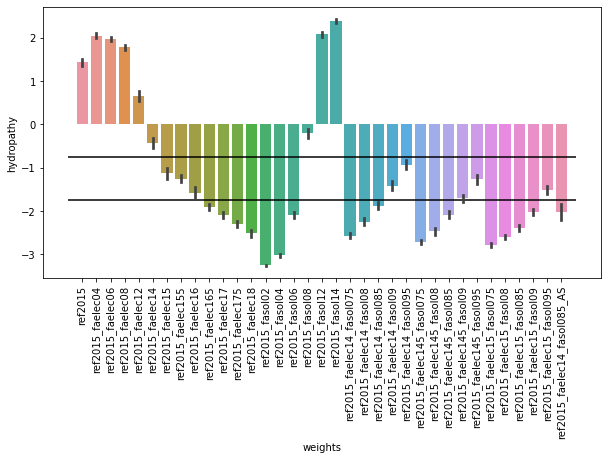

In [6]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="hydropathy", data=data, order=["ref2015","ref2015_faelec04","ref2015_faelec06","ref2015_faelec08","ref2015_faelec12","ref2015_faelec14","ref2015_faelec15","ref2015_faelec155","ref2015_faelec16","ref2015_faelec165","ref2015_faelec17","ref2015_faelec175","ref2015_faelec18","ref2015_fasol02","ref2015_fasol04","ref2015_fasol06","ref2015_fasol08","ref2015_fasol12","ref2015_fasol14","ref2015_faelec14_fasol075","ref2015_faelec14_fasol08","ref2015_faelec14_fasol085","ref2015_faelec14_fasol09","ref2015_faelec14_fasol095","ref2015_faelec145_fasol075","ref2015_faelec145_fasol08","ref2015_faelec145_fasol085","ref2015_faelec145_fasol09","ref2015_faelec145_fasol095","ref2015_faelec15_fasol075","ref2015_faelec15_fasol08","ref2015_faelec15_fasol085","ref2015_faelec15_fasol09","ref2015_faelec15_fasol095","ref2015_faelec14_fasol085_AS"])
plt.hlines(-1.75, -1, 35)
plt.hlines(-0.75, -1, 35)


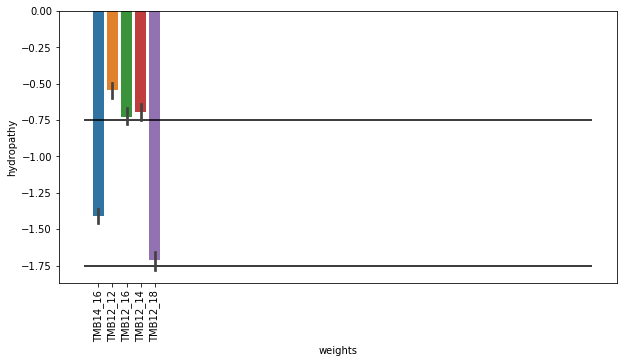

In [18]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="hydropathy", data=data)
plt.hlines(-1.75, -1, 35)
plt.hlines(-0.75, -1, 35)


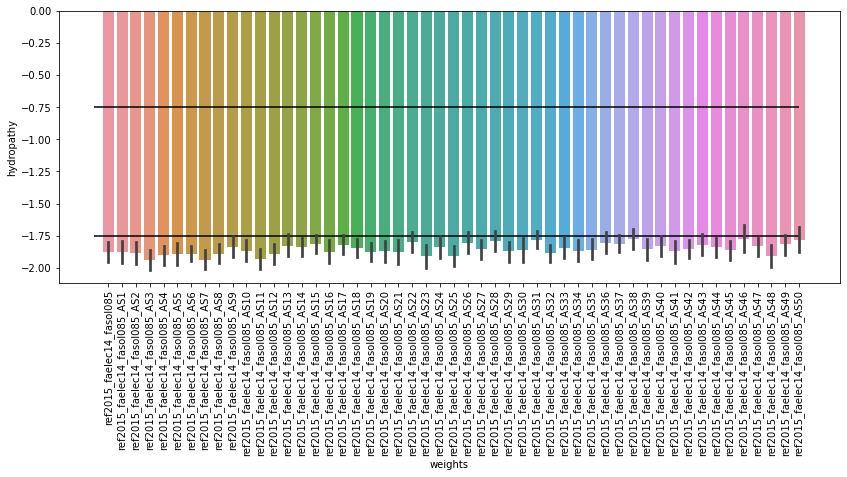

In [10]:
plt.rcParams["figure.figsize"] = [14, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="hydropathy", data=data, order=["ref2015_faelec14_fasol085","ref2015_faelec14_fasol085_AS1","ref2015_faelec14_fasol085_AS2","ref2015_faelec14_fasol085_AS3","ref2015_faelec14_fasol085_AS4","ref2015_faelec14_fasol085_AS5","ref2015_faelec14_fasol085_AS6","ref2015_faelec14_fasol085_AS7","ref2015_faelec14_fasol085_AS8","ref2015_faelec14_fasol085_AS9","ref2015_faelec14_fasol085_AS10","ref2015_faelec14_fasol085_AS11","ref2015_faelec14_fasol085_AS12","ref2015_faelec14_fasol085_AS13","ref2015_faelec14_fasol085_AS14","ref2015_faelec14_fasol085_AS15","ref2015_faelec14_fasol085_AS16","ref2015_faelec14_fasol085_AS17","ref2015_faelec14_fasol085_AS18","ref2015_faelec14_fasol085_AS19","ref2015_faelec14_fasol085_AS20","ref2015_faelec14_fasol085_AS21","ref2015_faelec14_fasol085_AS22","ref2015_faelec14_fasol085_AS23","ref2015_faelec14_fasol085_AS24","ref2015_faelec14_fasol085_AS25","ref2015_faelec14_fasol085_AS26","ref2015_faelec14_fasol085_AS27","ref2015_faelec14_fasol085_AS28","ref2015_faelec14_fasol085_AS29","ref2015_faelec14_fasol085_AS30","ref2015_faelec14_fasol085_AS31","ref2015_faelec14_fasol085_AS32","ref2015_faelec14_fasol085_AS33","ref2015_faelec14_fasol085_AS34","ref2015_faelec14_fasol085_AS35","ref2015_faelec14_fasol085_AS36","ref2015_faelec14_fasol085_AS37","ref2015_faelec14_fasol085_AS38","ref2015_faelec14_fasol085_AS39","ref2015_faelec14_fasol085_AS40","ref2015_faelec14_fasol085_AS41","ref2015_faelec14_fasol085_AS42","ref2015_faelec14_fasol085_AS43","ref2015_faelec14_fasol085_AS44","ref2015_faelec14_fasol085_AS45","ref2015_faelec14_fasol085_AS46","ref2015_faelec14_fasol085_AS47","ref2015_faelec14_fasol085_AS48","ref2015_faelec14_fasol085_AS49","ref2015_faelec14_fasol085_AS50"])
plt.hlines(-1.75, -1, 50)
plt.hlines(-0.75, -1, 50)


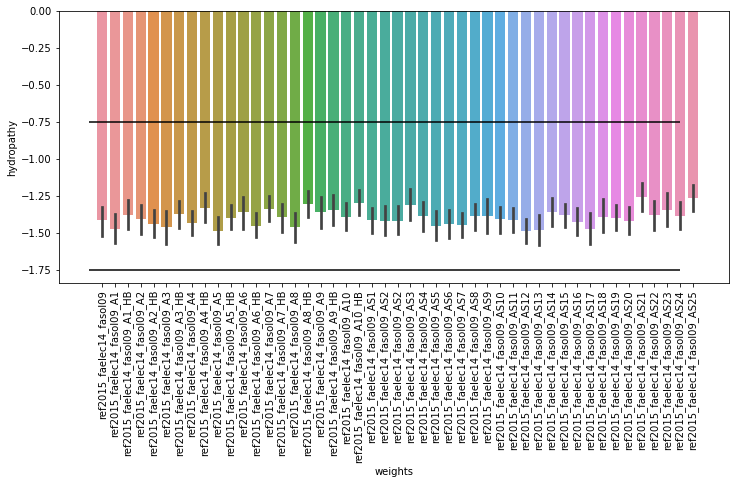

In [13]:
plt.rcParams["figure.figsize"] = [12, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="hydropathy", data=data, order=["ref2015_faelec14_fasol09","ref2015_faelec14_fasol09_A1","ref2015_faelec14_fasol09_A1_HB","ref2015_faelec14_fasol09_A2","ref2015_faelec14_fasol09_A2_HB","ref2015_faelec14_fasol09_A3","ref2015_faelec14_fasol09_A3_HB","ref2015_faelec14_fasol09_A4","ref2015_faelec14_fasol09_A4_HB","ref2015_faelec14_fasol09_A5","ref2015_faelec14_fasol09_A5_HB","ref2015_faelec14_fasol09_A6","ref2015_faelec14_fasol09_A6_HB","ref2015_faelec14_fasol09_A7","ref2015_faelec14_fasol09_A7_HB","ref2015_faelec14_fasol09_A8","ref2015_faelec14_fasol09_A8_HB","ref2015_faelec14_fasol09_A9","ref2015_faelec14_fasol09_A9_HB","ref2015_faelec14_fasol09_A10","ref2015_faelec14_fasol09_A10_HB","ref2015_faelec14_fasol09_AS1","ref2015_faelec14_fasol09_AS2","ref2015_faelec14_fasol09_AS2","ref2015_faelec14_fasol09_AS3","ref2015_faelec14_fasol09_AS4","ref2015_faelec14_fasol09_AS5","ref2015_faelec14_fasol09_AS6","ref2015_faelec14_fasol09_AS7","ref2015_faelec14_fasol09_AS8","ref2015_faelec14_fasol09_AS9","ref2015_faelec14_fasol09_AS10","ref2015_faelec14_fasol09_AS11","ref2015_faelec14_fasol09_AS12","ref2015_faelec14_fasol09_AS13","ref2015_faelec14_fasol09_AS14","ref2015_faelec14_fasol09_AS15","ref2015_faelec14_fasol09_AS16","ref2015_faelec14_fasol09_AS17","ref2015_faelec14_fasol09_AS18","ref2015_faelec14_fasol09_AS19","ref2015_faelec14_fasol09_AS20","ref2015_faelec14_fasol09_AS21","ref2015_faelec14_fasol09_AS22","ref2015_faelec14_fasol09_AS23","ref2015_faelec14_fasol09_AS24","ref2015_faelec14_fasol09_AS25"])
plt.hlines(-1.75, -1, 45)
plt.hlines(-0.75, -1, 45)


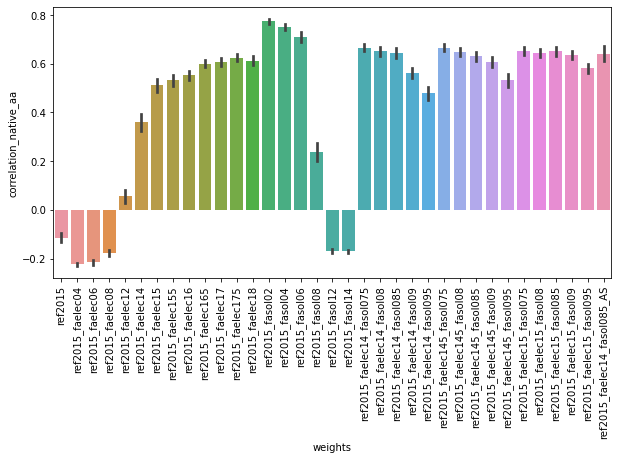

In [8]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="correlation_native_aa", data=data, order=["ref2015","ref2015_faelec04","ref2015_faelec06","ref2015_faelec08","ref2015_faelec12","ref2015_faelec14","ref2015_faelec15","ref2015_faelec155","ref2015_faelec16","ref2015_faelec165","ref2015_faelec17","ref2015_faelec175","ref2015_faelec18","ref2015_fasol02","ref2015_fasol04","ref2015_fasol06","ref2015_fasol08","ref2015_fasol12","ref2015_fasol14","ref2015_faelec14_fasol075","ref2015_faelec14_fasol08","ref2015_faelec14_fasol085","ref2015_faelec14_fasol09","ref2015_faelec14_fasol095","ref2015_faelec145_fasol075","ref2015_faelec145_fasol08","ref2015_faelec145_fasol085","ref2015_faelec145_fasol09","ref2015_faelec145_fasol095","ref2015_faelec15_fasol075","ref2015_faelec15_fasol08","ref2015_faelec15_fasol085","ref2015_faelec15_fasol09","ref2015_faelec15_fasol095","ref2015_faelec14_fasol085_AS"])


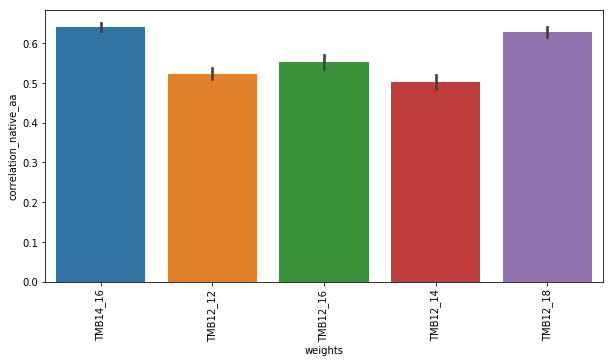

In [19]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="correlation_native_aa", data=data)


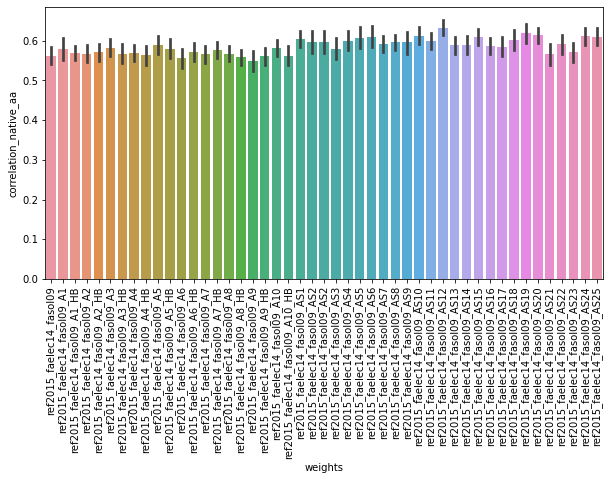

In [15]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="correlation_native_aa", data=data, order=["ref2015_faelec14_fasol09","ref2015_faelec14_fasol09_A1","ref2015_faelec14_fasol09_A1_HB","ref2015_faelec14_fasol09_A2","ref2015_faelec14_fasol09_A2_HB","ref2015_faelec14_fasol09_A3","ref2015_faelec14_fasol09_A3_HB","ref2015_faelec14_fasol09_A4","ref2015_faelec14_fasol09_A4_HB","ref2015_faelec14_fasol09_A5","ref2015_faelec14_fasol09_A5_HB","ref2015_faelec14_fasol09_A6","ref2015_faelec14_fasol09_A6_HB","ref2015_faelec14_fasol09_A7","ref2015_faelec14_fasol09_A7_HB","ref2015_faelec14_fasol09_A8","ref2015_faelec14_fasol09_A8_HB","ref2015_faelec14_fasol09_A9","ref2015_faelec14_fasol09_A9_HB","ref2015_faelec14_fasol09_A10","ref2015_faelec14_fasol09_A10_HB","ref2015_faelec14_fasol09_AS1","ref2015_faelec14_fasol09_AS2","ref2015_faelec14_fasol09_AS2","ref2015_faelec14_fasol09_AS3","ref2015_faelec14_fasol09_AS4","ref2015_faelec14_fasol09_AS5","ref2015_faelec14_fasol09_AS6","ref2015_faelec14_fasol09_AS7","ref2015_faelec14_fasol09_AS8","ref2015_faelec14_fasol09_AS9","ref2015_faelec14_fasol09_AS10","ref2015_faelec14_fasol09_AS11","ref2015_faelec14_fasol09_AS12","ref2015_faelec14_fasol09_AS13","ref2015_faelec14_fasol09_AS14","ref2015_faelec14_fasol09_AS15","ref2015_faelec14_fasol09_AS16","ref2015_faelec14_fasol09_AS17","ref2015_faelec14_fasol09_AS18","ref2015_faelec14_fasol09_AS19","ref2015_faelec14_fasol09_AS20","ref2015_faelec14_fasol09_AS21","ref2015_faelec14_fasol09_AS22","ref2015_faelec14_fasol09_AS23","ref2015_faelec14_fasol09_AS24","ref2015_faelec14_fasol09_AS25"])



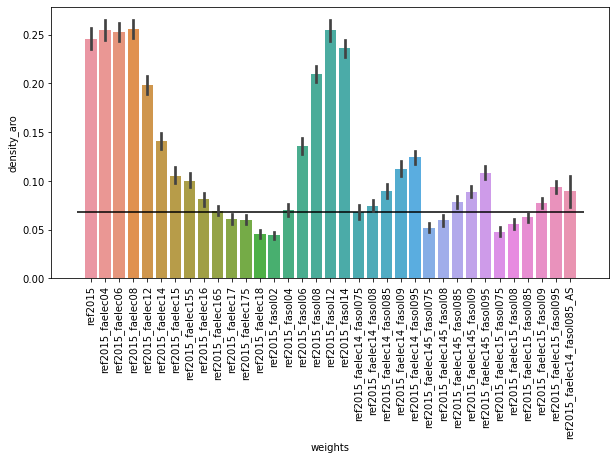

In [9]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_aro", data=data, order=["ref2015","ref2015_faelec04","ref2015_faelec06","ref2015_faelec08","ref2015_faelec12","ref2015_faelec14","ref2015_faelec15","ref2015_faelec155","ref2015_faelec16","ref2015_faelec165","ref2015_faelec17","ref2015_faelec175","ref2015_faelec18","ref2015_fasol02","ref2015_fasol04","ref2015_fasol06","ref2015_fasol08","ref2015_fasol12","ref2015_fasol14","ref2015_faelec14_fasol075","ref2015_faelec14_fasol08","ref2015_faelec14_fasol085","ref2015_faelec14_fasol09","ref2015_faelec14_fasol095","ref2015_faelec145_fasol075","ref2015_faelec145_fasol08","ref2015_faelec145_fasol085","ref2015_faelec145_fasol09","ref2015_faelec145_fasol095","ref2015_faelec15_fasol075","ref2015_faelec15_fasol08","ref2015_faelec15_fasol085","ref2015_faelec15_fasol09","ref2015_faelec15_fasol095","ref2015_faelec14_fasol085_AS"])
plt.hlines(0.068, -1, 35)


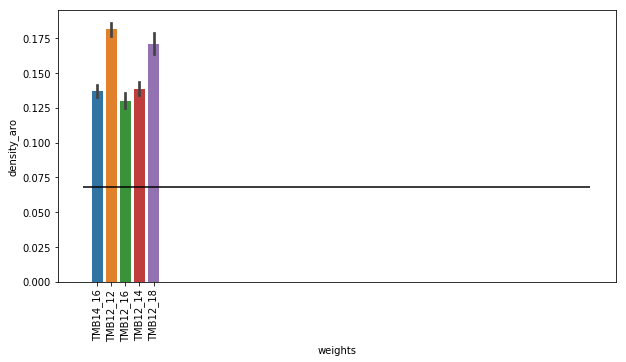

In [20]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_aro", data=data)
plt.hlines(0.068, -1, 35)


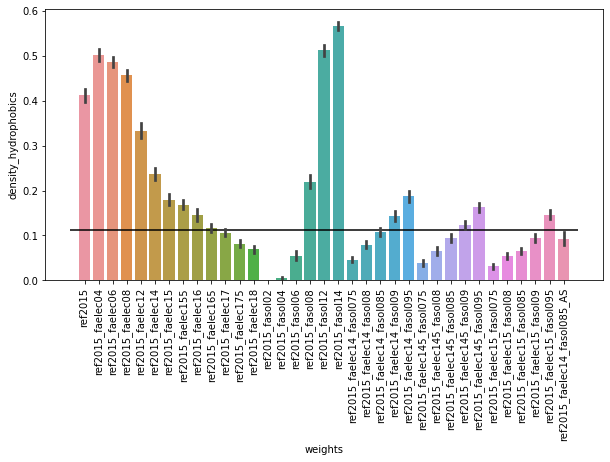

In [10]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_hydrophobics", data=data, order=["ref2015","ref2015_faelec04","ref2015_faelec06","ref2015_faelec08","ref2015_faelec12","ref2015_faelec14","ref2015_faelec15","ref2015_faelec155","ref2015_faelec16","ref2015_faelec165","ref2015_faelec17","ref2015_faelec175","ref2015_faelec18","ref2015_fasol02","ref2015_fasol04","ref2015_fasol06","ref2015_fasol08","ref2015_fasol12","ref2015_fasol14","ref2015_faelec14_fasol075","ref2015_faelec14_fasol08","ref2015_faelec14_fasol085","ref2015_faelec14_fasol09","ref2015_faelec14_fasol095","ref2015_faelec145_fasol075","ref2015_faelec145_fasol08","ref2015_faelec145_fasol085","ref2015_faelec145_fasol09","ref2015_faelec145_fasol095","ref2015_faelec15_fasol075","ref2015_faelec15_fasol08","ref2015_faelec15_fasol085","ref2015_faelec15_fasol09","ref2015_faelec15_fasol095","ref2015_faelec14_fasol085_AS"])
plt.hlines(0.113, -1, 35)

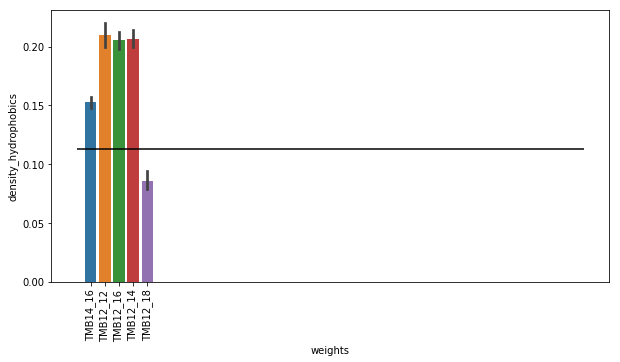

In [21]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_hydrophobics", data=data)
plt.hlines(0.113, -1, 35)

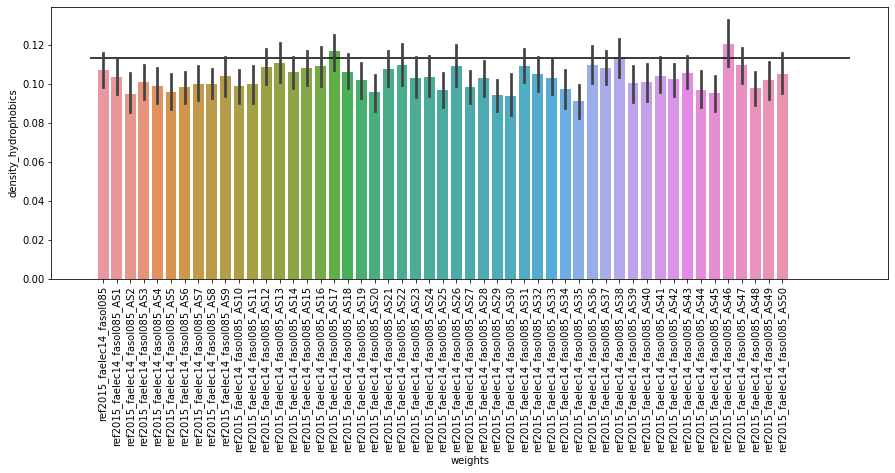

In [17]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_hydrophobics", data=data, order=["ref2015_faelec14_fasol085","ref2015_faelec14_fasol085_AS1","ref2015_faelec14_fasol085_AS2","ref2015_faelec14_fasol085_AS3","ref2015_faelec14_fasol085_AS4","ref2015_faelec14_fasol085_AS5","ref2015_faelec14_fasol085_AS6","ref2015_faelec14_fasol085_AS7","ref2015_faelec14_fasol085_AS8","ref2015_faelec14_fasol085_AS9","ref2015_faelec14_fasol085_AS10","ref2015_faelec14_fasol085_AS11","ref2015_faelec14_fasol085_AS12","ref2015_faelec14_fasol085_AS13","ref2015_faelec14_fasol085_AS14","ref2015_faelec14_fasol085_AS15","ref2015_faelec14_fasol085_AS16","ref2015_faelec14_fasol085_AS17","ref2015_faelec14_fasol085_AS18","ref2015_faelec14_fasol085_AS19","ref2015_faelec14_fasol085_AS20","ref2015_faelec14_fasol085_AS21","ref2015_faelec14_fasol085_AS22","ref2015_faelec14_fasol085_AS23","ref2015_faelec14_fasol085_AS24","ref2015_faelec14_fasol085_AS25","ref2015_faelec14_fasol085_AS26","ref2015_faelec14_fasol085_AS27","ref2015_faelec14_fasol085_AS28","ref2015_faelec14_fasol085_AS29","ref2015_faelec14_fasol085_AS30","ref2015_faelec14_fasol085_AS31","ref2015_faelec14_fasol085_AS32","ref2015_faelec14_fasol085_AS33","ref2015_faelec14_fasol085_AS34","ref2015_faelec14_fasol085_AS35","ref2015_faelec14_fasol085_AS36","ref2015_faelec14_fasol085_AS37","ref2015_faelec14_fasol085_AS38","ref2015_faelec14_fasol085_AS39","ref2015_faelec14_fasol085_AS40","ref2015_faelec14_fasol085_AS41","ref2015_faelec14_fasol085_AS42","ref2015_faelec14_fasol085_AS43","ref2015_faelec14_fasol085_AS44","ref2015_faelec14_fasol085_AS45","ref2015_faelec14_fasol085_AS46","ref2015_faelec14_fasol085_AS47","ref2015_faelec14_fasol085_AS48","ref2015_faelec14_fasol085_AS49","ref2015_faelec14_fasol085_AS50"])
plt.hlines(0.113, -1, 55)

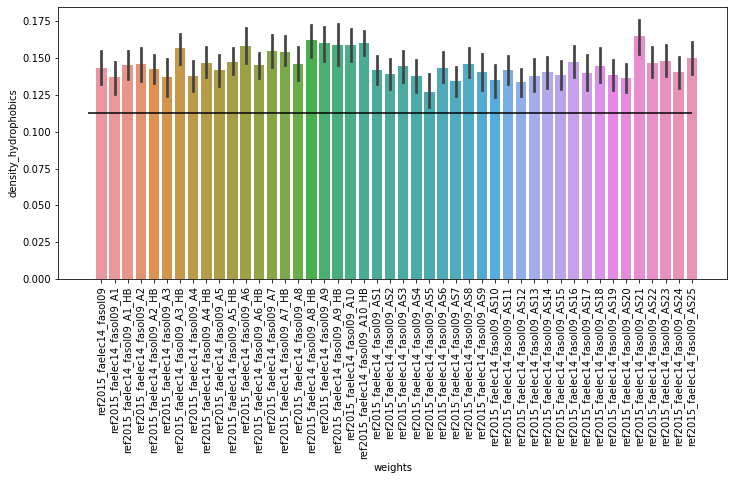

In [26]:
plt.rcParams["figure.figsize"] = [12, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_hydrophobics", data=data, order=["ref2015_faelec14_fasol09","ref2015_faelec14_fasol09_A1","ref2015_faelec14_fasol09_A1_HB","ref2015_faelec14_fasol09_A2","ref2015_faelec14_fasol09_A2_HB","ref2015_faelec14_fasol09_A3","ref2015_faelec14_fasol09_A3_HB","ref2015_faelec14_fasol09_A4","ref2015_faelec14_fasol09_A4_HB","ref2015_faelec14_fasol09_A5","ref2015_faelec14_fasol09_A5_HB","ref2015_faelec14_fasol09_A6","ref2015_faelec14_fasol09_A6_HB","ref2015_faelec14_fasol09_A7","ref2015_faelec14_fasol09_A7_HB","ref2015_faelec14_fasol09_A8","ref2015_faelec14_fasol09_A8_HB","ref2015_faelec14_fasol09_A9","ref2015_faelec14_fasol09_A9_HB","ref2015_faelec14_fasol09_A10","ref2015_faelec14_fasol09_A10_HB","ref2015_faelec14_fasol09_AS1","ref2015_faelec14_fasol09_AS2","ref2015_faelec14_fasol09_AS3","ref2015_faelec14_fasol09_AS4","ref2015_faelec14_fasol09_AS5","ref2015_faelec14_fasol09_AS6","ref2015_faelec14_fasol09_AS7","ref2015_faelec14_fasol09_AS8","ref2015_faelec14_fasol09_AS9","ref2015_faelec14_fasol09_AS10","ref2015_faelec14_fasol09_AS11","ref2015_faelec14_fasol09_AS12","ref2015_faelec14_fasol09_AS13","ref2015_faelec14_fasol09_AS14","ref2015_faelec14_fasol09_AS15","ref2015_faelec14_fasol09_AS16","ref2015_faelec14_fasol09_AS17","ref2015_faelec14_fasol09_AS18","ref2015_faelec14_fasol09_AS19","ref2015_faelec14_fasol09_AS20","ref2015_faelec14_fasol09_AS21","ref2015_faelec14_fasol09_AS22","ref2015_faelec14_fasol09_AS23","ref2015_faelec14_fasol09_AS24","ref2015_faelec14_fasol09_AS25"])
plt.hlines(0.113, -1, 45)

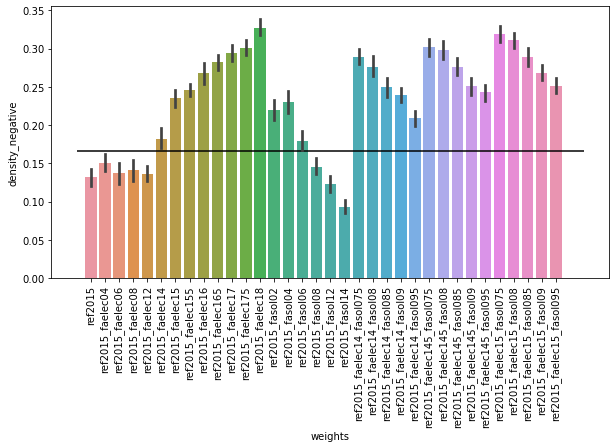

In [31]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_negative", data=data, order=["ref2015","ref2015_faelec04","ref2015_faelec06","ref2015_faelec08","ref2015_faelec12","ref2015_faelec14","ref2015_faelec15","ref2015_faelec155","ref2015_faelec16","ref2015_faelec165","ref2015_faelec17","ref2015_faelec175","ref2015_faelec18","ref2015_fasol02","ref2015_fasol04","ref2015_fasol06","ref2015_fasol08","ref2015_fasol12","ref2015_fasol14","ref2015_faelec14_fasol075","ref2015_faelec14_fasol08","ref2015_faelec14_fasol085","ref2015_faelec14_fasol09","ref2015_faelec14_fasol095","ref2015_faelec145_fasol075","ref2015_faelec145_fasol08","ref2015_faelec145_fasol085","ref2015_faelec145_fasol09","ref2015_faelec145_fasol095","ref2015_faelec15_fasol075","ref2015_faelec15_fasol08","ref2015_faelec15_fasol085","ref2015_faelec15_fasol09","ref2015_faelec15_fasol095"])
plt.hlines(0.166, -1, 35)

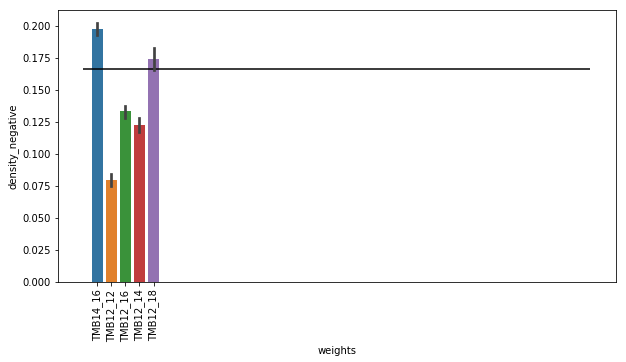

In [22]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_negative", data=data)
plt.hlines(0.166, -1, 35)

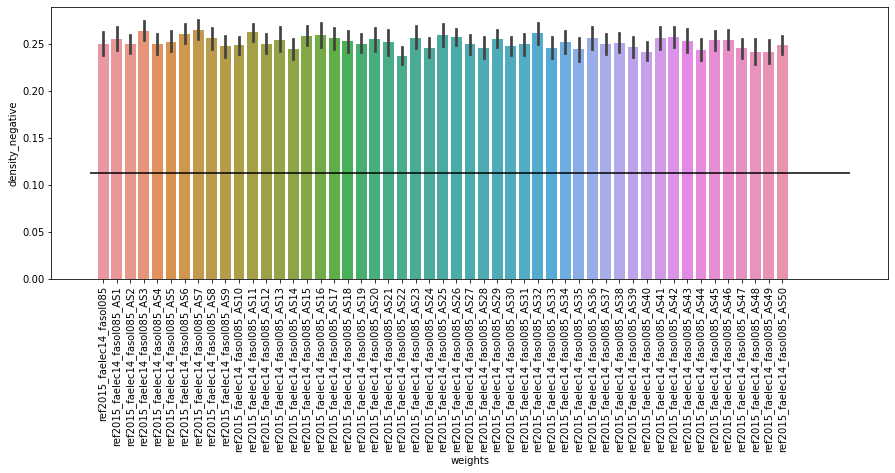

In [20]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_negative", data=data, order=["ref2015_faelec14_fasol085","ref2015_faelec14_fasol085_AS1","ref2015_faelec14_fasol085_AS2","ref2015_faelec14_fasol085_AS3","ref2015_faelec14_fasol085_AS4","ref2015_faelec14_fasol085_AS5","ref2015_faelec14_fasol085_AS6","ref2015_faelec14_fasol085_AS7","ref2015_faelec14_fasol085_AS8","ref2015_faelec14_fasol085_AS9","ref2015_faelec14_fasol085_AS10","ref2015_faelec14_fasol085_AS11","ref2015_faelec14_fasol085_AS12","ref2015_faelec14_fasol085_AS13","ref2015_faelec14_fasol085_AS14","ref2015_faelec14_fasol085_AS15","ref2015_faelec14_fasol085_AS16","ref2015_faelec14_fasol085_AS17","ref2015_faelec14_fasol085_AS18","ref2015_faelec14_fasol085_AS19","ref2015_faelec14_fasol085_AS20","ref2015_faelec14_fasol085_AS21","ref2015_faelec14_fasol085_AS22","ref2015_faelec14_fasol085_AS23","ref2015_faelec14_fasol085_AS24","ref2015_faelec14_fasol085_AS25","ref2015_faelec14_fasol085_AS26","ref2015_faelec14_fasol085_AS27","ref2015_faelec14_fasol085_AS28","ref2015_faelec14_fasol085_AS29","ref2015_faelec14_fasol085_AS30","ref2015_faelec14_fasol085_AS31","ref2015_faelec14_fasol085_AS32","ref2015_faelec14_fasol085_AS33","ref2015_faelec14_fasol085_AS34","ref2015_faelec14_fasol085_AS35","ref2015_faelec14_fasol085_AS36","ref2015_faelec14_fasol085_AS37","ref2015_faelec14_fasol085_AS38","ref2015_faelec14_fasol085_AS39","ref2015_faelec14_fasol085_AS40","ref2015_faelec14_fasol085_AS41","ref2015_faelec14_fasol085_AS42","ref2015_faelec14_fasol085_AS43","ref2015_faelec14_fasol085_AS44","ref2015_faelec14_fasol085_AS45","ref2015_faelec14_fasol085_AS46","ref2015_faelec14_fasol085_AS47","ref2015_faelec14_fasol085_AS48","ref2015_faelec14_fasol085_AS49","ref2015_faelec14_fasol085_AS50"])
plt.hlines(0.113, -1, 55)

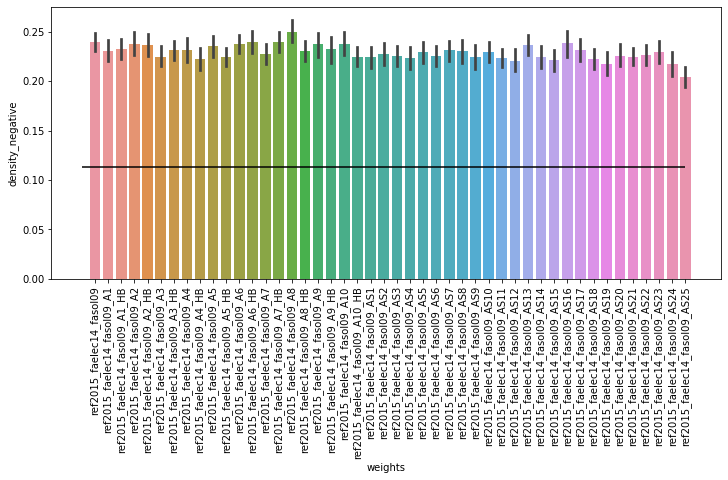

In [27]:
plt.rcParams["figure.figsize"] = [12, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_negative", data=data, order=["ref2015_faelec14_fasol09","ref2015_faelec14_fasol09_A1","ref2015_faelec14_fasol09_A1_HB","ref2015_faelec14_fasol09_A2","ref2015_faelec14_fasol09_A2_HB","ref2015_faelec14_fasol09_A3","ref2015_faelec14_fasol09_A3_HB","ref2015_faelec14_fasol09_A4","ref2015_faelec14_fasol09_A4_HB","ref2015_faelec14_fasol09_A5","ref2015_faelec14_fasol09_A5_HB","ref2015_faelec14_fasol09_A6","ref2015_faelec14_fasol09_A6_HB","ref2015_faelec14_fasol09_A7","ref2015_faelec14_fasol09_A7_HB","ref2015_faelec14_fasol09_A8","ref2015_faelec14_fasol09_A8_HB","ref2015_faelec14_fasol09_A9","ref2015_faelec14_fasol09_A9_HB","ref2015_faelec14_fasol09_A10","ref2015_faelec14_fasol09_A10_HB","ref2015_faelec14_fasol09_AS1","ref2015_faelec14_fasol09_AS2","ref2015_faelec14_fasol09_AS3","ref2015_faelec14_fasol09_AS4","ref2015_faelec14_fasol09_AS5","ref2015_faelec14_fasol09_AS6","ref2015_faelec14_fasol09_AS7","ref2015_faelec14_fasol09_AS8","ref2015_faelec14_fasol09_AS9","ref2015_faelec14_fasol09_AS10","ref2015_faelec14_fasol09_AS11","ref2015_faelec14_fasol09_AS12","ref2015_faelec14_fasol09_AS13","ref2015_faelec14_fasol09_AS14","ref2015_faelec14_fasol09_AS15","ref2015_faelec14_fasol09_AS16","ref2015_faelec14_fasol09_AS17","ref2015_faelec14_fasol09_AS18","ref2015_faelec14_fasol09_AS19","ref2015_faelec14_fasol09_AS20","ref2015_faelec14_fasol09_AS21","ref2015_faelec14_fasol09_AS22","ref2015_faelec14_fasol09_AS23","ref2015_faelec14_fasol09_AS24","ref2015_faelec14_fasol09_AS25"])
plt.hlines(0.113, -1, 45)

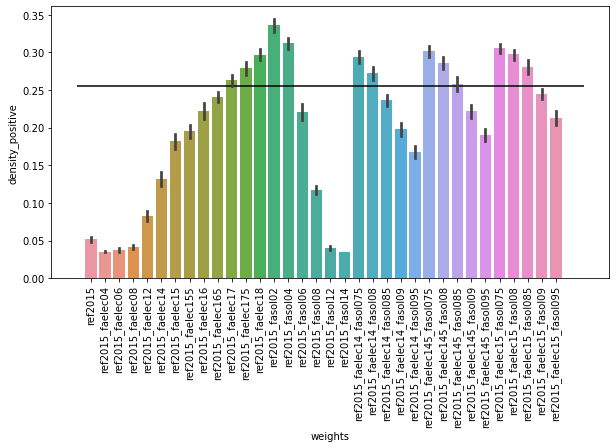

In [32]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_positive", data=data, order=["ref2015","ref2015_faelec04","ref2015_faelec06","ref2015_faelec08","ref2015_faelec12","ref2015_faelec14","ref2015_faelec15","ref2015_faelec155","ref2015_faelec16","ref2015_faelec165","ref2015_faelec17","ref2015_faelec175","ref2015_faelec18","ref2015_fasol02","ref2015_fasol04","ref2015_fasol06","ref2015_fasol08","ref2015_fasol12","ref2015_fasol14","ref2015_faelec14_fasol075","ref2015_faelec14_fasol08","ref2015_faelec14_fasol085","ref2015_faelec14_fasol09","ref2015_faelec14_fasol095","ref2015_faelec145_fasol075","ref2015_faelec145_fasol08","ref2015_faelec145_fasol085","ref2015_faelec145_fasol09","ref2015_faelec145_fasol095","ref2015_faelec15_fasol075","ref2015_faelec15_fasol08","ref2015_faelec15_fasol085","ref2015_faelec15_fasol09","ref2015_faelec15_fasol095"])
plt.hlines(0.256, -1, 35)

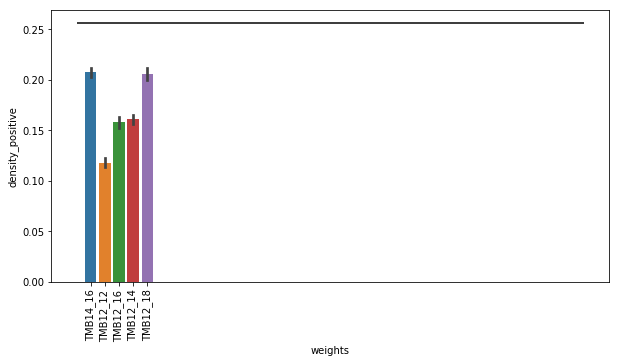

In [23]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_positive", data=data)
plt.hlines(0.256, -1, 35)

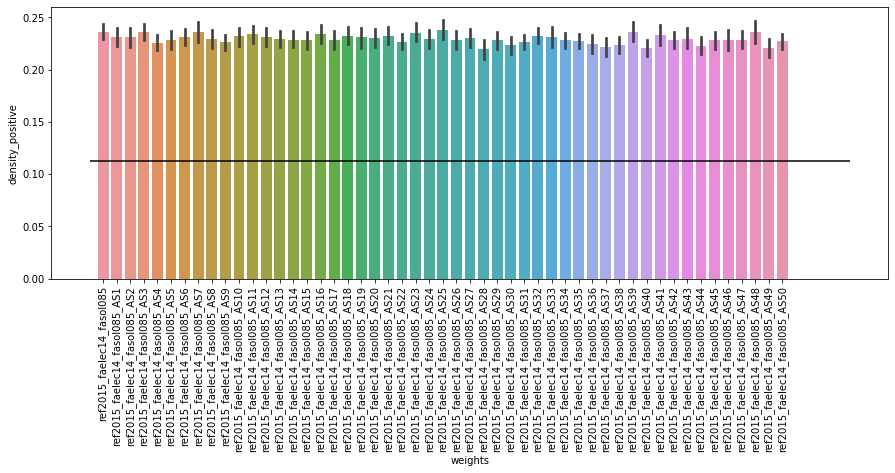

In [19]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_positive", data=data, order=["ref2015_faelec14_fasol085","ref2015_faelec14_fasol085_AS1","ref2015_faelec14_fasol085_AS2","ref2015_faelec14_fasol085_AS3","ref2015_faelec14_fasol085_AS4","ref2015_faelec14_fasol085_AS5","ref2015_faelec14_fasol085_AS6","ref2015_faelec14_fasol085_AS7","ref2015_faelec14_fasol085_AS8","ref2015_faelec14_fasol085_AS9","ref2015_faelec14_fasol085_AS10","ref2015_faelec14_fasol085_AS11","ref2015_faelec14_fasol085_AS12","ref2015_faelec14_fasol085_AS13","ref2015_faelec14_fasol085_AS14","ref2015_faelec14_fasol085_AS15","ref2015_faelec14_fasol085_AS16","ref2015_faelec14_fasol085_AS17","ref2015_faelec14_fasol085_AS18","ref2015_faelec14_fasol085_AS19","ref2015_faelec14_fasol085_AS20","ref2015_faelec14_fasol085_AS21","ref2015_faelec14_fasol085_AS22","ref2015_faelec14_fasol085_AS23","ref2015_faelec14_fasol085_AS24","ref2015_faelec14_fasol085_AS25","ref2015_faelec14_fasol085_AS26","ref2015_faelec14_fasol085_AS27","ref2015_faelec14_fasol085_AS28","ref2015_faelec14_fasol085_AS29","ref2015_faelec14_fasol085_AS30","ref2015_faelec14_fasol085_AS31","ref2015_faelec14_fasol085_AS32","ref2015_faelec14_fasol085_AS33","ref2015_faelec14_fasol085_AS34","ref2015_faelec14_fasol085_AS35","ref2015_faelec14_fasol085_AS36","ref2015_faelec14_fasol085_AS37","ref2015_faelec14_fasol085_AS38","ref2015_faelec14_fasol085_AS39","ref2015_faelec14_fasol085_AS40","ref2015_faelec14_fasol085_AS41","ref2015_faelec14_fasol085_AS42","ref2015_faelec14_fasol085_AS43","ref2015_faelec14_fasol085_AS44","ref2015_faelec14_fasol085_AS45","ref2015_faelec14_fasol085_AS46","ref2015_faelec14_fasol085_AS47","ref2015_faelec14_fasol085_AS48","ref2015_faelec14_fasol085_AS49","ref2015_faelec14_fasol085_AS50"])
plt.hlines(0.113, -1, 55)

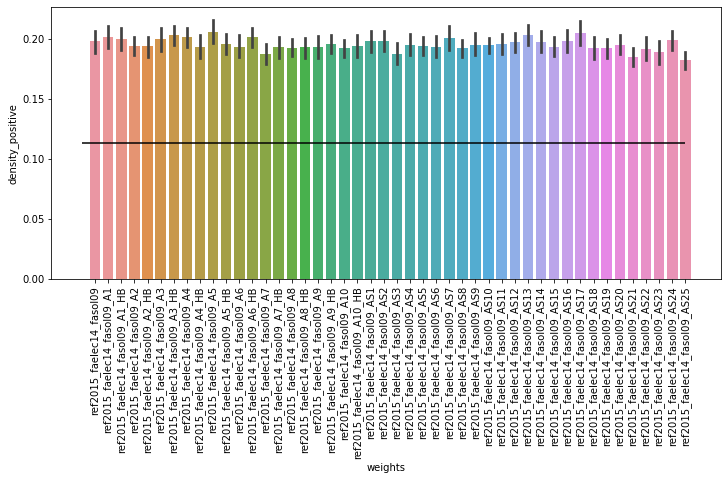

In [28]:
plt.rcParams["figure.figsize"] = [12, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_positive", data=data, order=["ref2015_faelec14_fasol09","ref2015_faelec14_fasol09_A1","ref2015_faelec14_fasol09_A1_HB","ref2015_faelec14_fasol09_A2","ref2015_faelec14_fasol09_A2_HB","ref2015_faelec14_fasol09_A3","ref2015_faelec14_fasol09_A3_HB","ref2015_faelec14_fasol09_A4","ref2015_faelec14_fasol09_A4_HB","ref2015_faelec14_fasol09_A5","ref2015_faelec14_fasol09_A5_HB","ref2015_faelec14_fasol09_A6","ref2015_faelec14_fasol09_A6_HB","ref2015_faelec14_fasol09_A7","ref2015_faelec14_fasol09_A7_HB","ref2015_faelec14_fasol09_A8","ref2015_faelec14_fasol09_A8_HB","ref2015_faelec14_fasol09_A9","ref2015_faelec14_fasol09_A9_HB","ref2015_faelec14_fasol09_A10","ref2015_faelec14_fasol09_A10_HB","ref2015_faelec14_fasol09_AS1","ref2015_faelec14_fasol09_AS2","ref2015_faelec14_fasol09_AS3","ref2015_faelec14_fasol09_AS4","ref2015_faelec14_fasol09_AS5","ref2015_faelec14_fasol09_AS6","ref2015_faelec14_fasol09_AS7","ref2015_faelec14_fasol09_AS8","ref2015_faelec14_fasol09_AS9","ref2015_faelec14_fasol09_AS10","ref2015_faelec14_fasol09_AS11","ref2015_faelec14_fasol09_AS12","ref2015_faelec14_fasol09_AS13","ref2015_faelec14_fasol09_AS14","ref2015_faelec14_fasol09_AS15","ref2015_faelec14_fasol09_AS16","ref2015_faelec14_fasol09_AS17","ref2015_faelec14_fasol09_AS18","ref2015_faelec14_fasol09_AS19","ref2015_faelec14_fasol09_AS20","ref2015_faelec14_fasol09_AS21","ref2015_faelec14_fasol09_AS22","ref2015_faelec14_fasol09_AS23","ref2015_faelec14_fasol09_AS24","ref2015_faelec14_fasol09_AS25"])
plt.hlines(0.113, -1, 45)

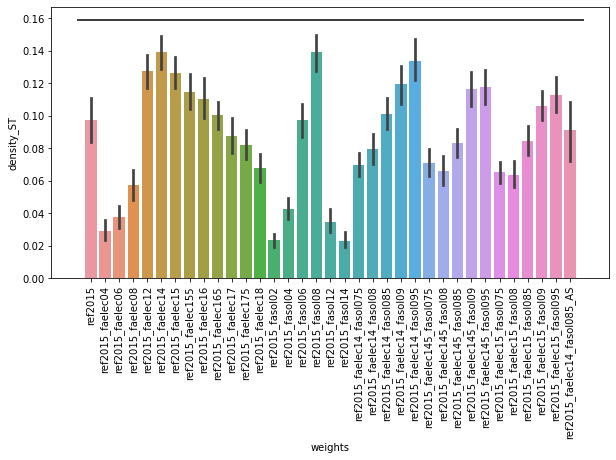

In [11]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_ST", data=data, order=["ref2015","ref2015_faelec04","ref2015_faelec06","ref2015_faelec08","ref2015_faelec12","ref2015_faelec14","ref2015_faelec15","ref2015_faelec155","ref2015_faelec16","ref2015_faelec165","ref2015_faelec17","ref2015_faelec175","ref2015_faelec18","ref2015_fasol02","ref2015_fasol04","ref2015_fasol06","ref2015_fasol08","ref2015_fasol12","ref2015_fasol14","ref2015_faelec14_fasol075","ref2015_faelec14_fasol08","ref2015_faelec14_fasol085","ref2015_faelec14_fasol09","ref2015_faelec14_fasol095","ref2015_faelec145_fasol075","ref2015_faelec145_fasol08","ref2015_faelec145_fasol085","ref2015_faelec145_fasol09","ref2015_faelec145_fasol095","ref2015_faelec15_fasol075","ref2015_faelec15_fasol08","ref2015_faelec15_fasol085","ref2015_faelec15_fasol09","ref2015_faelec15_fasol095","ref2015_faelec14_fasol085_AS"])
plt.hlines(0.159, -1, 35)

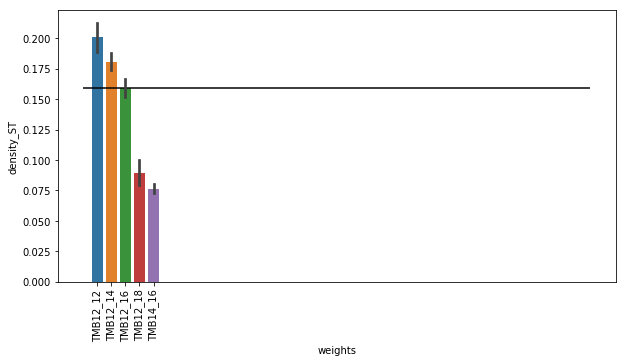

In [30]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_ST", data=data, order=["TMB12_12","TMB12_14","TMB12_16",'TMB12_18','TMB14_16'])
plt.hlines(0.159, -1, 35)

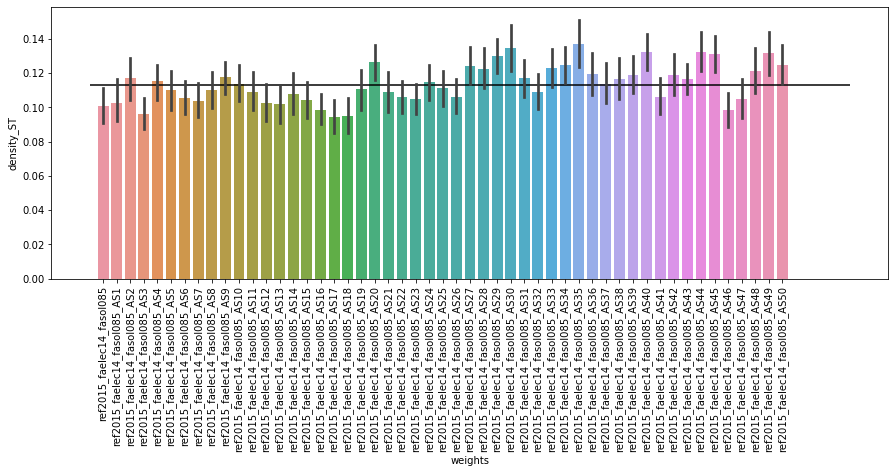

In [21]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_ST", data=data, order=["ref2015_faelec14_fasol085","ref2015_faelec14_fasol085_AS1","ref2015_faelec14_fasol085_AS2","ref2015_faelec14_fasol085_AS3","ref2015_faelec14_fasol085_AS4","ref2015_faelec14_fasol085_AS5","ref2015_faelec14_fasol085_AS6","ref2015_faelec14_fasol085_AS7","ref2015_faelec14_fasol085_AS8","ref2015_faelec14_fasol085_AS9","ref2015_faelec14_fasol085_AS10","ref2015_faelec14_fasol085_AS11","ref2015_faelec14_fasol085_AS12","ref2015_faelec14_fasol085_AS13","ref2015_faelec14_fasol085_AS14","ref2015_faelec14_fasol085_AS15","ref2015_faelec14_fasol085_AS16","ref2015_faelec14_fasol085_AS17","ref2015_faelec14_fasol085_AS18","ref2015_faelec14_fasol085_AS19","ref2015_faelec14_fasol085_AS20","ref2015_faelec14_fasol085_AS21","ref2015_faelec14_fasol085_AS22","ref2015_faelec14_fasol085_AS23","ref2015_faelec14_fasol085_AS24","ref2015_faelec14_fasol085_AS25","ref2015_faelec14_fasol085_AS26","ref2015_faelec14_fasol085_AS27","ref2015_faelec14_fasol085_AS28","ref2015_faelec14_fasol085_AS29","ref2015_faelec14_fasol085_AS30","ref2015_faelec14_fasol085_AS31","ref2015_faelec14_fasol085_AS32","ref2015_faelec14_fasol085_AS33","ref2015_faelec14_fasol085_AS34","ref2015_faelec14_fasol085_AS35","ref2015_faelec14_fasol085_AS36","ref2015_faelec14_fasol085_AS37","ref2015_faelec14_fasol085_AS38","ref2015_faelec14_fasol085_AS39","ref2015_faelec14_fasol085_AS40","ref2015_faelec14_fasol085_AS41","ref2015_faelec14_fasol085_AS42","ref2015_faelec14_fasol085_AS43","ref2015_faelec14_fasol085_AS44","ref2015_faelec14_fasol085_AS45","ref2015_faelec14_fasol085_AS46","ref2015_faelec14_fasol085_AS47","ref2015_faelec14_fasol085_AS48","ref2015_faelec14_fasol085_AS49","ref2015_faelec14_fasol085_AS50"])
plt.hlines(0.113, -1, 55)

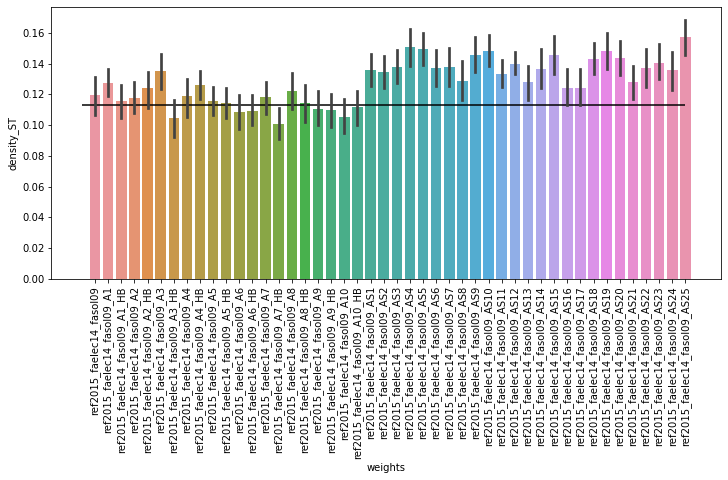

In [29]:
plt.rcParams["figure.figsize"] = [12, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_ST", data=data, order=["ref2015_faelec14_fasol09","ref2015_faelec14_fasol09_A1","ref2015_faelec14_fasol09_A1_HB","ref2015_faelec14_fasol09_A2","ref2015_faelec14_fasol09_A2_HB","ref2015_faelec14_fasol09_A3","ref2015_faelec14_fasol09_A3_HB","ref2015_faelec14_fasol09_A4","ref2015_faelec14_fasol09_A4_HB","ref2015_faelec14_fasol09_A5","ref2015_faelec14_fasol09_A5_HB","ref2015_faelec14_fasol09_A6","ref2015_faelec14_fasol09_A6_HB","ref2015_faelec14_fasol09_A7","ref2015_faelec14_fasol09_A7_HB","ref2015_faelec14_fasol09_A8","ref2015_faelec14_fasol09_A8_HB","ref2015_faelec14_fasol09_A9","ref2015_faelec14_fasol09_A9_HB","ref2015_faelec14_fasol09_A10","ref2015_faelec14_fasol09_A10_HB","ref2015_faelec14_fasol09_AS1","ref2015_faelec14_fasol09_AS2","ref2015_faelec14_fasol09_AS3","ref2015_faelec14_fasol09_AS4","ref2015_faelec14_fasol09_AS5","ref2015_faelec14_fasol09_AS6","ref2015_faelec14_fasol09_AS7","ref2015_faelec14_fasol09_AS8","ref2015_faelec14_fasol09_AS9","ref2015_faelec14_fasol09_AS10","ref2015_faelec14_fasol09_AS11","ref2015_faelec14_fasol09_AS12","ref2015_faelec14_fasol09_AS13","ref2015_faelec14_fasol09_AS14","ref2015_faelec14_fasol09_AS15","ref2015_faelec14_fasol09_AS16","ref2015_faelec14_fasol09_AS17","ref2015_faelec14_fasol09_AS18","ref2015_faelec14_fasol09_AS19","ref2015_faelec14_fasol09_AS20","ref2015_faelec14_fasol09_AS21","ref2015_faelec14_fasol09_AS22","ref2015_faelec14_fasol09_AS23","ref2015_faelec14_fasol09_AS24","ref2015_faelec14_fasol09_AS25"])
plt.hlines(0.113, -1, 45)

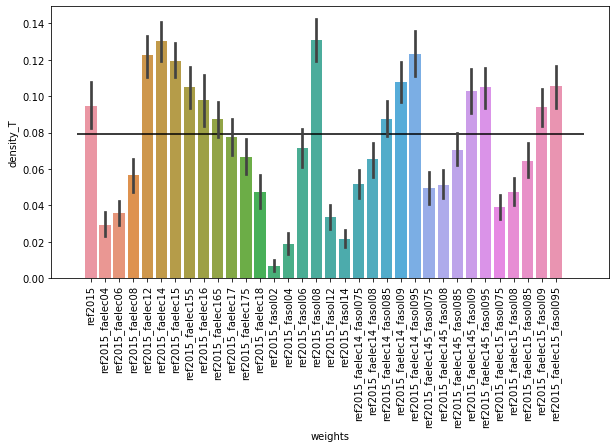

In [7]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_T", data=data, order=["ref2015","ref2015_faelec04","ref2015_faelec06","ref2015_faelec08","ref2015_faelec12","ref2015_faelec14","ref2015_faelec15","ref2015_faelec155","ref2015_faelec16","ref2015_faelec165","ref2015_faelec17","ref2015_faelec175","ref2015_faelec18","ref2015_fasol02","ref2015_fasol04","ref2015_fasol06","ref2015_fasol08","ref2015_fasol12","ref2015_fasol14","ref2015_faelec14_fasol075","ref2015_faelec14_fasol08","ref2015_faelec14_fasol085","ref2015_faelec14_fasol09","ref2015_faelec14_fasol095","ref2015_faelec145_fasol075","ref2015_faelec145_fasol08","ref2015_faelec145_fasol085","ref2015_faelec145_fasol09","ref2015_faelec145_fasol095","ref2015_faelec15_fasol075","ref2015_faelec15_fasol08","ref2015_faelec15_fasol085","ref2015_faelec15_fasol09","ref2015_faelec15_fasol095"])
plt.hlines(0.079, -1, 35)

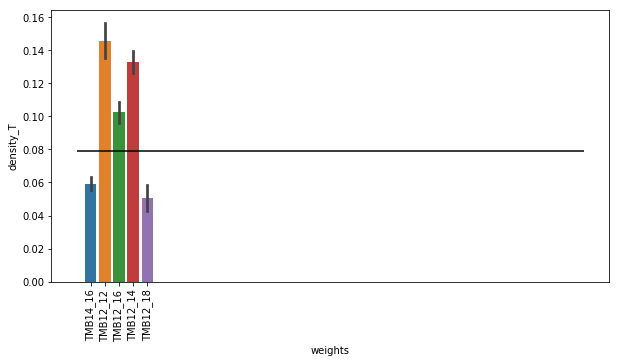

In [25]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_T", data=data)
plt.hlines(0.079, -1, 35)

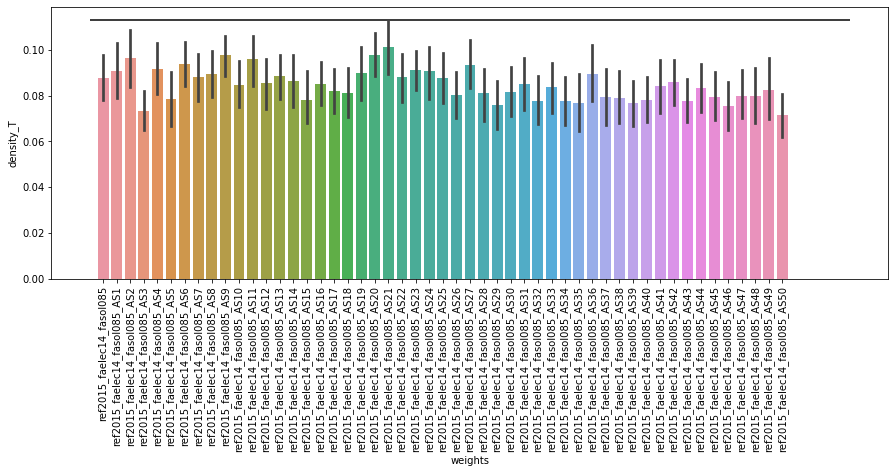

In [22]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_T", data=data, order=["ref2015_faelec14_fasol085","ref2015_faelec14_fasol085_AS1","ref2015_faelec14_fasol085_AS2","ref2015_faelec14_fasol085_AS3","ref2015_faelec14_fasol085_AS4","ref2015_faelec14_fasol085_AS5","ref2015_faelec14_fasol085_AS6","ref2015_faelec14_fasol085_AS7","ref2015_faelec14_fasol085_AS8","ref2015_faelec14_fasol085_AS9","ref2015_faelec14_fasol085_AS10","ref2015_faelec14_fasol085_AS11","ref2015_faelec14_fasol085_AS12","ref2015_faelec14_fasol085_AS13","ref2015_faelec14_fasol085_AS14","ref2015_faelec14_fasol085_AS15","ref2015_faelec14_fasol085_AS16","ref2015_faelec14_fasol085_AS17","ref2015_faelec14_fasol085_AS18","ref2015_faelec14_fasol085_AS19","ref2015_faelec14_fasol085_AS20","ref2015_faelec14_fasol085_AS21","ref2015_faelec14_fasol085_AS22","ref2015_faelec14_fasol085_AS23","ref2015_faelec14_fasol085_AS24","ref2015_faelec14_fasol085_AS25","ref2015_faelec14_fasol085_AS26","ref2015_faelec14_fasol085_AS27","ref2015_faelec14_fasol085_AS28","ref2015_faelec14_fasol085_AS29","ref2015_faelec14_fasol085_AS30","ref2015_faelec14_fasol085_AS31","ref2015_faelec14_fasol085_AS32","ref2015_faelec14_fasol085_AS33","ref2015_faelec14_fasol085_AS34","ref2015_faelec14_fasol085_AS35","ref2015_faelec14_fasol085_AS36","ref2015_faelec14_fasol085_AS37","ref2015_faelec14_fasol085_AS38","ref2015_faelec14_fasol085_AS39","ref2015_faelec14_fasol085_AS40","ref2015_faelec14_fasol085_AS41","ref2015_faelec14_fasol085_AS42","ref2015_faelec14_fasol085_AS43","ref2015_faelec14_fasol085_AS44","ref2015_faelec14_fasol085_AS45","ref2015_faelec14_fasol085_AS46","ref2015_faelec14_fasol085_AS47","ref2015_faelec14_fasol085_AS48","ref2015_faelec14_fasol085_AS49","ref2015_faelec14_fasol085_AS50"])
plt.hlines(0.113, -1, 55)

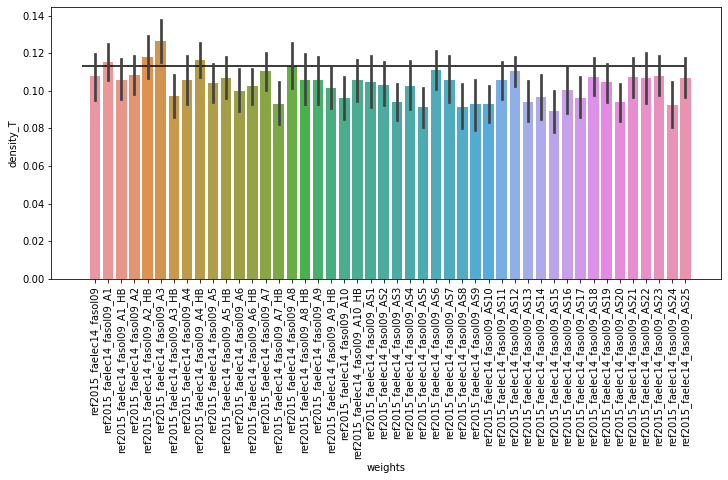

In [30]:
plt.rcParams["figure.figsize"] = [12, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_T", data=data, order=["ref2015_faelec14_fasol09","ref2015_faelec14_fasol09_A1","ref2015_faelec14_fasol09_A1_HB","ref2015_faelec14_fasol09_A2","ref2015_faelec14_fasol09_A2_HB","ref2015_faelec14_fasol09_A3","ref2015_faelec14_fasol09_A3_HB","ref2015_faelec14_fasol09_A4","ref2015_faelec14_fasol09_A4_HB","ref2015_faelec14_fasol09_A5","ref2015_faelec14_fasol09_A5_HB","ref2015_faelec14_fasol09_A6","ref2015_faelec14_fasol09_A6_HB","ref2015_faelec14_fasol09_A7","ref2015_faelec14_fasol09_A7_HB","ref2015_faelec14_fasol09_A8","ref2015_faelec14_fasol09_A8_HB","ref2015_faelec14_fasol09_A9","ref2015_faelec14_fasol09_A9_HB","ref2015_faelec14_fasol09_A10","ref2015_faelec14_fasol09_A10_HB","ref2015_faelec14_fasol09_AS1","ref2015_faelec14_fasol09_AS2","ref2015_faelec14_fasol09_AS3","ref2015_faelec14_fasol09_AS4","ref2015_faelec14_fasol09_AS5","ref2015_faelec14_fasol09_AS6","ref2015_faelec14_fasol09_AS7","ref2015_faelec14_fasol09_AS8","ref2015_faelec14_fasol09_AS9","ref2015_faelec14_fasol09_AS10","ref2015_faelec14_fasol09_AS11","ref2015_faelec14_fasol09_AS12","ref2015_faelec14_fasol09_AS13","ref2015_faelec14_fasol09_AS14","ref2015_faelec14_fasol09_AS15","ref2015_faelec14_fasol09_AS16","ref2015_faelec14_fasol09_AS17","ref2015_faelec14_fasol09_AS18","ref2015_faelec14_fasol09_AS19","ref2015_faelec14_fasol09_AS20","ref2015_faelec14_fasol09_AS21","ref2015_faelec14_fasol09_AS22","ref2015_faelec14_fasol09_AS23","ref2015_faelec14_fasol09_AS24","ref2015_faelec14_fasol09_AS25"])
plt.hlines(0.113, -1, 45)

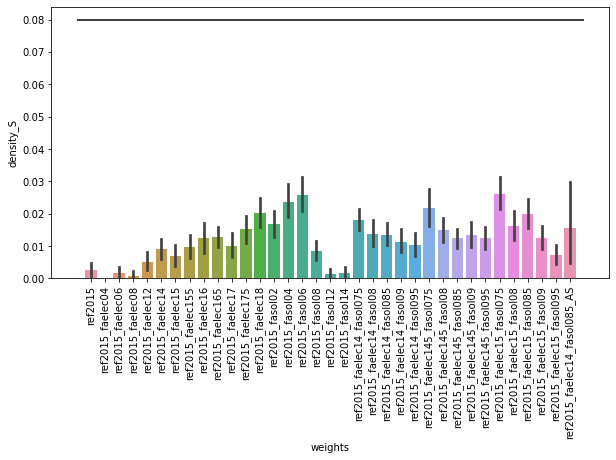

In [12]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_S", data=data, order=["ref2015","ref2015_faelec04","ref2015_faelec06","ref2015_faelec08","ref2015_faelec12","ref2015_faelec14","ref2015_faelec15","ref2015_faelec155","ref2015_faelec16","ref2015_faelec165","ref2015_faelec17","ref2015_faelec175","ref2015_faelec18","ref2015_fasol02","ref2015_fasol04","ref2015_fasol06","ref2015_fasol08","ref2015_fasol12","ref2015_fasol14","ref2015_faelec14_fasol075","ref2015_faelec14_fasol08","ref2015_faelec14_fasol085","ref2015_faelec14_fasol09","ref2015_faelec14_fasol095","ref2015_faelec145_fasol075","ref2015_faelec145_fasol08","ref2015_faelec145_fasol085","ref2015_faelec145_fasol09","ref2015_faelec145_fasol095","ref2015_faelec15_fasol075","ref2015_faelec15_fasol08","ref2015_faelec15_fasol085","ref2015_faelec15_fasol09","ref2015_faelec15_fasol095","ref2015_faelec14_fasol085_AS"])
plt.hlines(0.08, -1, 35)

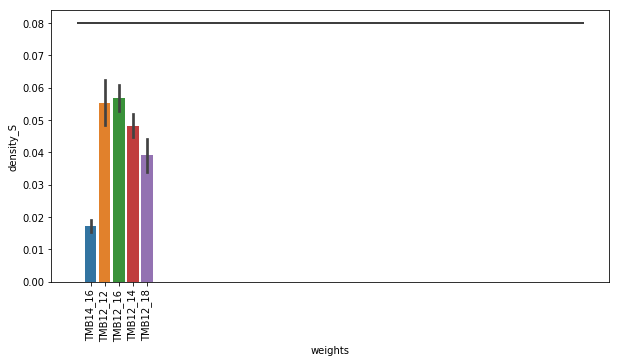

In [26]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_S", data=data)
plt.hlines(0.08, -1, 35)

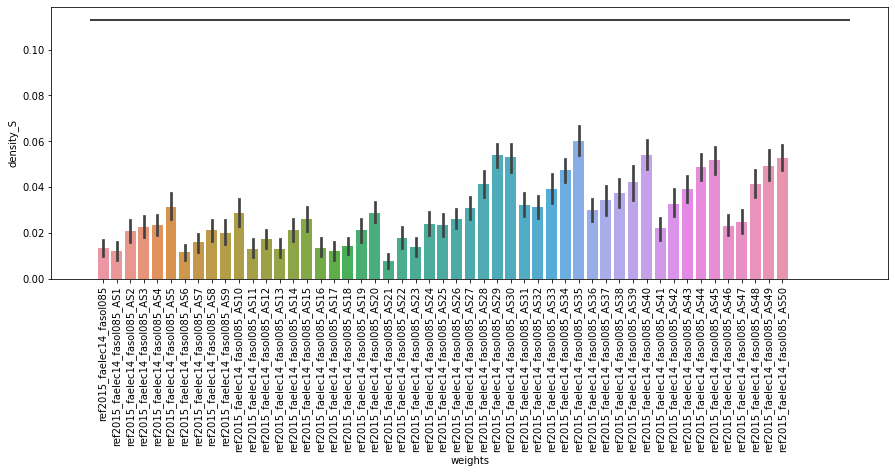

In [23]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_S", data=data, order=["ref2015_faelec14_fasol085","ref2015_faelec14_fasol085_AS1","ref2015_faelec14_fasol085_AS2","ref2015_faelec14_fasol085_AS3","ref2015_faelec14_fasol085_AS4","ref2015_faelec14_fasol085_AS5","ref2015_faelec14_fasol085_AS6","ref2015_faelec14_fasol085_AS7","ref2015_faelec14_fasol085_AS8","ref2015_faelec14_fasol085_AS9","ref2015_faelec14_fasol085_AS10","ref2015_faelec14_fasol085_AS11","ref2015_faelec14_fasol085_AS12","ref2015_faelec14_fasol085_AS13","ref2015_faelec14_fasol085_AS14","ref2015_faelec14_fasol085_AS15","ref2015_faelec14_fasol085_AS16","ref2015_faelec14_fasol085_AS17","ref2015_faelec14_fasol085_AS18","ref2015_faelec14_fasol085_AS19","ref2015_faelec14_fasol085_AS20","ref2015_faelec14_fasol085_AS21","ref2015_faelec14_fasol085_AS22","ref2015_faelec14_fasol085_AS23","ref2015_faelec14_fasol085_AS24","ref2015_faelec14_fasol085_AS25","ref2015_faelec14_fasol085_AS26","ref2015_faelec14_fasol085_AS27","ref2015_faelec14_fasol085_AS28","ref2015_faelec14_fasol085_AS29","ref2015_faelec14_fasol085_AS30","ref2015_faelec14_fasol085_AS31","ref2015_faelec14_fasol085_AS32","ref2015_faelec14_fasol085_AS33","ref2015_faelec14_fasol085_AS34","ref2015_faelec14_fasol085_AS35","ref2015_faelec14_fasol085_AS36","ref2015_faelec14_fasol085_AS37","ref2015_faelec14_fasol085_AS38","ref2015_faelec14_fasol085_AS39","ref2015_faelec14_fasol085_AS40","ref2015_faelec14_fasol085_AS41","ref2015_faelec14_fasol085_AS42","ref2015_faelec14_fasol085_AS43","ref2015_faelec14_fasol085_AS44","ref2015_faelec14_fasol085_AS45","ref2015_faelec14_fasol085_AS46","ref2015_faelec14_fasol085_AS47","ref2015_faelec14_fasol085_AS48","ref2015_faelec14_fasol085_AS49","ref2015_faelec14_fasol085_AS50"])
plt.hlines(0.113, -1, 55)

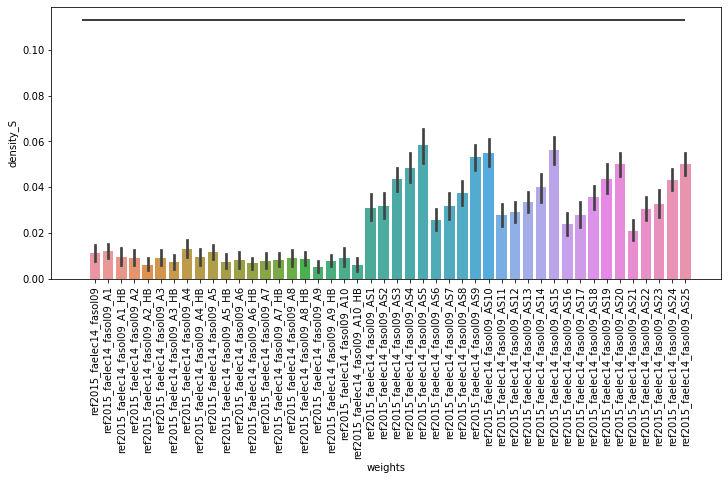

In [31]:
plt.rcParams["figure.figsize"] = [12, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_S", data=data, order=["ref2015_faelec14_fasol09","ref2015_faelec14_fasol09_A1","ref2015_faelec14_fasol09_A1_HB","ref2015_faelec14_fasol09_A2","ref2015_faelec14_fasol09_A2_HB","ref2015_faelec14_fasol09_A3","ref2015_faelec14_fasol09_A3_HB","ref2015_faelec14_fasol09_A4","ref2015_faelec14_fasol09_A4_HB","ref2015_faelec14_fasol09_A5","ref2015_faelec14_fasol09_A5_HB","ref2015_faelec14_fasol09_A6","ref2015_faelec14_fasol09_A6_HB","ref2015_faelec14_fasol09_A7","ref2015_faelec14_fasol09_A7_HB","ref2015_faelec14_fasol09_A8","ref2015_faelec14_fasol09_A8_HB","ref2015_faelec14_fasol09_A9","ref2015_faelec14_fasol09_A9_HB","ref2015_faelec14_fasol09_A10","ref2015_faelec14_fasol09_A10_HB","ref2015_faelec14_fasol09_AS1","ref2015_faelec14_fasol09_AS2","ref2015_faelec14_fasol09_AS3","ref2015_faelec14_fasol09_AS4","ref2015_faelec14_fasol09_AS5","ref2015_faelec14_fasol09_AS6","ref2015_faelec14_fasol09_AS7","ref2015_faelec14_fasol09_AS8","ref2015_faelec14_fasol09_AS9","ref2015_faelec14_fasol09_AS10","ref2015_faelec14_fasol09_AS11","ref2015_faelec14_fasol09_AS12","ref2015_faelec14_fasol09_AS13","ref2015_faelec14_fasol09_AS14","ref2015_faelec14_fasol09_AS15","ref2015_faelec14_fasol09_AS16","ref2015_faelec14_fasol09_AS17","ref2015_faelec14_fasol09_AS18","ref2015_faelec14_fasol09_AS19","ref2015_faelec14_fasol09_AS20","ref2015_faelec14_fasol09_AS21","ref2015_faelec14_fasol09_AS22","ref2015_faelec14_fasol09_AS23","ref2015_faelec14_fasol09_AS24","ref2015_faelec14_fasol09_AS25"])
plt.hlines(0.113, -1, 45)

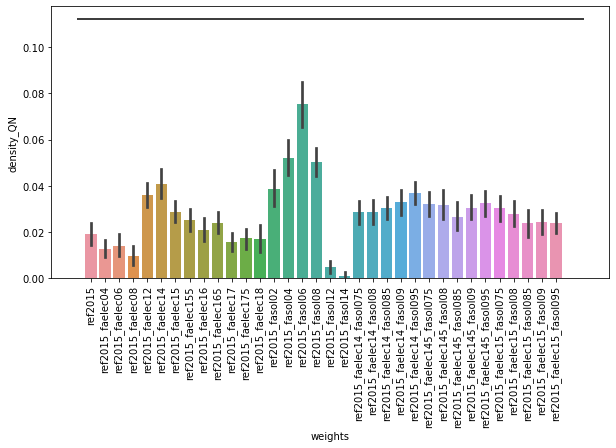

In [10]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_QN", data=data, order=["ref2015","ref2015_faelec04","ref2015_faelec06","ref2015_faelec08","ref2015_faelec12","ref2015_faelec14","ref2015_faelec15","ref2015_faelec155","ref2015_faelec16","ref2015_faelec165","ref2015_faelec17","ref2015_faelec175","ref2015_faelec18","ref2015_fasol02","ref2015_fasol04","ref2015_fasol06","ref2015_fasol08","ref2015_fasol12","ref2015_fasol14","ref2015_faelec14_fasol075","ref2015_faelec14_fasol08","ref2015_faelec14_fasol085","ref2015_faelec14_fasol09","ref2015_faelec14_fasol095","ref2015_faelec145_fasol075","ref2015_faelec145_fasol08","ref2015_faelec145_fasol085","ref2015_faelec145_fasol09","ref2015_faelec145_fasol095","ref2015_faelec15_fasol075","ref2015_faelec15_fasol08","ref2015_faelec15_fasol085","ref2015_faelec15_fasol09","ref2015_faelec15_fasol095"])
plt.hlines(0.112, -1, 35)

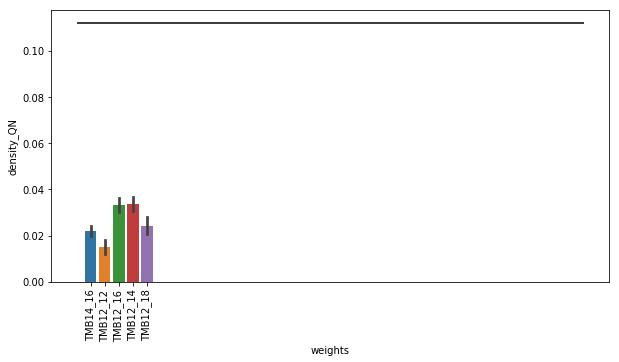

In [28]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_QN", data=data)
plt.hlines(0.112, -1, 35)

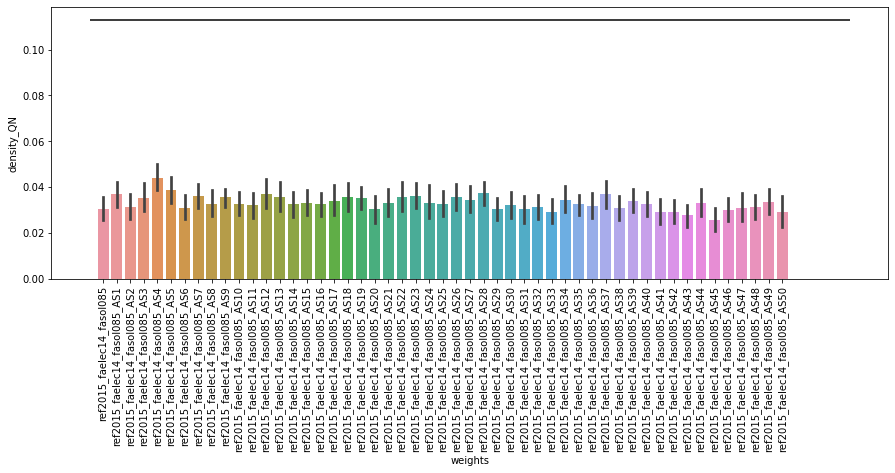

In [24]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_QN", data=data, order=["ref2015_faelec14_fasol085","ref2015_faelec14_fasol085_AS1","ref2015_faelec14_fasol085_AS2","ref2015_faelec14_fasol085_AS3","ref2015_faelec14_fasol085_AS4","ref2015_faelec14_fasol085_AS5","ref2015_faelec14_fasol085_AS6","ref2015_faelec14_fasol085_AS7","ref2015_faelec14_fasol085_AS8","ref2015_faelec14_fasol085_AS9","ref2015_faelec14_fasol085_AS10","ref2015_faelec14_fasol085_AS11","ref2015_faelec14_fasol085_AS12","ref2015_faelec14_fasol085_AS13","ref2015_faelec14_fasol085_AS14","ref2015_faelec14_fasol085_AS15","ref2015_faelec14_fasol085_AS16","ref2015_faelec14_fasol085_AS17","ref2015_faelec14_fasol085_AS18","ref2015_faelec14_fasol085_AS19","ref2015_faelec14_fasol085_AS20","ref2015_faelec14_fasol085_AS21","ref2015_faelec14_fasol085_AS22","ref2015_faelec14_fasol085_AS23","ref2015_faelec14_fasol085_AS24","ref2015_faelec14_fasol085_AS25","ref2015_faelec14_fasol085_AS26","ref2015_faelec14_fasol085_AS27","ref2015_faelec14_fasol085_AS28","ref2015_faelec14_fasol085_AS29","ref2015_faelec14_fasol085_AS30","ref2015_faelec14_fasol085_AS31","ref2015_faelec14_fasol085_AS32","ref2015_faelec14_fasol085_AS33","ref2015_faelec14_fasol085_AS34","ref2015_faelec14_fasol085_AS35","ref2015_faelec14_fasol085_AS36","ref2015_faelec14_fasol085_AS37","ref2015_faelec14_fasol085_AS38","ref2015_faelec14_fasol085_AS39","ref2015_faelec14_fasol085_AS40","ref2015_faelec14_fasol085_AS41","ref2015_faelec14_fasol085_AS42","ref2015_faelec14_fasol085_AS43","ref2015_faelec14_fasol085_AS44","ref2015_faelec14_fasol085_AS45","ref2015_faelec14_fasol085_AS46","ref2015_faelec14_fasol085_AS47","ref2015_faelec14_fasol085_AS48","ref2015_faelec14_fasol085_AS49","ref2015_faelec14_fasol085_AS50"])
plt.hlines(0.113, -1, 55)

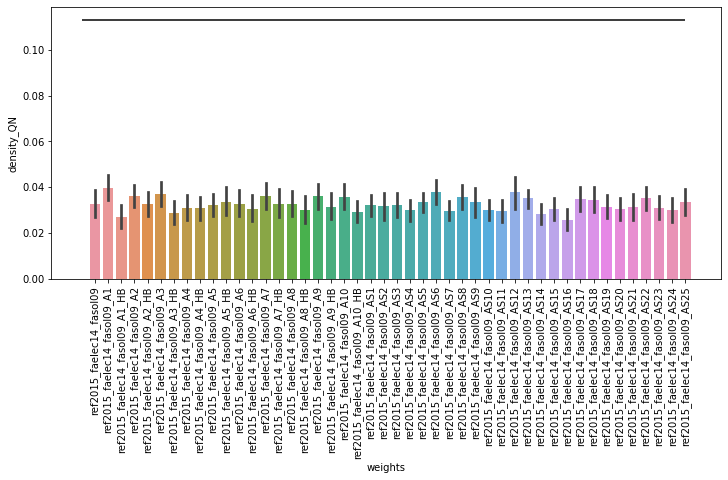

In [32]:
plt.rcParams["figure.figsize"] = [12, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_QN", data=data, order=["ref2015_faelec14_fasol09","ref2015_faelec14_fasol09_A1","ref2015_faelec14_fasol09_A1_HB","ref2015_faelec14_fasol09_A2","ref2015_faelec14_fasol09_A2_HB","ref2015_faelec14_fasol09_A3","ref2015_faelec14_fasol09_A3_HB","ref2015_faelec14_fasol09_A4","ref2015_faelec14_fasol09_A4_HB","ref2015_faelec14_fasol09_A5","ref2015_faelec14_fasol09_A5_HB","ref2015_faelec14_fasol09_A6","ref2015_faelec14_fasol09_A6_HB","ref2015_faelec14_fasol09_A7","ref2015_faelec14_fasol09_A7_HB","ref2015_faelec14_fasol09_A8","ref2015_faelec14_fasol09_A8_HB","ref2015_faelec14_fasol09_A9","ref2015_faelec14_fasol09_A9_HB","ref2015_faelec14_fasol09_A10","ref2015_faelec14_fasol09_A10_HB","ref2015_faelec14_fasol09_AS1","ref2015_faelec14_fasol09_AS2","ref2015_faelec14_fasol09_AS3","ref2015_faelec14_fasol09_AS4","ref2015_faelec14_fasol09_AS5","ref2015_faelec14_fasol09_AS6","ref2015_faelec14_fasol09_AS7","ref2015_faelec14_fasol09_AS8","ref2015_faelec14_fasol09_AS9","ref2015_faelec14_fasol09_AS10","ref2015_faelec14_fasol09_AS11","ref2015_faelec14_fasol09_AS12","ref2015_faelec14_fasol09_AS13","ref2015_faelec14_fasol09_AS14","ref2015_faelec14_fasol09_AS15","ref2015_faelec14_fasol09_AS16","ref2015_faelec14_fasol09_AS17","ref2015_faelec14_fasol09_AS18","ref2015_faelec14_fasol09_AS19","ref2015_faelec14_fasol09_AS20","ref2015_faelec14_fasol09_AS21","ref2015_faelec14_fasol09_AS22","ref2015_faelec14_fasol09_AS23","ref2015_faelec14_fasol09_AS24","ref2015_faelec14_fasol09_AS25"])
plt.hlines(0.113, -1, 45)

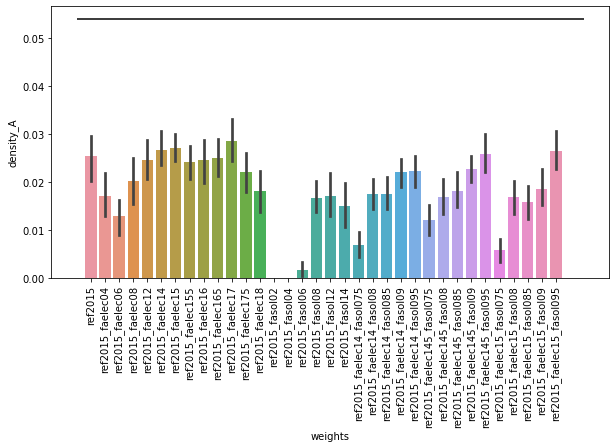

In [15]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_A", data=data, order=["ref2015","ref2015_faelec04","ref2015_faelec06","ref2015_faelec08","ref2015_faelec12","ref2015_faelec14","ref2015_faelec15","ref2015_faelec155","ref2015_faelec16","ref2015_faelec165","ref2015_faelec17","ref2015_faelec175","ref2015_faelec18","ref2015_fasol02","ref2015_fasol04","ref2015_fasol06","ref2015_fasol08","ref2015_fasol12","ref2015_fasol14","ref2015_faelec14_fasol075","ref2015_faelec14_fasol08","ref2015_faelec14_fasol085","ref2015_faelec14_fasol09","ref2015_faelec14_fasol095","ref2015_faelec145_fasol075","ref2015_faelec145_fasol08","ref2015_faelec145_fasol085","ref2015_faelec145_fasol09","ref2015_faelec145_fasol095","ref2015_faelec15_fasol075","ref2015_faelec15_fasol08","ref2015_faelec15_fasol085","ref2015_faelec15_fasol09","ref2015_faelec15_fasol095"])
plt.hlines(0.054, -1, 35)

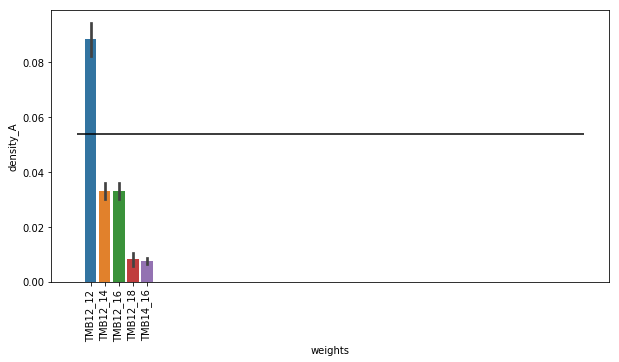

In [31]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_A", data=data, order=["TMB12_12","TMB12_14","TMB12_16",'TMB12_18','TMB14_16'])
plt.hlines(0.054, -1, 35)

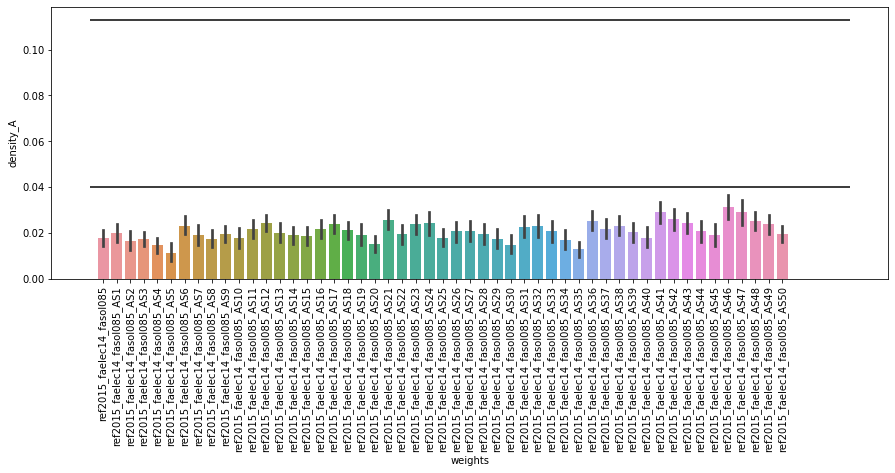

In [35]:
plt.rcParams["figure.figsize"] = [15, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_A", data=data, order=["ref2015_faelec14_fasol085","ref2015_faelec14_fasol085_AS1","ref2015_faelec14_fasol085_AS2","ref2015_faelec14_fasol085_AS3","ref2015_faelec14_fasol085_AS4","ref2015_faelec14_fasol085_AS5","ref2015_faelec14_fasol085_AS6","ref2015_faelec14_fasol085_AS7","ref2015_faelec14_fasol085_AS8","ref2015_faelec14_fasol085_AS9","ref2015_faelec14_fasol085_AS10","ref2015_faelec14_fasol085_AS11","ref2015_faelec14_fasol085_AS12","ref2015_faelec14_fasol085_AS13","ref2015_faelec14_fasol085_AS14","ref2015_faelec14_fasol085_AS15","ref2015_faelec14_fasol085_AS16","ref2015_faelec14_fasol085_AS17","ref2015_faelec14_fasol085_AS18","ref2015_faelec14_fasol085_AS19","ref2015_faelec14_fasol085_AS20","ref2015_faelec14_fasol085_AS21","ref2015_faelec14_fasol085_AS22","ref2015_faelec14_fasol085_AS23","ref2015_faelec14_fasol085_AS24","ref2015_faelec14_fasol085_AS25","ref2015_faelec14_fasol085_AS26","ref2015_faelec14_fasol085_AS27","ref2015_faelec14_fasol085_AS28","ref2015_faelec14_fasol085_AS29","ref2015_faelec14_fasol085_AS30","ref2015_faelec14_fasol085_AS31","ref2015_faelec14_fasol085_AS32","ref2015_faelec14_fasol085_AS33","ref2015_faelec14_fasol085_AS34","ref2015_faelec14_fasol085_AS35","ref2015_faelec14_fasol085_AS36","ref2015_faelec14_fasol085_AS37","ref2015_faelec14_fasol085_AS38","ref2015_faelec14_fasol085_AS39","ref2015_faelec14_fasol085_AS40","ref2015_faelec14_fasol085_AS41","ref2015_faelec14_fasol085_AS42","ref2015_faelec14_fasol085_AS43","ref2015_faelec14_fasol085_AS44","ref2015_faelec14_fasol085_AS45","ref2015_faelec14_fasol085_AS46","ref2015_faelec14_fasol085_AS47","ref2015_faelec14_fasol085_AS48","ref2015_faelec14_fasol085_AS49","ref2015_faelec14_fasol085_AS50"])
plt.hlines(0.113, -1, 55)
plt.hlines(0.04, -1, 55)

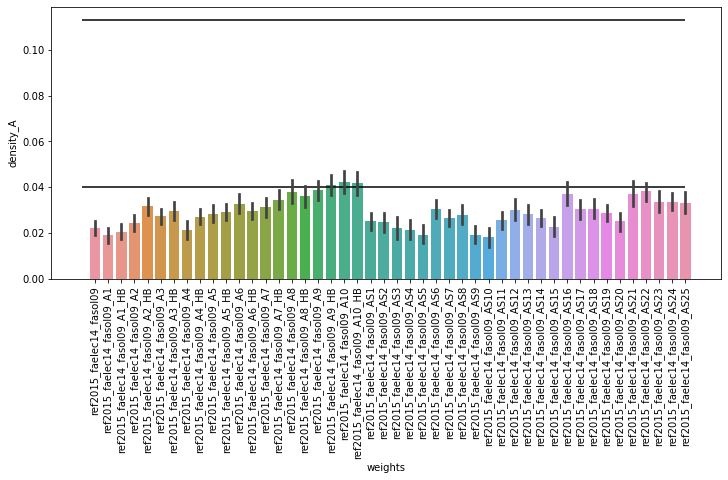

In [34]:
plt.rcParams["figure.figsize"] = [12, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_A", data=data, order=["ref2015_faelec14_fasol09","ref2015_faelec14_fasol09_A1","ref2015_faelec14_fasol09_A1_HB","ref2015_faelec14_fasol09_A2","ref2015_faelec14_fasol09_A2_HB","ref2015_faelec14_fasol09_A3","ref2015_faelec14_fasol09_A3_HB","ref2015_faelec14_fasol09_A4","ref2015_faelec14_fasol09_A4_HB","ref2015_faelec14_fasol09_A5","ref2015_faelec14_fasol09_A5_HB","ref2015_faelec14_fasol09_A6","ref2015_faelec14_fasol09_A6_HB","ref2015_faelec14_fasol09_A7","ref2015_faelec14_fasol09_A7_HB","ref2015_faelec14_fasol09_A8","ref2015_faelec14_fasol09_A8_HB","ref2015_faelec14_fasol09_A9","ref2015_faelec14_fasol09_A9_HB","ref2015_faelec14_fasol09_A10","ref2015_faelec14_fasol09_A10_HB","ref2015_faelec14_fasol09_AS1","ref2015_faelec14_fasol09_AS2","ref2015_faelec14_fasol09_AS3","ref2015_faelec14_fasol09_AS4","ref2015_faelec14_fasol09_AS5","ref2015_faelec14_fasol09_AS6","ref2015_faelec14_fasol09_AS7","ref2015_faelec14_fasol09_AS8","ref2015_faelec14_fasol09_AS9","ref2015_faelec14_fasol09_AS10","ref2015_faelec14_fasol09_AS11","ref2015_faelec14_fasol09_AS12","ref2015_faelec14_fasol09_AS13","ref2015_faelec14_fasol09_AS14","ref2015_faelec14_fasol09_AS15","ref2015_faelec14_fasol09_AS16","ref2015_faelec14_fasol09_AS17","ref2015_faelec14_fasol09_AS18","ref2015_faelec14_fasol09_AS19","ref2015_faelec14_fasol09_AS20","ref2015_faelec14_fasol09_AS21","ref2015_faelec14_fasol09_AS22","ref2015_faelec14_fasol09_AS23","ref2015_faelec14_fasol09_AS24","ref2015_faelec14_fasol09_AS25"])
plt.hlines(0.113, -1, 45)
plt.hlines(0.04, -1, 45)

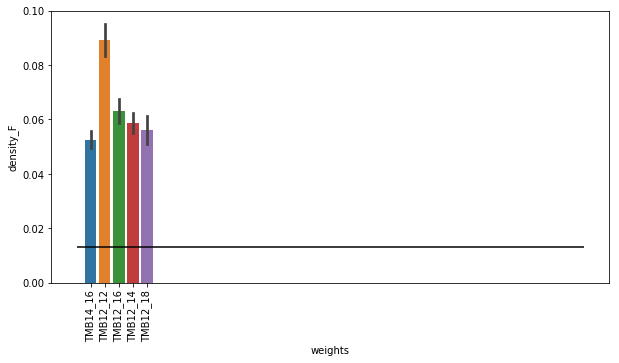

In [37]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_F", data=data)
plt.hlines(0.013, -1, 35)

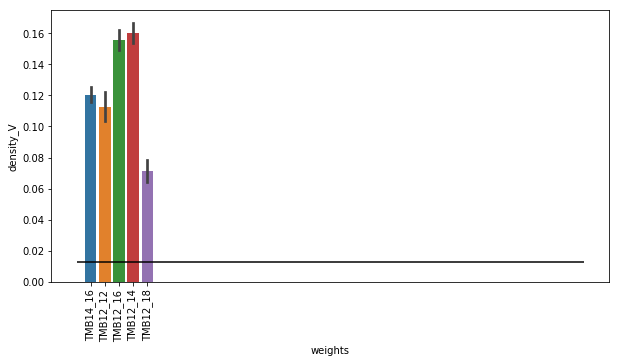

In [38]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_V", data=data)
plt.hlines(0.013, -1, 35)

In [5]:
data_t = pd.DataFrame()

for fasta_f in glob.glob("test/ref2015_*/*.fasta"):
    d = {}
#    fasta_f = folder + folder[:-1] + ".fasta"
    with open(fasta_f, "r") as in_f:
        for line in in_f:
            if line.startswith('>'):
                pdb_name = line[1:].strip()
                seq = next(in_f).strip()
            else:
                pass
        des = "TMB12_16"
        weights = fasta_f.split("/")[1]
        distr = aa_distribution_core(seq,des)
        F = distr['F']
        aro = distr['F'] + distr['Y'] + distr['W']
        hydro = distr['V'] + distr['I'] + distr['L'] + distr['A']
        beta_branch = distr['V'] + distr['I'] + distr['L']
        S = distr['S']
        T = distr['T']
        A = distr['A']
        V = distr['V']
        positive = distr['D'] + distr['E']
        negative = distr['K'] + distr['L'] + distr['H']
        ST = distr['S'] + distr['T']
        QN = distr['Q'] + distr['N']
        GRAVY = GRAVY_core(seq,des)
        keys = set(distr.keys())
        dstr_r = numpy.corrcoef([aa_dict_native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
        d[pdb_name] = [GRAVY, F, aro, hydro, beta_branch, positive, negative, ST, QN, S, T, A, V, dstr_r, weights, des]
    df = pd.DataFrame(d, index=["hydropathy","density_F","density_aro","density_hydrophobics","density_beta_branched","density_positive","density_negative", "density_ST", "density_QN","density_S","density_T","density_A","density_V","correlation_native_aa","weights","designs"])
    df = df.T
    data_t = pd.concat([data_t,df])
print(data_t)

                                                   hydropathy  density_F  \
ref2015_faelec145_fasol095/100_input_0064_0002_...   -1.52787  0.0163934   
ref2015_faelec145_fasol095/100_input_0064_0002_...   -1.33607  0.0819672   
ref2015_faelec145_fasol095/100_input_0064_0002_...   -1.87213  0.0163934   
ref2015_faelec145_fasol095/100_input_0064_0002_...   -1.09836  0.0983607   
ref2015_faelec145_fasol095/100_input_0064_0002_...   -1.37869  0.0491803   
ref2015_faelec145_fasol095/100_input_0064_0002_...  -0.822951  0.0983607   
ref2015_faelec145_fasol095/100_input_0064_0002_...   -1.58852  0.0491803   
ref2015_faelec145_fasol095/100_input_0064_0002_...   -1.28852  0.0983607   
ref2015_faelec145_fasol095/100_input_0064_0002_...   -1.21967  0.0327869   
ref2015_faelec145_fasol095/100_input_0064_0002_...   -1.56393  0.0491803   
ref2015_faelec145_fasol095/100_input_0064_0002_...   -1.13607   0.131148   
ref2015_faelec145_fasol095/100_input_0064_0002_...   -1.23279  0.0819672   
ref2015_fael

In [5]:
data_t = pd.DataFrame()

for fasta_f in glob.glob("*_input_*/*.fasta"):
    d = {}
#    fasta_f = folder + folder[:-1] + ".fasta"
    with open(fasta_f, "r") as in_f:
        for line in in_f:
            if line.startswith('>'):
                pdb_name = line[1:].strip()
                seq = next(in_f).strip()
            else:
                pass
        des = "TMB12_16_dimer"
        weights = "ref2015_faelec14_fasol09_AS64"
        distr = aa_distribution_core(seq,des)
        F = distr['F']
        aro = distr['F'] + distr['Y'] + distr['W']
        hydro = distr['V'] + distr['I'] + distr['L'] + distr['A']
        beta_branch = distr['V'] + distr['I'] + distr['L']
        S = distr['S']
        T = distr['T']
        A = distr['A']
        V = distr['V']
        positive = distr['D'] + distr['E']
        negative = distr['K'] + distr['L'] + distr['H']
        ST = distr['S'] + distr['T']
        QN = distr['Q'] + distr['N']
        GRAVY = GRAVY_core(seq,des)
        keys = set(distr.keys())
        dstr_r = numpy.corrcoef([aa_dict_native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
        d[pdb_name] = [GRAVY, F, aro, hydro, beta_branch, positive, negative, ST, QN, S, T, A, V, dstr_r,weights,des]
    df = pd.DataFrame(d, index=["hydropathy","density_F","density_aro","density_hydrophobics","density_beta_branched","density_positive","density_negative", "density_ST", "density_QN","density_S","density_T","density_A","density_V","correlation_native_aa","weights","designs"])
    df = df.T
    data_t = pd.concat([data_t,df])
print(data_t)

                                                   hydropathy  density_F  \
101_input_0035_AB_0005_1/101_input_0035_AB_0005...  -0.326667        0.1   
101_input_0035_AB_0005_1/101_input_0035_AB_0005...       -0.9  0.0333333   
101_input_0035_AB_0005_1/101_input_0035_AB_0005...   -1.40667          0   
101_input_0035_AB_0005_1/101_input_0035_AB_0005...      -0.62  0.0333333   
101_input_0035_AB_0005_1/101_input_0035_AB_0005...  -0.483333   0.166667   
101_input_0035_AB_0005_1/101_input_0035_AB_0005...       -0.8  0.0333333   
101_input_0035_AB_0005_1/101_input_0035_AB_0005...   -1.13667  0.0666667   
101_input_0035_AB_0005_1/101_input_0035_AB_0005...  -0.806667        0.1   
101_input_0035_AB_0005_1/101_input_0035_AB_0005...   -1.74667  0.0666667   
101_input_0035_AB_0005_1/101_input_0035_AB_0005...   -1.00667  0.0666667   
28_input_0073_AB_0005_5/28_input_0073_AB_0005_5...  -0.233333  0.0666667   
28_input_0073_AB_0005_5/28_input_0073_AB_0005_5...      -1.49  0.0333333   
28_input_007

In [5]:
data_t = pd.DataFrame()

for fasta_f in glob.glob("test/ref2015_*/*.fasta"):
    d = {}
#    fasta_f = folder + folder[:-1] + ".fasta"
    with open(fasta_f, "r") as in_f:
        for line in in_f:
            if line.startswith('>'):
                pdb_name = line[1:].strip()
                seq = next(in_f).strip()
            else:
                pass
        des = "TMB16_20_tetramer"
        weights = fasta_f.split("/")[1]
        distr = aa_distribution_core(seq,des)
        F = distr['F']
        aro = distr['F'] + distr['Y'] + distr['W']
        hydro = distr['V'] + distr['I'] + distr['L'] + distr['A']
        beta_branch = distr['V'] + distr['I'] + distr['L']
        S = distr['S']
        T = distr['T']
        A = distr['A']
        V = distr['V']
        positive = distr['D'] + distr['E']
        negative = distr['K'] + distr['L'] + distr['H']
        ST = distr['S'] + distr['T']
        QN = distr['Q'] + distr['N']
        GRAVY = GRAVY_core(seq,des)
        keys = set(distr.keys())
        dstr_r = numpy.corrcoef([aa_dict_native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
        d[pdb_name] = [GRAVY, F, aro, hydro, beta_branch, positive, negative, ST, QN, S, T, A, V, dstr_r, weights, des]
    df = pd.DataFrame(d, index=["hydropathy","density_F","density_aro","density_hydrophobics","density_beta_branched","density_positive","density_negative", "density_ST", "density_QN","density_S","density_T","density_A","density_V","correlation_native_aa","weights","designs"])
    df = df.T
    data_t = pd.concat([data_t,df])
print(data_t)

                                                   hydropathy  density_F  \
ref2015_faelec14_fasol09_AS46/1_input_0085_tetr...   -1.76316  0.0526316   
ref2015_faelec14_fasol09_AS46/1_input_0085_tetr...   -1.06842  0.0526316   
ref2015_faelec14_fasol09_AS46/1_input_0085_tetr...  -0.757895  0.0526316   
ref2015_faelec14_fasol09_AS46/1_input_0085_tetr...   -1.20526  0.0526316   
ref2015_faelec14_fasol09_AS46/1_input_0085_tetr...   -1.83684  0.0526316   
ref2015_faelec14_fasol09_AS46/1_input_0085_tetr...  -0.973684  0.0526316   
ref2015_faelec14_fasol09_AS46/1_input_0085_tetr...   -1.58947          0   
ref2015_faelec14_fasol09_AS46/1_input_0085_tetr...  -0.868421  0.0526316   
ref2015_faelec14_fasol09_AS46/1_input_0085_tetr...   -2.39474  0.0526316   
ref2015_faelec14_fasol09_AS46/1_input_0085_tetr...   -1.47895  0.0526316   
ref2015_faelec14_fasol09_AS46/1_input_0085_tetr...   -2.84211          0   
ref2015_faelec14_fasol09_AS46/1_input_0085_tetr...   -1.00526  0.0526316   
ref2015_fael

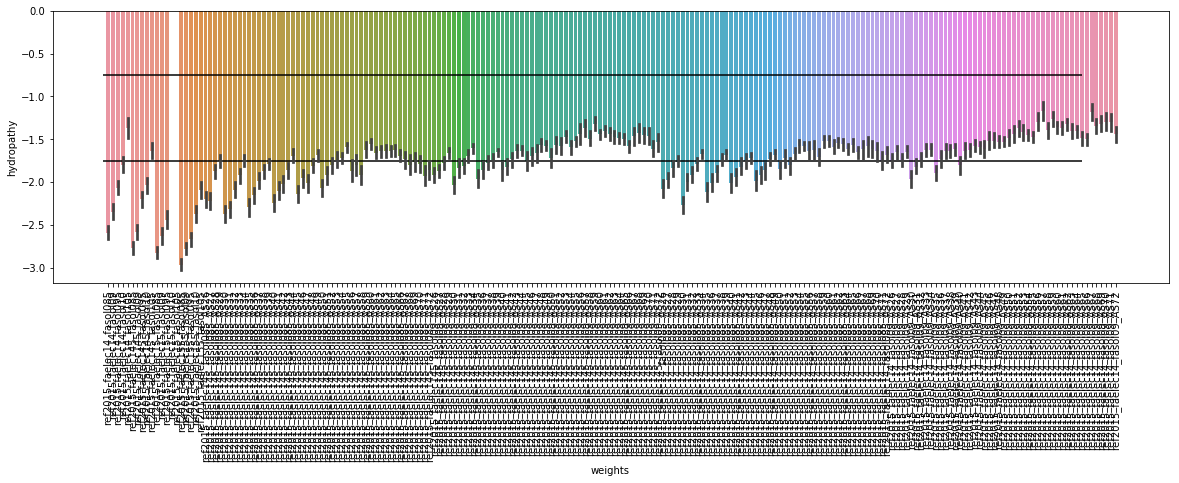

In [21]:
plt.rcParams["figure.figsize"] = [20, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="hydropathy", data=data_t, order=["ref2015_faelec14_fasol085","ref2015_faelec14_fasol09","ref2015_faelec14_fasol095","ref2015_faelec14_fasol10","ref2015_faelec14_fasol105","ref2015_faelec145_fasol085","ref2015_faelec145_fasol09","ref2015_faelec145_fasol095","ref2015_faelec145_fasol10","ref2015_faelec145_fasol105","ref2015_faelec15_fasol085","ref2015_faelec15_fasol09","ref2015_faelec15_fasol095","ref2015_faelec15_fasol10","ref2015_faelec15_fasol105","ref2015_faelec155_fasol085","ref2015_faelec155_fasol09","ref2015_faelec155_fasol095","ref2015_faelec155_fasol10","ref2015_faelec155_fasol105"
,"ref2015_faelec145_fasol085_AS26","ref2015_faelec145_fasol085_AS27","ref2015_faelec145_fasol085_AS28","ref2015_faelec145_fasol085_AS29","ref2015_faelec145_fasol085_AS30","ref2015_faelec145_fasol085_AS31","ref2015_faelec145_fasol085_AS32","ref2015_faelec145_fasol085_AS33","ref2015_faelec145_fasol085_AS34","ref2015_faelec145_fasol085_AS35","ref2015_faelec145_fasol085_AS36","ref2015_faelec145_fasol085_AS37","ref2015_faelec145_fasol085_AS38","ref2015_faelec145_fasol085_AS39","ref2015_faelec145_fasol085_AS40","ref2015_faelec145_fasol085_AS41","ref2015_faelec145_fasol085_AS42","ref2015_faelec145_fasol085_AS43","ref2015_faelec145_fasol085_AS44","ref2015_faelec145_fasol085_AS45","ref2015_faelec145_fasol085_AS46","ref2015_faelec145_fasol085_AS47","ref2015_faelec145_fasol085_AS48","ref2015_faelec145_fasol085_AS49","ref2015_faelec145_fasol085_AS50","ref2015_faelec145_fasol085_AS51","ref2015_faelec145_fasol085_AS52","ref2015_faelec145_fasol085_AS53","ref2015_faelec145_fasol085_AS54","ref2015_faelec145_fasol085_AS55","ref2015_faelec145_fasol085_AS56","ref2015_faelec145_fasol085_AS57","ref2015_faelec145_fasol085_AS58","ref2015_faelec145_fasol085_AS59","ref2015_faelec145_fasol085_AS60","ref2015_faelec145_fasol085_AS61","ref2015_faelec145_fasol085_AS62","ref2015_faelec145_fasol085_AS63","ref2015_faelec145_fasol085_AS64","ref2015_faelec145_fasol085_AS65","ref2015_faelec145_fasol085_AS66","ref2015_faelec145_fasol085_AS67","ref2015_faelec145_fasol085_AS68","ref2015_faelec145_fasol085_AS69","ref2015_faelec145_fasol085_AS70","ref2015_faelec145_fasol085_AS71","ref2015_faelec145_fasol085_AS72"
,"ref2015_faelec145_fasol09_AS26","ref2015_faelec145_fasol09_AS27","ref2015_faelec145_fasol09_AS28","ref2015_faelec145_fasol09_AS29","ref2015_faelec145_fasol09_AS30","ref2015_faelec145_fasol09_AS31","ref2015_faelec145_fasol09_AS32","ref2015_faelec145_fasol09_AS33","ref2015_faelec145_fasol09_AS34","ref2015_faelec145_fasol09_AS35","ref2015_faelec145_fasol09_AS36","ref2015_faelec145_fasol09_AS37","ref2015_faelec145_fasol09_AS38","ref2015_faelec145_fasol09_AS39","ref2015_faelec145_fasol09_AS40","ref2015_faelec145_fasol09_AS41","ref2015_faelec145_fasol09_AS42","ref2015_faelec145_fasol09_AS43","ref2015_faelec145_fasol09_AS44","ref2015_faelec145_fasol09_AS45","ref2015_faelec145_fasol09_AS46","ref2015_faelec145_fasol09_AS47","ref2015_faelec145_fasol09_AS48","ref2015_faelec145_fasol09_AS49","ref2015_faelec145_fasol09_AS50","ref2015_faelec145_fasol09_AS51","ref2015_faelec145_fasol09_AS52","ref2015_faelec145_fasol09_AS53","ref2015_faelec145_fasol09_AS54","ref2015_faelec145_fasol09_AS55","ref2015_faelec145_fasol09_AS56","ref2015_faelec145_fasol09_AS57","ref2015_faelec145_fasol09_AS58","ref2015_faelec145_fasol09_AS59","ref2015_faelec145_fasol09_AS60","ref2015_faelec145_fasol09_AS61","ref2015_faelec145_fasol09_AS62","ref2015_faelec145_fasol09_AS63","ref2015_faelec145_fasol09_AS64","ref2015_faelec145_fasol09_AS65","ref2015_faelec145_fasol09_AS66","ref2015_faelec145_fasol09_AS67","ref2015_faelec145_fasol09_AS68","ref2015_faelec145_fasol09_AS69","ref2015_faelec145_fasol09_AS70","ref2015_faelec145_fasol09_AS71","ref2015_faelec145_fasol09_AS72"
,"ref2015_faelec14_fasol085_AS26","ref2015_faelec14_fasol085_AS27","ref2015_faelec14_fasol085_AS28","ref2015_faelec14_fasol085_AS29","ref2015_faelec14_fasol085_AS30","ref2015_faelec14_fasol085_AS31","ref2015_faelec14_fasol085_AS32","ref2015_faelec14_fasol085_AS33","ref2015_faelec14_fasol085_AS34","ref2015_faelec14_fasol085_AS35","ref2015_faelec14_fasol085_AS36","ref2015_faelec14_fasol085_AS37","ref2015_faelec14_fasol085_AS38","ref2015_faelec14_fasol085_AS39","ref2015_faelec14_fasol085_AS40","ref2015_faelec14_fasol085_AS41","ref2015_faelec14_fasol085_AS42","ref2015_faelec14_fasol085_AS43","ref2015_faelec14_fasol085_AS44","ref2015_faelec14_fasol085_AS45","ref2015_faelec14_fasol085_AS46","ref2015_faelec14_fasol085_AS47","ref2015_faelec14_fasol085_AS48","ref2015_faelec14_fasol085_AS49","ref2015_faelec14_fasol085_AS50","ref2015_faelec14_fasol085_AS51","ref2015_faelec14_fasol085_AS52","ref2015_faelec14_fasol085_AS53","ref2015_faelec14_fasol085_AS54","ref2015_faelec14_fasol085_AS55","ref2015_faelec14_fasol085_AS56","ref2015_faelec14_fasol085_AS57","ref2015_faelec14_fasol085_AS58","ref2015_faelec14_fasol085_AS59","ref2015_faelec14_fasol085_AS60","ref2015_faelec14_fasol085_AS61","ref2015_faelec14_fasol085_AS62","ref2015_faelec14_fasol085_AS63","ref2015_faelec14_fasol085_AS64","ref2015_faelec14_fasol085_AS65","ref2015_faelec14_fasol085_AS66","ref2015_faelec14_fasol085_AS67","ref2015_faelec14_fasol085_AS68","ref2015_faelec14_fasol085_AS69","ref2015_faelec14_fasol085_AS70","ref2015_faelec14_fasol085_AS71","ref2015_faelec14_fasol085_AS72"
,"ref2015_faelec14_fasol09_AS26","ref2015_faelec14_fasol09_AS27","ref2015_faelec14_fasol09_AS28","ref2015_faelec14_fasol09_AS29","ref2015_faelec14_fasol09_AS30","ref2015_faelec14_fasol09_AS31","ref2015_faelec14_fasol09_AS32","ref2015_faelec14_fasol09_AS33","ref2015_faelec14_fasol09_AS34","ref2015_faelec14_fasol09_AS35","ref2015_faelec14_fasol09_AS36","ref2015_faelec14_fasol09_AS37","ref2015_faelec14_fasol09_AS38","ref2015_faelec14_fasol09_AS39","ref2015_faelec14_fasol09_AS40","ref2015_faelec14_fasol09_AS41","ref2015_faelec14_fasol09_AS42","ref2015_faelec14_fasol09_AS43","ref2015_faelec14_fasol09_AS44","ref2015_faelec14_fasol09_AS45","ref2015_faelec14_fasol09_AS46","ref2015_faelec14_fasol09_AS47","ref2015_faelec14_fasol09_AS48","ref2015_faelec14_fasol09_AS49","ref2015_faelec14_fasol09_AS50","ref2015_faelec14_fasol09_AS51","ref2015_faelec14_fasol09_AS52","ref2015_faelec14_fasol09_AS53","ref2015_faelec14_fasol09_AS54","ref2015_faelec14_fasol09_AS55","ref2015_faelec14_fasol09_AS56","ref2015_faelec14_fasol09_AS57","ref2015_faelec14_fasol09_AS58","ref2015_faelec14_fasol09_AS59","ref2015_faelec14_fasol09_AS60","ref2015_faelec14_fasol09_AS61","ref2015_faelec14_fasol09_AS62","ref2015_faelec14_fasol09_AS63","ref2015_faelec14_fasol09_AS64","ref2015_faelec14_fasol09_AS65","ref2015_faelec14_fasol09_AS66","ref2015_faelec14_fasol09_AS67","ref2015_faelec14_fasol09_AS68","ref2015_faelec14_fasol09_AS69","ref2015_faelec14_fasol09_AS70","ref2015_faelec14_fasol09_AS71","ref2015_faelec14_fasol09_AS72"])

plt.hlines(-1.75, -1, 200)
plt.hlines(-0.75, -1, 200)


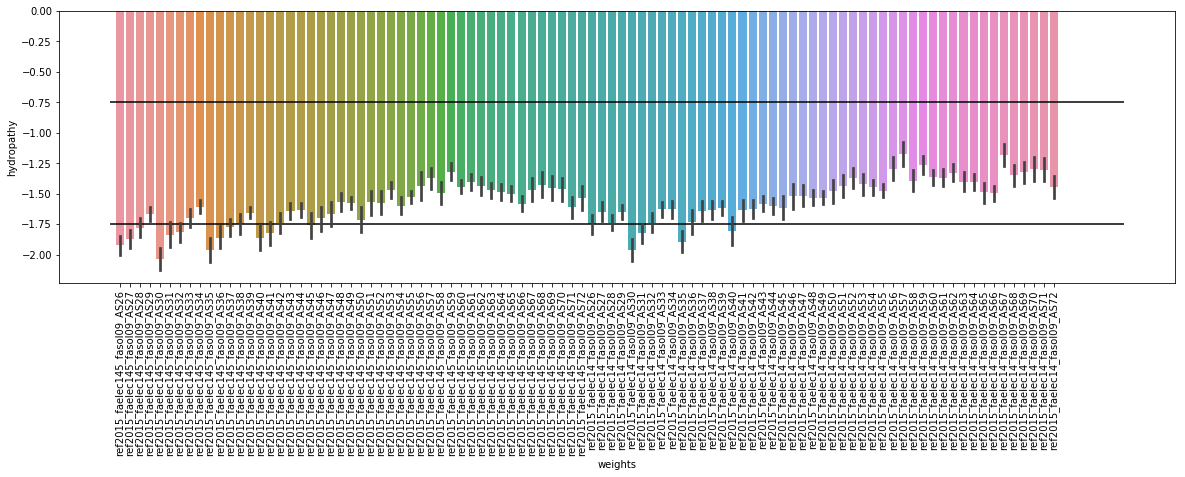

In [24]:
plt.rcParams["figure.figsize"] = [20, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="hydropathy", data=data_t, order=["ref2015_faelec145_fasol09_AS26","ref2015_faelec145_fasol09_AS27","ref2015_faelec145_fasol09_AS28","ref2015_faelec145_fasol09_AS29","ref2015_faelec145_fasol09_AS30","ref2015_faelec145_fasol09_AS31","ref2015_faelec145_fasol09_AS32","ref2015_faelec145_fasol09_AS33","ref2015_faelec145_fasol09_AS34","ref2015_faelec145_fasol09_AS35","ref2015_faelec145_fasol09_AS36","ref2015_faelec145_fasol09_AS37","ref2015_faelec145_fasol09_AS38","ref2015_faelec145_fasol09_AS39","ref2015_faelec145_fasol09_AS40","ref2015_faelec145_fasol09_AS41","ref2015_faelec145_fasol09_AS42","ref2015_faelec145_fasol09_AS43","ref2015_faelec145_fasol09_AS44","ref2015_faelec145_fasol09_AS45","ref2015_faelec145_fasol09_AS46","ref2015_faelec145_fasol09_AS47","ref2015_faelec145_fasol09_AS48","ref2015_faelec145_fasol09_AS49","ref2015_faelec145_fasol09_AS50","ref2015_faelec145_fasol09_AS51","ref2015_faelec145_fasol09_AS52","ref2015_faelec145_fasol09_AS53","ref2015_faelec145_fasol09_AS54","ref2015_faelec145_fasol09_AS55","ref2015_faelec145_fasol09_AS56","ref2015_faelec145_fasol09_AS57","ref2015_faelec145_fasol09_AS58","ref2015_faelec145_fasol09_AS59","ref2015_faelec145_fasol09_AS60","ref2015_faelec145_fasol09_AS61","ref2015_faelec145_fasol09_AS62","ref2015_faelec145_fasol09_AS63","ref2015_faelec145_fasol09_AS64","ref2015_faelec145_fasol09_AS65","ref2015_faelec145_fasol09_AS66","ref2015_faelec145_fasol09_AS67","ref2015_faelec145_fasol09_AS68","ref2015_faelec145_fasol09_AS69","ref2015_faelec145_fasol09_AS70","ref2015_faelec145_fasol09_AS71","ref2015_faelec145_fasol09_AS72"
,"ref2015_faelec14_fasol09_AS26","ref2015_faelec14_fasol09_AS27","ref2015_faelec14_fasol09_AS28","ref2015_faelec14_fasol09_AS29","ref2015_faelec14_fasol09_AS30","ref2015_faelec14_fasol09_AS31","ref2015_faelec14_fasol09_AS32","ref2015_faelec14_fasol09_AS33","ref2015_faelec14_fasol09_AS34","ref2015_faelec14_fasol09_AS35","ref2015_faelec14_fasol09_AS36","ref2015_faelec14_fasol09_AS37","ref2015_faelec14_fasol09_AS38","ref2015_faelec14_fasol09_AS39","ref2015_faelec14_fasol09_AS40","ref2015_faelec14_fasol09_AS41","ref2015_faelec14_fasol09_AS42","ref2015_faelec14_fasol09_AS43","ref2015_faelec14_fasol09_AS44","ref2015_faelec14_fasol09_AS45","ref2015_faelec14_fasol09_AS46","ref2015_faelec14_fasol09_AS47","ref2015_faelec14_fasol09_AS48","ref2015_faelec14_fasol09_AS49","ref2015_faelec14_fasol09_AS50","ref2015_faelec14_fasol09_AS51","ref2015_faelec14_fasol09_AS52","ref2015_faelec14_fasol09_AS53","ref2015_faelec14_fasol09_AS54","ref2015_faelec14_fasol09_AS55","ref2015_faelec14_fasol09_AS56","ref2015_faelec14_fasol09_AS57","ref2015_faelec14_fasol09_AS58","ref2015_faelec14_fasol09_AS59","ref2015_faelec14_fasol09_AS60","ref2015_faelec14_fasol09_AS61","ref2015_faelec14_fasol09_AS62","ref2015_faelec14_fasol09_AS63","ref2015_faelec14_fasol09_AS64","ref2015_faelec14_fasol09_AS65","ref2015_faelec14_fasol09_AS66","ref2015_faelec14_fasol09_AS67","ref2015_faelec14_fasol09_AS68","ref2015_faelec14_fasol09_AS69","ref2015_faelec14_fasol09_AS70","ref2015_faelec14_fasol09_AS71","ref2015_faelec14_fasol09_AS72"])

plt.hlines(-1.75, -1, 100)
plt.hlines(-0.75, -1, 100)


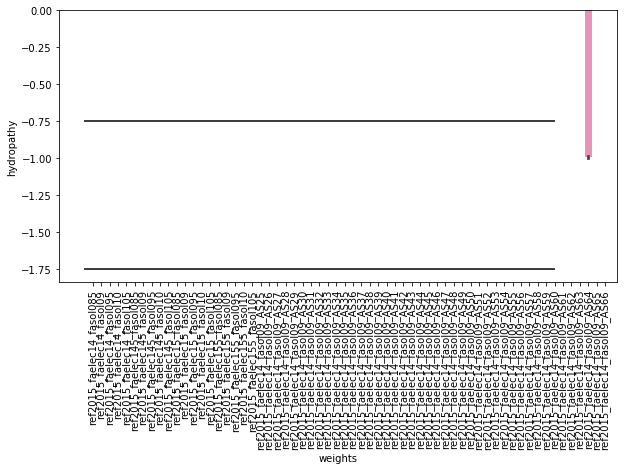

In [9]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="hydropathy", data=data_t, order=["ref2015_faelec14_fasol085","ref2015_faelec14_fasol09","ref2015_faelec14_fasol095","ref2015_faelec14_fasol10","ref2015_faelec14_fasol105","ref2015_faelec145_fasol085","ref2015_faelec145_fasol09","ref2015_faelec145_fasol095","ref2015_faelec145_fasol10","ref2015_faelec145_fasol105","ref2015_faelec15_fasol085","ref2015_faelec15_fasol09","ref2015_faelec15_fasol095","ref2015_faelec15_fasol10","ref2015_faelec15_fasol105","ref2015_faelec155_fasol085","ref2015_faelec155_fasol09","ref2015_faelec155_fasol095","ref2015_faelec155_fasol10","ref2015_faelec155_fasol105","ref2015_faelec14_fasol09_AS25","ref2015_faelec14_fasol09_AS26","ref2015_faelec14_fasol09_AS27","ref2015_faelec14_fasol09_AS28","ref2015_faelec14_fasol09_AS29","ref2015_faelec14_fasol09_AS30","ref2015_faelec14_fasol09_AS31","ref2015_faelec14_fasol09_AS32","ref2015_faelec14_fasol09_AS33","ref2015_faelec14_fasol09_AS34","ref2015_faelec14_fasol09_AS35","ref2015_faelec14_fasol09_AS36","ref2015_faelec14_fasol09_AS37","ref2015_faelec14_fasol09_AS38","ref2015_faelec14_fasol09_AS39","ref2015_faelec14_fasol09_AS40","ref2015_faelec14_fasol09_AS41","ref2015_faelec14_fasol09_AS42","ref2015_faelec14_fasol09_AS43","ref2015_faelec14_fasol09_AS44","ref2015_faelec14_fasol09_AS45","ref2015_faelec14_fasol09_AS46","ref2015_faelec14_fasol09_AS47","ref2015_faelec14_fasol09_AS48","ref2015_faelec14_fasol09_AS49","ref2015_faelec14_fasol09_AS50","ref2015_faelec14_fasol09_AS51","ref2015_faelec14_fasol09_AS52","ref2015_faelec14_fasol09_AS53","ref2015_faelec14_fasol09_AS54","ref2015_faelec14_fasol09_AS55","ref2015_faelec14_fasol09_AS56","ref2015_faelec14_fasol09_AS57","ref2015_faelec14_fasol09_AS58","ref2015_faelec14_fasol09_AS59","ref2015_faelec14_fasol09_AS60","ref2015_faelec14_fasol09_AS61","ref2015_faelec14_fasol09_AS62","ref2015_faelec14_fasol09_AS63","ref2015_faelec14_fasol09_AS64","ref2015_faelec14_fasol09_AS65","ref2015_faelec14_fasol09_AS66"])
plt.hlines(-1.75, -1, 55)
plt.hlines(-0.75, -1, 55)

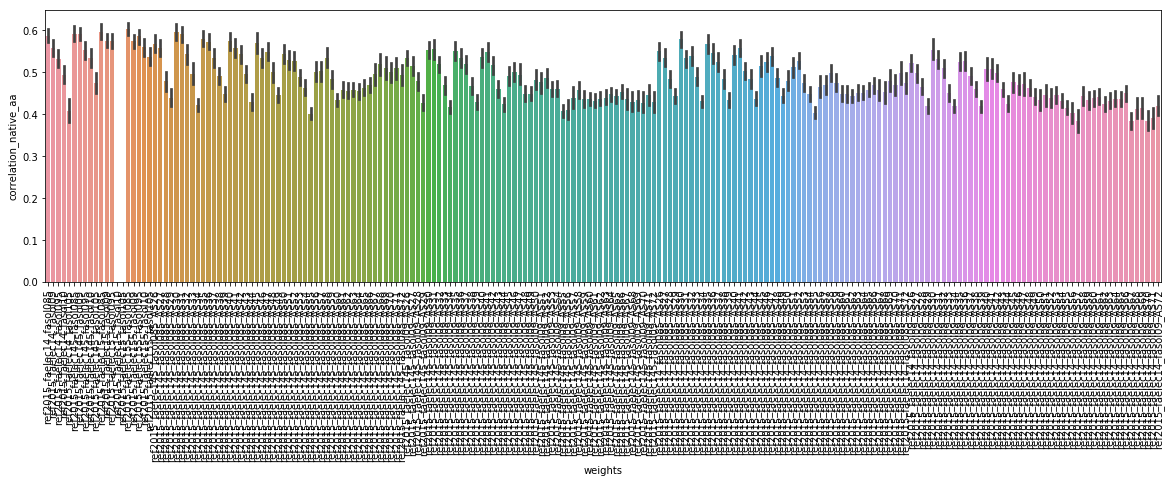

In [9]:
plt.rcParams["figure.figsize"] = [20, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="correlation_native_aa", data=data_t, order=["ref2015_faelec14_fasol085","ref2015_faelec14_fasol09","ref2015_faelec14_fasol095","ref2015_faelec14_fasol10","ref2015_faelec14_fasol105","ref2015_faelec145_fasol085","ref2015_faelec145_fasol09","ref2015_faelec145_fasol095","ref2015_faelec145_fasol10","ref2015_faelec145_fasol105","ref2015_faelec15_fasol085","ref2015_faelec15_fasol09","ref2015_faelec15_fasol095","ref2015_faelec15_fasol10","ref2015_faelec15_fasol105","ref2015_faelec155_fasol085","ref2015_faelec155_fasol09","ref2015_faelec155_fasol095","ref2015_faelec155_fasol10","ref2015_faelec155_fasol105"
,"ref2015_faelec145_fasol085_AS26","ref2015_faelec145_fasol085_AS27","ref2015_faelec145_fasol085_AS28","ref2015_faelec145_fasol085_AS29","ref2015_faelec145_fasol085_AS30","ref2015_faelec145_fasol085_AS31","ref2015_faelec145_fasol085_AS32","ref2015_faelec145_fasol085_AS33","ref2015_faelec145_fasol085_AS34","ref2015_faelec145_fasol085_AS35","ref2015_faelec145_fasol085_AS36","ref2015_faelec145_fasol085_AS37","ref2015_faelec145_fasol085_AS38","ref2015_faelec145_fasol085_AS39","ref2015_faelec145_fasol085_AS40","ref2015_faelec145_fasol085_AS41","ref2015_faelec145_fasol085_AS42","ref2015_faelec145_fasol085_AS43","ref2015_faelec145_fasol085_AS44","ref2015_faelec145_fasol085_AS45","ref2015_faelec145_fasol085_AS46","ref2015_faelec145_fasol085_AS47","ref2015_faelec145_fasol085_AS48","ref2015_faelec145_fasol085_AS49","ref2015_faelec145_fasol085_AS50","ref2015_faelec145_fasol085_AS51","ref2015_faelec145_fasol085_AS52","ref2015_faelec145_fasol085_AS53","ref2015_faelec145_fasol085_AS54","ref2015_faelec145_fasol085_AS55","ref2015_faelec145_fasol085_AS56","ref2015_faelec145_fasol085_AS57","ref2015_faelec145_fasol085_AS58","ref2015_faelec145_fasol085_AS59","ref2015_faelec145_fasol085_AS60","ref2015_faelec145_fasol085_AS61","ref2015_faelec145_fasol085_AS62","ref2015_faelec145_fasol085_AS63","ref2015_faelec145_fasol085_AS64","ref2015_faelec145_fasol085_AS65","ref2015_faelec145_fasol085_AS66","ref2015_faelec145_fasol085_AS67","ref2015_faelec145_fasol085_AS68","ref2015_faelec145_fasol085_AS69","ref2015_faelec145_fasol085_AS70","ref2015_faelec145_fasol085_AS71","ref2015_faelec145_fasol085_AS72"
,"ref2015_faelec145_fasol09_AS26","ref2015_faelec145_fasol09_AS27","ref2015_faelec145_fasol09_AS28","ref2015_faelec145_fasol09_AS29","ref2015_faelec145_fasol09_AS30","ref2015_faelec145_fasol09_AS31","ref2015_faelec145_fasol09_AS32","ref2015_faelec145_fasol09_AS33","ref2015_faelec145_fasol09_AS34","ref2015_faelec145_fasol09_AS35","ref2015_faelec145_fasol09_AS36","ref2015_faelec145_fasol09_AS37","ref2015_faelec145_fasol09_AS38","ref2015_faelec145_fasol09_AS39","ref2015_faelec145_fasol09_AS40","ref2015_faelec145_fasol09_AS41","ref2015_faelec145_fasol09_AS42","ref2015_faelec145_fasol09_AS43","ref2015_faelec145_fasol09_AS44","ref2015_faelec145_fasol09_AS45","ref2015_faelec145_fasol09_AS46","ref2015_faelec145_fasol09_AS47","ref2015_faelec145_fasol09_AS48","ref2015_faelec145_fasol09_AS49","ref2015_faelec145_fasol09_AS50","ref2015_faelec145_fasol09_AS51","ref2015_faelec145_fasol09_AS52","ref2015_faelec145_fasol09_AS53","ref2015_faelec145_fasol09_AS54","ref2015_faelec145_fasol09_AS55","ref2015_faelec145_fasol09_AS56","ref2015_faelec145_fasol09_AS57","ref2015_faelec145_fasol09_AS58","ref2015_faelec145_fasol09_AS59","ref2015_faelec145_fasol09_AS60","ref2015_faelec145_fasol09_AS61","ref2015_faelec145_fasol09_AS62","ref2015_faelec145_fasol09_AS63","ref2015_faelec145_fasol09_AS64","ref2015_faelec145_fasol09_AS65","ref2015_faelec145_fasol09_AS66","ref2015_faelec145_fasol09_AS67","ref2015_faelec145_fasol09_AS68","ref2015_faelec145_fasol09_AS69","ref2015_faelec145_fasol09_AS70","ref2015_faelec145_fasol09_AS71","ref2015_faelec145_fasol09_AS72"
,"ref2015_faelec14_fasol085_AS26","ref2015_faelec14_fasol085_AS27","ref2015_faelec14_fasol085_AS28","ref2015_faelec14_fasol085_AS29","ref2015_faelec14_fasol085_AS30","ref2015_faelec14_fasol085_AS31","ref2015_faelec14_fasol085_AS32","ref2015_faelec14_fasol085_AS33","ref2015_faelec14_fasol085_AS34","ref2015_faelec14_fasol085_AS35","ref2015_faelec14_fasol085_AS36","ref2015_faelec14_fasol085_AS37","ref2015_faelec14_fasol085_AS38","ref2015_faelec14_fasol085_AS39","ref2015_faelec14_fasol085_AS40","ref2015_faelec14_fasol085_AS41","ref2015_faelec14_fasol085_AS42","ref2015_faelec14_fasol085_AS43","ref2015_faelec14_fasol085_AS44","ref2015_faelec14_fasol085_AS45","ref2015_faelec14_fasol085_AS46","ref2015_faelec14_fasol085_AS47","ref2015_faelec14_fasol085_AS48","ref2015_faelec14_fasol085_AS49","ref2015_faelec14_fasol085_AS50","ref2015_faelec14_fasol085_AS51","ref2015_faelec14_fasol085_AS52","ref2015_faelec14_fasol085_AS53","ref2015_faelec14_fasol085_AS54","ref2015_faelec14_fasol085_AS55","ref2015_faelec14_fasol085_AS56","ref2015_faelec14_fasol085_AS57","ref2015_faelec14_fasol085_AS58","ref2015_faelec14_fasol085_AS59","ref2015_faelec14_fasol085_AS60","ref2015_faelec14_fasol085_AS61","ref2015_faelec14_fasol085_AS62","ref2015_faelec14_fasol085_AS63","ref2015_faelec14_fasol085_AS64","ref2015_faelec14_fasol085_AS65","ref2015_faelec14_fasol085_AS66","ref2015_faelec14_fasol085_AS67","ref2015_faelec14_fasol085_AS68","ref2015_faelec14_fasol085_AS69","ref2015_faelec14_fasol085_AS70","ref2015_faelec14_fasol085_AS71","ref2015_faelec14_fasol085_AS72"
,"ref2015_faelec14_fasol09_AS26","ref2015_faelec14_fasol09_AS27","ref2015_faelec14_fasol09_AS28","ref2015_faelec14_fasol09_AS29","ref2015_faelec14_fasol09_AS30","ref2015_faelec14_fasol09_AS31","ref2015_faelec14_fasol09_AS32","ref2015_faelec14_fasol09_AS33","ref2015_faelec14_fasol09_AS34","ref2015_faelec14_fasol09_AS35","ref2015_faelec14_fasol09_AS36","ref2015_faelec14_fasol09_AS37","ref2015_faelec14_fasol09_AS38","ref2015_faelec14_fasol09_AS39","ref2015_faelec14_fasol09_AS40","ref2015_faelec14_fasol09_AS41","ref2015_faelec14_fasol09_AS42","ref2015_faelec14_fasol09_AS43","ref2015_faelec14_fasol09_AS44","ref2015_faelec14_fasol09_AS45","ref2015_faelec14_fasol09_AS46","ref2015_faelec14_fasol09_AS47","ref2015_faelec14_fasol09_AS48","ref2015_faelec14_fasol09_AS49","ref2015_faelec14_fasol09_AS50","ref2015_faelec14_fasol09_AS51","ref2015_faelec14_fasol09_AS52","ref2015_faelec14_fasol09_AS53","ref2015_faelec14_fasol09_AS54","ref2015_faelec14_fasol09_AS55","ref2015_faelec14_fasol09_AS56","ref2015_faelec14_fasol09_AS57","ref2015_faelec14_fasol09_AS58","ref2015_faelec14_fasol09_AS59","ref2015_faelec14_fasol09_AS60","ref2015_faelec14_fasol09_AS61","ref2015_faelec14_fasol09_AS62","ref2015_faelec14_fasol09_AS63","ref2015_faelec14_fasol09_AS64","ref2015_faelec14_fasol09_AS65","ref2015_faelec14_fasol09_AS66","ref2015_faelec14_fasol09_AS67","ref2015_faelec14_fasol09_AS68","ref2015_faelec14_fasol09_AS69","ref2015_faelec14_fasol09_AS70","ref2015_faelec14_fasol09_AS71","ref2015_faelec14_fasol09_AS72"])



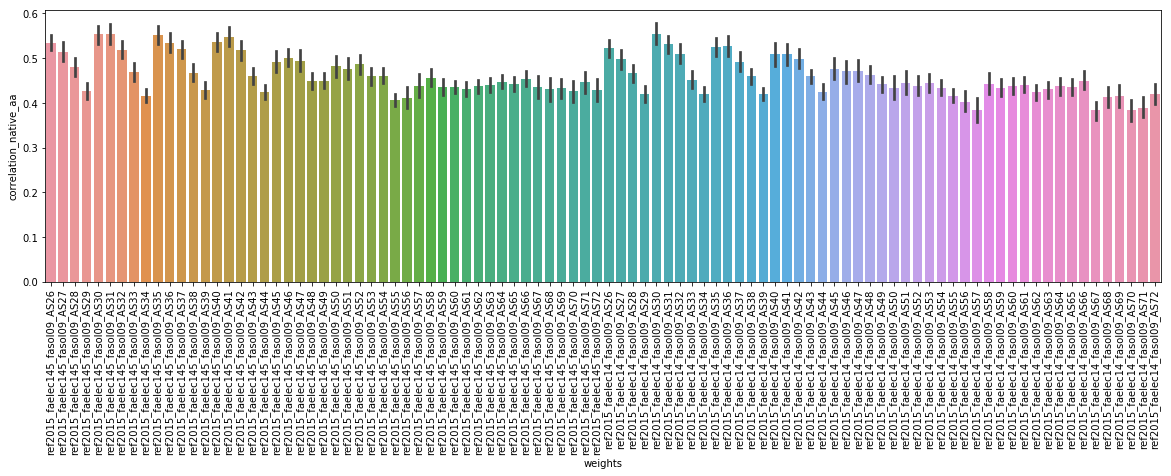

In [25]:
plt.rcParams["figure.figsize"] = [20, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="correlation_native_aa", data=data_t, order=["ref2015_faelec145_fasol09_AS26","ref2015_faelec145_fasol09_AS27","ref2015_faelec145_fasol09_AS28","ref2015_faelec145_fasol09_AS29","ref2015_faelec145_fasol09_AS30","ref2015_faelec145_fasol09_AS31","ref2015_faelec145_fasol09_AS32","ref2015_faelec145_fasol09_AS33","ref2015_faelec145_fasol09_AS34","ref2015_faelec145_fasol09_AS35","ref2015_faelec145_fasol09_AS36","ref2015_faelec145_fasol09_AS37","ref2015_faelec145_fasol09_AS38","ref2015_faelec145_fasol09_AS39","ref2015_faelec145_fasol09_AS40","ref2015_faelec145_fasol09_AS41","ref2015_faelec145_fasol09_AS42","ref2015_faelec145_fasol09_AS43","ref2015_faelec145_fasol09_AS44","ref2015_faelec145_fasol09_AS45","ref2015_faelec145_fasol09_AS46","ref2015_faelec145_fasol09_AS47","ref2015_faelec145_fasol09_AS48","ref2015_faelec145_fasol09_AS49","ref2015_faelec145_fasol09_AS50","ref2015_faelec145_fasol09_AS51","ref2015_faelec145_fasol09_AS52","ref2015_faelec145_fasol09_AS53","ref2015_faelec145_fasol09_AS54","ref2015_faelec145_fasol09_AS55","ref2015_faelec145_fasol09_AS56","ref2015_faelec145_fasol09_AS57","ref2015_faelec145_fasol09_AS58","ref2015_faelec145_fasol09_AS59","ref2015_faelec145_fasol09_AS60","ref2015_faelec145_fasol09_AS61","ref2015_faelec145_fasol09_AS62","ref2015_faelec145_fasol09_AS63","ref2015_faelec145_fasol09_AS64","ref2015_faelec145_fasol09_AS65","ref2015_faelec145_fasol09_AS66","ref2015_faelec145_fasol09_AS67","ref2015_faelec145_fasol09_AS68","ref2015_faelec145_fasol09_AS69","ref2015_faelec145_fasol09_AS70","ref2015_faelec145_fasol09_AS71","ref2015_faelec145_fasol09_AS72"
,"ref2015_faelec14_fasol09_AS26","ref2015_faelec14_fasol09_AS27","ref2015_faelec14_fasol09_AS28","ref2015_faelec14_fasol09_AS29","ref2015_faelec14_fasol09_AS30","ref2015_faelec14_fasol09_AS31","ref2015_faelec14_fasol09_AS32","ref2015_faelec14_fasol09_AS33","ref2015_faelec14_fasol09_AS34","ref2015_faelec14_fasol09_AS35","ref2015_faelec14_fasol09_AS36","ref2015_faelec14_fasol09_AS37","ref2015_faelec14_fasol09_AS38","ref2015_faelec14_fasol09_AS39","ref2015_faelec14_fasol09_AS40","ref2015_faelec14_fasol09_AS41","ref2015_faelec14_fasol09_AS42","ref2015_faelec14_fasol09_AS43","ref2015_faelec14_fasol09_AS44","ref2015_faelec14_fasol09_AS45","ref2015_faelec14_fasol09_AS46","ref2015_faelec14_fasol09_AS47","ref2015_faelec14_fasol09_AS48","ref2015_faelec14_fasol09_AS49","ref2015_faelec14_fasol09_AS50","ref2015_faelec14_fasol09_AS51","ref2015_faelec14_fasol09_AS52","ref2015_faelec14_fasol09_AS53","ref2015_faelec14_fasol09_AS54","ref2015_faelec14_fasol09_AS55","ref2015_faelec14_fasol09_AS56","ref2015_faelec14_fasol09_AS57","ref2015_faelec14_fasol09_AS58","ref2015_faelec14_fasol09_AS59","ref2015_faelec14_fasol09_AS60","ref2015_faelec14_fasol09_AS61","ref2015_faelec14_fasol09_AS62","ref2015_faelec14_fasol09_AS63","ref2015_faelec14_fasol09_AS64","ref2015_faelec14_fasol09_AS65","ref2015_faelec14_fasol09_AS66","ref2015_faelec14_fasol09_AS67","ref2015_faelec14_fasol09_AS68","ref2015_faelec14_fasol09_AS69","ref2015_faelec14_fasol09_AS70","ref2015_faelec14_fasol09_AS71","ref2015_faelec14_fasol09_AS72"])



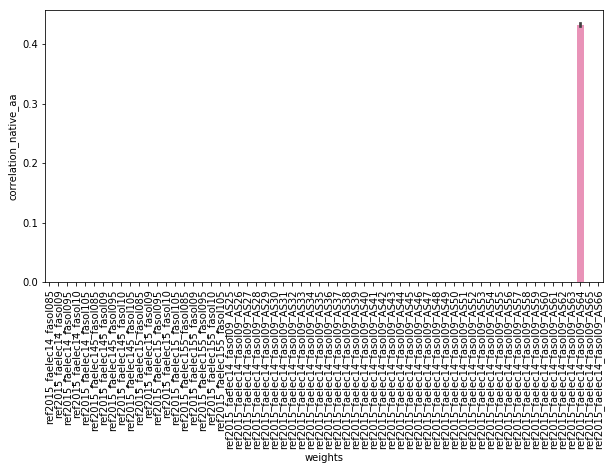

In [10]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="correlation_native_aa", data=data_t, order=["ref2015_faelec14_fasol085","ref2015_faelec14_fasol09","ref2015_faelec14_fasol095","ref2015_faelec14_fasol10","ref2015_faelec14_fasol105","ref2015_faelec145_fasol085","ref2015_faelec145_fasol09","ref2015_faelec145_fasol095","ref2015_faelec145_fasol10","ref2015_faelec145_fasol105","ref2015_faelec15_fasol085","ref2015_faelec15_fasol09","ref2015_faelec15_fasol095","ref2015_faelec15_fasol10","ref2015_faelec15_fasol105","ref2015_faelec155_fasol085","ref2015_faelec155_fasol09","ref2015_faelec155_fasol095","ref2015_faelec155_fasol10","ref2015_faelec155_fasol105","ref2015_faelec14_fasol09_AS25","ref2015_faelec14_fasol09_AS26","ref2015_faelec14_fasol09_AS27","ref2015_faelec14_fasol09_AS28","ref2015_faelec14_fasol09_AS29","ref2015_faelec14_fasol09_AS30","ref2015_faelec14_fasol09_AS31","ref2015_faelec14_fasol09_AS32","ref2015_faelec14_fasol09_AS33","ref2015_faelec14_fasol09_AS34","ref2015_faelec14_fasol09_AS35","ref2015_faelec14_fasol09_AS36","ref2015_faelec14_fasol09_AS37","ref2015_faelec14_fasol09_AS38","ref2015_faelec14_fasol09_AS39","ref2015_faelec14_fasol09_AS40","ref2015_faelec14_fasol09_AS41","ref2015_faelec14_fasol09_AS42","ref2015_faelec14_fasol09_AS43","ref2015_faelec14_fasol09_AS44","ref2015_faelec14_fasol09_AS45","ref2015_faelec14_fasol09_AS46","ref2015_faelec14_fasol09_AS47","ref2015_faelec14_fasol09_AS48","ref2015_faelec14_fasol09_AS49","ref2015_faelec14_fasol09_AS50","ref2015_faelec14_fasol09_AS51","ref2015_faelec14_fasol09_AS52","ref2015_faelec14_fasol09_AS53","ref2015_faelec14_fasol09_AS54","ref2015_faelec14_fasol09_AS55","ref2015_faelec14_fasol09_AS56","ref2015_faelec14_fasol09_AS57","ref2015_faelec14_fasol09_AS58","ref2015_faelec14_fasol09_AS59","ref2015_faelec14_fasol09_AS60","ref2015_faelec14_fasol09_AS61","ref2015_faelec14_fasol09_AS62","ref2015_faelec14_fasol09_AS63","ref2015_faelec14_fasol09_AS64","ref2015_faelec14_fasol09_AS65","ref2015_faelec14_fasol09_AS66"])


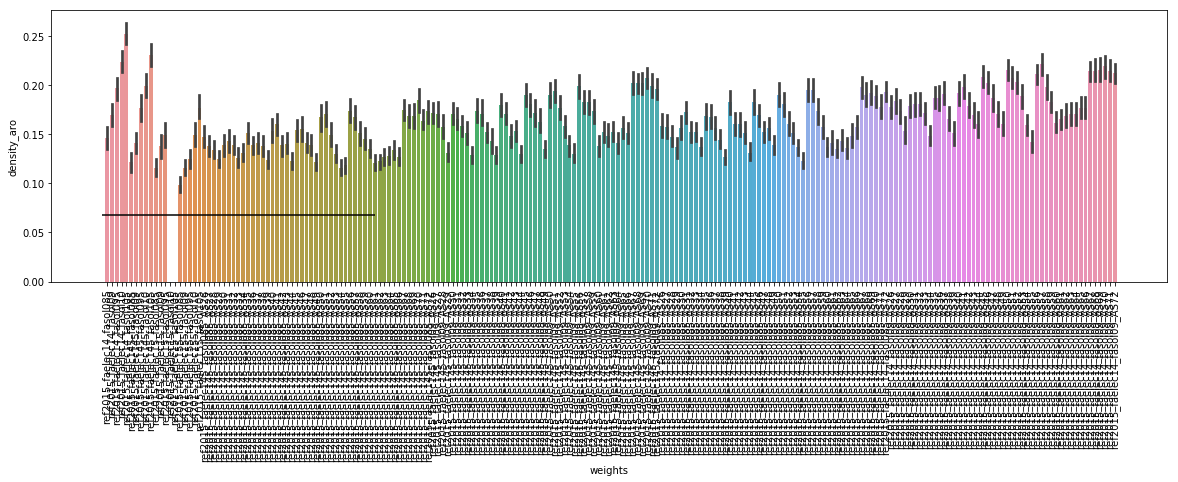

In [10]:
plt.rcParams["figure.figsize"] = [20, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_aro", data=data_t, order=["ref2015_faelec14_fasol085","ref2015_faelec14_fasol09","ref2015_faelec14_fasol095","ref2015_faelec14_fasol10","ref2015_faelec14_fasol105","ref2015_faelec145_fasol085","ref2015_faelec145_fasol09","ref2015_faelec145_fasol095","ref2015_faelec145_fasol10","ref2015_faelec145_fasol105","ref2015_faelec15_fasol085","ref2015_faelec15_fasol09","ref2015_faelec15_fasol095","ref2015_faelec15_fasol10","ref2015_faelec15_fasol105","ref2015_faelec155_fasol085","ref2015_faelec155_fasol09","ref2015_faelec155_fasol095","ref2015_faelec155_fasol10","ref2015_faelec155_fasol105"
,"ref2015_faelec145_fasol085_AS26","ref2015_faelec145_fasol085_AS27","ref2015_faelec145_fasol085_AS28","ref2015_faelec145_fasol085_AS29","ref2015_faelec145_fasol085_AS30","ref2015_faelec145_fasol085_AS31","ref2015_faelec145_fasol085_AS32","ref2015_faelec145_fasol085_AS33","ref2015_faelec145_fasol085_AS34","ref2015_faelec145_fasol085_AS35","ref2015_faelec145_fasol085_AS36","ref2015_faelec145_fasol085_AS37","ref2015_faelec145_fasol085_AS38","ref2015_faelec145_fasol085_AS39","ref2015_faelec145_fasol085_AS40","ref2015_faelec145_fasol085_AS41","ref2015_faelec145_fasol085_AS42","ref2015_faelec145_fasol085_AS43","ref2015_faelec145_fasol085_AS44","ref2015_faelec145_fasol085_AS45","ref2015_faelec145_fasol085_AS46","ref2015_faelec145_fasol085_AS47","ref2015_faelec145_fasol085_AS48","ref2015_faelec145_fasol085_AS49","ref2015_faelec145_fasol085_AS50","ref2015_faelec145_fasol085_AS51","ref2015_faelec145_fasol085_AS52","ref2015_faelec145_fasol085_AS53","ref2015_faelec145_fasol085_AS54","ref2015_faelec145_fasol085_AS55","ref2015_faelec145_fasol085_AS56","ref2015_faelec145_fasol085_AS57","ref2015_faelec145_fasol085_AS58","ref2015_faelec145_fasol085_AS59","ref2015_faelec145_fasol085_AS60","ref2015_faelec145_fasol085_AS61","ref2015_faelec145_fasol085_AS62","ref2015_faelec145_fasol085_AS63","ref2015_faelec145_fasol085_AS64","ref2015_faelec145_fasol085_AS65","ref2015_faelec145_fasol085_AS66","ref2015_faelec145_fasol085_AS67","ref2015_faelec145_fasol085_AS68","ref2015_faelec145_fasol085_AS69","ref2015_faelec145_fasol085_AS70","ref2015_faelec145_fasol085_AS71","ref2015_faelec145_fasol085_AS72"
,"ref2015_faelec145_fasol09_AS26","ref2015_faelec145_fasol09_AS27","ref2015_faelec145_fasol09_AS28","ref2015_faelec145_fasol09_AS29","ref2015_faelec145_fasol09_AS30","ref2015_faelec145_fasol09_AS31","ref2015_faelec145_fasol09_AS32","ref2015_faelec145_fasol09_AS33","ref2015_faelec145_fasol09_AS34","ref2015_faelec145_fasol09_AS35","ref2015_faelec145_fasol09_AS36","ref2015_faelec145_fasol09_AS37","ref2015_faelec145_fasol09_AS38","ref2015_faelec145_fasol09_AS39","ref2015_faelec145_fasol09_AS40","ref2015_faelec145_fasol09_AS41","ref2015_faelec145_fasol09_AS42","ref2015_faelec145_fasol09_AS43","ref2015_faelec145_fasol09_AS44","ref2015_faelec145_fasol09_AS45","ref2015_faelec145_fasol09_AS46","ref2015_faelec145_fasol09_AS47","ref2015_faelec145_fasol09_AS48","ref2015_faelec145_fasol09_AS49","ref2015_faelec145_fasol09_AS50","ref2015_faelec145_fasol09_AS51","ref2015_faelec145_fasol09_AS52","ref2015_faelec145_fasol09_AS53","ref2015_faelec145_fasol09_AS54","ref2015_faelec145_fasol09_AS55","ref2015_faelec145_fasol09_AS56","ref2015_faelec145_fasol09_AS57","ref2015_faelec145_fasol09_AS58","ref2015_faelec145_fasol09_AS59","ref2015_faelec145_fasol09_AS60","ref2015_faelec145_fasol09_AS61","ref2015_faelec145_fasol09_AS62","ref2015_faelec145_fasol09_AS63","ref2015_faelec145_fasol09_AS64","ref2015_faelec145_fasol09_AS65","ref2015_faelec145_fasol09_AS66","ref2015_faelec145_fasol09_AS67","ref2015_faelec145_fasol09_AS68","ref2015_faelec145_fasol09_AS69","ref2015_faelec145_fasol09_AS70","ref2015_faelec145_fasol09_AS71","ref2015_faelec145_fasol09_AS72"
,"ref2015_faelec14_fasol085_AS26","ref2015_faelec14_fasol085_AS27","ref2015_faelec14_fasol085_AS28","ref2015_faelec14_fasol085_AS29","ref2015_faelec14_fasol085_AS30","ref2015_faelec14_fasol085_AS31","ref2015_faelec14_fasol085_AS32","ref2015_faelec14_fasol085_AS33","ref2015_faelec14_fasol085_AS34","ref2015_faelec14_fasol085_AS35","ref2015_faelec14_fasol085_AS36","ref2015_faelec14_fasol085_AS37","ref2015_faelec14_fasol085_AS38","ref2015_faelec14_fasol085_AS39","ref2015_faelec14_fasol085_AS40","ref2015_faelec14_fasol085_AS41","ref2015_faelec14_fasol085_AS42","ref2015_faelec14_fasol085_AS43","ref2015_faelec14_fasol085_AS44","ref2015_faelec14_fasol085_AS45","ref2015_faelec14_fasol085_AS46","ref2015_faelec14_fasol085_AS47","ref2015_faelec14_fasol085_AS48","ref2015_faelec14_fasol085_AS49","ref2015_faelec14_fasol085_AS50","ref2015_faelec14_fasol085_AS51","ref2015_faelec14_fasol085_AS52","ref2015_faelec14_fasol085_AS53","ref2015_faelec14_fasol085_AS54","ref2015_faelec14_fasol085_AS55","ref2015_faelec14_fasol085_AS56","ref2015_faelec14_fasol085_AS57","ref2015_faelec14_fasol085_AS58","ref2015_faelec14_fasol085_AS59","ref2015_faelec14_fasol085_AS60","ref2015_faelec14_fasol085_AS61","ref2015_faelec14_fasol085_AS62","ref2015_faelec14_fasol085_AS63","ref2015_faelec14_fasol085_AS64","ref2015_faelec14_fasol085_AS65","ref2015_faelec14_fasol085_AS66","ref2015_faelec14_fasol085_AS67","ref2015_faelec14_fasol085_AS68","ref2015_faelec14_fasol085_AS69","ref2015_faelec14_fasol085_AS70","ref2015_faelec14_fasol085_AS71","ref2015_faelec14_fasol085_AS72"
,"ref2015_faelec14_fasol09_AS26","ref2015_faelec14_fasol09_AS27","ref2015_faelec14_fasol09_AS28","ref2015_faelec14_fasol09_AS29","ref2015_faelec14_fasol09_AS30","ref2015_faelec14_fasol09_AS31","ref2015_faelec14_fasol09_AS32","ref2015_faelec14_fasol09_AS33","ref2015_faelec14_fasol09_AS34","ref2015_faelec14_fasol09_AS35","ref2015_faelec14_fasol09_AS36","ref2015_faelec14_fasol09_AS37","ref2015_faelec14_fasol09_AS38","ref2015_faelec14_fasol09_AS39","ref2015_faelec14_fasol09_AS40","ref2015_faelec14_fasol09_AS41","ref2015_faelec14_fasol09_AS42","ref2015_faelec14_fasol09_AS43","ref2015_faelec14_fasol09_AS44","ref2015_faelec14_fasol09_AS45","ref2015_faelec14_fasol09_AS46","ref2015_faelec14_fasol09_AS47","ref2015_faelec14_fasol09_AS48","ref2015_faelec14_fasol09_AS49","ref2015_faelec14_fasol09_AS50","ref2015_faelec14_fasol09_AS51","ref2015_faelec14_fasol09_AS52","ref2015_faelec14_fasol09_AS53","ref2015_faelec14_fasol09_AS54","ref2015_faelec14_fasol09_AS55","ref2015_faelec14_fasol09_AS56","ref2015_faelec14_fasol09_AS57","ref2015_faelec14_fasol09_AS58","ref2015_faelec14_fasol09_AS59","ref2015_faelec14_fasol09_AS60","ref2015_faelec14_fasol09_AS61","ref2015_faelec14_fasol09_AS62","ref2015_faelec14_fasol09_AS63","ref2015_faelec14_fasol09_AS64","ref2015_faelec14_fasol09_AS65","ref2015_faelec14_fasol09_AS66","ref2015_faelec14_fasol09_AS67","ref2015_faelec14_fasol09_AS68","ref2015_faelec14_fasol09_AS69","ref2015_faelec14_fasol09_AS70","ref2015_faelec14_fasol09_AS71","ref2015_faelec14_fasol09_AS72"])

plt.hlines(0.068, -1, 55)

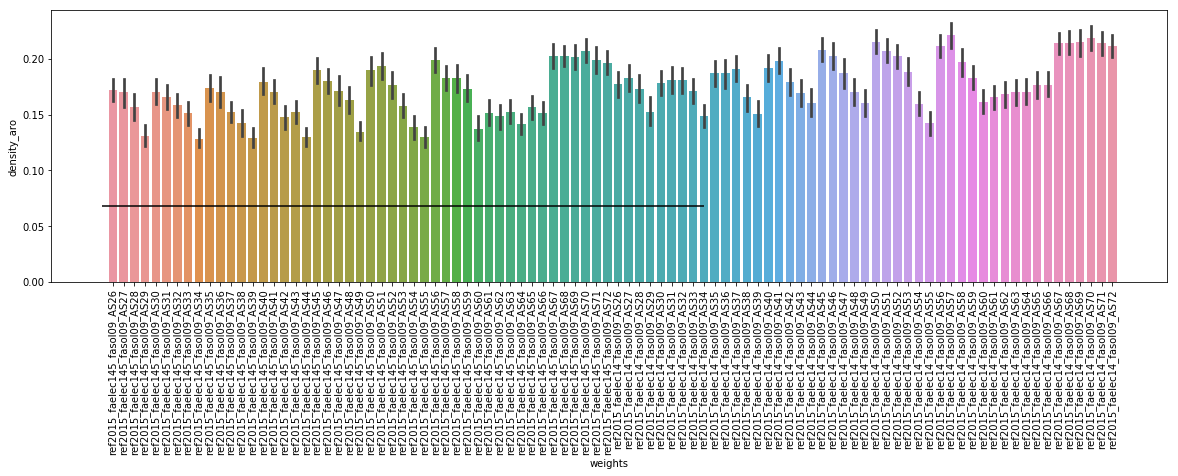

In [26]:
plt.rcParams["figure.figsize"] = [20, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_aro", data=data_t, order=["ref2015_faelec145_fasol09_AS26","ref2015_faelec145_fasol09_AS27","ref2015_faelec145_fasol09_AS28","ref2015_faelec145_fasol09_AS29","ref2015_faelec145_fasol09_AS30","ref2015_faelec145_fasol09_AS31","ref2015_faelec145_fasol09_AS32","ref2015_faelec145_fasol09_AS33","ref2015_faelec145_fasol09_AS34","ref2015_faelec145_fasol09_AS35","ref2015_faelec145_fasol09_AS36","ref2015_faelec145_fasol09_AS37","ref2015_faelec145_fasol09_AS38","ref2015_faelec145_fasol09_AS39","ref2015_faelec145_fasol09_AS40","ref2015_faelec145_fasol09_AS41","ref2015_faelec145_fasol09_AS42","ref2015_faelec145_fasol09_AS43","ref2015_faelec145_fasol09_AS44","ref2015_faelec145_fasol09_AS45","ref2015_faelec145_fasol09_AS46","ref2015_faelec145_fasol09_AS47","ref2015_faelec145_fasol09_AS48","ref2015_faelec145_fasol09_AS49","ref2015_faelec145_fasol09_AS50","ref2015_faelec145_fasol09_AS51","ref2015_faelec145_fasol09_AS52","ref2015_faelec145_fasol09_AS53","ref2015_faelec145_fasol09_AS54","ref2015_faelec145_fasol09_AS55","ref2015_faelec145_fasol09_AS56","ref2015_faelec145_fasol09_AS57","ref2015_faelec145_fasol09_AS58","ref2015_faelec145_fasol09_AS59","ref2015_faelec145_fasol09_AS60","ref2015_faelec145_fasol09_AS61","ref2015_faelec145_fasol09_AS62","ref2015_faelec145_fasol09_AS63","ref2015_faelec145_fasol09_AS64","ref2015_faelec145_fasol09_AS65","ref2015_faelec145_fasol09_AS66","ref2015_faelec145_fasol09_AS67","ref2015_faelec145_fasol09_AS68","ref2015_faelec145_fasol09_AS69","ref2015_faelec145_fasol09_AS70","ref2015_faelec145_fasol09_AS71","ref2015_faelec145_fasol09_AS72"
,"ref2015_faelec14_fasol09_AS26","ref2015_faelec14_fasol09_AS27","ref2015_faelec14_fasol09_AS28","ref2015_faelec14_fasol09_AS29","ref2015_faelec14_fasol09_AS30","ref2015_faelec14_fasol09_AS31","ref2015_faelec14_fasol09_AS32","ref2015_faelec14_fasol09_AS33","ref2015_faelec14_fasol09_AS34","ref2015_faelec14_fasol09_AS35","ref2015_faelec14_fasol09_AS36","ref2015_faelec14_fasol09_AS37","ref2015_faelec14_fasol09_AS38","ref2015_faelec14_fasol09_AS39","ref2015_faelec14_fasol09_AS40","ref2015_faelec14_fasol09_AS41","ref2015_faelec14_fasol09_AS42","ref2015_faelec14_fasol09_AS43","ref2015_faelec14_fasol09_AS44","ref2015_faelec14_fasol09_AS45","ref2015_faelec14_fasol09_AS46","ref2015_faelec14_fasol09_AS47","ref2015_faelec14_fasol09_AS48","ref2015_faelec14_fasol09_AS49","ref2015_faelec14_fasol09_AS50","ref2015_faelec14_fasol09_AS51","ref2015_faelec14_fasol09_AS52","ref2015_faelec14_fasol09_AS53","ref2015_faelec14_fasol09_AS54","ref2015_faelec14_fasol09_AS55","ref2015_faelec14_fasol09_AS56","ref2015_faelec14_fasol09_AS57","ref2015_faelec14_fasol09_AS58","ref2015_faelec14_fasol09_AS59","ref2015_faelec14_fasol09_AS60","ref2015_faelec14_fasol09_AS61","ref2015_faelec14_fasol09_AS62","ref2015_faelec14_fasol09_AS63","ref2015_faelec14_fasol09_AS64","ref2015_faelec14_fasol09_AS65","ref2015_faelec14_fasol09_AS66","ref2015_faelec14_fasol09_AS67","ref2015_faelec14_fasol09_AS68","ref2015_faelec14_fasol09_AS69","ref2015_faelec14_fasol09_AS70","ref2015_faelec14_fasol09_AS71","ref2015_faelec14_fasol09_AS72"])

plt.hlines(0.068, -1, 55)

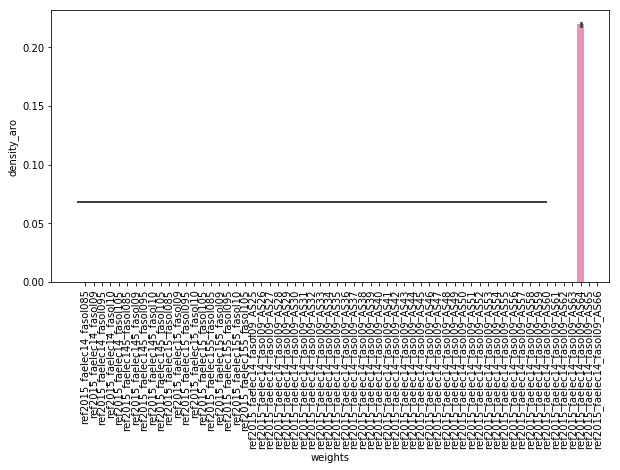

In [11]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_aro", data=data_t, order=["ref2015_faelec14_fasol085","ref2015_faelec14_fasol09","ref2015_faelec14_fasol095","ref2015_faelec14_fasol10","ref2015_faelec14_fasol105","ref2015_faelec145_fasol085","ref2015_faelec145_fasol09","ref2015_faelec145_fasol095","ref2015_faelec145_fasol10","ref2015_faelec145_fasol105","ref2015_faelec15_fasol085","ref2015_faelec15_fasol09","ref2015_faelec15_fasol095","ref2015_faelec15_fasol10","ref2015_faelec15_fasol105","ref2015_faelec155_fasol085","ref2015_faelec155_fasol09","ref2015_faelec155_fasol095","ref2015_faelec155_fasol10","ref2015_faelec155_fasol105","ref2015_faelec14_fasol09_AS25","ref2015_faelec14_fasol09_AS26","ref2015_faelec14_fasol09_AS27","ref2015_faelec14_fasol09_AS28","ref2015_faelec14_fasol09_AS29","ref2015_faelec14_fasol09_AS30","ref2015_faelec14_fasol09_AS31","ref2015_faelec14_fasol09_AS32","ref2015_faelec14_fasol09_AS33","ref2015_faelec14_fasol09_AS34","ref2015_faelec14_fasol09_AS35","ref2015_faelec14_fasol09_AS36","ref2015_faelec14_fasol09_AS37","ref2015_faelec14_fasol09_AS38","ref2015_faelec14_fasol09_AS39","ref2015_faelec14_fasol09_AS40","ref2015_faelec14_fasol09_AS41","ref2015_faelec14_fasol09_AS42","ref2015_faelec14_fasol09_AS43","ref2015_faelec14_fasol09_AS44","ref2015_faelec14_fasol09_AS45","ref2015_faelec14_fasol09_AS46","ref2015_faelec14_fasol09_AS47","ref2015_faelec14_fasol09_AS48","ref2015_faelec14_fasol09_AS49","ref2015_faelec14_fasol09_AS50","ref2015_faelec14_fasol09_AS51","ref2015_faelec14_fasol09_AS52","ref2015_faelec14_fasol09_AS53","ref2015_faelec14_fasol09_AS54","ref2015_faelec14_fasol09_AS55","ref2015_faelec14_fasol09_AS56","ref2015_faelec14_fasol09_AS57","ref2015_faelec14_fasol09_AS58","ref2015_faelec14_fasol09_AS59","ref2015_faelec14_fasol09_AS60","ref2015_faelec14_fasol09_AS61","ref2015_faelec14_fasol09_AS62","ref2015_faelec14_fasol09_AS63","ref2015_faelec14_fasol09_AS64","ref2015_faelec14_fasol09_AS65","ref2015_faelec14_fasol09_AS66"])
plt.hlines(0.068, -1, 55)

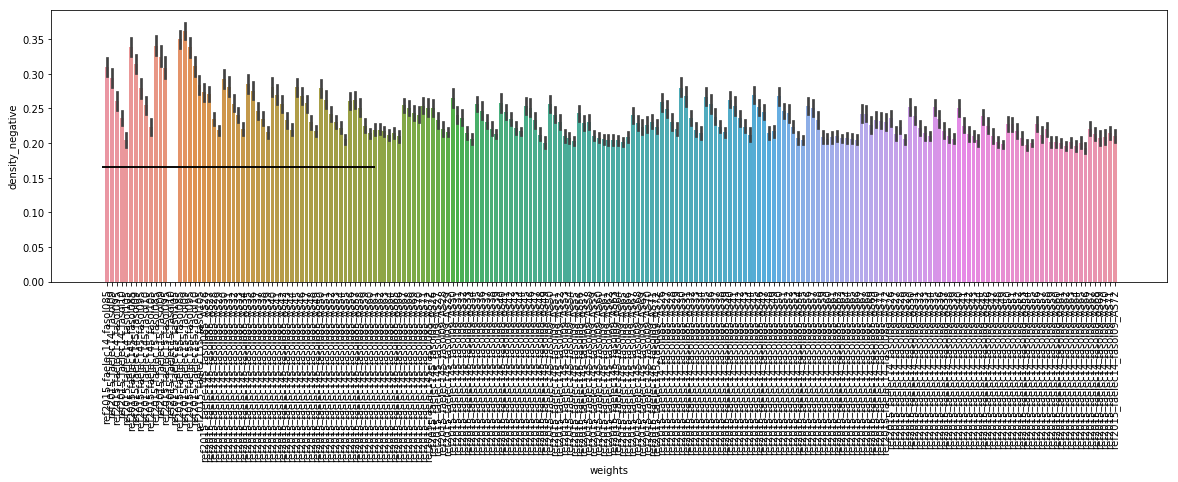

In [11]:
plt.rcParams["figure.figsize"] = [20, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_negative", data=data_t, order=["ref2015_faelec14_fasol085","ref2015_faelec14_fasol09","ref2015_faelec14_fasol095","ref2015_faelec14_fasol10","ref2015_faelec14_fasol105","ref2015_faelec145_fasol085","ref2015_faelec145_fasol09","ref2015_faelec145_fasol095","ref2015_faelec145_fasol10","ref2015_faelec145_fasol105","ref2015_faelec15_fasol085","ref2015_faelec15_fasol09","ref2015_faelec15_fasol095","ref2015_faelec15_fasol10","ref2015_faelec15_fasol105","ref2015_faelec155_fasol085","ref2015_faelec155_fasol09","ref2015_faelec155_fasol095","ref2015_faelec155_fasol10","ref2015_faelec155_fasol105"
,"ref2015_faelec145_fasol085_AS26","ref2015_faelec145_fasol085_AS27","ref2015_faelec145_fasol085_AS28","ref2015_faelec145_fasol085_AS29","ref2015_faelec145_fasol085_AS30","ref2015_faelec145_fasol085_AS31","ref2015_faelec145_fasol085_AS32","ref2015_faelec145_fasol085_AS33","ref2015_faelec145_fasol085_AS34","ref2015_faelec145_fasol085_AS35","ref2015_faelec145_fasol085_AS36","ref2015_faelec145_fasol085_AS37","ref2015_faelec145_fasol085_AS38","ref2015_faelec145_fasol085_AS39","ref2015_faelec145_fasol085_AS40","ref2015_faelec145_fasol085_AS41","ref2015_faelec145_fasol085_AS42","ref2015_faelec145_fasol085_AS43","ref2015_faelec145_fasol085_AS44","ref2015_faelec145_fasol085_AS45","ref2015_faelec145_fasol085_AS46","ref2015_faelec145_fasol085_AS47","ref2015_faelec145_fasol085_AS48","ref2015_faelec145_fasol085_AS49","ref2015_faelec145_fasol085_AS50","ref2015_faelec145_fasol085_AS51","ref2015_faelec145_fasol085_AS52","ref2015_faelec145_fasol085_AS53","ref2015_faelec145_fasol085_AS54","ref2015_faelec145_fasol085_AS55","ref2015_faelec145_fasol085_AS56","ref2015_faelec145_fasol085_AS57","ref2015_faelec145_fasol085_AS58","ref2015_faelec145_fasol085_AS59","ref2015_faelec145_fasol085_AS60","ref2015_faelec145_fasol085_AS61","ref2015_faelec145_fasol085_AS62","ref2015_faelec145_fasol085_AS63","ref2015_faelec145_fasol085_AS64","ref2015_faelec145_fasol085_AS65","ref2015_faelec145_fasol085_AS66","ref2015_faelec145_fasol085_AS67","ref2015_faelec145_fasol085_AS68","ref2015_faelec145_fasol085_AS69","ref2015_faelec145_fasol085_AS70","ref2015_faelec145_fasol085_AS71","ref2015_faelec145_fasol085_AS72"
,"ref2015_faelec145_fasol09_AS26","ref2015_faelec145_fasol09_AS27","ref2015_faelec145_fasol09_AS28","ref2015_faelec145_fasol09_AS29","ref2015_faelec145_fasol09_AS30","ref2015_faelec145_fasol09_AS31","ref2015_faelec145_fasol09_AS32","ref2015_faelec145_fasol09_AS33","ref2015_faelec145_fasol09_AS34","ref2015_faelec145_fasol09_AS35","ref2015_faelec145_fasol09_AS36","ref2015_faelec145_fasol09_AS37","ref2015_faelec145_fasol09_AS38","ref2015_faelec145_fasol09_AS39","ref2015_faelec145_fasol09_AS40","ref2015_faelec145_fasol09_AS41","ref2015_faelec145_fasol09_AS42","ref2015_faelec145_fasol09_AS43","ref2015_faelec145_fasol09_AS44","ref2015_faelec145_fasol09_AS45","ref2015_faelec145_fasol09_AS46","ref2015_faelec145_fasol09_AS47","ref2015_faelec145_fasol09_AS48","ref2015_faelec145_fasol09_AS49","ref2015_faelec145_fasol09_AS50","ref2015_faelec145_fasol09_AS51","ref2015_faelec145_fasol09_AS52","ref2015_faelec145_fasol09_AS53","ref2015_faelec145_fasol09_AS54","ref2015_faelec145_fasol09_AS55","ref2015_faelec145_fasol09_AS56","ref2015_faelec145_fasol09_AS57","ref2015_faelec145_fasol09_AS58","ref2015_faelec145_fasol09_AS59","ref2015_faelec145_fasol09_AS60","ref2015_faelec145_fasol09_AS61","ref2015_faelec145_fasol09_AS62","ref2015_faelec145_fasol09_AS63","ref2015_faelec145_fasol09_AS64","ref2015_faelec145_fasol09_AS65","ref2015_faelec145_fasol09_AS66","ref2015_faelec145_fasol09_AS67","ref2015_faelec145_fasol09_AS68","ref2015_faelec145_fasol09_AS69","ref2015_faelec145_fasol09_AS70","ref2015_faelec145_fasol09_AS71","ref2015_faelec145_fasol09_AS72"
,"ref2015_faelec14_fasol085_AS26","ref2015_faelec14_fasol085_AS27","ref2015_faelec14_fasol085_AS28","ref2015_faelec14_fasol085_AS29","ref2015_faelec14_fasol085_AS30","ref2015_faelec14_fasol085_AS31","ref2015_faelec14_fasol085_AS32","ref2015_faelec14_fasol085_AS33","ref2015_faelec14_fasol085_AS34","ref2015_faelec14_fasol085_AS35","ref2015_faelec14_fasol085_AS36","ref2015_faelec14_fasol085_AS37","ref2015_faelec14_fasol085_AS38","ref2015_faelec14_fasol085_AS39","ref2015_faelec14_fasol085_AS40","ref2015_faelec14_fasol085_AS41","ref2015_faelec14_fasol085_AS42","ref2015_faelec14_fasol085_AS43","ref2015_faelec14_fasol085_AS44","ref2015_faelec14_fasol085_AS45","ref2015_faelec14_fasol085_AS46","ref2015_faelec14_fasol085_AS47","ref2015_faelec14_fasol085_AS48","ref2015_faelec14_fasol085_AS49","ref2015_faelec14_fasol085_AS50","ref2015_faelec14_fasol085_AS51","ref2015_faelec14_fasol085_AS52","ref2015_faelec14_fasol085_AS53","ref2015_faelec14_fasol085_AS54","ref2015_faelec14_fasol085_AS55","ref2015_faelec14_fasol085_AS56","ref2015_faelec14_fasol085_AS57","ref2015_faelec14_fasol085_AS58","ref2015_faelec14_fasol085_AS59","ref2015_faelec14_fasol085_AS60","ref2015_faelec14_fasol085_AS61","ref2015_faelec14_fasol085_AS62","ref2015_faelec14_fasol085_AS63","ref2015_faelec14_fasol085_AS64","ref2015_faelec14_fasol085_AS65","ref2015_faelec14_fasol085_AS66","ref2015_faelec14_fasol085_AS67","ref2015_faelec14_fasol085_AS68","ref2015_faelec14_fasol085_AS69","ref2015_faelec14_fasol085_AS70","ref2015_faelec14_fasol085_AS71","ref2015_faelec14_fasol085_AS72"
,"ref2015_faelec14_fasol09_AS26","ref2015_faelec14_fasol09_AS27","ref2015_faelec14_fasol09_AS28","ref2015_faelec14_fasol09_AS29","ref2015_faelec14_fasol09_AS30","ref2015_faelec14_fasol09_AS31","ref2015_faelec14_fasol09_AS32","ref2015_faelec14_fasol09_AS33","ref2015_faelec14_fasol09_AS34","ref2015_faelec14_fasol09_AS35","ref2015_faelec14_fasol09_AS36","ref2015_faelec14_fasol09_AS37","ref2015_faelec14_fasol09_AS38","ref2015_faelec14_fasol09_AS39","ref2015_faelec14_fasol09_AS40","ref2015_faelec14_fasol09_AS41","ref2015_faelec14_fasol09_AS42","ref2015_faelec14_fasol09_AS43","ref2015_faelec14_fasol09_AS44","ref2015_faelec14_fasol09_AS45","ref2015_faelec14_fasol09_AS46","ref2015_faelec14_fasol09_AS47","ref2015_faelec14_fasol09_AS48","ref2015_faelec14_fasol09_AS49","ref2015_faelec14_fasol09_AS50","ref2015_faelec14_fasol09_AS51","ref2015_faelec14_fasol09_AS52","ref2015_faelec14_fasol09_AS53","ref2015_faelec14_fasol09_AS54","ref2015_faelec14_fasol09_AS55","ref2015_faelec14_fasol09_AS56","ref2015_faelec14_fasol09_AS57","ref2015_faelec14_fasol09_AS58","ref2015_faelec14_fasol09_AS59","ref2015_faelec14_fasol09_AS60","ref2015_faelec14_fasol09_AS61","ref2015_faelec14_fasol09_AS62","ref2015_faelec14_fasol09_AS63","ref2015_faelec14_fasol09_AS64","ref2015_faelec14_fasol09_AS65","ref2015_faelec14_fasol09_AS66","ref2015_faelec14_fasol09_AS67","ref2015_faelec14_fasol09_AS68","ref2015_faelec14_fasol09_AS69","ref2015_faelec14_fasol09_AS70","ref2015_faelec14_fasol09_AS71","ref2015_faelec14_fasol09_AS72"])

plt.hlines(0.166, -1, 55)
plt.hlines(0.166, -1, 55)

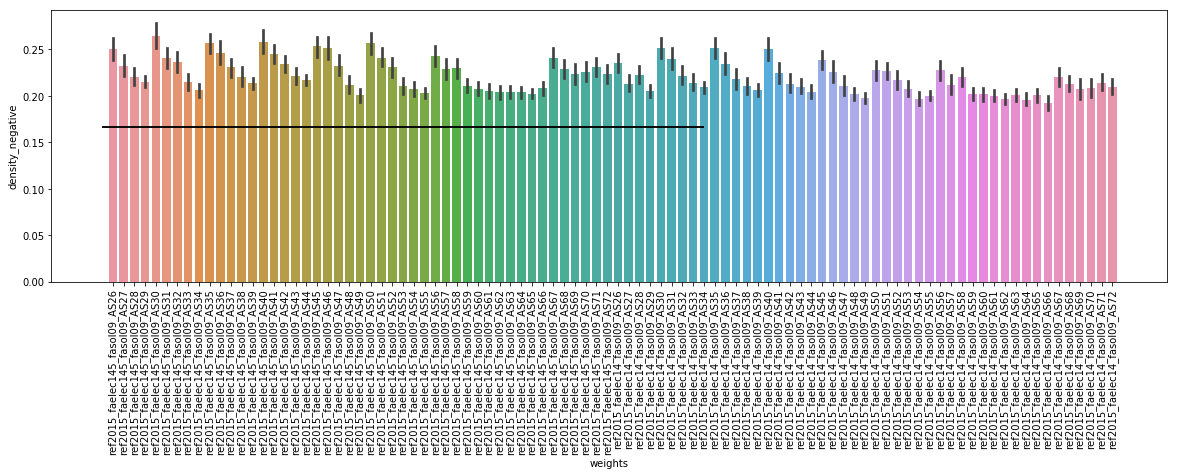

In [27]:
plt.rcParams["figure.figsize"] = [20, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_negative", data=data_t, order=["ref2015_faelec145_fasol09_AS26","ref2015_faelec145_fasol09_AS27","ref2015_faelec145_fasol09_AS28","ref2015_faelec145_fasol09_AS29","ref2015_faelec145_fasol09_AS30","ref2015_faelec145_fasol09_AS31","ref2015_faelec145_fasol09_AS32","ref2015_faelec145_fasol09_AS33","ref2015_faelec145_fasol09_AS34","ref2015_faelec145_fasol09_AS35","ref2015_faelec145_fasol09_AS36","ref2015_faelec145_fasol09_AS37","ref2015_faelec145_fasol09_AS38","ref2015_faelec145_fasol09_AS39","ref2015_faelec145_fasol09_AS40","ref2015_faelec145_fasol09_AS41","ref2015_faelec145_fasol09_AS42","ref2015_faelec145_fasol09_AS43","ref2015_faelec145_fasol09_AS44","ref2015_faelec145_fasol09_AS45","ref2015_faelec145_fasol09_AS46","ref2015_faelec145_fasol09_AS47","ref2015_faelec145_fasol09_AS48","ref2015_faelec145_fasol09_AS49","ref2015_faelec145_fasol09_AS50","ref2015_faelec145_fasol09_AS51","ref2015_faelec145_fasol09_AS52","ref2015_faelec145_fasol09_AS53","ref2015_faelec145_fasol09_AS54","ref2015_faelec145_fasol09_AS55","ref2015_faelec145_fasol09_AS56","ref2015_faelec145_fasol09_AS57","ref2015_faelec145_fasol09_AS58","ref2015_faelec145_fasol09_AS59","ref2015_faelec145_fasol09_AS60","ref2015_faelec145_fasol09_AS61","ref2015_faelec145_fasol09_AS62","ref2015_faelec145_fasol09_AS63","ref2015_faelec145_fasol09_AS64","ref2015_faelec145_fasol09_AS65","ref2015_faelec145_fasol09_AS66","ref2015_faelec145_fasol09_AS67","ref2015_faelec145_fasol09_AS68","ref2015_faelec145_fasol09_AS69","ref2015_faelec145_fasol09_AS70","ref2015_faelec145_fasol09_AS71","ref2015_faelec145_fasol09_AS72"
,"ref2015_faelec14_fasol09_AS26","ref2015_faelec14_fasol09_AS27","ref2015_faelec14_fasol09_AS28","ref2015_faelec14_fasol09_AS29","ref2015_faelec14_fasol09_AS30","ref2015_faelec14_fasol09_AS31","ref2015_faelec14_fasol09_AS32","ref2015_faelec14_fasol09_AS33","ref2015_faelec14_fasol09_AS34","ref2015_faelec14_fasol09_AS35","ref2015_faelec14_fasol09_AS36","ref2015_faelec14_fasol09_AS37","ref2015_faelec14_fasol09_AS38","ref2015_faelec14_fasol09_AS39","ref2015_faelec14_fasol09_AS40","ref2015_faelec14_fasol09_AS41","ref2015_faelec14_fasol09_AS42","ref2015_faelec14_fasol09_AS43","ref2015_faelec14_fasol09_AS44","ref2015_faelec14_fasol09_AS45","ref2015_faelec14_fasol09_AS46","ref2015_faelec14_fasol09_AS47","ref2015_faelec14_fasol09_AS48","ref2015_faelec14_fasol09_AS49","ref2015_faelec14_fasol09_AS50","ref2015_faelec14_fasol09_AS51","ref2015_faelec14_fasol09_AS52","ref2015_faelec14_fasol09_AS53","ref2015_faelec14_fasol09_AS54","ref2015_faelec14_fasol09_AS55","ref2015_faelec14_fasol09_AS56","ref2015_faelec14_fasol09_AS57","ref2015_faelec14_fasol09_AS58","ref2015_faelec14_fasol09_AS59","ref2015_faelec14_fasol09_AS60","ref2015_faelec14_fasol09_AS61","ref2015_faelec14_fasol09_AS62","ref2015_faelec14_fasol09_AS63","ref2015_faelec14_fasol09_AS64","ref2015_faelec14_fasol09_AS65","ref2015_faelec14_fasol09_AS66","ref2015_faelec14_fasol09_AS67","ref2015_faelec14_fasol09_AS68","ref2015_faelec14_fasol09_AS69","ref2015_faelec14_fasol09_AS70","ref2015_faelec14_fasol09_AS71","ref2015_faelec14_fasol09_AS72"])

plt.hlines(0.166, -1, 55)
plt.hlines(0.166, -1, 55)

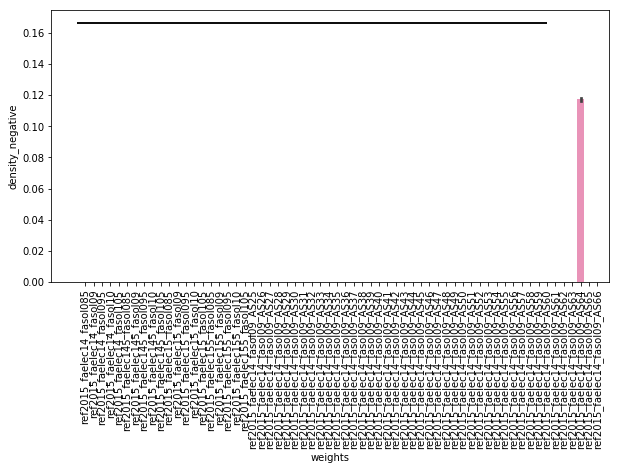

In [12]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_negative", data=data_t, order=["ref2015_faelec14_fasol085","ref2015_faelec14_fasol09","ref2015_faelec14_fasol095","ref2015_faelec14_fasol10","ref2015_faelec14_fasol105","ref2015_faelec145_fasol085","ref2015_faelec145_fasol09","ref2015_faelec145_fasol095","ref2015_faelec145_fasol10","ref2015_faelec145_fasol105","ref2015_faelec15_fasol085","ref2015_faelec15_fasol09","ref2015_faelec15_fasol095","ref2015_faelec15_fasol10","ref2015_faelec15_fasol105","ref2015_faelec155_fasol085","ref2015_faelec155_fasol09","ref2015_faelec155_fasol095","ref2015_faelec155_fasol10","ref2015_faelec155_fasol105","ref2015_faelec14_fasol09_AS25","ref2015_faelec14_fasol09_AS26","ref2015_faelec14_fasol09_AS27","ref2015_faelec14_fasol09_AS28","ref2015_faelec14_fasol09_AS29","ref2015_faelec14_fasol09_AS30","ref2015_faelec14_fasol09_AS31","ref2015_faelec14_fasol09_AS32","ref2015_faelec14_fasol09_AS33","ref2015_faelec14_fasol09_AS34","ref2015_faelec14_fasol09_AS35","ref2015_faelec14_fasol09_AS36","ref2015_faelec14_fasol09_AS37","ref2015_faelec14_fasol09_AS38","ref2015_faelec14_fasol09_AS39","ref2015_faelec14_fasol09_AS40","ref2015_faelec14_fasol09_AS41","ref2015_faelec14_fasol09_AS42","ref2015_faelec14_fasol09_AS43","ref2015_faelec14_fasol09_AS44","ref2015_faelec14_fasol09_AS45","ref2015_faelec14_fasol09_AS46","ref2015_faelec14_fasol09_AS47","ref2015_faelec14_fasol09_AS48","ref2015_faelec14_fasol09_AS49","ref2015_faelec14_fasol09_AS50","ref2015_faelec14_fasol09_AS51","ref2015_faelec14_fasol09_AS52","ref2015_faelec14_fasol09_AS53","ref2015_faelec14_fasol09_AS54","ref2015_faelec14_fasol09_AS55","ref2015_faelec14_fasol09_AS56","ref2015_faelec14_fasol09_AS57","ref2015_faelec14_fasol09_AS58","ref2015_faelec14_fasol09_AS59","ref2015_faelec14_fasol09_AS60","ref2015_faelec14_fasol09_AS61","ref2015_faelec14_fasol09_AS62","ref2015_faelec14_fasol09_AS63","ref2015_faelec14_fasol09_AS64","ref2015_faelec14_fasol09_AS65","ref2015_faelec14_fasol09_AS66"])
plt.hlines(0.166, -1, 55)
plt.hlines(0.166, -1, 55)

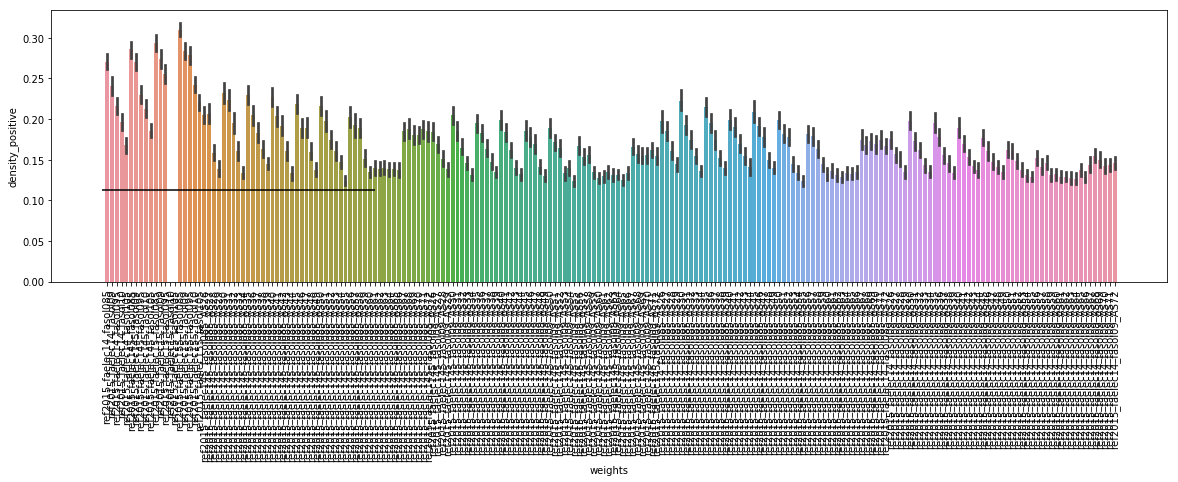

In [12]:
plt.rcParams["figure.figsize"] = [20, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_positive", data=data_t, order=["ref2015_faelec14_fasol085","ref2015_faelec14_fasol09","ref2015_faelec14_fasol095","ref2015_faelec14_fasol10","ref2015_faelec14_fasol105","ref2015_faelec145_fasol085","ref2015_faelec145_fasol09","ref2015_faelec145_fasol095","ref2015_faelec145_fasol10","ref2015_faelec145_fasol105","ref2015_faelec15_fasol085","ref2015_faelec15_fasol09","ref2015_faelec15_fasol095","ref2015_faelec15_fasol10","ref2015_faelec15_fasol105","ref2015_faelec155_fasol085","ref2015_faelec155_fasol09","ref2015_faelec155_fasol095","ref2015_faelec155_fasol10","ref2015_faelec155_fasol105"
,"ref2015_faelec145_fasol085_AS26","ref2015_faelec145_fasol085_AS27","ref2015_faelec145_fasol085_AS28","ref2015_faelec145_fasol085_AS29","ref2015_faelec145_fasol085_AS30","ref2015_faelec145_fasol085_AS31","ref2015_faelec145_fasol085_AS32","ref2015_faelec145_fasol085_AS33","ref2015_faelec145_fasol085_AS34","ref2015_faelec145_fasol085_AS35","ref2015_faelec145_fasol085_AS36","ref2015_faelec145_fasol085_AS37","ref2015_faelec145_fasol085_AS38","ref2015_faelec145_fasol085_AS39","ref2015_faelec145_fasol085_AS40","ref2015_faelec145_fasol085_AS41","ref2015_faelec145_fasol085_AS42","ref2015_faelec145_fasol085_AS43","ref2015_faelec145_fasol085_AS44","ref2015_faelec145_fasol085_AS45","ref2015_faelec145_fasol085_AS46","ref2015_faelec145_fasol085_AS47","ref2015_faelec145_fasol085_AS48","ref2015_faelec145_fasol085_AS49","ref2015_faelec145_fasol085_AS50","ref2015_faelec145_fasol085_AS51","ref2015_faelec145_fasol085_AS52","ref2015_faelec145_fasol085_AS53","ref2015_faelec145_fasol085_AS54","ref2015_faelec145_fasol085_AS55","ref2015_faelec145_fasol085_AS56","ref2015_faelec145_fasol085_AS57","ref2015_faelec145_fasol085_AS58","ref2015_faelec145_fasol085_AS59","ref2015_faelec145_fasol085_AS60","ref2015_faelec145_fasol085_AS61","ref2015_faelec145_fasol085_AS62","ref2015_faelec145_fasol085_AS63","ref2015_faelec145_fasol085_AS64","ref2015_faelec145_fasol085_AS65","ref2015_faelec145_fasol085_AS66","ref2015_faelec145_fasol085_AS67","ref2015_faelec145_fasol085_AS68","ref2015_faelec145_fasol085_AS69","ref2015_faelec145_fasol085_AS70","ref2015_faelec145_fasol085_AS71","ref2015_faelec145_fasol085_AS72"
,"ref2015_faelec145_fasol09_AS26","ref2015_faelec145_fasol09_AS27","ref2015_faelec145_fasol09_AS28","ref2015_faelec145_fasol09_AS29","ref2015_faelec145_fasol09_AS30","ref2015_faelec145_fasol09_AS31","ref2015_faelec145_fasol09_AS32","ref2015_faelec145_fasol09_AS33","ref2015_faelec145_fasol09_AS34","ref2015_faelec145_fasol09_AS35","ref2015_faelec145_fasol09_AS36","ref2015_faelec145_fasol09_AS37","ref2015_faelec145_fasol09_AS38","ref2015_faelec145_fasol09_AS39","ref2015_faelec145_fasol09_AS40","ref2015_faelec145_fasol09_AS41","ref2015_faelec145_fasol09_AS42","ref2015_faelec145_fasol09_AS43","ref2015_faelec145_fasol09_AS44","ref2015_faelec145_fasol09_AS45","ref2015_faelec145_fasol09_AS46","ref2015_faelec145_fasol09_AS47","ref2015_faelec145_fasol09_AS48","ref2015_faelec145_fasol09_AS49","ref2015_faelec145_fasol09_AS50","ref2015_faelec145_fasol09_AS51","ref2015_faelec145_fasol09_AS52","ref2015_faelec145_fasol09_AS53","ref2015_faelec145_fasol09_AS54","ref2015_faelec145_fasol09_AS55","ref2015_faelec145_fasol09_AS56","ref2015_faelec145_fasol09_AS57","ref2015_faelec145_fasol09_AS58","ref2015_faelec145_fasol09_AS59","ref2015_faelec145_fasol09_AS60","ref2015_faelec145_fasol09_AS61","ref2015_faelec145_fasol09_AS62","ref2015_faelec145_fasol09_AS63","ref2015_faelec145_fasol09_AS64","ref2015_faelec145_fasol09_AS65","ref2015_faelec145_fasol09_AS66","ref2015_faelec145_fasol09_AS67","ref2015_faelec145_fasol09_AS68","ref2015_faelec145_fasol09_AS69","ref2015_faelec145_fasol09_AS70","ref2015_faelec145_fasol09_AS71","ref2015_faelec145_fasol09_AS72"
,"ref2015_faelec14_fasol085_AS26","ref2015_faelec14_fasol085_AS27","ref2015_faelec14_fasol085_AS28","ref2015_faelec14_fasol085_AS29","ref2015_faelec14_fasol085_AS30","ref2015_faelec14_fasol085_AS31","ref2015_faelec14_fasol085_AS32","ref2015_faelec14_fasol085_AS33","ref2015_faelec14_fasol085_AS34","ref2015_faelec14_fasol085_AS35","ref2015_faelec14_fasol085_AS36","ref2015_faelec14_fasol085_AS37","ref2015_faelec14_fasol085_AS38","ref2015_faelec14_fasol085_AS39","ref2015_faelec14_fasol085_AS40","ref2015_faelec14_fasol085_AS41","ref2015_faelec14_fasol085_AS42","ref2015_faelec14_fasol085_AS43","ref2015_faelec14_fasol085_AS44","ref2015_faelec14_fasol085_AS45","ref2015_faelec14_fasol085_AS46","ref2015_faelec14_fasol085_AS47","ref2015_faelec14_fasol085_AS48","ref2015_faelec14_fasol085_AS49","ref2015_faelec14_fasol085_AS50","ref2015_faelec14_fasol085_AS51","ref2015_faelec14_fasol085_AS52","ref2015_faelec14_fasol085_AS53","ref2015_faelec14_fasol085_AS54","ref2015_faelec14_fasol085_AS55","ref2015_faelec14_fasol085_AS56","ref2015_faelec14_fasol085_AS57","ref2015_faelec14_fasol085_AS58","ref2015_faelec14_fasol085_AS59","ref2015_faelec14_fasol085_AS60","ref2015_faelec14_fasol085_AS61","ref2015_faelec14_fasol085_AS62","ref2015_faelec14_fasol085_AS63","ref2015_faelec14_fasol085_AS64","ref2015_faelec14_fasol085_AS65","ref2015_faelec14_fasol085_AS66","ref2015_faelec14_fasol085_AS67","ref2015_faelec14_fasol085_AS68","ref2015_faelec14_fasol085_AS69","ref2015_faelec14_fasol085_AS70","ref2015_faelec14_fasol085_AS71","ref2015_faelec14_fasol085_AS72"
,"ref2015_faelec14_fasol09_AS26","ref2015_faelec14_fasol09_AS27","ref2015_faelec14_fasol09_AS28","ref2015_faelec14_fasol09_AS29","ref2015_faelec14_fasol09_AS30","ref2015_faelec14_fasol09_AS31","ref2015_faelec14_fasol09_AS32","ref2015_faelec14_fasol09_AS33","ref2015_faelec14_fasol09_AS34","ref2015_faelec14_fasol09_AS35","ref2015_faelec14_fasol09_AS36","ref2015_faelec14_fasol09_AS37","ref2015_faelec14_fasol09_AS38","ref2015_faelec14_fasol09_AS39","ref2015_faelec14_fasol09_AS40","ref2015_faelec14_fasol09_AS41","ref2015_faelec14_fasol09_AS42","ref2015_faelec14_fasol09_AS43","ref2015_faelec14_fasol09_AS44","ref2015_faelec14_fasol09_AS45","ref2015_faelec14_fasol09_AS46","ref2015_faelec14_fasol09_AS47","ref2015_faelec14_fasol09_AS48","ref2015_faelec14_fasol09_AS49","ref2015_faelec14_fasol09_AS50","ref2015_faelec14_fasol09_AS51","ref2015_faelec14_fasol09_AS52","ref2015_faelec14_fasol09_AS53","ref2015_faelec14_fasol09_AS54","ref2015_faelec14_fasol09_AS55","ref2015_faelec14_fasol09_AS56","ref2015_faelec14_fasol09_AS57","ref2015_faelec14_fasol09_AS58","ref2015_faelec14_fasol09_AS59","ref2015_faelec14_fasol09_AS60","ref2015_faelec14_fasol09_AS61","ref2015_faelec14_fasol09_AS62","ref2015_faelec14_fasol09_AS63","ref2015_faelec14_fasol09_AS64","ref2015_faelec14_fasol09_AS65","ref2015_faelec14_fasol09_AS66","ref2015_faelec14_fasol09_AS67","ref2015_faelec14_fasol09_AS68","ref2015_faelec14_fasol09_AS69","ref2015_faelec14_fasol09_AS70","ref2015_faelec14_fasol09_AS71","ref2015_faelec14_fasol09_AS72"])

plt.hlines(0.113, -1, 55)

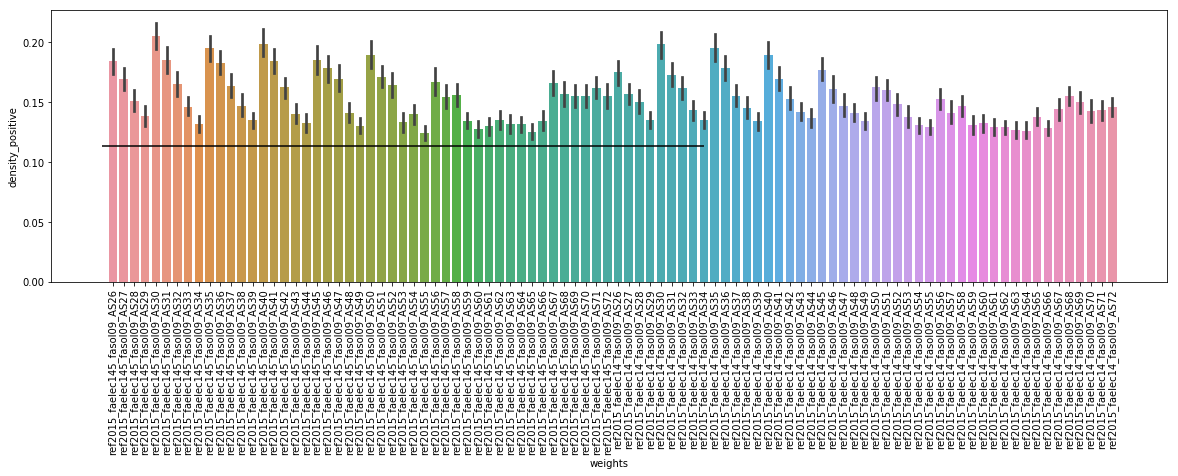

In [28]:
plt.rcParams["figure.figsize"] = [20, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_positive", data=data_t, order=["ref2015_faelec145_fasol09_AS26","ref2015_faelec145_fasol09_AS27","ref2015_faelec145_fasol09_AS28","ref2015_faelec145_fasol09_AS29","ref2015_faelec145_fasol09_AS30","ref2015_faelec145_fasol09_AS31","ref2015_faelec145_fasol09_AS32","ref2015_faelec145_fasol09_AS33","ref2015_faelec145_fasol09_AS34","ref2015_faelec145_fasol09_AS35","ref2015_faelec145_fasol09_AS36","ref2015_faelec145_fasol09_AS37","ref2015_faelec145_fasol09_AS38","ref2015_faelec145_fasol09_AS39","ref2015_faelec145_fasol09_AS40","ref2015_faelec145_fasol09_AS41","ref2015_faelec145_fasol09_AS42","ref2015_faelec145_fasol09_AS43","ref2015_faelec145_fasol09_AS44","ref2015_faelec145_fasol09_AS45","ref2015_faelec145_fasol09_AS46","ref2015_faelec145_fasol09_AS47","ref2015_faelec145_fasol09_AS48","ref2015_faelec145_fasol09_AS49","ref2015_faelec145_fasol09_AS50","ref2015_faelec145_fasol09_AS51","ref2015_faelec145_fasol09_AS52","ref2015_faelec145_fasol09_AS53","ref2015_faelec145_fasol09_AS54","ref2015_faelec145_fasol09_AS55","ref2015_faelec145_fasol09_AS56","ref2015_faelec145_fasol09_AS57","ref2015_faelec145_fasol09_AS58","ref2015_faelec145_fasol09_AS59","ref2015_faelec145_fasol09_AS60","ref2015_faelec145_fasol09_AS61","ref2015_faelec145_fasol09_AS62","ref2015_faelec145_fasol09_AS63","ref2015_faelec145_fasol09_AS64","ref2015_faelec145_fasol09_AS65","ref2015_faelec145_fasol09_AS66","ref2015_faelec145_fasol09_AS67","ref2015_faelec145_fasol09_AS68","ref2015_faelec145_fasol09_AS69","ref2015_faelec145_fasol09_AS70","ref2015_faelec145_fasol09_AS71","ref2015_faelec145_fasol09_AS72"
,"ref2015_faelec14_fasol09_AS26","ref2015_faelec14_fasol09_AS27","ref2015_faelec14_fasol09_AS28","ref2015_faelec14_fasol09_AS29","ref2015_faelec14_fasol09_AS30","ref2015_faelec14_fasol09_AS31","ref2015_faelec14_fasol09_AS32","ref2015_faelec14_fasol09_AS33","ref2015_faelec14_fasol09_AS34","ref2015_faelec14_fasol09_AS35","ref2015_faelec14_fasol09_AS36","ref2015_faelec14_fasol09_AS37","ref2015_faelec14_fasol09_AS38","ref2015_faelec14_fasol09_AS39","ref2015_faelec14_fasol09_AS40","ref2015_faelec14_fasol09_AS41","ref2015_faelec14_fasol09_AS42","ref2015_faelec14_fasol09_AS43","ref2015_faelec14_fasol09_AS44","ref2015_faelec14_fasol09_AS45","ref2015_faelec14_fasol09_AS46","ref2015_faelec14_fasol09_AS47","ref2015_faelec14_fasol09_AS48","ref2015_faelec14_fasol09_AS49","ref2015_faelec14_fasol09_AS50","ref2015_faelec14_fasol09_AS51","ref2015_faelec14_fasol09_AS52","ref2015_faelec14_fasol09_AS53","ref2015_faelec14_fasol09_AS54","ref2015_faelec14_fasol09_AS55","ref2015_faelec14_fasol09_AS56","ref2015_faelec14_fasol09_AS57","ref2015_faelec14_fasol09_AS58","ref2015_faelec14_fasol09_AS59","ref2015_faelec14_fasol09_AS60","ref2015_faelec14_fasol09_AS61","ref2015_faelec14_fasol09_AS62","ref2015_faelec14_fasol09_AS63","ref2015_faelec14_fasol09_AS64","ref2015_faelec14_fasol09_AS65","ref2015_faelec14_fasol09_AS66","ref2015_faelec14_fasol09_AS67","ref2015_faelec14_fasol09_AS68","ref2015_faelec14_fasol09_AS69","ref2015_faelec14_fasol09_AS70","ref2015_faelec14_fasol09_AS71","ref2015_faelec14_fasol09_AS72"])

plt.hlines(0.113, -1, 55)

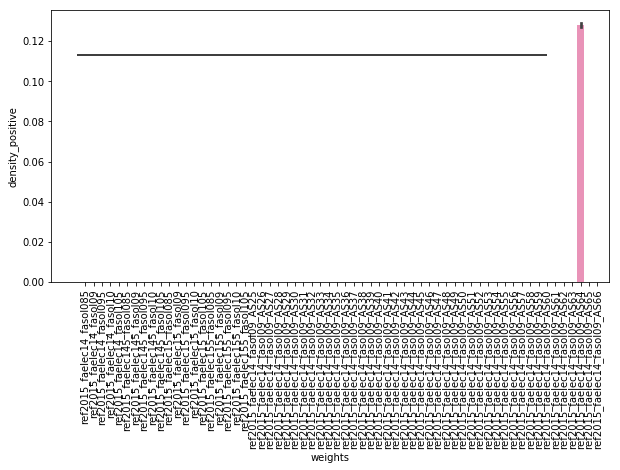

In [13]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_positive", data=data_t, order=["ref2015_faelec14_fasol085","ref2015_faelec14_fasol09","ref2015_faelec14_fasol095","ref2015_faelec14_fasol10","ref2015_faelec14_fasol105","ref2015_faelec145_fasol085","ref2015_faelec145_fasol09","ref2015_faelec145_fasol095","ref2015_faelec145_fasol10","ref2015_faelec145_fasol105","ref2015_faelec15_fasol085","ref2015_faelec15_fasol09","ref2015_faelec15_fasol095","ref2015_faelec15_fasol10","ref2015_faelec15_fasol105","ref2015_faelec155_fasol085","ref2015_faelec155_fasol09","ref2015_faelec155_fasol095","ref2015_faelec155_fasol10","ref2015_faelec155_fasol105","ref2015_faelec14_fasol09_AS25","ref2015_faelec14_fasol09_AS26","ref2015_faelec14_fasol09_AS27","ref2015_faelec14_fasol09_AS28","ref2015_faelec14_fasol09_AS29","ref2015_faelec14_fasol09_AS30","ref2015_faelec14_fasol09_AS31","ref2015_faelec14_fasol09_AS32","ref2015_faelec14_fasol09_AS33","ref2015_faelec14_fasol09_AS34","ref2015_faelec14_fasol09_AS35","ref2015_faelec14_fasol09_AS36","ref2015_faelec14_fasol09_AS37","ref2015_faelec14_fasol09_AS38","ref2015_faelec14_fasol09_AS39","ref2015_faelec14_fasol09_AS40","ref2015_faelec14_fasol09_AS41","ref2015_faelec14_fasol09_AS42","ref2015_faelec14_fasol09_AS43","ref2015_faelec14_fasol09_AS44","ref2015_faelec14_fasol09_AS45","ref2015_faelec14_fasol09_AS46","ref2015_faelec14_fasol09_AS47","ref2015_faelec14_fasol09_AS48","ref2015_faelec14_fasol09_AS49","ref2015_faelec14_fasol09_AS50","ref2015_faelec14_fasol09_AS51","ref2015_faelec14_fasol09_AS52","ref2015_faelec14_fasol09_AS53","ref2015_faelec14_fasol09_AS54","ref2015_faelec14_fasol09_AS55","ref2015_faelec14_fasol09_AS56","ref2015_faelec14_fasol09_AS57","ref2015_faelec14_fasol09_AS58","ref2015_faelec14_fasol09_AS59","ref2015_faelec14_fasol09_AS60","ref2015_faelec14_fasol09_AS61","ref2015_faelec14_fasol09_AS62","ref2015_faelec14_fasol09_AS63","ref2015_faelec14_fasol09_AS64","ref2015_faelec14_fasol09_AS65","ref2015_faelec14_fasol09_AS66"])
plt.hlines(0.113, -1, 55)

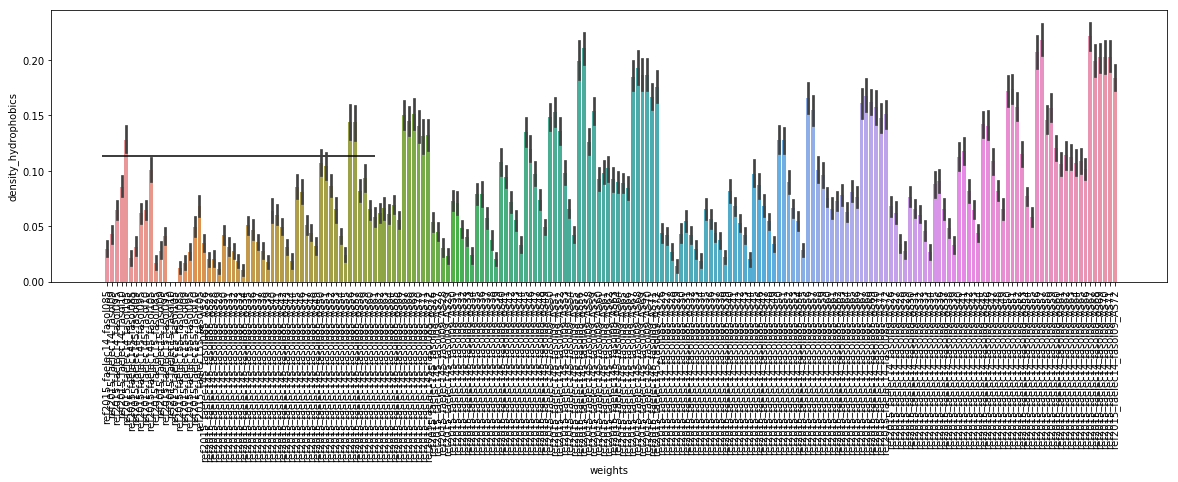

In [13]:
plt.rcParams["figure.figsize"] = [20, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_hydrophobics", data=data_t, order=["ref2015_faelec14_fasol085","ref2015_faelec14_fasol09","ref2015_faelec14_fasol095","ref2015_faelec14_fasol10","ref2015_faelec14_fasol105","ref2015_faelec145_fasol085","ref2015_faelec145_fasol09","ref2015_faelec145_fasol095","ref2015_faelec145_fasol10","ref2015_faelec145_fasol105","ref2015_faelec15_fasol085","ref2015_faelec15_fasol09","ref2015_faelec15_fasol095","ref2015_faelec15_fasol10","ref2015_faelec15_fasol105","ref2015_faelec155_fasol085","ref2015_faelec155_fasol09","ref2015_faelec155_fasol095","ref2015_faelec155_fasol10","ref2015_faelec155_fasol105"
,"ref2015_faelec145_fasol085_AS26","ref2015_faelec145_fasol085_AS27","ref2015_faelec145_fasol085_AS28","ref2015_faelec145_fasol085_AS29","ref2015_faelec145_fasol085_AS30","ref2015_faelec145_fasol085_AS31","ref2015_faelec145_fasol085_AS32","ref2015_faelec145_fasol085_AS33","ref2015_faelec145_fasol085_AS34","ref2015_faelec145_fasol085_AS35","ref2015_faelec145_fasol085_AS36","ref2015_faelec145_fasol085_AS37","ref2015_faelec145_fasol085_AS38","ref2015_faelec145_fasol085_AS39","ref2015_faelec145_fasol085_AS40","ref2015_faelec145_fasol085_AS41","ref2015_faelec145_fasol085_AS42","ref2015_faelec145_fasol085_AS43","ref2015_faelec145_fasol085_AS44","ref2015_faelec145_fasol085_AS45","ref2015_faelec145_fasol085_AS46","ref2015_faelec145_fasol085_AS47","ref2015_faelec145_fasol085_AS48","ref2015_faelec145_fasol085_AS49","ref2015_faelec145_fasol085_AS50","ref2015_faelec145_fasol085_AS51","ref2015_faelec145_fasol085_AS52","ref2015_faelec145_fasol085_AS53","ref2015_faelec145_fasol085_AS54","ref2015_faelec145_fasol085_AS55","ref2015_faelec145_fasol085_AS56","ref2015_faelec145_fasol085_AS57","ref2015_faelec145_fasol085_AS58","ref2015_faelec145_fasol085_AS59","ref2015_faelec145_fasol085_AS60","ref2015_faelec145_fasol085_AS61","ref2015_faelec145_fasol085_AS62","ref2015_faelec145_fasol085_AS63","ref2015_faelec145_fasol085_AS64","ref2015_faelec145_fasol085_AS65","ref2015_faelec145_fasol085_AS66","ref2015_faelec145_fasol085_AS67","ref2015_faelec145_fasol085_AS68","ref2015_faelec145_fasol085_AS69","ref2015_faelec145_fasol085_AS70","ref2015_faelec145_fasol085_AS71","ref2015_faelec145_fasol085_AS72"
,"ref2015_faelec145_fasol09_AS26","ref2015_faelec145_fasol09_AS27","ref2015_faelec145_fasol09_AS28","ref2015_faelec145_fasol09_AS29","ref2015_faelec145_fasol09_AS30","ref2015_faelec145_fasol09_AS31","ref2015_faelec145_fasol09_AS32","ref2015_faelec145_fasol09_AS33","ref2015_faelec145_fasol09_AS34","ref2015_faelec145_fasol09_AS35","ref2015_faelec145_fasol09_AS36","ref2015_faelec145_fasol09_AS37","ref2015_faelec145_fasol09_AS38","ref2015_faelec145_fasol09_AS39","ref2015_faelec145_fasol09_AS40","ref2015_faelec145_fasol09_AS41","ref2015_faelec145_fasol09_AS42","ref2015_faelec145_fasol09_AS43","ref2015_faelec145_fasol09_AS44","ref2015_faelec145_fasol09_AS45","ref2015_faelec145_fasol09_AS46","ref2015_faelec145_fasol09_AS47","ref2015_faelec145_fasol09_AS48","ref2015_faelec145_fasol09_AS49","ref2015_faelec145_fasol09_AS50","ref2015_faelec145_fasol09_AS51","ref2015_faelec145_fasol09_AS52","ref2015_faelec145_fasol09_AS53","ref2015_faelec145_fasol09_AS54","ref2015_faelec145_fasol09_AS55","ref2015_faelec145_fasol09_AS56","ref2015_faelec145_fasol09_AS57","ref2015_faelec145_fasol09_AS58","ref2015_faelec145_fasol09_AS59","ref2015_faelec145_fasol09_AS60","ref2015_faelec145_fasol09_AS61","ref2015_faelec145_fasol09_AS62","ref2015_faelec145_fasol09_AS63","ref2015_faelec145_fasol09_AS64","ref2015_faelec145_fasol09_AS65","ref2015_faelec145_fasol09_AS66","ref2015_faelec145_fasol09_AS67","ref2015_faelec145_fasol09_AS68","ref2015_faelec145_fasol09_AS69","ref2015_faelec145_fasol09_AS70","ref2015_faelec145_fasol09_AS71","ref2015_faelec145_fasol09_AS72"
,"ref2015_faelec14_fasol085_AS26","ref2015_faelec14_fasol085_AS27","ref2015_faelec14_fasol085_AS28","ref2015_faelec14_fasol085_AS29","ref2015_faelec14_fasol085_AS30","ref2015_faelec14_fasol085_AS31","ref2015_faelec14_fasol085_AS32","ref2015_faelec14_fasol085_AS33","ref2015_faelec14_fasol085_AS34","ref2015_faelec14_fasol085_AS35","ref2015_faelec14_fasol085_AS36","ref2015_faelec14_fasol085_AS37","ref2015_faelec14_fasol085_AS38","ref2015_faelec14_fasol085_AS39","ref2015_faelec14_fasol085_AS40","ref2015_faelec14_fasol085_AS41","ref2015_faelec14_fasol085_AS42","ref2015_faelec14_fasol085_AS43","ref2015_faelec14_fasol085_AS44","ref2015_faelec14_fasol085_AS45","ref2015_faelec14_fasol085_AS46","ref2015_faelec14_fasol085_AS47","ref2015_faelec14_fasol085_AS48","ref2015_faelec14_fasol085_AS49","ref2015_faelec14_fasol085_AS50","ref2015_faelec14_fasol085_AS51","ref2015_faelec14_fasol085_AS52","ref2015_faelec14_fasol085_AS53","ref2015_faelec14_fasol085_AS54","ref2015_faelec14_fasol085_AS55","ref2015_faelec14_fasol085_AS56","ref2015_faelec14_fasol085_AS57","ref2015_faelec14_fasol085_AS58","ref2015_faelec14_fasol085_AS59","ref2015_faelec14_fasol085_AS60","ref2015_faelec14_fasol085_AS61","ref2015_faelec14_fasol085_AS62","ref2015_faelec14_fasol085_AS63","ref2015_faelec14_fasol085_AS64","ref2015_faelec14_fasol085_AS65","ref2015_faelec14_fasol085_AS66","ref2015_faelec14_fasol085_AS67","ref2015_faelec14_fasol085_AS68","ref2015_faelec14_fasol085_AS69","ref2015_faelec14_fasol085_AS70","ref2015_faelec14_fasol085_AS71","ref2015_faelec14_fasol085_AS72"
,"ref2015_faelec14_fasol09_AS26","ref2015_faelec14_fasol09_AS27","ref2015_faelec14_fasol09_AS28","ref2015_faelec14_fasol09_AS29","ref2015_faelec14_fasol09_AS30","ref2015_faelec14_fasol09_AS31","ref2015_faelec14_fasol09_AS32","ref2015_faelec14_fasol09_AS33","ref2015_faelec14_fasol09_AS34","ref2015_faelec14_fasol09_AS35","ref2015_faelec14_fasol09_AS36","ref2015_faelec14_fasol09_AS37","ref2015_faelec14_fasol09_AS38","ref2015_faelec14_fasol09_AS39","ref2015_faelec14_fasol09_AS40","ref2015_faelec14_fasol09_AS41","ref2015_faelec14_fasol09_AS42","ref2015_faelec14_fasol09_AS43","ref2015_faelec14_fasol09_AS44","ref2015_faelec14_fasol09_AS45","ref2015_faelec14_fasol09_AS46","ref2015_faelec14_fasol09_AS47","ref2015_faelec14_fasol09_AS48","ref2015_faelec14_fasol09_AS49","ref2015_faelec14_fasol09_AS50","ref2015_faelec14_fasol09_AS51","ref2015_faelec14_fasol09_AS52","ref2015_faelec14_fasol09_AS53","ref2015_faelec14_fasol09_AS54","ref2015_faelec14_fasol09_AS55","ref2015_faelec14_fasol09_AS56","ref2015_faelec14_fasol09_AS57","ref2015_faelec14_fasol09_AS58","ref2015_faelec14_fasol09_AS59","ref2015_faelec14_fasol09_AS60","ref2015_faelec14_fasol09_AS61","ref2015_faelec14_fasol09_AS62","ref2015_faelec14_fasol09_AS63","ref2015_faelec14_fasol09_AS64","ref2015_faelec14_fasol09_AS65","ref2015_faelec14_fasol09_AS66","ref2015_faelec14_fasol09_AS67","ref2015_faelec14_fasol09_AS68","ref2015_faelec14_fasol09_AS69","ref2015_faelec14_fasol09_AS70","ref2015_faelec14_fasol09_AS71","ref2015_faelec14_fasol09_AS72"])

plt.hlines(0.113, -1, 55)

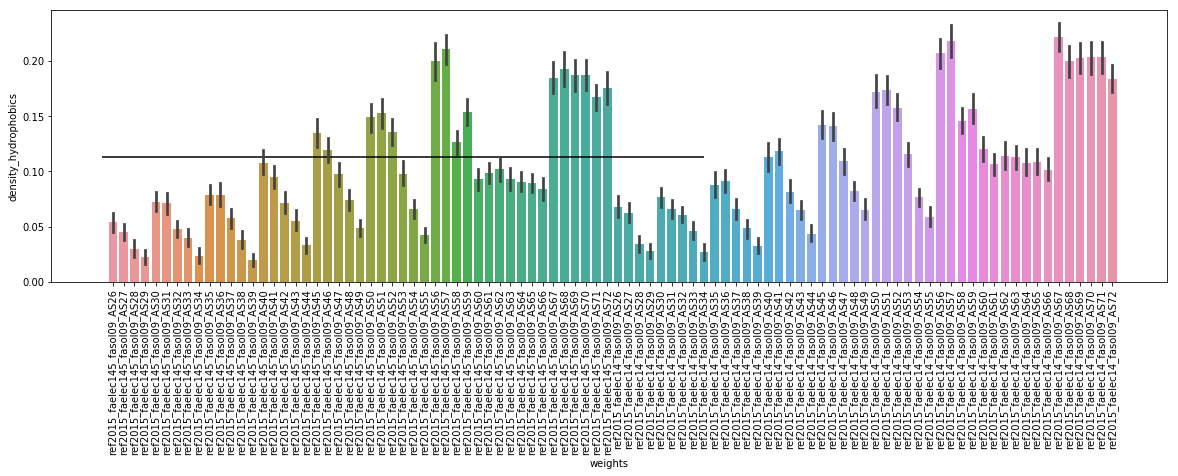

In [29]:
plt.rcParams["figure.figsize"] = [20, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_hydrophobics", data=data_t, order=["ref2015_faelec145_fasol09_AS26","ref2015_faelec145_fasol09_AS27","ref2015_faelec145_fasol09_AS28","ref2015_faelec145_fasol09_AS29","ref2015_faelec145_fasol09_AS30","ref2015_faelec145_fasol09_AS31","ref2015_faelec145_fasol09_AS32","ref2015_faelec145_fasol09_AS33","ref2015_faelec145_fasol09_AS34","ref2015_faelec145_fasol09_AS35","ref2015_faelec145_fasol09_AS36","ref2015_faelec145_fasol09_AS37","ref2015_faelec145_fasol09_AS38","ref2015_faelec145_fasol09_AS39","ref2015_faelec145_fasol09_AS40","ref2015_faelec145_fasol09_AS41","ref2015_faelec145_fasol09_AS42","ref2015_faelec145_fasol09_AS43","ref2015_faelec145_fasol09_AS44","ref2015_faelec145_fasol09_AS45","ref2015_faelec145_fasol09_AS46","ref2015_faelec145_fasol09_AS47","ref2015_faelec145_fasol09_AS48","ref2015_faelec145_fasol09_AS49","ref2015_faelec145_fasol09_AS50","ref2015_faelec145_fasol09_AS51","ref2015_faelec145_fasol09_AS52","ref2015_faelec145_fasol09_AS53","ref2015_faelec145_fasol09_AS54","ref2015_faelec145_fasol09_AS55","ref2015_faelec145_fasol09_AS56","ref2015_faelec145_fasol09_AS57","ref2015_faelec145_fasol09_AS58","ref2015_faelec145_fasol09_AS59","ref2015_faelec145_fasol09_AS60","ref2015_faelec145_fasol09_AS61","ref2015_faelec145_fasol09_AS62","ref2015_faelec145_fasol09_AS63","ref2015_faelec145_fasol09_AS64","ref2015_faelec145_fasol09_AS65","ref2015_faelec145_fasol09_AS66","ref2015_faelec145_fasol09_AS67","ref2015_faelec145_fasol09_AS68","ref2015_faelec145_fasol09_AS69","ref2015_faelec145_fasol09_AS70","ref2015_faelec145_fasol09_AS71","ref2015_faelec145_fasol09_AS72"
,"ref2015_faelec14_fasol09_AS26","ref2015_faelec14_fasol09_AS27","ref2015_faelec14_fasol09_AS28","ref2015_faelec14_fasol09_AS29","ref2015_faelec14_fasol09_AS30","ref2015_faelec14_fasol09_AS31","ref2015_faelec14_fasol09_AS32","ref2015_faelec14_fasol09_AS33","ref2015_faelec14_fasol09_AS34","ref2015_faelec14_fasol09_AS35","ref2015_faelec14_fasol09_AS36","ref2015_faelec14_fasol09_AS37","ref2015_faelec14_fasol09_AS38","ref2015_faelec14_fasol09_AS39","ref2015_faelec14_fasol09_AS40","ref2015_faelec14_fasol09_AS41","ref2015_faelec14_fasol09_AS42","ref2015_faelec14_fasol09_AS43","ref2015_faelec14_fasol09_AS44","ref2015_faelec14_fasol09_AS45","ref2015_faelec14_fasol09_AS46","ref2015_faelec14_fasol09_AS47","ref2015_faelec14_fasol09_AS48","ref2015_faelec14_fasol09_AS49","ref2015_faelec14_fasol09_AS50","ref2015_faelec14_fasol09_AS51","ref2015_faelec14_fasol09_AS52","ref2015_faelec14_fasol09_AS53","ref2015_faelec14_fasol09_AS54","ref2015_faelec14_fasol09_AS55","ref2015_faelec14_fasol09_AS56","ref2015_faelec14_fasol09_AS57","ref2015_faelec14_fasol09_AS58","ref2015_faelec14_fasol09_AS59","ref2015_faelec14_fasol09_AS60","ref2015_faelec14_fasol09_AS61","ref2015_faelec14_fasol09_AS62","ref2015_faelec14_fasol09_AS63","ref2015_faelec14_fasol09_AS64","ref2015_faelec14_fasol09_AS65","ref2015_faelec14_fasol09_AS66","ref2015_faelec14_fasol09_AS67","ref2015_faelec14_fasol09_AS68","ref2015_faelec14_fasol09_AS69","ref2015_faelec14_fasol09_AS70","ref2015_faelec14_fasol09_AS71","ref2015_faelec14_fasol09_AS72"])

plt.hlines(0.113, -1, 55)

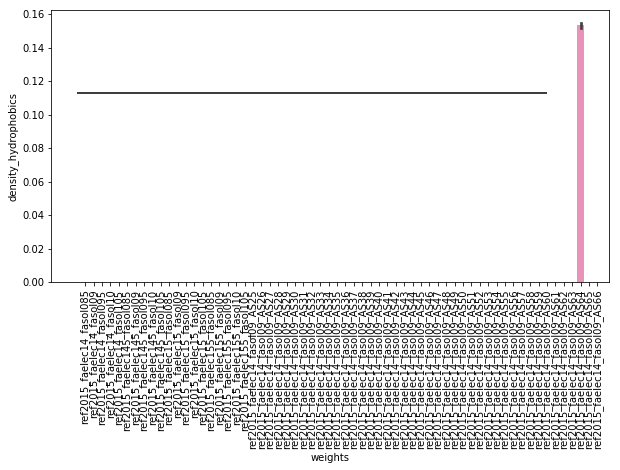

In [14]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_hydrophobics", data=data_t, order=["ref2015_faelec14_fasol085","ref2015_faelec14_fasol09","ref2015_faelec14_fasol095","ref2015_faelec14_fasol10","ref2015_faelec14_fasol105","ref2015_faelec145_fasol085","ref2015_faelec145_fasol09","ref2015_faelec145_fasol095","ref2015_faelec145_fasol10","ref2015_faelec145_fasol105","ref2015_faelec15_fasol085","ref2015_faelec15_fasol09","ref2015_faelec15_fasol095","ref2015_faelec15_fasol10","ref2015_faelec15_fasol105","ref2015_faelec155_fasol085","ref2015_faelec155_fasol09","ref2015_faelec155_fasol095","ref2015_faelec155_fasol10","ref2015_faelec155_fasol105","ref2015_faelec14_fasol09_AS25","ref2015_faelec14_fasol09_AS26","ref2015_faelec14_fasol09_AS27","ref2015_faelec14_fasol09_AS28","ref2015_faelec14_fasol09_AS29","ref2015_faelec14_fasol09_AS30","ref2015_faelec14_fasol09_AS31","ref2015_faelec14_fasol09_AS32","ref2015_faelec14_fasol09_AS33","ref2015_faelec14_fasol09_AS34","ref2015_faelec14_fasol09_AS35","ref2015_faelec14_fasol09_AS36","ref2015_faelec14_fasol09_AS37","ref2015_faelec14_fasol09_AS38","ref2015_faelec14_fasol09_AS39","ref2015_faelec14_fasol09_AS40","ref2015_faelec14_fasol09_AS41","ref2015_faelec14_fasol09_AS42","ref2015_faelec14_fasol09_AS43","ref2015_faelec14_fasol09_AS44","ref2015_faelec14_fasol09_AS45","ref2015_faelec14_fasol09_AS46","ref2015_faelec14_fasol09_AS47","ref2015_faelec14_fasol09_AS48","ref2015_faelec14_fasol09_AS49","ref2015_faelec14_fasol09_AS50","ref2015_faelec14_fasol09_AS51","ref2015_faelec14_fasol09_AS52","ref2015_faelec14_fasol09_AS53","ref2015_faelec14_fasol09_AS54","ref2015_faelec14_fasol09_AS55","ref2015_faelec14_fasol09_AS56","ref2015_faelec14_fasol09_AS57","ref2015_faelec14_fasol09_AS58","ref2015_faelec14_fasol09_AS59","ref2015_faelec14_fasol09_AS60","ref2015_faelec14_fasol09_AS61","ref2015_faelec14_fasol09_AS62","ref2015_faelec14_fasol09_AS63","ref2015_faelec14_fasol09_AS64","ref2015_faelec14_fasol09_AS65","ref2015_faelec14_fasol09_AS66"])
plt.hlines(0.113, -1, 55)

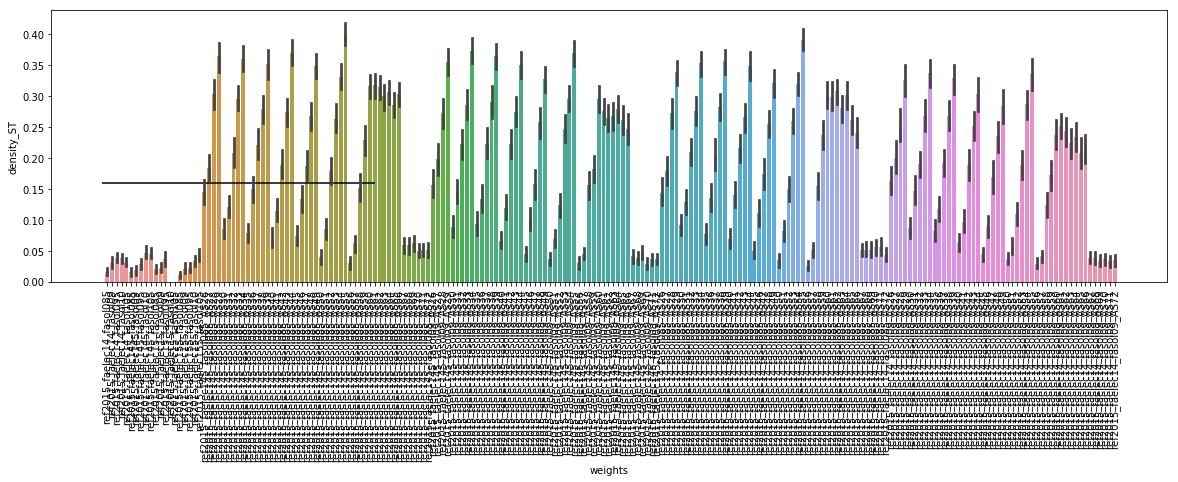

In [14]:
plt.rcParams["figure.figsize"] = [20, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_ST", data=data_t, order=["ref2015_faelec14_fasol085","ref2015_faelec14_fasol09","ref2015_faelec14_fasol095","ref2015_faelec14_fasol10","ref2015_faelec14_fasol105","ref2015_faelec145_fasol085","ref2015_faelec145_fasol09","ref2015_faelec145_fasol095","ref2015_faelec145_fasol10","ref2015_faelec145_fasol105","ref2015_faelec15_fasol085","ref2015_faelec15_fasol09","ref2015_faelec15_fasol095","ref2015_faelec15_fasol10","ref2015_faelec15_fasol105","ref2015_faelec155_fasol085","ref2015_faelec155_fasol09","ref2015_faelec155_fasol095","ref2015_faelec155_fasol10","ref2015_faelec155_fasol105"
,"ref2015_faelec145_fasol085_AS26","ref2015_faelec145_fasol085_AS27","ref2015_faelec145_fasol085_AS28","ref2015_faelec145_fasol085_AS29","ref2015_faelec145_fasol085_AS30","ref2015_faelec145_fasol085_AS31","ref2015_faelec145_fasol085_AS32","ref2015_faelec145_fasol085_AS33","ref2015_faelec145_fasol085_AS34","ref2015_faelec145_fasol085_AS35","ref2015_faelec145_fasol085_AS36","ref2015_faelec145_fasol085_AS37","ref2015_faelec145_fasol085_AS38","ref2015_faelec145_fasol085_AS39","ref2015_faelec145_fasol085_AS40","ref2015_faelec145_fasol085_AS41","ref2015_faelec145_fasol085_AS42","ref2015_faelec145_fasol085_AS43","ref2015_faelec145_fasol085_AS44","ref2015_faelec145_fasol085_AS45","ref2015_faelec145_fasol085_AS46","ref2015_faelec145_fasol085_AS47","ref2015_faelec145_fasol085_AS48","ref2015_faelec145_fasol085_AS49","ref2015_faelec145_fasol085_AS50","ref2015_faelec145_fasol085_AS51","ref2015_faelec145_fasol085_AS52","ref2015_faelec145_fasol085_AS53","ref2015_faelec145_fasol085_AS54","ref2015_faelec145_fasol085_AS55","ref2015_faelec145_fasol085_AS56","ref2015_faelec145_fasol085_AS57","ref2015_faelec145_fasol085_AS58","ref2015_faelec145_fasol085_AS59","ref2015_faelec145_fasol085_AS60","ref2015_faelec145_fasol085_AS61","ref2015_faelec145_fasol085_AS62","ref2015_faelec145_fasol085_AS63","ref2015_faelec145_fasol085_AS64","ref2015_faelec145_fasol085_AS65","ref2015_faelec145_fasol085_AS66","ref2015_faelec145_fasol085_AS67","ref2015_faelec145_fasol085_AS68","ref2015_faelec145_fasol085_AS69","ref2015_faelec145_fasol085_AS70","ref2015_faelec145_fasol085_AS71","ref2015_faelec145_fasol085_AS72"
,"ref2015_faelec145_fasol09_AS26","ref2015_faelec145_fasol09_AS27","ref2015_faelec145_fasol09_AS28","ref2015_faelec145_fasol09_AS29","ref2015_faelec145_fasol09_AS30","ref2015_faelec145_fasol09_AS31","ref2015_faelec145_fasol09_AS32","ref2015_faelec145_fasol09_AS33","ref2015_faelec145_fasol09_AS34","ref2015_faelec145_fasol09_AS35","ref2015_faelec145_fasol09_AS36","ref2015_faelec145_fasol09_AS37","ref2015_faelec145_fasol09_AS38","ref2015_faelec145_fasol09_AS39","ref2015_faelec145_fasol09_AS40","ref2015_faelec145_fasol09_AS41","ref2015_faelec145_fasol09_AS42","ref2015_faelec145_fasol09_AS43","ref2015_faelec145_fasol09_AS44","ref2015_faelec145_fasol09_AS45","ref2015_faelec145_fasol09_AS46","ref2015_faelec145_fasol09_AS47","ref2015_faelec145_fasol09_AS48","ref2015_faelec145_fasol09_AS49","ref2015_faelec145_fasol09_AS50","ref2015_faelec145_fasol09_AS51","ref2015_faelec145_fasol09_AS52","ref2015_faelec145_fasol09_AS53","ref2015_faelec145_fasol09_AS54","ref2015_faelec145_fasol09_AS55","ref2015_faelec145_fasol09_AS56","ref2015_faelec145_fasol09_AS57","ref2015_faelec145_fasol09_AS58","ref2015_faelec145_fasol09_AS59","ref2015_faelec145_fasol09_AS60","ref2015_faelec145_fasol09_AS61","ref2015_faelec145_fasol09_AS62","ref2015_faelec145_fasol09_AS63","ref2015_faelec145_fasol09_AS64","ref2015_faelec145_fasol09_AS65","ref2015_faelec145_fasol09_AS66","ref2015_faelec145_fasol09_AS67","ref2015_faelec145_fasol09_AS68","ref2015_faelec145_fasol09_AS69","ref2015_faelec145_fasol09_AS70","ref2015_faelec145_fasol09_AS71","ref2015_faelec145_fasol09_AS72"
,"ref2015_faelec14_fasol085_AS26","ref2015_faelec14_fasol085_AS27","ref2015_faelec14_fasol085_AS28","ref2015_faelec14_fasol085_AS29","ref2015_faelec14_fasol085_AS30","ref2015_faelec14_fasol085_AS31","ref2015_faelec14_fasol085_AS32","ref2015_faelec14_fasol085_AS33","ref2015_faelec14_fasol085_AS34","ref2015_faelec14_fasol085_AS35","ref2015_faelec14_fasol085_AS36","ref2015_faelec14_fasol085_AS37","ref2015_faelec14_fasol085_AS38","ref2015_faelec14_fasol085_AS39","ref2015_faelec14_fasol085_AS40","ref2015_faelec14_fasol085_AS41","ref2015_faelec14_fasol085_AS42","ref2015_faelec14_fasol085_AS43","ref2015_faelec14_fasol085_AS44","ref2015_faelec14_fasol085_AS45","ref2015_faelec14_fasol085_AS46","ref2015_faelec14_fasol085_AS47","ref2015_faelec14_fasol085_AS48","ref2015_faelec14_fasol085_AS49","ref2015_faelec14_fasol085_AS50","ref2015_faelec14_fasol085_AS51","ref2015_faelec14_fasol085_AS52","ref2015_faelec14_fasol085_AS53","ref2015_faelec14_fasol085_AS54","ref2015_faelec14_fasol085_AS55","ref2015_faelec14_fasol085_AS56","ref2015_faelec14_fasol085_AS57","ref2015_faelec14_fasol085_AS58","ref2015_faelec14_fasol085_AS59","ref2015_faelec14_fasol085_AS60","ref2015_faelec14_fasol085_AS61","ref2015_faelec14_fasol085_AS62","ref2015_faelec14_fasol085_AS63","ref2015_faelec14_fasol085_AS64","ref2015_faelec14_fasol085_AS65","ref2015_faelec14_fasol085_AS66","ref2015_faelec14_fasol085_AS67","ref2015_faelec14_fasol085_AS68","ref2015_faelec14_fasol085_AS69","ref2015_faelec14_fasol085_AS70","ref2015_faelec14_fasol085_AS71","ref2015_faelec14_fasol085_AS72"
,"ref2015_faelec14_fasol09_AS26","ref2015_faelec14_fasol09_AS27","ref2015_faelec14_fasol09_AS28","ref2015_faelec14_fasol09_AS29","ref2015_faelec14_fasol09_AS30","ref2015_faelec14_fasol09_AS31","ref2015_faelec14_fasol09_AS32","ref2015_faelec14_fasol09_AS33","ref2015_faelec14_fasol09_AS34","ref2015_faelec14_fasol09_AS35","ref2015_faelec14_fasol09_AS36","ref2015_faelec14_fasol09_AS37","ref2015_faelec14_fasol09_AS38","ref2015_faelec14_fasol09_AS39","ref2015_faelec14_fasol09_AS40","ref2015_faelec14_fasol09_AS41","ref2015_faelec14_fasol09_AS42","ref2015_faelec14_fasol09_AS43","ref2015_faelec14_fasol09_AS44","ref2015_faelec14_fasol09_AS45","ref2015_faelec14_fasol09_AS46","ref2015_faelec14_fasol09_AS47","ref2015_faelec14_fasol09_AS48","ref2015_faelec14_fasol09_AS49","ref2015_faelec14_fasol09_AS50","ref2015_faelec14_fasol09_AS51","ref2015_faelec14_fasol09_AS52","ref2015_faelec14_fasol09_AS53","ref2015_faelec14_fasol09_AS54","ref2015_faelec14_fasol09_AS55","ref2015_faelec14_fasol09_AS56","ref2015_faelec14_fasol09_AS57","ref2015_faelec14_fasol09_AS58","ref2015_faelec14_fasol09_AS59","ref2015_faelec14_fasol09_AS60","ref2015_faelec14_fasol09_AS61","ref2015_faelec14_fasol09_AS62","ref2015_faelec14_fasol09_AS63","ref2015_faelec14_fasol09_AS64","ref2015_faelec14_fasol09_AS65","ref2015_faelec14_fasol09_AS66","ref2015_faelec14_fasol09_AS67","ref2015_faelec14_fasol09_AS68","ref2015_faelec14_fasol09_AS69","ref2015_faelec14_fasol09_AS70","ref2015_faelec14_fasol09_AS71","ref2015_faelec14_fasol09_AS72"])

plt.hlines(0.159, -1, 55)


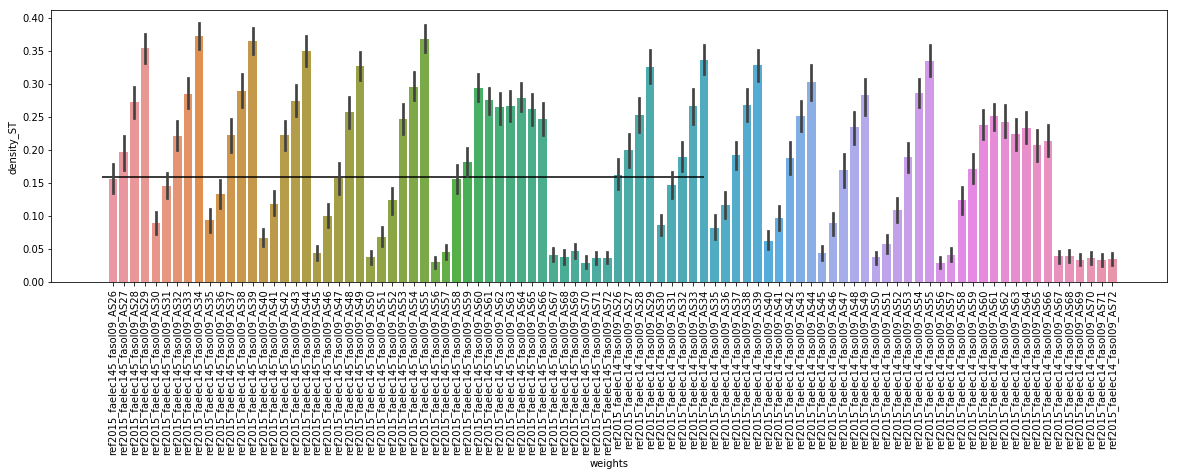

In [30]:
plt.rcParams["figure.figsize"] = [20, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_ST", data=data_t, order=["ref2015_faelec145_fasol09_AS26","ref2015_faelec145_fasol09_AS27","ref2015_faelec145_fasol09_AS28","ref2015_faelec145_fasol09_AS29","ref2015_faelec145_fasol09_AS30","ref2015_faelec145_fasol09_AS31","ref2015_faelec145_fasol09_AS32","ref2015_faelec145_fasol09_AS33","ref2015_faelec145_fasol09_AS34","ref2015_faelec145_fasol09_AS35","ref2015_faelec145_fasol09_AS36","ref2015_faelec145_fasol09_AS37","ref2015_faelec145_fasol09_AS38","ref2015_faelec145_fasol09_AS39","ref2015_faelec145_fasol09_AS40","ref2015_faelec145_fasol09_AS41","ref2015_faelec145_fasol09_AS42","ref2015_faelec145_fasol09_AS43","ref2015_faelec145_fasol09_AS44","ref2015_faelec145_fasol09_AS45","ref2015_faelec145_fasol09_AS46","ref2015_faelec145_fasol09_AS47","ref2015_faelec145_fasol09_AS48","ref2015_faelec145_fasol09_AS49","ref2015_faelec145_fasol09_AS50","ref2015_faelec145_fasol09_AS51","ref2015_faelec145_fasol09_AS52","ref2015_faelec145_fasol09_AS53","ref2015_faelec145_fasol09_AS54","ref2015_faelec145_fasol09_AS55","ref2015_faelec145_fasol09_AS56","ref2015_faelec145_fasol09_AS57","ref2015_faelec145_fasol09_AS58","ref2015_faelec145_fasol09_AS59","ref2015_faelec145_fasol09_AS60","ref2015_faelec145_fasol09_AS61","ref2015_faelec145_fasol09_AS62","ref2015_faelec145_fasol09_AS63","ref2015_faelec145_fasol09_AS64","ref2015_faelec145_fasol09_AS65","ref2015_faelec145_fasol09_AS66","ref2015_faelec145_fasol09_AS67","ref2015_faelec145_fasol09_AS68","ref2015_faelec145_fasol09_AS69","ref2015_faelec145_fasol09_AS70","ref2015_faelec145_fasol09_AS71","ref2015_faelec145_fasol09_AS72"
,"ref2015_faelec14_fasol09_AS26","ref2015_faelec14_fasol09_AS27","ref2015_faelec14_fasol09_AS28","ref2015_faelec14_fasol09_AS29","ref2015_faelec14_fasol09_AS30","ref2015_faelec14_fasol09_AS31","ref2015_faelec14_fasol09_AS32","ref2015_faelec14_fasol09_AS33","ref2015_faelec14_fasol09_AS34","ref2015_faelec14_fasol09_AS35","ref2015_faelec14_fasol09_AS36","ref2015_faelec14_fasol09_AS37","ref2015_faelec14_fasol09_AS38","ref2015_faelec14_fasol09_AS39","ref2015_faelec14_fasol09_AS40","ref2015_faelec14_fasol09_AS41","ref2015_faelec14_fasol09_AS42","ref2015_faelec14_fasol09_AS43","ref2015_faelec14_fasol09_AS44","ref2015_faelec14_fasol09_AS45","ref2015_faelec14_fasol09_AS46","ref2015_faelec14_fasol09_AS47","ref2015_faelec14_fasol09_AS48","ref2015_faelec14_fasol09_AS49","ref2015_faelec14_fasol09_AS50","ref2015_faelec14_fasol09_AS51","ref2015_faelec14_fasol09_AS52","ref2015_faelec14_fasol09_AS53","ref2015_faelec14_fasol09_AS54","ref2015_faelec14_fasol09_AS55","ref2015_faelec14_fasol09_AS56","ref2015_faelec14_fasol09_AS57","ref2015_faelec14_fasol09_AS58","ref2015_faelec14_fasol09_AS59","ref2015_faelec14_fasol09_AS60","ref2015_faelec14_fasol09_AS61","ref2015_faelec14_fasol09_AS62","ref2015_faelec14_fasol09_AS63","ref2015_faelec14_fasol09_AS64","ref2015_faelec14_fasol09_AS65","ref2015_faelec14_fasol09_AS66","ref2015_faelec14_fasol09_AS67","ref2015_faelec14_fasol09_AS68","ref2015_faelec14_fasol09_AS69","ref2015_faelec14_fasol09_AS70","ref2015_faelec14_fasol09_AS71","ref2015_faelec14_fasol09_AS72"])

plt.hlines(0.159, -1, 55)

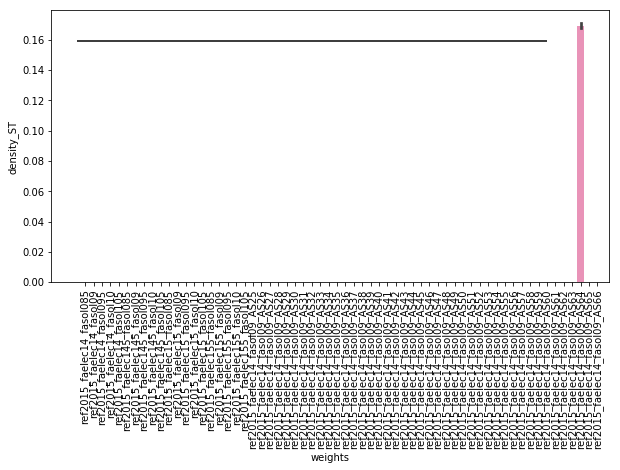

In [15]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_ST", data=data_t, order=["ref2015_faelec14_fasol085","ref2015_faelec14_fasol09","ref2015_faelec14_fasol095","ref2015_faelec14_fasol10","ref2015_faelec14_fasol105","ref2015_faelec145_fasol085","ref2015_faelec145_fasol09","ref2015_faelec145_fasol095","ref2015_faelec145_fasol10","ref2015_faelec145_fasol105","ref2015_faelec15_fasol085","ref2015_faelec15_fasol09","ref2015_faelec15_fasol095","ref2015_faelec15_fasol10","ref2015_faelec15_fasol105","ref2015_faelec155_fasol085","ref2015_faelec155_fasol09","ref2015_faelec155_fasol095","ref2015_faelec155_fasol10","ref2015_faelec155_fasol105","ref2015_faelec14_fasol09_AS25","ref2015_faelec14_fasol09_AS26","ref2015_faelec14_fasol09_AS27","ref2015_faelec14_fasol09_AS28","ref2015_faelec14_fasol09_AS29","ref2015_faelec14_fasol09_AS30","ref2015_faelec14_fasol09_AS31","ref2015_faelec14_fasol09_AS32","ref2015_faelec14_fasol09_AS33","ref2015_faelec14_fasol09_AS34","ref2015_faelec14_fasol09_AS35","ref2015_faelec14_fasol09_AS36","ref2015_faelec14_fasol09_AS37","ref2015_faelec14_fasol09_AS38","ref2015_faelec14_fasol09_AS39","ref2015_faelec14_fasol09_AS40","ref2015_faelec14_fasol09_AS41","ref2015_faelec14_fasol09_AS42","ref2015_faelec14_fasol09_AS43","ref2015_faelec14_fasol09_AS44","ref2015_faelec14_fasol09_AS45","ref2015_faelec14_fasol09_AS46","ref2015_faelec14_fasol09_AS47","ref2015_faelec14_fasol09_AS48","ref2015_faelec14_fasol09_AS49","ref2015_faelec14_fasol09_AS50","ref2015_faelec14_fasol09_AS51","ref2015_faelec14_fasol09_AS52","ref2015_faelec14_fasol09_AS53","ref2015_faelec14_fasol09_AS54","ref2015_faelec14_fasol09_AS55","ref2015_faelec14_fasol09_AS56","ref2015_faelec14_fasol09_AS57","ref2015_faelec14_fasol09_AS58","ref2015_faelec14_fasol09_AS59","ref2015_faelec14_fasol09_AS60","ref2015_faelec14_fasol09_AS61","ref2015_faelec14_fasol09_AS62","ref2015_faelec14_fasol09_AS63","ref2015_faelec14_fasol09_AS64","ref2015_faelec14_fasol09_AS65","ref2015_faelec14_fasol09_AS66"])
plt.hlines(0.159, -1, 55)


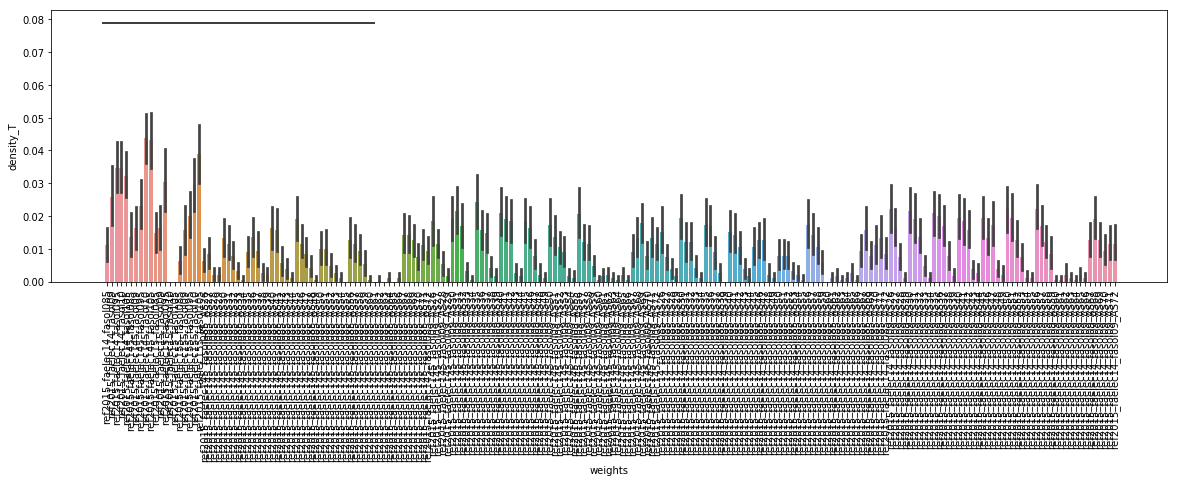

In [15]:
plt.rcParams["figure.figsize"] = [20, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_T", data=data_t, order=["ref2015_faelec14_fasol085","ref2015_faelec14_fasol09","ref2015_faelec14_fasol095","ref2015_faelec14_fasol10","ref2015_faelec14_fasol105","ref2015_faelec145_fasol085","ref2015_faelec145_fasol09","ref2015_faelec145_fasol095","ref2015_faelec145_fasol10","ref2015_faelec145_fasol105","ref2015_faelec15_fasol085","ref2015_faelec15_fasol09","ref2015_faelec15_fasol095","ref2015_faelec15_fasol10","ref2015_faelec15_fasol105","ref2015_faelec155_fasol085","ref2015_faelec155_fasol09","ref2015_faelec155_fasol095","ref2015_faelec155_fasol10","ref2015_faelec155_fasol105"
,"ref2015_faelec145_fasol085_AS26","ref2015_faelec145_fasol085_AS27","ref2015_faelec145_fasol085_AS28","ref2015_faelec145_fasol085_AS29","ref2015_faelec145_fasol085_AS30","ref2015_faelec145_fasol085_AS31","ref2015_faelec145_fasol085_AS32","ref2015_faelec145_fasol085_AS33","ref2015_faelec145_fasol085_AS34","ref2015_faelec145_fasol085_AS35","ref2015_faelec145_fasol085_AS36","ref2015_faelec145_fasol085_AS37","ref2015_faelec145_fasol085_AS38","ref2015_faelec145_fasol085_AS39","ref2015_faelec145_fasol085_AS40","ref2015_faelec145_fasol085_AS41","ref2015_faelec145_fasol085_AS42","ref2015_faelec145_fasol085_AS43","ref2015_faelec145_fasol085_AS44","ref2015_faelec145_fasol085_AS45","ref2015_faelec145_fasol085_AS46","ref2015_faelec145_fasol085_AS47","ref2015_faelec145_fasol085_AS48","ref2015_faelec145_fasol085_AS49","ref2015_faelec145_fasol085_AS50","ref2015_faelec145_fasol085_AS51","ref2015_faelec145_fasol085_AS52","ref2015_faelec145_fasol085_AS53","ref2015_faelec145_fasol085_AS54","ref2015_faelec145_fasol085_AS55","ref2015_faelec145_fasol085_AS56","ref2015_faelec145_fasol085_AS57","ref2015_faelec145_fasol085_AS58","ref2015_faelec145_fasol085_AS59","ref2015_faelec145_fasol085_AS60","ref2015_faelec145_fasol085_AS61","ref2015_faelec145_fasol085_AS62","ref2015_faelec145_fasol085_AS63","ref2015_faelec145_fasol085_AS64","ref2015_faelec145_fasol085_AS65","ref2015_faelec145_fasol085_AS66","ref2015_faelec145_fasol085_AS67","ref2015_faelec145_fasol085_AS68","ref2015_faelec145_fasol085_AS69","ref2015_faelec145_fasol085_AS70","ref2015_faelec145_fasol085_AS71","ref2015_faelec145_fasol085_AS72"
,"ref2015_faelec145_fasol09_AS26","ref2015_faelec145_fasol09_AS27","ref2015_faelec145_fasol09_AS28","ref2015_faelec145_fasol09_AS29","ref2015_faelec145_fasol09_AS30","ref2015_faelec145_fasol09_AS31","ref2015_faelec145_fasol09_AS32","ref2015_faelec145_fasol09_AS33","ref2015_faelec145_fasol09_AS34","ref2015_faelec145_fasol09_AS35","ref2015_faelec145_fasol09_AS36","ref2015_faelec145_fasol09_AS37","ref2015_faelec145_fasol09_AS38","ref2015_faelec145_fasol09_AS39","ref2015_faelec145_fasol09_AS40","ref2015_faelec145_fasol09_AS41","ref2015_faelec145_fasol09_AS42","ref2015_faelec145_fasol09_AS43","ref2015_faelec145_fasol09_AS44","ref2015_faelec145_fasol09_AS45","ref2015_faelec145_fasol09_AS46","ref2015_faelec145_fasol09_AS47","ref2015_faelec145_fasol09_AS48","ref2015_faelec145_fasol09_AS49","ref2015_faelec145_fasol09_AS50","ref2015_faelec145_fasol09_AS51","ref2015_faelec145_fasol09_AS52","ref2015_faelec145_fasol09_AS53","ref2015_faelec145_fasol09_AS54","ref2015_faelec145_fasol09_AS55","ref2015_faelec145_fasol09_AS56","ref2015_faelec145_fasol09_AS57","ref2015_faelec145_fasol09_AS58","ref2015_faelec145_fasol09_AS59","ref2015_faelec145_fasol09_AS60","ref2015_faelec145_fasol09_AS61","ref2015_faelec145_fasol09_AS62","ref2015_faelec145_fasol09_AS63","ref2015_faelec145_fasol09_AS64","ref2015_faelec145_fasol09_AS65","ref2015_faelec145_fasol09_AS66","ref2015_faelec145_fasol09_AS67","ref2015_faelec145_fasol09_AS68","ref2015_faelec145_fasol09_AS69","ref2015_faelec145_fasol09_AS70","ref2015_faelec145_fasol09_AS71","ref2015_faelec145_fasol09_AS72"
,"ref2015_faelec14_fasol085_AS26","ref2015_faelec14_fasol085_AS27","ref2015_faelec14_fasol085_AS28","ref2015_faelec14_fasol085_AS29","ref2015_faelec14_fasol085_AS30","ref2015_faelec14_fasol085_AS31","ref2015_faelec14_fasol085_AS32","ref2015_faelec14_fasol085_AS33","ref2015_faelec14_fasol085_AS34","ref2015_faelec14_fasol085_AS35","ref2015_faelec14_fasol085_AS36","ref2015_faelec14_fasol085_AS37","ref2015_faelec14_fasol085_AS38","ref2015_faelec14_fasol085_AS39","ref2015_faelec14_fasol085_AS40","ref2015_faelec14_fasol085_AS41","ref2015_faelec14_fasol085_AS42","ref2015_faelec14_fasol085_AS43","ref2015_faelec14_fasol085_AS44","ref2015_faelec14_fasol085_AS45","ref2015_faelec14_fasol085_AS46","ref2015_faelec14_fasol085_AS47","ref2015_faelec14_fasol085_AS48","ref2015_faelec14_fasol085_AS49","ref2015_faelec14_fasol085_AS50","ref2015_faelec14_fasol085_AS51","ref2015_faelec14_fasol085_AS52","ref2015_faelec14_fasol085_AS53","ref2015_faelec14_fasol085_AS54","ref2015_faelec14_fasol085_AS55","ref2015_faelec14_fasol085_AS56","ref2015_faelec14_fasol085_AS57","ref2015_faelec14_fasol085_AS58","ref2015_faelec14_fasol085_AS59","ref2015_faelec14_fasol085_AS60","ref2015_faelec14_fasol085_AS61","ref2015_faelec14_fasol085_AS62","ref2015_faelec14_fasol085_AS63","ref2015_faelec14_fasol085_AS64","ref2015_faelec14_fasol085_AS65","ref2015_faelec14_fasol085_AS66","ref2015_faelec14_fasol085_AS67","ref2015_faelec14_fasol085_AS68","ref2015_faelec14_fasol085_AS69","ref2015_faelec14_fasol085_AS70","ref2015_faelec14_fasol085_AS71","ref2015_faelec14_fasol085_AS72"
,"ref2015_faelec14_fasol09_AS26","ref2015_faelec14_fasol09_AS27","ref2015_faelec14_fasol09_AS28","ref2015_faelec14_fasol09_AS29","ref2015_faelec14_fasol09_AS30","ref2015_faelec14_fasol09_AS31","ref2015_faelec14_fasol09_AS32","ref2015_faelec14_fasol09_AS33","ref2015_faelec14_fasol09_AS34","ref2015_faelec14_fasol09_AS35","ref2015_faelec14_fasol09_AS36","ref2015_faelec14_fasol09_AS37","ref2015_faelec14_fasol09_AS38","ref2015_faelec14_fasol09_AS39","ref2015_faelec14_fasol09_AS40","ref2015_faelec14_fasol09_AS41","ref2015_faelec14_fasol09_AS42","ref2015_faelec14_fasol09_AS43","ref2015_faelec14_fasol09_AS44","ref2015_faelec14_fasol09_AS45","ref2015_faelec14_fasol09_AS46","ref2015_faelec14_fasol09_AS47","ref2015_faelec14_fasol09_AS48","ref2015_faelec14_fasol09_AS49","ref2015_faelec14_fasol09_AS50","ref2015_faelec14_fasol09_AS51","ref2015_faelec14_fasol09_AS52","ref2015_faelec14_fasol09_AS53","ref2015_faelec14_fasol09_AS54","ref2015_faelec14_fasol09_AS55","ref2015_faelec14_fasol09_AS56","ref2015_faelec14_fasol09_AS57","ref2015_faelec14_fasol09_AS58","ref2015_faelec14_fasol09_AS59","ref2015_faelec14_fasol09_AS60","ref2015_faelec14_fasol09_AS61","ref2015_faelec14_fasol09_AS62","ref2015_faelec14_fasol09_AS63","ref2015_faelec14_fasol09_AS64","ref2015_faelec14_fasol09_AS65","ref2015_faelec14_fasol09_AS66","ref2015_faelec14_fasol09_AS67","ref2015_faelec14_fasol09_AS68","ref2015_faelec14_fasol09_AS69","ref2015_faelec14_fasol09_AS70","ref2015_faelec14_fasol09_AS71","ref2015_faelec14_fasol09_AS72"])

plt.hlines(0.079, -1, 55)

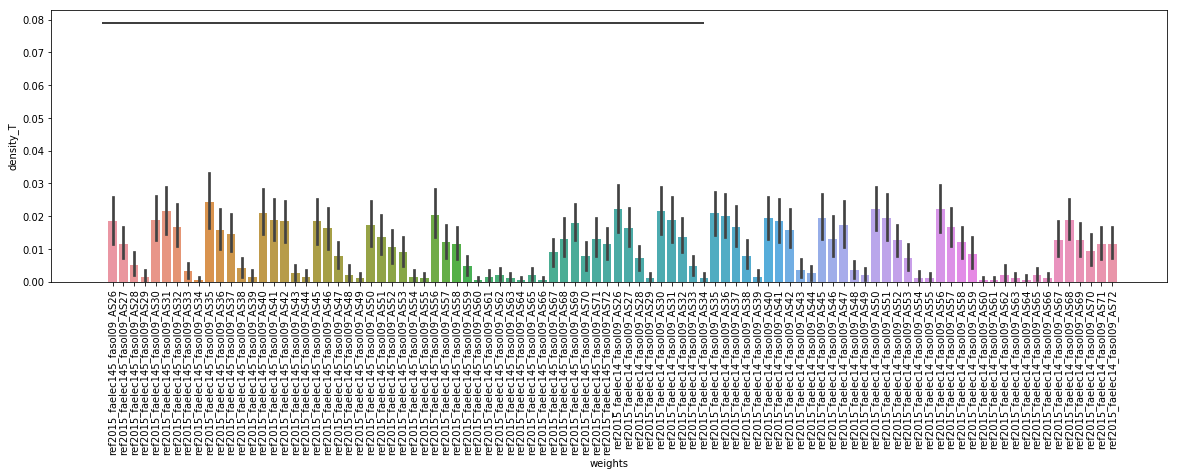

In [31]:
plt.rcParams["figure.figsize"] = [20, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_T", data=data_t, order=["ref2015_faelec145_fasol09_AS26","ref2015_faelec145_fasol09_AS27","ref2015_faelec145_fasol09_AS28","ref2015_faelec145_fasol09_AS29","ref2015_faelec145_fasol09_AS30","ref2015_faelec145_fasol09_AS31","ref2015_faelec145_fasol09_AS32","ref2015_faelec145_fasol09_AS33","ref2015_faelec145_fasol09_AS34","ref2015_faelec145_fasol09_AS35","ref2015_faelec145_fasol09_AS36","ref2015_faelec145_fasol09_AS37","ref2015_faelec145_fasol09_AS38","ref2015_faelec145_fasol09_AS39","ref2015_faelec145_fasol09_AS40","ref2015_faelec145_fasol09_AS41","ref2015_faelec145_fasol09_AS42","ref2015_faelec145_fasol09_AS43","ref2015_faelec145_fasol09_AS44","ref2015_faelec145_fasol09_AS45","ref2015_faelec145_fasol09_AS46","ref2015_faelec145_fasol09_AS47","ref2015_faelec145_fasol09_AS48","ref2015_faelec145_fasol09_AS49","ref2015_faelec145_fasol09_AS50","ref2015_faelec145_fasol09_AS51","ref2015_faelec145_fasol09_AS52","ref2015_faelec145_fasol09_AS53","ref2015_faelec145_fasol09_AS54","ref2015_faelec145_fasol09_AS55","ref2015_faelec145_fasol09_AS56","ref2015_faelec145_fasol09_AS57","ref2015_faelec145_fasol09_AS58","ref2015_faelec145_fasol09_AS59","ref2015_faelec145_fasol09_AS60","ref2015_faelec145_fasol09_AS61","ref2015_faelec145_fasol09_AS62","ref2015_faelec145_fasol09_AS63","ref2015_faelec145_fasol09_AS64","ref2015_faelec145_fasol09_AS65","ref2015_faelec145_fasol09_AS66","ref2015_faelec145_fasol09_AS67","ref2015_faelec145_fasol09_AS68","ref2015_faelec145_fasol09_AS69","ref2015_faelec145_fasol09_AS70","ref2015_faelec145_fasol09_AS71","ref2015_faelec145_fasol09_AS72"
,"ref2015_faelec14_fasol09_AS26","ref2015_faelec14_fasol09_AS27","ref2015_faelec14_fasol09_AS28","ref2015_faelec14_fasol09_AS29","ref2015_faelec14_fasol09_AS30","ref2015_faelec14_fasol09_AS31","ref2015_faelec14_fasol09_AS32","ref2015_faelec14_fasol09_AS33","ref2015_faelec14_fasol09_AS34","ref2015_faelec14_fasol09_AS35","ref2015_faelec14_fasol09_AS36","ref2015_faelec14_fasol09_AS37","ref2015_faelec14_fasol09_AS38","ref2015_faelec14_fasol09_AS39","ref2015_faelec14_fasol09_AS40","ref2015_faelec14_fasol09_AS41","ref2015_faelec14_fasol09_AS42","ref2015_faelec14_fasol09_AS43","ref2015_faelec14_fasol09_AS44","ref2015_faelec14_fasol09_AS45","ref2015_faelec14_fasol09_AS46","ref2015_faelec14_fasol09_AS47","ref2015_faelec14_fasol09_AS48","ref2015_faelec14_fasol09_AS49","ref2015_faelec14_fasol09_AS50","ref2015_faelec14_fasol09_AS51","ref2015_faelec14_fasol09_AS52","ref2015_faelec14_fasol09_AS53","ref2015_faelec14_fasol09_AS54","ref2015_faelec14_fasol09_AS55","ref2015_faelec14_fasol09_AS56","ref2015_faelec14_fasol09_AS57","ref2015_faelec14_fasol09_AS58","ref2015_faelec14_fasol09_AS59","ref2015_faelec14_fasol09_AS60","ref2015_faelec14_fasol09_AS61","ref2015_faelec14_fasol09_AS62","ref2015_faelec14_fasol09_AS63","ref2015_faelec14_fasol09_AS64","ref2015_faelec14_fasol09_AS65","ref2015_faelec14_fasol09_AS66","ref2015_faelec14_fasol09_AS67","ref2015_faelec14_fasol09_AS68","ref2015_faelec14_fasol09_AS69","ref2015_faelec14_fasol09_AS70","ref2015_faelec14_fasol09_AS71","ref2015_faelec14_fasol09_AS72"])

plt.hlines(0.079, -1, 55)

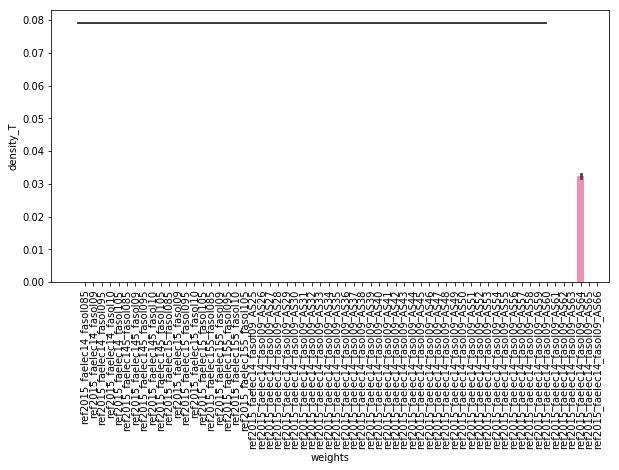

In [16]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_T", data=data_t, order=["ref2015_faelec14_fasol085","ref2015_faelec14_fasol09","ref2015_faelec14_fasol095","ref2015_faelec14_fasol10","ref2015_faelec14_fasol105","ref2015_faelec145_fasol085","ref2015_faelec145_fasol09","ref2015_faelec145_fasol095","ref2015_faelec145_fasol10","ref2015_faelec145_fasol105","ref2015_faelec15_fasol085","ref2015_faelec15_fasol09","ref2015_faelec15_fasol095","ref2015_faelec15_fasol10","ref2015_faelec15_fasol105","ref2015_faelec155_fasol085","ref2015_faelec155_fasol09","ref2015_faelec155_fasol095","ref2015_faelec155_fasol10","ref2015_faelec155_fasol105","ref2015_faelec14_fasol09_AS25","ref2015_faelec14_fasol09_AS26","ref2015_faelec14_fasol09_AS27","ref2015_faelec14_fasol09_AS28","ref2015_faelec14_fasol09_AS29","ref2015_faelec14_fasol09_AS30","ref2015_faelec14_fasol09_AS31","ref2015_faelec14_fasol09_AS32","ref2015_faelec14_fasol09_AS33","ref2015_faelec14_fasol09_AS34","ref2015_faelec14_fasol09_AS35","ref2015_faelec14_fasol09_AS36","ref2015_faelec14_fasol09_AS37","ref2015_faelec14_fasol09_AS38","ref2015_faelec14_fasol09_AS39","ref2015_faelec14_fasol09_AS40","ref2015_faelec14_fasol09_AS41","ref2015_faelec14_fasol09_AS42","ref2015_faelec14_fasol09_AS43","ref2015_faelec14_fasol09_AS44","ref2015_faelec14_fasol09_AS45","ref2015_faelec14_fasol09_AS46","ref2015_faelec14_fasol09_AS47","ref2015_faelec14_fasol09_AS48","ref2015_faelec14_fasol09_AS49","ref2015_faelec14_fasol09_AS50","ref2015_faelec14_fasol09_AS51","ref2015_faelec14_fasol09_AS52","ref2015_faelec14_fasol09_AS53","ref2015_faelec14_fasol09_AS54","ref2015_faelec14_fasol09_AS55","ref2015_faelec14_fasol09_AS56","ref2015_faelec14_fasol09_AS57","ref2015_faelec14_fasol09_AS58","ref2015_faelec14_fasol09_AS59","ref2015_faelec14_fasol09_AS60","ref2015_faelec14_fasol09_AS61","ref2015_faelec14_fasol09_AS62","ref2015_faelec14_fasol09_AS63","ref2015_faelec14_fasol09_AS64","ref2015_faelec14_fasol09_AS65","ref2015_faelec14_fasol09_AS66"])
plt.hlines(0.079, -1, 55)

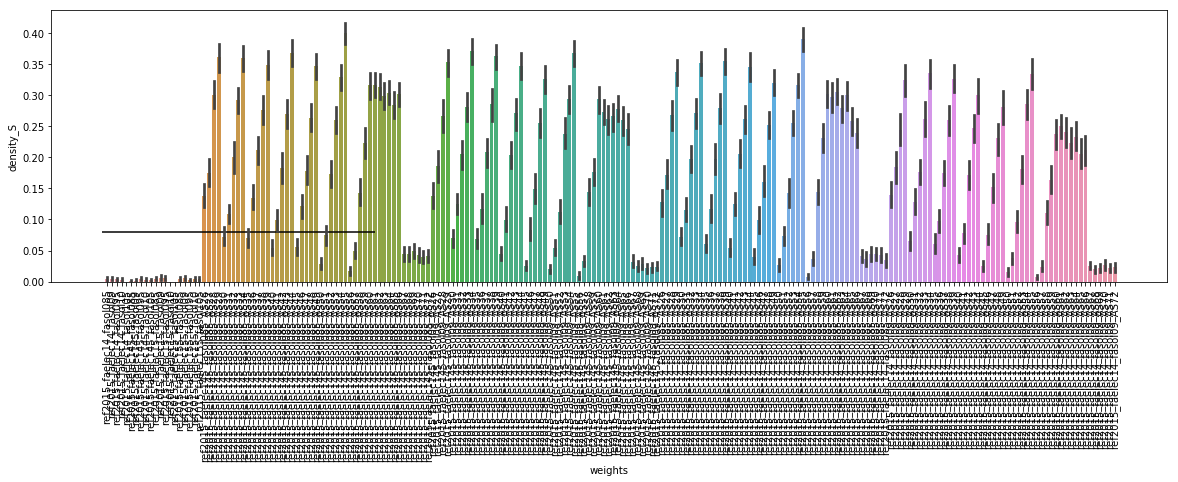

In [16]:
plt.rcParams["figure.figsize"] = [20, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_S", data=data_t, order=["ref2015_faelec14_fasol085","ref2015_faelec14_fasol09","ref2015_faelec14_fasol095","ref2015_faelec14_fasol10","ref2015_faelec14_fasol105","ref2015_faelec145_fasol085","ref2015_faelec145_fasol09","ref2015_faelec145_fasol095","ref2015_faelec145_fasol10","ref2015_faelec145_fasol105","ref2015_faelec15_fasol085","ref2015_faelec15_fasol09","ref2015_faelec15_fasol095","ref2015_faelec15_fasol10","ref2015_faelec15_fasol105","ref2015_faelec155_fasol085","ref2015_faelec155_fasol09","ref2015_faelec155_fasol095","ref2015_faelec155_fasol10","ref2015_faelec155_fasol105"
,"ref2015_faelec145_fasol085_AS26","ref2015_faelec145_fasol085_AS27","ref2015_faelec145_fasol085_AS28","ref2015_faelec145_fasol085_AS29","ref2015_faelec145_fasol085_AS30","ref2015_faelec145_fasol085_AS31","ref2015_faelec145_fasol085_AS32","ref2015_faelec145_fasol085_AS33","ref2015_faelec145_fasol085_AS34","ref2015_faelec145_fasol085_AS35","ref2015_faelec145_fasol085_AS36","ref2015_faelec145_fasol085_AS37","ref2015_faelec145_fasol085_AS38","ref2015_faelec145_fasol085_AS39","ref2015_faelec145_fasol085_AS40","ref2015_faelec145_fasol085_AS41","ref2015_faelec145_fasol085_AS42","ref2015_faelec145_fasol085_AS43","ref2015_faelec145_fasol085_AS44","ref2015_faelec145_fasol085_AS45","ref2015_faelec145_fasol085_AS46","ref2015_faelec145_fasol085_AS47","ref2015_faelec145_fasol085_AS48","ref2015_faelec145_fasol085_AS49","ref2015_faelec145_fasol085_AS50","ref2015_faelec145_fasol085_AS51","ref2015_faelec145_fasol085_AS52","ref2015_faelec145_fasol085_AS53","ref2015_faelec145_fasol085_AS54","ref2015_faelec145_fasol085_AS55","ref2015_faelec145_fasol085_AS56","ref2015_faelec145_fasol085_AS57","ref2015_faelec145_fasol085_AS58","ref2015_faelec145_fasol085_AS59","ref2015_faelec145_fasol085_AS60","ref2015_faelec145_fasol085_AS61","ref2015_faelec145_fasol085_AS62","ref2015_faelec145_fasol085_AS63","ref2015_faelec145_fasol085_AS64","ref2015_faelec145_fasol085_AS65","ref2015_faelec145_fasol085_AS66","ref2015_faelec145_fasol085_AS67","ref2015_faelec145_fasol085_AS68","ref2015_faelec145_fasol085_AS69","ref2015_faelec145_fasol085_AS70","ref2015_faelec145_fasol085_AS71","ref2015_faelec145_fasol085_AS72"
,"ref2015_faelec145_fasol09_AS26","ref2015_faelec145_fasol09_AS27","ref2015_faelec145_fasol09_AS28","ref2015_faelec145_fasol09_AS29","ref2015_faelec145_fasol09_AS30","ref2015_faelec145_fasol09_AS31","ref2015_faelec145_fasol09_AS32","ref2015_faelec145_fasol09_AS33","ref2015_faelec145_fasol09_AS34","ref2015_faelec145_fasol09_AS35","ref2015_faelec145_fasol09_AS36","ref2015_faelec145_fasol09_AS37","ref2015_faelec145_fasol09_AS38","ref2015_faelec145_fasol09_AS39","ref2015_faelec145_fasol09_AS40","ref2015_faelec145_fasol09_AS41","ref2015_faelec145_fasol09_AS42","ref2015_faelec145_fasol09_AS43","ref2015_faelec145_fasol09_AS44","ref2015_faelec145_fasol09_AS45","ref2015_faelec145_fasol09_AS46","ref2015_faelec145_fasol09_AS47","ref2015_faelec145_fasol09_AS48","ref2015_faelec145_fasol09_AS49","ref2015_faelec145_fasol09_AS50","ref2015_faelec145_fasol09_AS51","ref2015_faelec145_fasol09_AS52","ref2015_faelec145_fasol09_AS53","ref2015_faelec145_fasol09_AS54","ref2015_faelec145_fasol09_AS55","ref2015_faelec145_fasol09_AS56","ref2015_faelec145_fasol09_AS57","ref2015_faelec145_fasol09_AS58","ref2015_faelec145_fasol09_AS59","ref2015_faelec145_fasol09_AS60","ref2015_faelec145_fasol09_AS61","ref2015_faelec145_fasol09_AS62","ref2015_faelec145_fasol09_AS63","ref2015_faelec145_fasol09_AS64","ref2015_faelec145_fasol09_AS65","ref2015_faelec145_fasol09_AS66","ref2015_faelec145_fasol09_AS67","ref2015_faelec145_fasol09_AS68","ref2015_faelec145_fasol09_AS69","ref2015_faelec145_fasol09_AS70","ref2015_faelec145_fasol09_AS71","ref2015_faelec145_fasol09_AS72"
,"ref2015_faelec14_fasol085_AS26","ref2015_faelec14_fasol085_AS27","ref2015_faelec14_fasol085_AS28","ref2015_faelec14_fasol085_AS29","ref2015_faelec14_fasol085_AS30","ref2015_faelec14_fasol085_AS31","ref2015_faelec14_fasol085_AS32","ref2015_faelec14_fasol085_AS33","ref2015_faelec14_fasol085_AS34","ref2015_faelec14_fasol085_AS35","ref2015_faelec14_fasol085_AS36","ref2015_faelec14_fasol085_AS37","ref2015_faelec14_fasol085_AS38","ref2015_faelec14_fasol085_AS39","ref2015_faelec14_fasol085_AS40","ref2015_faelec14_fasol085_AS41","ref2015_faelec14_fasol085_AS42","ref2015_faelec14_fasol085_AS43","ref2015_faelec14_fasol085_AS44","ref2015_faelec14_fasol085_AS45","ref2015_faelec14_fasol085_AS46","ref2015_faelec14_fasol085_AS47","ref2015_faelec14_fasol085_AS48","ref2015_faelec14_fasol085_AS49","ref2015_faelec14_fasol085_AS50","ref2015_faelec14_fasol085_AS51","ref2015_faelec14_fasol085_AS52","ref2015_faelec14_fasol085_AS53","ref2015_faelec14_fasol085_AS54","ref2015_faelec14_fasol085_AS55","ref2015_faelec14_fasol085_AS56","ref2015_faelec14_fasol085_AS57","ref2015_faelec14_fasol085_AS58","ref2015_faelec14_fasol085_AS59","ref2015_faelec14_fasol085_AS60","ref2015_faelec14_fasol085_AS61","ref2015_faelec14_fasol085_AS62","ref2015_faelec14_fasol085_AS63","ref2015_faelec14_fasol085_AS64","ref2015_faelec14_fasol085_AS65","ref2015_faelec14_fasol085_AS66","ref2015_faelec14_fasol085_AS67","ref2015_faelec14_fasol085_AS68","ref2015_faelec14_fasol085_AS69","ref2015_faelec14_fasol085_AS70","ref2015_faelec14_fasol085_AS71","ref2015_faelec14_fasol085_AS72"
,"ref2015_faelec14_fasol09_AS26","ref2015_faelec14_fasol09_AS27","ref2015_faelec14_fasol09_AS28","ref2015_faelec14_fasol09_AS29","ref2015_faelec14_fasol09_AS30","ref2015_faelec14_fasol09_AS31","ref2015_faelec14_fasol09_AS32","ref2015_faelec14_fasol09_AS33","ref2015_faelec14_fasol09_AS34","ref2015_faelec14_fasol09_AS35","ref2015_faelec14_fasol09_AS36","ref2015_faelec14_fasol09_AS37","ref2015_faelec14_fasol09_AS38","ref2015_faelec14_fasol09_AS39","ref2015_faelec14_fasol09_AS40","ref2015_faelec14_fasol09_AS41","ref2015_faelec14_fasol09_AS42","ref2015_faelec14_fasol09_AS43","ref2015_faelec14_fasol09_AS44","ref2015_faelec14_fasol09_AS45","ref2015_faelec14_fasol09_AS46","ref2015_faelec14_fasol09_AS47","ref2015_faelec14_fasol09_AS48","ref2015_faelec14_fasol09_AS49","ref2015_faelec14_fasol09_AS50","ref2015_faelec14_fasol09_AS51","ref2015_faelec14_fasol09_AS52","ref2015_faelec14_fasol09_AS53","ref2015_faelec14_fasol09_AS54","ref2015_faelec14_fasol09_AS55","ref2015_faelec14_fasol09_AS56","ref2015_faelec14_fasol09_AS57","ref2015_faelec14_fasol09_AS58","ref2015_faelec14_fasol09_AS59","ref2015_faelec14_fasol09_AS60","ref2015_faelec14_fasol09_AS61","ref2015_faelec14_fasol09_AS62","ref2015_faelec14_fasol09_AS63","ref2015_faelec14_fasol09_AS64","ref2015_faelec14_fasol09_AS65","ref2015_faelec14_fasol09_AS66","ref2015_faelec14_fasol09_AS67","ref2015_faelec14_fasol09_AS68","ref2015_faelec14_fasol09_AS69","ref2015_faelec14_fasol09_AS70","ref2015_faelec14_fasol09_AS71","ref2015_faelec14_fasol09_AS72"])

plt.hlines(0.08, -1, 55)

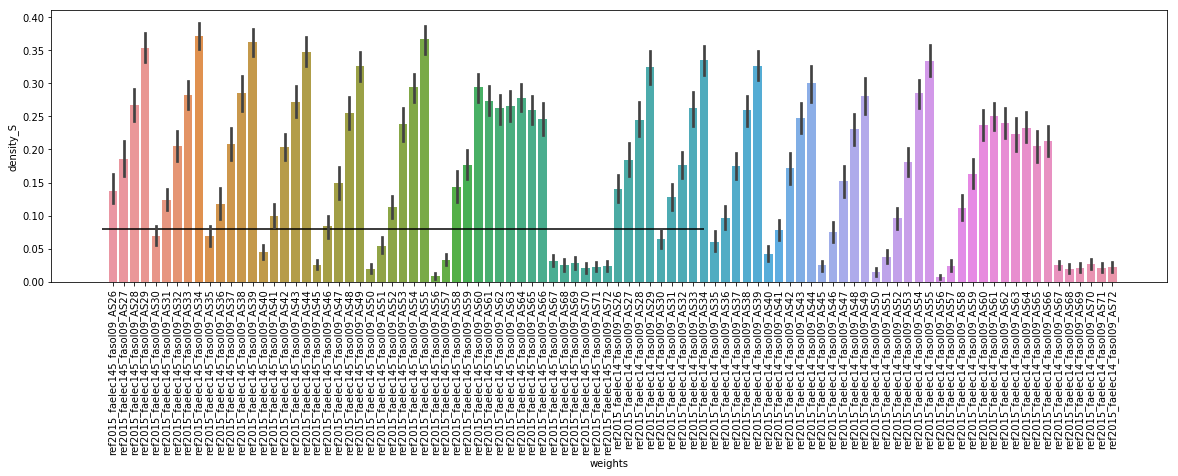

In [32]:
plt.rcParams["figure.figsize"] = [20, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_S", data=data_t, order=["ref2015_faelec145_fasol09_AS26","ref2015_faelec145_fasol09_AS27","ref2015_faelec145_fasol09_AS28","ref2015_faelec145_fasol09_AS29","ref2015_faelec145_fasol09_AS30","ref2015_faelec145_fasol09_AS31","ref2015_faelec145_fasol09_AS32","ref2015_faelec145_fasol09_AS33","ref2015_faelec145_fasol09_AS34","ref2015_faelec145_fasol09_AS35","ref2015_faelec145_fasol09_AS36","ref2015_faelec145_fasol09_AS37","ref2015_faelec145_fasol09_AS38","ref2015_faelec145_fasol09_AS39","ref2015_faelec145_fasol09_AS40","ref2015_faelec145_fasol09_AS41","ref2015_faelec145_fasol09_AS42","ref2015_faelec145_fasol09_AS43","ref2015_faelec145_fasol09_AS44","ref2015_faelec145_fasol09_AS45","ref2015_faelec145_fasol09_AS46","ref2015_faelec145_fasol09_AS47","ref2015_faelec145_fasol09_AS48","ref2015_faelec145_fasol09_AS49","ref2015_faelec145_fasol09_AS50","ref2015_faelec145_fasol09_AS51","ref2015_faelec145_fasol09_AS52","ref2015_faelec145_fasol09_AS53","ref2015_faelec145_fasol09_AS54","ref2015_faelec145_fasol09_AS55","ref2015_faelec145_fasol09_AS56","ref2015_faelec145_fasol09_AS57","ref2015_faelec145_fasol09_AS58","ref2015_faelec145_fasol09_AS59","ref2015_faelec145_fasol09_AS60","ref2015_faelec145_fasol09_AS61","ref2015_faelec145_fasol09_AS62","ref2015_faelec145_fasol09_AS63","ref2015_faelec145_fasol09_AS64","ref2015_faelec145_fasol09_AS65","ref2015_faelec145_fasol09_AS66","ref2015_faelec145_fasol09_AS67","ref2015_faelec145_fasol09_AS68","ref2015_faelec145_fasol09_AS69","ref2015_faelec145_fasol09_AS70","ref2015_faelec145_fasol09_AS71","ref2015_faelec145_fasol09_AS72"
,"ref2015_faelec14_fasol09_AS26","ref2015_faelec14_fasol09_AS27","ref2015_faelec14_fasol09_AS28","ref2015_faelec14_fasol09_AS29","ref2015_faelec14_fasol09_AS30","ref2015_faelec14_fasol09_AS31","ref2015_faelec14_fasol09_AS32","ref2015_faelec14_fasol09_AS33","ref2015_faelec14_fasol09_AS34","ref2015_faelec14_fasol09_AS35","ref2015_faelec14_fasol09_AS36","ref2015_faelec14_fasol09_AS37","ref2015_faelec14_fasol09_AS38","ref2015_faelec14_fasol09_AS39","ref2015_faelec14_fasol09_AS40","ref2015_faelec14_fasol09_AS41","ref2015_faelec14_fasol09_AS42","ref2015_faelec14_fasol09_AS43","ref2015_faelec14_fasol09_AS44","ref2015_faelec14_fasol09_AS45","ref2015_faelec14_fasol09_AS46","ref2015_faelec14_fasol09_AS47","ref2015_faelec14_fasol09_AS48","ref2015_faelec14_fasol09_AS49","ref2015_faelec14_fasol09_AS50","ref2015_faelec14_fasol09_AS51","ref2015_faelec14_fasol09_AS52","ref2015_faelec14_fasol09_AS53","ref2015_faelec14_fasol09_AS54","ref2015_faelec14_fasol09_AS55","ref2015_faelec14_fasol09_AS56","ref2015_faelec14_fasol09_AS57","ref2015_faelec14_fasol09_AS58","ref2015_faelec14_fasol09_AS59","ref2015_faelec14_fasol09_AS60","ref2015_faelec14_fasol09_AS61","ref2015_faelec14_fasol09_AS62","ref2015_faelec14_fasol09_AS63","ref2015_faelec14_fasol09_AS64","ref2015_faelec14_fasol09_AS65","ref2015_faelec14_fasol09_AS66","ref2015_faelec14_fasol09_AS67","ref2015_faelec14_fasol09_AS68","ref2015_faelec14_fasol09_AS69","ref2015_faelec14_fasol09_AS70","ref2015_faelec14_fasol09_AS71","ref2015_faelec14_fasol09_AS72"])

plt.hlines(0.08, -1, 55)

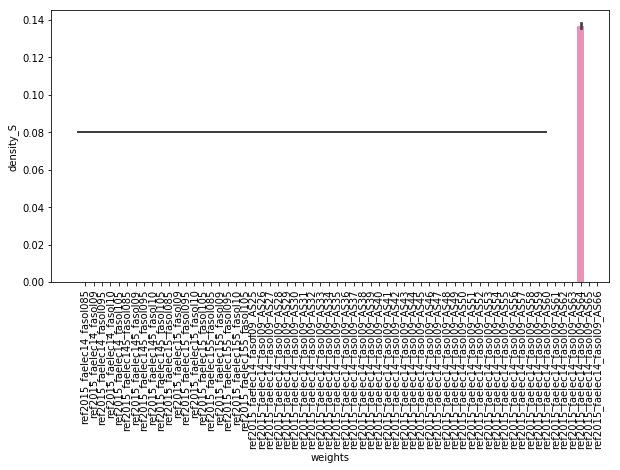

In [17]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_S", data=data_t, order=["ref2015_faelec14_fasol085","ref2015_faelec14_fasol09","ref2015_faelec14_fasol095","ref2015_faelec14_fasol10","ref2015_faelec14_fasol105","ref2015_faelec145_fasol085","ref2015_faelec145_fasol09","ref2015_faelec145_fasol095","ref2015_faelec145_fasol10","ref2015_faelec145_fasol105","ref2015_faelec15_fasol085","ref2015_faelec15_fasol09","ref2015_faelec15_fasol095","ref2015_faelec15_fasol10","ref2015_faelec15_fasol105","ref2015_faelec155_fasol085","ref2015_faelec155_fasol09","ref2015_faelec155_fasol095","ref2015_faelec155_fasol10","ref2015_faelec155_fasol105","ref2015_faelec14_fasol09_AS25","ref2015_faelec14_fasol09_AS26","ref2015_faelec14_fasol09_AS27","ref2015_faelec14_fasol09_AS28","ref2015_faelec14_fasol09_AS29","ref2015_faelec14_fasol09_AS30","ref2015_faelec14_fasol09_AS31","ref2015_faelec14_fasol09_AS32","ref2015_faelec14_fasol09_AS33","ref2015_faelec14_fasol09_AS34","ref2015_faelec14_fasol09_AS35","ref2015_faelec14_fasol09_AS36","ref2015_faelec14_fasol09_AS37","ref2015_faelec14_fasol09_AS38","ref2015_faelec14_fasol09_AS39","ref2015_faelec14_fasol09_AS40","ref2015_faelec14_fasol09_AS41","ref2015_faelec14_fasol09_AS42","ref2015_faelec14_fasol09_AS43","ref2015_faelec14_fasol09_AS44","ref2015_faelec14_fasol09_AS45","ref2015_faelec14_fasol09_AS46","ref2015_faelec14_fasol09_AS47","ref2015_faelec14_fasol09_AS48","ref2015_faelec14_fasol09_AS49","ref2015_faelec14_fasol09_AS50","ref2015_faelec14_fasol09_AS51","ref2015_faelec14_fasol09_AS52","ref2015_faelec14_fasol09_AS53","ref2015_faelec14_fasol09_AS54","ref2015_faelec14_fasol09_AS55","ref2015_faelec14_fasol09_AS56","ref2015_faelec14_fasol09_AS57","ref2015_faelec14_fasol09_AS58","ref2015_faelec14_fasol09_AS59","ref2015_faelec14_fasol09_AS60","ref2015_faelec14_fasol09_AS61","ref2015_faelec14_fasol09_AS62","ref2015_faelec14_fasol09_AS63","ref2015_faelec14_fasol09_AS64","ref2015_faelec14_fasol09_AS65","ref2015_faelec14_fasol09_AS66"])
plt.hlines(0.08, -1, 55)

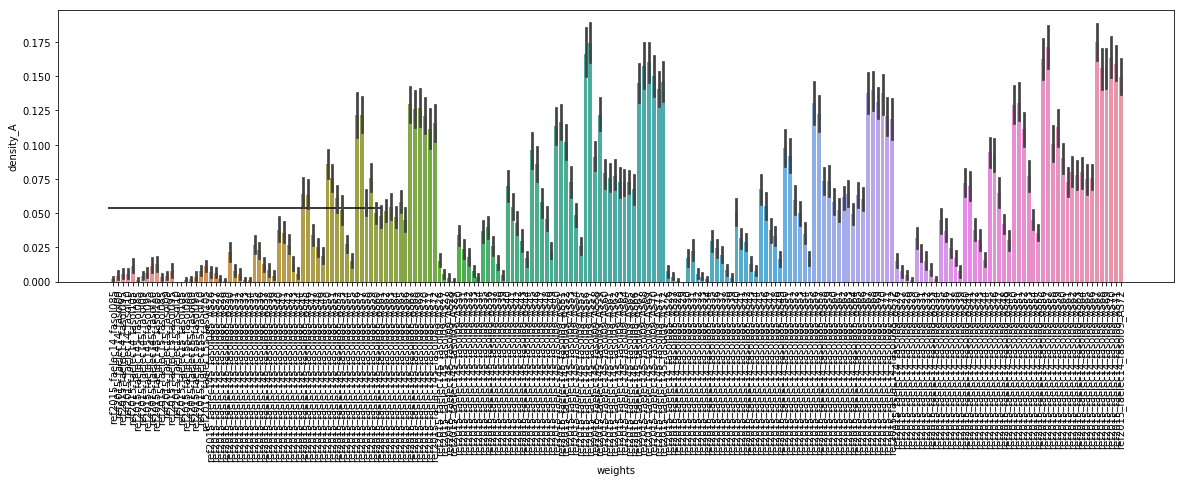

In [17]:
plt.rcParams["figure.figsize"] = [20, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_A", data=data_t, order=["ref2015_faelec14_fasol085","ref2015_faelec14_fasol09","ref2015_faelec14_fasol095","ref2015_faelec14_fasol10","ref2015_faelec14_fasol105","ref2015_faelec145_fasol085","ref2015_faelec145_fasol09","ref2015_faelec145_fasol095","ref2015_faelec145_fasol10","ref2015_faelec145_fasol105","ref2015_faelec15_fasol085","ref2015_faelec15_fasol09","ref2015_faelec15_fasol095","ref2015_faelec15_fasol10","ref2015_faelec15_fasol105","ref2015_faelec155_fasol085","ref2015_faelec155_fasol09","ref2015_faelec155_fasol095","ref2015_faelec155_fasol10","ref2015_faelec155_fasol105"
,"ref2015_faelec145_fasol085_AS26","ref2015_faelec145_fasol085_AS27","ref2015_faelec145_fasol085_AS28","ref2015_faelec145_fasol085_AS29","ref2015_faelec145_fasol085_AS30","ref2015_faelec145_fasol085_AS31","ref2015_faelec145_fasol085_AS32","ref2015_faelec145_fasol085_AS33","ref2015_faelec145_fasol085_AS34","ref2015_faelec145_fasol085_AS35","ref2015_faelec145_fasol085_AS36","ref2015_faelec145_fasol085_AS37","ref2015_faelec145_fasol085_AS38","ref2015_faelec145_fasol085_AS39","ref2015_faelec145_fasol085_AS40","ref2015_faelec145_fasol085_AS41","ref2015_faelec145_fasol085_AS42","ref2015_faelec145_fasol085_AS43","ref2015_faelec145_fasol085_AS44","ref2015_faelec145_fasol085_AS45","ref2015_faelec145_fasol085_AS46","ref2015_faelec145_fasol085_AS47","ref2015_faelec145_fasol085_AS48","ref2015_faelec145_fasol085_AS49","ref2015_faelec145_fasol085_AS50","ref2015_faelec145_fasol085_AS51","ref2015_faelec145_fasol085_AS52","ref2015_faelec145_fasol085_AS53","ref2015_faelec145_fasol085_AS54","ref2015_faelec145_fasol085_AS55","ref2015_faelec145_fasol085_AS56","ref2015_faelec145_fasol085_AS57","ref2015_faelec145_fasol085_AS58","ref2015_faelec145_fasol085_AS59","ref2015_faelec145_fasol085_AS60","ref2015_faelec145_fasol085_AS61","ref2015_faelec145_fasol085_AS62","ref2015_faelec145_fasol085_AS63","ref2015_faelec145_fasol085_AS64","ref2015_faelec145_fasol085_AS65","ref2015_faelec145_fasol085_AS66","ref2015_faelec145_fasol085_AS67","ref2015_faelec145_fasol085_AS68","ref2015_faelec145_fasol085_AS69","ref2015_faelec145_fasol085_AS70","ref2015_faelec145_fasol085_AS71","ref2015_faelec145_fasol085_AS72"
,"ref2015_faelec145_fasol09_AS26","ref2015_faelec145_fasol09_AS27","ref2015_faelec145_fasol09_AS28","ref2015_faelec145_fasol09_AS29","ref2015_faelec145_fasol09_AS30","ref2015_faelec145_fasol09_AS31","ref2015_faelec145_fasol09_AS32","ref2015_faelec145_fasol09_AS33","ref2015_faelec145_fasol09_AS34","ref2015_faelec145_fasol09_AS35","ref2015_faelec145_fasol09_AS36","ref2015_faelec145_fasol09_AS37","ref2015_faelec145_fasol09_AS38","ref2015_faelec145_fasol09_AS39","ref2015_faelec145_fasol09_AS40","ref2015_faelec145_fasol09_AS41","ref2015_faelec145_fasol09_AS42","ref2015_faelec145_fasol09_AS43","ref2015_faelec145_fasol09_AS44","ref2015_faelec145_fasol09_AS45","ref2015_faelec145_fasol09_AS46","ref2015_faelec145_fasol09_AS47","ref2015_faelec145_fasol09_AS48","ref2015_faelec145_fasol09_AS49","ref2015_faelec145_fasol09_AS50","ref2015_faelec145_fasol09_AS51","ref2015_faelec145_fasol09_AS52","ref2015_faelec145_fasol09_AS53","ref2015_faelec145_fasol09_AS54","ref2015_faelec145_fasol09_AS55","ref2015_faelec145_fasol09_AS56","ref2015_faelec145_fasol09_AS57","ref2015_faelec145_fasol09_AS58","ref2015_faelec145_fasol09_AS59","ref2015_faelec145_fasol09_AS60","ref2015_faelec145_fasol09_AS61","ref2015_faelec145_fasol09_AS62","ref2015_faelec145_fasol09_AS63","ref2015_faelec145_fasol09_AS64","ref2015_faelec145_fasol09_AS65","ref2015_faelec145_fasol09_AS66","ref2015_faelec145_fasol09_AS67","ref2015_faelec145_fasol09_AS68","ref2015_faelec145_fasol09_AS69","ref2015_faelec145_fasol09_AS70","ref2015_faelec145_fasol09_AS71","ref2015_faelec145_fasol09_AS72"
,"ref2015_faelec14_fasol085_AS26","ref2015_faelec14_fasol085_AS27","ref2015_faelec14_fasol085_AS28","ref2015_faelec14_fasol085_AS29","ref2015_faelec14_fasol085_AS30","ref2015_faelec14_fasol085_AS31","ref2015_faelec14_fasol085_AS32","ref2015_faelec14_fasol085_AS33","ref2015_faelec14_fasol085_AS34","ref2015_faelec14_fasol085_AS35","ref2015_faelec14_fasol085_AS36","ref2015_faelec14_fasol085_AS37","ref2015_faelec14_fasol085_AS38","ref2015_faelec14_fasol085_AS39","ref2015_faelec14_fasol085_AS40","ref2015_faelec14_fasol085_AS41","ref2015_faelec14_fasol085_AS42","ref2015_faelec14_fasol085_AS43","ref2015_faelec14_fasol085_AS44","ref2015_faelec14_fasol085_AS45","ref2015_faelec14_fasol085_AS46","ref2015_faelec14_fasol085_AS47","ref2015_faelec14_fasol085_AS48","ref2015_faelec14_fasol085_AS49","ref2015_faelec14_fasol085_AS50","ref2015_faelec14_fasol085_AS51","ref2015_faelec14_fasol085_AS52","ref2015_faelec14_fasol085_AS53","ref2015_faelec14_fasol085_AS54","ref2015_faelec14_fasol085_AS55","ref2015_faelec14_fasol085_AS56","ref2015_faelec14_fasol085_AS57","ref2015_faelec14_fasol085_AS58","ref2015_faelec14_fasol085_AS59","ref2015_faelec14_fasol085_AS60","ref2015_faelec14_fasol085_AS61","ref2015_faelec14_fasol085_AS62","ref2015_faelec14_fasol085_AS63","ref2015_faelec14_fasol085_AS64","ref2015_faelec14_fasol085_AS65","ref2015_faelec14_fasol085_AS66","ref2015_faelec14_fasol085_AS67","ref2015_faelec14_fasol085_AS68","ref2015_faelec14_fasol085_AS69","ref2015_faelec14_fasol085_AS70","ref2015_faelec14_fasol085_AS71","ref2015_faelec14_fasol085_AS72"
,"ref2015_faelec14_fasol09_AS26","ref2015_faelec14_fasol09_AS27","ref2015_faelec14_fasol09_AS28","ref2015_faelec14_fasol09_AS29","ref2015_faelec14_fasol09_AS30","ref2015_faelec14_fasol09_AS31","ref2015_faelec14_fasol09_AS32","ref2015_faelec14_fasol09_AS33","ref2015_faelec14_fasol09_AS34","ref2015_faelec14_fasol09_AS35","ref2015_faelec14_fasol09_AS36","ref2015_faelec14_fasol09_AS37","ref2015_faelec14_fasol09_AS38","ref2015_faelec14_fasol09_AS39","ref2015_faelec14_fasol09_AS40","ref2015_faelec14_fasol09_AS41","ref2015_faelec14_fasol09_AS42","ref2015_faelec14_fasol09_AS43","ref2015_faelec14_fasol09_AS44","ref2015_faelec14_fasol09_AS45","ref2015_faelec14_fasol09_AS46","ref2015_faelec14_fasol09_AS47","ref2015_faelec14_fasol09_AS48","ref2015_faelec14_fasol09_AS49","ref2015_faelec14_fasol09_AS50","ref2015_faelec14_fasol09_AS51","ref2015_faelec14_fasol09_AS52","ref2015_faelec14_fasol09_AS53","ref2015_faelec14_fasol09_AS54","ref2015_faelec14_fasol09_AS55","ref2015_faelec14_fasol09_AS56","ref2015_faelec14_fasol09_AS57","ref2015_faelec14_fasol09_AS58","ref2015_faelec14_fasol09_AS59","ref2015_faelec14_fasol09_AS60","ref2015_faelec14_fasol09_AS61","ref2015_faelec14_fasol09_AS62","ref2015_faelec14_fasol09_AS63","ref2015_faelec14_fasol09_AS64","ref2015_faelec14_fasol09_AS65","ref2015_faelec14_fasol09_AS66","ref2015_faelec14_fasol09_AS67","ref2015_faelec14_fasol09_AS68","ref2015_faelec14_fasol09_AS69","ref2015_faelec14_fasol09_AS70","ref2015_faelec14_fasol09_AS71","ref2015_faelec14_fasol09_AS72"])

plt.hlines(0.054, -1, 55)

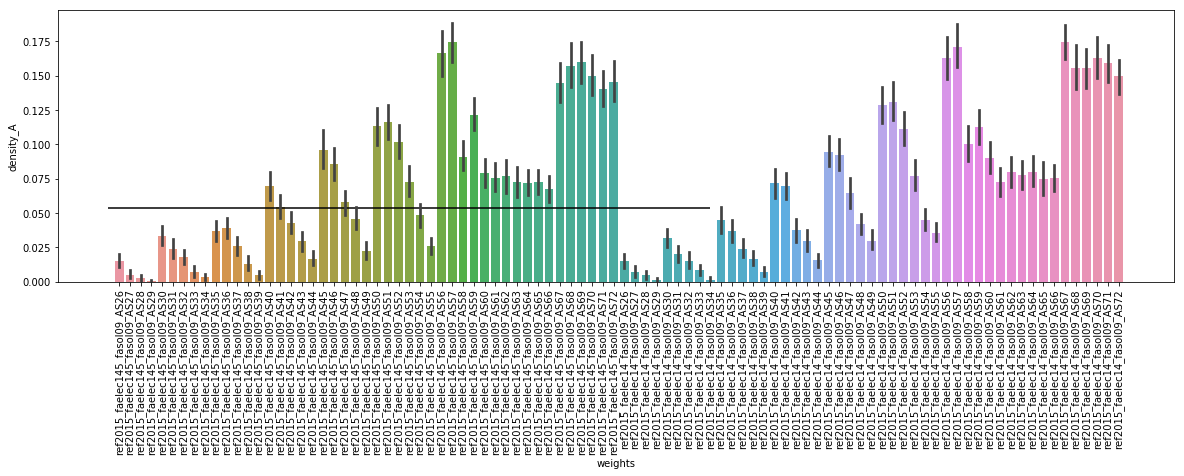

In [33]:
plt.rcParams["figure.figsize"] = [20, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_A", data=data_t, order=["ref2015_faelec145_fasol09_AS26","ref2015_faelec145_fasol09_AS27","ref2015_faelec145_fasol09_AS28","ref2015_faelec145_fasol09_AS29","ref2015_faelec145_fasol09_AS30","ref2015_faelec145_fasol09_AS31","ref2015_faelec145_fasol09_AS32","ref2015_faelec145_fasol09_AS33","ref2015_faelec145_fasol09_AS34","ref2015_faelec145_fasol09_AS35","ref2015_faelec145_fasol09_AS36","ref2015_faelec145_fasol09_AS37","ref2015_faelec145_fasol09_AS38","ref2015_faelec145_fasol09_AS39","ref2015_faelec145_fasol09_AS40","ref2015_faelec145_fasol09_AS41","ref2015_faelec145_fasol09_AS42","ref2015_faelec145_fasol09_AS43","ref2015_faelec145_fasol09_AS44","ref2015_faelec145_fasol09_AS45","ref2015_faelec145_fasol09_AS46","ref2015_faelec145_fasol09_AS47","ref2015_faelec145_fasol09_AS48","ref2015_faelec145_fasol09_AS49","ref2015_faelec145_fasol09_AS50","ref2015_faelec145_fasol09_AS51","ref2015_faelec145_fasol09_AS52","ref2015_faelec145_fasol09_AS53","ref2015_faelec145_fasol09_AS54","ref2015_faelec145_fasol09_AS55","ref2015_faelec145_fasol09_AS56","ref2015_faelec145_fasol09_AS57","ref2015_faelec145_fasol09_AS58","ref2015_faelec145_fasol09_AS59","ref2015_faelec145_fasol09_AS60","ref2015_faelec145_fasol09_AS61","ref2015_faelec145_fasol09_AS62","ref2015_faelec145_fasol09_AS63","ref2015_faelec145_fasol09_AS64","ref2015_faelec145_fasol09_AS65","ref2015_faelec145_fasol09_AS66","ref2015_faelec145_fasol09_AS67","ref2015_faelec145_fasol09_AS68","ref2015_faelec145_fasol09_AS69","ref2015_faelec145_fasol09_AS70","ref2015_faelec145_fasol09_AS71","ref2015_faelec145_fasol09_AS72"
,"ref2015_faelec14_fasol09_AS26","ref2015_faelec14_fasol09_AS27","ref2015_faelec14_fasol09_AS28","ref2015_faelec14_fasol09_AS29","ref2015_faelec14_fasol09_AS30","ref2015_faelec14_fasol09_AS31","ref2015_faelec14_fasol09_AS32","ref2015_faelec14_fasol09_AS33","ref2015_faelec14_fasol09_AS34","ref2015_faelec14_fasol09_AS35","ref2015_faelec14_fasol09_AS36","ref2015_faelec14_fasol09_AS37","ref2015_faelec14_fasol09_AS38","ref2015_faelec14_fasol09_AS39","ref2015_faelec14_fasol09_AS40","ref2015_faelec14_fasol09_AS41","ref2015_faelec14_fasol09_AS42","ref2015_faelec14_fasol09_AS43","ref2015_faelec14_fasol09_AS44","ref2015_faelec14_fasol09_AS45","ref2015_faelec14_fasol09_AS46","ref2015_faelec14_fasol09_AS47","ref2015_faelec14_fasol09_AS48","ref2015_faelec14_fasol09_AS49","ref2015_faelec14_fasol09_AS50","ref2015_faelec14_fasol09_AS51","ref2015_faelec14_fasol09_AS52","ref2015_faelec14_fasol09_AS53","ref2015_faelec14_fasol09_AS54","ref2015_faelec14_fasol09_AS55","ref2015_faelec14_fasol09_AS56","ref2015_faelec14_fasol09_AS57","ref2015_faelec14_fasol09_AS58","ref2015_faelec14_fasol09_AS59","ref2015_faelec14_fasol09_AS60","ref2015_faelec14_fasol09_AS61","ref2015_faelec14_fasol09_AS62","ref2015_faelec14_fasol09_AS63","ref2015_faelec14_fasol09_AS64","ref2015_faelec14_fasol09_AS65","ref2015_faelec14_fasol09_AS66","ref2015_faelec14_fasol09_AS67","ref2015_faelec14_fasol09_AS68","ref2015_faelec14_fasol09_AS69","ref2015_faelec14_fasol09_AS70","ref2015_faelec14_fasol09_AS71","ref2015_faelec14_fasol09_AS72"])

plt.hlines(0.054, -1, 55)

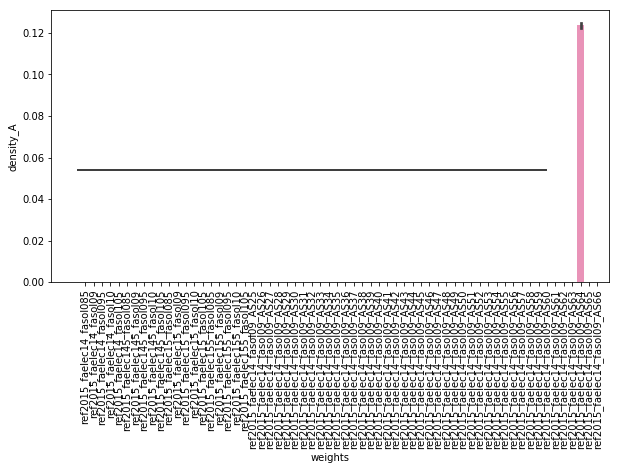

In [18]:

plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_A", data=data_t, order=["ref2015_faelec14_fasol085","ref2015_faelec14_fasol09","ref2015_faelec14_fasol095","ref2015_faelec14_fasol10","ref2015_faelec14_fasol105","ref2015_faelec145_fasol085","ref2015_faelec145_fasol09","ref2015_faelec145_fasol095","ref2015_faelec145_fasol10","ref2015_faelec145_fasol105","ref2015_faelec15_fasol085","ref2015_faelec15_fasol09","ref2015_faelec15_fasol095","ref2015_faelec15_fasol10","ref2015_faelec15_fasol105","ref2015_faelec155_fasol085","ref2015_faelec155_fasol09","ref2015_faelec155_fasol095","ref2015_faelec155_fasol10","ref2015_faelec155_fasol105","ref2015_faelec14_fasol09_AS25","ref2015_faelec14_fasol09_AS26","ref2015_faelec14_fasol09_AS27","ref2015_faelec14_fasol09_AS28","ref2015_faelec14_fasol09_AS29","ref2015_faelec14_fasol09_AS30","ref2015_faelec14_fasol09_AS31","ref2015_faelec14_fasol09_AS32","ref2015_faelec14_fasol09_AS33","ref2015_faelec14_fasol09_AS34","ref2015_faelec14_fasol09_AS35","ref2015_faelec14_fasol09_AS36","ref2015_faelec14_fasol09_AS37","ref2015_faelec14_fasol09_AS38","ref2015_faelec14_fasol09_AS39","ref2015_faelec14_fasol09_AS40","ref2015_faelec14_fasol09_AS41","ref2015_faelec14_fasol09_AS42","ref2015_faelec14_fasol09_AS43","ref2015_faelec14_fasol09_AS44","ref2015_faelec14_fasol09_AS45","ref2015_faelec14_fasol09_AS46","ref2015_faelec14_fasol09_AS47","ref2015_faelec14_fasol09_AS48","ref2015_faelec14_fasol09_AS49","ref2015_faelec14_fasol09_AS50","ref2015_faelec14_fasol09_AS51","ref2015_faelec14_fasol09_AS52","ref2015_faelec14_fasol09_AS53","ref2015_faelec14_fasol09_AS54","ref2015_faelec14_fasol09_AS55","ref2015_faelec14_fasol09_AS56","ref2015_faelec14_fasol09_AS57","ref2015_faelec14_fasol09_AS58","ref2015_faelec14_fasol09_AS59","ref2015_faelec14_fasol09_AS60","ref2015_faelec14_fasol09_AS61","ref2015_faelec14_fasol09_AS62","ref2015_faelec14_fasol09_AS63","ref2015_faelec14_fasol09_AS64","ref2015_faelec14_fasol09_AS65","ref2015_faelec14_fasol09_AS66"])
plt.hlines(0.054, -1, 55)

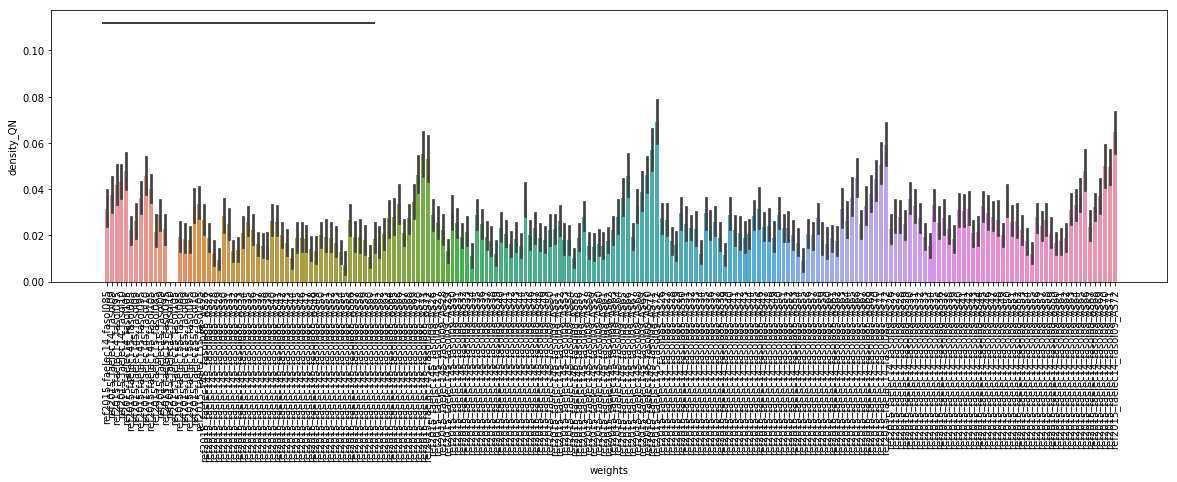

In [18]:
plt.rcParams["figure.figsize"] = [20, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_QN", data=data_t, order=["ref2015_faelec14_fasol085","ref2015_faelec14_fasol09","ref2015_faelec14_fasol095","ref2015_faelec14_fasol10","ref2015_faelec14_fasol105","ref2015_faelec145_fasol085","ref2015_faelec145_fasol09","ref2015_faelec145_fasol095","ref2015_faelec145_fasol10","ref2015_faelec145_fasol105","ref2015_faelec15_fasol085","ref2015_faelec15_fasol09","ref2015_faelec15_fasol095","ref2015_faelec15_fasol10","ref2015_faelec15_fasol105","ref2015_faelec155_fasol085","ref2015_faelec155_fasol09","ref2015_faelec155_fasol095","ref2015_faelec155_fasol10","ref2015_faelec155_fasol105"
,"ref2015_faelec145_fasol085_AS26","ref2015_faelec145_fasol085_AS27","ref2015_faelec145_fasol085_AS28","ref2015_faelec145_fasol085_AS29","ref2015_faelec145_fasol085_AS30","ref2015_faelec145_fasol085_AS31","ref2015_faelec145_fasol085_AS32","ref2015_faelec145_fasol085_AS33","ref2015_faelec145_fasol085_AS34","ref2015_faelec145_fasol085_AS35","ref2015_faelec145_fasol085_AS36","ref2015_faelec145_fasol085_AS37","ref2015_faelec145_fasol085_AS38","ref2015_faelec145_fasol085_AS39","ref2015_faelec145_fasol085_AS40","ref2015_faelec145_fasol085_AS41","ref2015_faelec145_fasol085_AS42","ref2015_faelec145_fasol085_AS43","ref2015_faelec145_fasol085_AS44","ref2015_faelec145_fasol085_AS45","ref2015_faelec145_fasol085_AS46","ref2015_faelec145_fasol085_AS47","ref2015_faelec145_fasol085_AS48","ref2015_faelec145_fasol085_AS49","ref2015_faelec145_fasol085_AS50","ref2015_faelec145_fasol085_AS51","ref2015_faelec145_fasol085_AS52","ref2015_faelec145_fasol085_AS53","ref2015_faelec145_fasol085_AS54","ref2015_faelec145_fasol085_AS55","ref2015_faelec145_fasol085_AS56","ref2015_faelec145_fasol085_AS57","ref2015_faelec145_fasol085_AS58","ref2015_faelec145_fasol085_AS59","ref2015_faelec145_fasol085_AS60","ref2015_faelec145_fasol085_AS61","ref2015_faelec145_fasol085_AS62","ref2015_faelec145_fasol085_AS63","ref2015_faelec145_fasol085_AS64","ref2015_faelec145_fasol085_AS65","ref2015_faelec145_fasol085_AS66","ref2015_faelec145_fasol085_AS67","ref2015_faelec145_fasol085_AS68","ref2015_faelec145_fasol085_AS69","ref2015_faelec145_fasol085_AS70","ref2015_faelec145_fasol085_AS71","ref2015_faelec145_fasol085_AS72"
,"ref2015_faelec145_fasol09_AS26","ref2015_faelec145_fasol09_AS27","ref2015_faelec145_fasol09_AS28","ref2015_faelec145_fasol09_AS29","ref2015_faelec145_fasol09_AS30","ref2015_faelec145_fasol09_AS31","ref2015_faelec145_fasol09_AS32","ref2015_faelec145_fasol09_AS33","ref2015_faelec145_fasol09_AS34","ref2015_faelec145_fasol09_AS35","ref2015_faelec145_fasol09_AS36","ref2015_faelec145_fasol09_AS37","ref2015_faelec145_fasol09_AS38","ref2015_faelec145_fasol09_AS39","ref2015_faelec145_fasol09_AS40","ref2015_faelec145_fasol09_AS41","ref2015_faelec145_fasol09_AS42","ref2015_faelec145_fasol09_AS43","ref2015_faelec145_fasol09_AS44","ref2015_faelec145_fasol09_AS45","ref2015_faelec145_fasol09_AS46","ref2015_faelec145_fasol09_AS47","ref2015_faelec145_fasol09_AS48","ref2015_faelec145_fasol09_AS49","ref2015_faelec145_fasol09_AS50","ref2015_faelec145_fasol09_AS51","ref2015_faelec145_fasol09_AS52","ref2015_faelec145_fasol09_AS53","ref2015_faelec145_fasol09_AS54","ref2015_faelec145_fasol09_AS55","ref2015_faelec145_fasol09_AS56","ref2015_faelec145_fasol09_AS57","ref2015_faelec145_fasol09_AS58","ref2015_faelec145_fasol09_AS59","ref2015_faelec145_fasol09_AS60","ref2015_faelec145_fasol09_AS61","ref2015_faelec145_fasol09_AS62","ref2015_faelec145_fasol09_AS63","ref2015_faelec145_fasol09_AS64","ref2015_faelec145_fasol09_AS65","ref2015_faelec145_fasol09_AS66","ref2015_faelec145_fasol09_AS67","ref2015_faelec145_fasol09_AS68","ref2015_faelec145_fasol09_AS69","ref2015_faelec145_fasol09_AS70","ref2015_faelec145_fasol09_AS71","ref2015_faelec145_fasol09_AS72"
,"ref2015_faelec14_fasol085_AS26","ref2015_faelec14_fasol085_AS27","ref2015_faelec14_fasol085_AS28","ref2015_faelec14_fasol085_AS29","ref2015_faelec14_fasol085_AS30","ref2015_faelec14_fasol085_AS31","ref2015_faelec14_fasol085_AS32","ref2015_faelec14_fasol085_AS33","ref2015_faelec14_fasol085_AS34","ref2015_faelec14_fasol085_AS35","ref2015_faelec14_fasol085_AS36","ref2015_faelec14_fasol085_AS37","ref2015_faelec14_fasol085_AS38","ref2015_faelec14_fasol085_AS39","ref2015_faelec14_fasol085_AS40","ref2015_faelec14_fasol085_AS41","ref2015_faelec14_fasol085_AS42","ref2015_faelec14_fasol085_AS43","ref2015_faelec14_fasol085_AS44","ref2015_faelec14_fasol085_AS45","ref2015_faelec14_fasol085_AS46","ref2015_faelec14_fasol085_AS47","ref2015_faelec14_fasol085_AS48","ref2015_faelec14_fasol085_AS49","ref2015_faelec14_fasol085_AS50","ref2015_faelec14_fasol085_AS51","ref2015_faelec14_fasol085_AS52","ref2015_faelec14_fasol085_AS53","ref2015_faelec14_fasol085_AS54","ref2015_faelec14_fasol085_AS55","ref2015_faelec14_fasol085_AS56","ref2015_faelec14_fasol085_AS57","ref2015_faelec14_fasol085_AS58","ref2015_faelec14_fasol085_AS59","ref2015_faelec14_fasol085_AS60","ref2015_faelec14_fasol085_AS61","ref2015_faelec14_fasol085_AS62","ref2015_faelec14_fasol085_AS63","ref2015_faelec14_fasol085_AS64","ref2015_faelec14_fasol085_AS65","ref2015_faelec14_fasol085_AS66","ref2015_faelec14_fasol085_AS67","ref2015_faelec14_fasol085_AS68","ref2015_faelec14_fasol085_AS69","ref2015_faelec14_fasol085_AS70","ref2015_faelec14_fasol085_AS71","ref2015_faelec14_fasol085_AS72"
,"ref2015_faelec14_fasol09_AS26","ref2015_faelec14_fasol09_AS27","ref2015_faelec14_fasol09_AS28","ref2015_faelec14_fasol09_AS29","ref2015_faelec14_fasol09_AS30","ref2015_faelec14_fasol09_AS31","ref2015_faelec14_fasol09_AS32","ref2015_faelec14_fasol09_AS33","ref2015_faelec14_fasol09_AS34","ref2015_faelec14_fasol09_AS35","ref2015_faelec14_fasol09_AS36","ref2015_faelec14_fasol09_AS37","ref2015_faelec14_fasol09_AS38","ref2015_faelec14_fasol09_AS39","ref2015_faelec14_fasol09_AS40","ref2015_faelec14_fasol09_AS41","ref2015_faelec14_fasol09_AS42","ref2015_faelec14_fasol09_AS43","ref2015_faelec14_fasol09_AS44","ref2015_faelec14_fasol09_AS45","ref2015_faelec14_fasol09_AS46","ref2015_faelec14_fasol09_AS47","ref2015_faelec14_fasol09_AS48","ref2015_faelec14_fasol09_AS49","ref2015_faelec14_fasol09_AS50","ref2015_faelec14_fasol09_AS51","ref2015_faelec14_fasol09_AS52","ref2015_faelec14_fasol09_AS53","ref2015_faelec14_fasol09_AS54","ref2015_faelec14_fasol09_AS55","ref2015_faelec14_fasol09_AS56","ref2015_faelec14_fasol09_AS57","ref2015_faelec14_fasol09_AS58","ref2015_faelec14_fasol09_AS59","ref2015_faelec14_fasol09_AS60","ref2015_faelec14_fasol09_AS61","ref2015_faelec14_fasol09_AS62","ref2015_faelec14_fasol09_AS63","ref2015_faelec14_fasol09_AS64","ref2015_faelec14_fasol09_AS65","ref2015_faelec14_fasol09_AS66","ref2015_faelec14_fasol09_AS67","ref2015_faelec14_fasol09_AS68","ref2015_faelec14_fasol09_AS69","ref2015_faelec14_fasol09_AS70","ref2015_faelec14_fasol09_AS71","ref2015_faelec14_fasol09_AS72"])

plt.hlines(0.112, -1, 55)

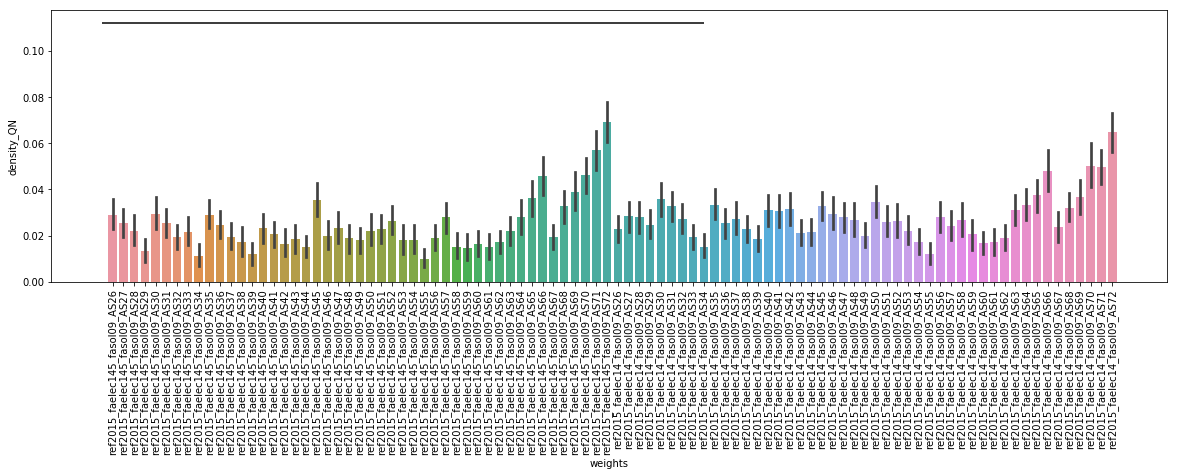

In [34]:
plt.rcParams["figure.figsize"] = [20, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_QN", data=data_t, order=["ref2015_faelec145_fasol09_AS26","ref2015_faelec145_fasol09_AS27","ref2015_faelec145_fasol09_AS28","ref2015_faelec145_fasol09_AS29","ref2015_faelec145_fasol09_AS30","ref2015_faelec145_fasol09_AS31","ref2015_faelec145_fasol09_AS32","ref2015_faelec145_fasol09_AS33","ref2015_faelec145_fasol09_AS34","ref2015_faelec145_fasol09_AS35","ref2015_faelec145_fasol09_AS36","ref2015_faelec145_fasol09_AS37","ref2015_faelec145_fasol09_AS38","ref2015_faelec145_fasol09_AS39","ref2015_faelec145_fasol09_AS40","ref2015_faelec145_fasol09_AS41","ref2015_faelec145_fasol09_AS42","ref2015_faelec145_fasol09_AS43","ref2015_faelec145_fasol09_AS44","ref2015_faelec145_fasol09_AS45","ref2015_faelec145_fasol09_AS46","ref2015_faelec145_fasol09_AS47","ref2015_faelec145_fasol09_AS48","ref2015_faelec145_fasol09_AS49","ref2015_faelec145_fasol09_AS50","ref2015_faelec145_fasol09_AS51","ref2015_faelec145_fasol09_AS52","ref2015_faelec145_fasol09_AS53","ref2015_faelec145_fasol09_AS54","ref2015_faelec145_fasol09_AS55","ref2015_faelec145_fasol09_AS56","ref2015_faelec145_fasol09_AS57","ref2015_faelec145_fasol09_AS58","ref2015_faelec145_fasol09_AS59","ref2015_faelec145_fasol09_AS60","ref2015_faelec145_fasol09_AS61","ref2015_faelec145_fasol09_AS62","ref2015_faelec145_fasol09_AS63","ref2015_faelec145_fasol09_AS64","ref2015_faelec145_fasol09_AS65","ref2015_faelec145_fasol09_AS66","ref2015_faelec145_fasol09_AS67","ref2015_faelec145_fasol09_AS68","ref2015_faelec145_fasol09_AS69","ref2015_faelec145_fasol09_AS70","ref2015_faelec145_fasol09_AS71","ref2015_faelec145_fasol09_AS72"
,"ref2015_faelec14_fasol09_AS26","ref2015_faelec14_fasol09_AS27","ref2015_faelec14_fasol09_AS28","ref2015_faelec14_fasol09_AS29","ref2015_faelec14_fasol09_AS30","ref2015_faelec14_fasol09_AS31","ref2015_faelec14_fasol09_AS32","ref2015_faelec14_fasol09_AS33","ref2015_faelec14_fasol09_AS34","ref2015_faelec14_fasol09_AS35","ref2015_faelec14_fasol09_AS36","ref2015_faelec14_fasol09_AS37","ref2015_faelec14_fasol09_AS38","ref2015_faelec14_fasol09_AS39","ref2015_faelec14_fasol09_AS40","ref2015_faelec14_fasol09_AS41","ref2015_faelec14_fasol09_AS42","ref2015_faelec14_fasol09_AS43","ref2015_faelec14_fasol09_AS44","ref2015_faelec14_fasol09_AS45","ref2015_faelec14_fasol09_AS46","ref2015_faelec14_fasol09_AS47","ref2015_faelec14_fasol09_AS48","ref2015_faelec14_fasol09_AS49","ref2015_faelec14_fasol09_AS50","ref2015_faelec14_fasol09_AS51","ref2015_faelec14_fasol09_AS52","ref2015_faelec14_fasol09_AS53","ref2015_faelec14_fasol09_AS54","ref2015_faelec14_fasol09_AS55","ref2015_faelec14_fasol09_AS56","ref2015_faelec14_fasol09_AS57","ref2015_faelec14_fasol09_AS58","ref2015_faelec14_fasol09_AS59","ref2015_faelec14_fasol09_AS60","ref2015_faelec14_fasol09_AS61","ref2015_faelec14_fasol09_AS62","ref2015_faelec14_fasol09_AS63","ref2015_faelec14_fasol09_AS64","ref2015_faelec14_fasol09_AS65","ref2015_faelec14_fasol09_AS66","ref2015_faelec14_fasol09_AS67","ref2015_faelec14_fasol09_AS68","ref2015_faelec14_fasol09_AS69","ref2015_faelec14_fasol09_AS70","ref2015_faelec14_fasol09_AS71","ref2015_faelec14_fasol09_AS72"])

plt.hlines(0.112, -1, 55)

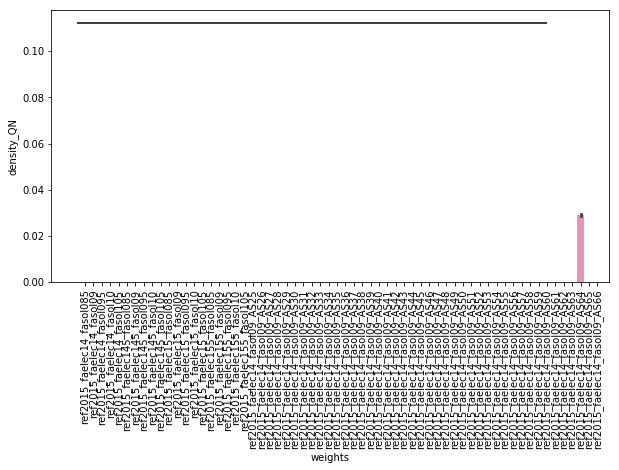

In [19]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_QN", data=data_t, order=["ref2015_faelec14_fasol085","ref2015_faelec14_fasol09","ref2015_faelec14_fasol095","ref2015_faelec14_fasol10","ref2015_faelec14_fasol105","ref2015_faelec145_fasol085","ref2015_faelec145_fasol09","ref2015_faelec145_fasol095","ref2015_faelec145_fasol10","ref2015_faelec145_fasol105","ref2015_faelec15_fasol085","ref2015_faelec15_fasol09","ref2015_faelec15_fasol095","ref2015_faelec15_fasol10","ref2015_faelec15_fasol105","ref2015_faelec155_fasol085","ref2015_faelec155_fasol09","ref2015_faelec155_fasol095","ref2015_faelec155_fasol10","ref2015_faelec155_fasol105","ref2015_faelec14_fasol09_AS25","ref2015_faelec14_fasol09_AS26","ref2015_faelec14_fasol09_AS27","ref2015_faelec14_fasol09_AS28","ref2015_faelec14_fasol09_AS29","ref2015_faelec14_fasol09_AS30","ref2015_faelec14_fasol09_AS31","ref2015_faelec14_fasol09_AS32","ref2015_faelec14_fasol09_AS33","ref2015_faelec14_fasol09_AS34","ref2015_faelec14_fasol09_AS35","ref2015_faelec14_fasol09_AS36","ref2015_faelec14_fasol09_AS37","ref2015_faelec14_fasol09_AS38","ref2015_faelec14_fasol09_AS39","ref2015_faelec14_fasol09_AS40","ref2015_faelec14_fasol09_AS41","ref2015_faelec14_fasol09_AS42","ref2015_faelec14_fasol09_AS43","ref2015_faelec14_fasol09_AS44","ref2015_faelec14_fasol09_AS45","ref2015_faelec14_fasol09_AS46","ref2015_faelec14_fasol09_AS47","ref2015_faelec14_fasol09_AS48","ref2015_faelec14_fasol09_AS49","ref2015_faelec14_fasol09_AS50","ref2015_faelec14_fasol09_AS51","ref2015_faelec14_fasol09_AS52","ref2015_faelec14_fasol09_AS53","ref2015_faelec14_fasol09_AS54","ref2015_faelec14_fasol09_AS55","ref2015_faelec14_fasol09_AS56","ref2015_faelec14_fasol09_AS57","ref2015_faelec14_fasol09_AS58","ref2015_faelec14_fasol09_AS59","ref2015_faelec14_fasol09_AS60","ref2015_faelec14_fasol09_AS61","ref2015_faelec14_fasol09_AS62","ref2015_faelec14_fasol09_AS63","ref2015_faelec14_fasol09_AS64","ref2015_faelec14_fasol09_AS65","ref2015_faelec14_fasol09_AS66"])
plt.hlines(0.112, -1, 55)

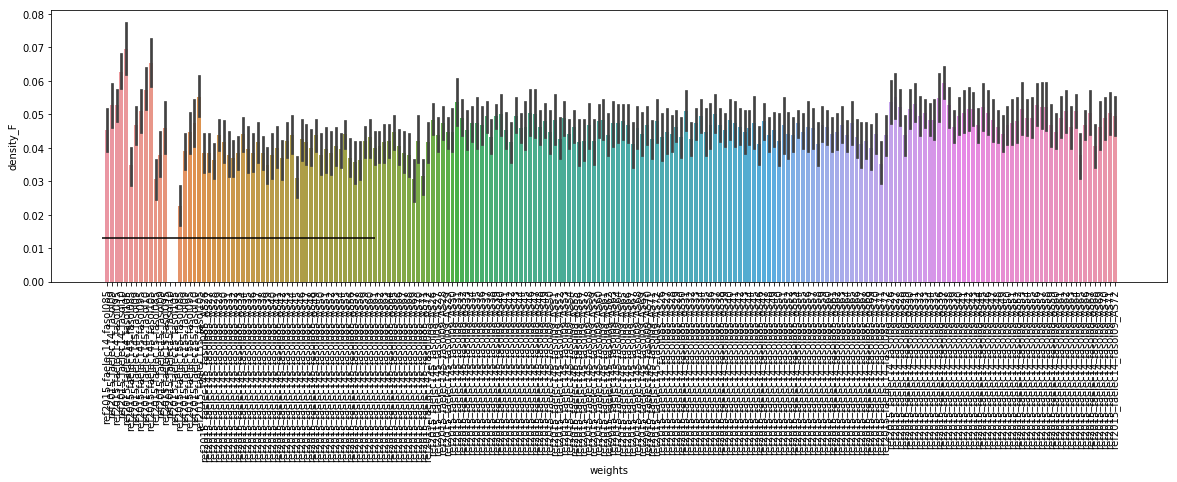

In [19]:
plt.rcParams["figure.figsize"] = [20, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_F", data=data_t, order=["ref2015_faelec14_fasol085","ref2015_faelec14_fasol09","ref2015_faelec14_fasol095","ref2015_faelec14_fasol10","ref2015_faelec14_fasol105","ref2015_faelec145_fasol085","ref2015_faelec145_fasol09","ref2015_faelec145_fasol095","ref2015_faelec145_fasol10","ref2015_faelec145_fasol105","ref2015_faelec15_fasol085","ref2015_faelec15_fasol09","ref2015_faelec15_fasol095","ref2015_faelec15_fasol10","ref2015_faelec15_fasol105","ref2015_faelec155_fasol085","ref2015_faelec155_fasol09","ref2015_faelec155_fasol095","ref2015_faelec155_fasol10","ref2015_faelec155_fasol105"
,"ref2015_faelec145_fasol085_AS26","ref2015_faelec145_fasol085_AS27","ref2015_faelec145_fasol085_AS28","ref2015_faelec145_fasol085_AS29","ref2015_faelec145_fasol085_AS30","ref2015_faelec145_fasol085_AS31","ref2015_faelec145_fasol085_AS32","ref2015_faelec145_fasol085_AS33","ref2015_faelec145_fasol085_AS34","ref2015_faelec145_fasol085_AS35","ref2015_faelec145_fasol085_AS36","ref2015_faelec145_fasol085_AS37","ref2015_faelec145_fasol085_AS38","ref2015_faelec145_fasol085_AS39","ref2015_faelec145_fasol085_AS40","ref2015_faelec145_fasol085_AS41","ref2015_faelec145_fasol085_AS42","ref2015_faelec145_fasol085_AS43","ref2015_faelec145_fasol085_AS44","ref2015_faelec145_fasol085_AS45","ref2015_faelec145_fasol085_AS46","ref2015_faelec145_fasol085_AS47","ref2015_faelec145_fasol085_AS48","ref2015_faelec145_fasol085_AS49","ref2015_faelec145_fasol085_AS50","ref2015_faelec145_fasol085_AS51","ref2015_faelec145_fasol085_AS52","ref2015_faelec145_fasol085_AS53","ref2015_faelec145_fasol085_AS54","ref2015_faelec145_fasol085_AS55","ref2015_faelec145_fasol085_AS56","ref2015_faelec145_fasol085_AS57","ref2015_faelec145_fasol085_AS58","ref2015_faelec145_fasol085_AS59","ref2015_faelec145_fasol085_AS60","ref2015_faelec145_fasol085_AS61","ref2015_faelec145_fasol085_AS62","ref2015_faelec145_fasol085_AS63","ref2015_faelec145_fasol085_AS64","ref2015_faelec145_fasol085_AS65","ref2015_faelec145_fasol085_AS66","ref2015_faelec145_fasol085_AS67","ref2015_faelec145_fasol085_AS68","ref2015_faelec145_fasol085_AS69","ref2015_faelec145_fasol085_AS70","ref2015_faelec145_fasol085_AS71","ref2015_faelec145_fasol085_AS72"
,"ref2015_faelec145_fasol09_AS26","ref2015_faelec145_fasol09_AS27","ref2015_faelec145_fasol09_AS28","ref2015_faelec145_fasol09_AS29","ref2015_faelec145_fasol09_AS30","ref2015_faelec145_fasol09_AS31","ref2015_faelec145_fasol09_AS32","ref2015_faelec145_fasol09_AS33","ref2015_faelec145_fasol09_AS34","ref2015_faelec145_fasol09_AS35","ref2015_faelec145_fasol09_AS36","ref2015_faelec145_fasol09_AS37","ref2015_faelec145_fasol09_AS38","ref2015_faelec145_fasol09_AS39","ref2015_faelec145_fasol09_AS40","ref2015_faelec145_fasol09_AS41","ref2015_faelec145_fasol09_AS42","ref2015_faelec145_fasol09_AS43","ref2015_faelec145_fasol09_AS44","ref2015_faelec145_fasol09_AS45","ref2015_faelec145_fasol09_AS46","ref2015_faelec145_fasol09_AS47","ref2015_faelec145_fasol09_AS48","ref2015_faelec145_fasol09_AS49","ref2015_faelec145_fasol09_AS50","ref2015_faelec145_fasol09_AS51","ref2015_faelec145_fasol09_AS52","ref2015_faelec145_fasol09_AS53","ref2015_faelec145_fasol09_AS54","ref2015_faelec145_fasol09_AS55","ref2015_faelec145_fasol09_AS56","ref2015_faelec145_fasol09_AS57","ref2015_faelec145_fasol09_AS58","ref2015_faelec145_fasol09_AS59","ref2015_faelec145_fasol09_AS60","ref2015_faelec145_fasol09_AS61","ref2015_faelec145_fasol09_AS62","ref2015_faelec145_fasol09_AS63","ref2015_faelec145_fasol09_AS64","ref2015_faelec145_fasol09_AS65","ref2015_faelec145_fasol09_AS66","ref2015_faelec145_fasol09_AS67","ref2015_faelec145_fasol09_AS68","ref2015_faelec145_fasol09_AS69","ref2015_faelec145_fasol09_AS70","ref2015_faelec145_fasol09_AS71","ref2015_faelec145_fasol09_AS72"
,"ref2015_faelec14_fasol085_AS26","ref2015_faelec14_fasol085_AS27","ref2015_faelec14_fasol085_AS28","ref2015_faelec14_fasol085_AS29","ref2015_faelec14_fasol085_AS30","ref2015_faelec14_fasol085_AS31","ref2015_faelec14_fasol085_AS32","ref2015_faelec14_fasol085_AS33","ref2015_faelec14_fasol085_AS34","ref2015_faelec14_fasol085_AS35","ref2015_faelec14_fasol085_AS36","ref2015_faelec14_fasol085_AS37","ref2015_faelec14_fasol085_AS38","ref2015_faelec14_fasol085_AS39","ref2015_faelec14_fasol085_AS40","ref2015_faelec14_fasol085_AS41","ref2015_faelec14_fasol085_AS42","ref2015_faelec14_fasol085_AS43","ref2015_faelec14_fasol085_AS44","ref2015_faelec14_fasol085_AS45","ref2015_faelec14_fasol085_AS46","ref2015_faelec14_fasol085_AS47","ref2015_faelec14_fasol085_AS48","ref2015_faelec14_fasol085_AS49","ref2015_faelec14_fasol085_AS50","ref2015_faelec14_fasol085_AS51","ref2015_faelec14_fasol085_AS52","ref2015_faelec14_fasol085_AS53","ref2015_faelec14_fasol085_AS54","ref2015_faelec14_fasol085_AS55","ref2015_faelec14_fasol085_AS56","ref2015_faelec14_fasol085_AS57","ref2015_faelec14_fasol085_AS58","ref2015_faelec14_fasol085_AS59","ref2015_faelec14_fasol085_AS60","ref2015_faelec14_fasol085_AS61","ref2015_faelec14_fasol085_AS62","ref2015_faelec14_fasol085_AS63","ref2015_faelec14_fasol085_AS64","ref2015_faelec14_fasol085_AS65","ref2015_faelec14_fasol085_AS66","ref2015_faelec14_fasol085_AS67","ref2015_faelec14_fasol085_AS68","ref2015_faelec14_fasol085_AS69","ref2015_faelec14_fasol085_AS70","ref2015_faelec14_fasol085_AS71","ref2015_faelec14_fasol085_AS72"
,"ref2015_faelec14_fasol09_AS26","ref2015_faelec14_fasol09_AS27","ref2015_faelec14_fasol09_AS28","ref2015_faelec14_fasol09_AS29","ref2015_faelec14_fasol09_AS30","ref2015_faelec14_fasol09_AS31","ref2015_faelec14_fasol09_AS32","ref2015_faelec14_fasol09_AS33","ref2015_faelec14_fasol09_AS34","ref2015_faelec14_fasol09_AS35","ref2015_faelec14_fasol09_AS36","ref2015_faelec14_fasol09_AS37","ref2015_faelec14_fasol09_AS38","ref2015_faelec14_fasol09_AS39","ref2015_faelec14_fasol09_AS40","ref2015_faelec14_fasol09_AS41","ref2015_faelec14_fasol09_AS42","ref2015_faelec14_fasol09_AS43","ref2015_faelec14_fasol09_AS44","ref2015_faelec14_fasol09_AS45","ref2015_faelec14_fasol09_AS46","ref2015_faelec14_fasol09_AS47","ref2015_faelec14_fasol09_AS48","ref2015_faelec14_fasol09_AS49","ref2015_faelec14_fasol09_AS50","ref2015_faelec14_fasol09_AS51","ref2015_faelec14_fasol09_AS52","ref2015_faelec14_fasol09_AS53","ref2015_faelec14_fasol09_AS54","ref2015_faelec14_fasol09_AS55","ref2015_faelec14_fasol09_AS56","ref2015_faelec14_fasol09_AS57","ref2015_faelec14_fasol09_AS58","ref2015_faelec14_fasol09_AS59","ref2015_faelec14_fasol09_AS60","ref2015_faelec14_fasol09_AS61","ref2015_faelec14_fasol09_AS62","ref2015_faelec14_fasol09_AS63","ref2015_faelec14_fasol09_AS64","ref2015_faelec14_fasol09_AS65","ref2015_faelec14_fasol09_AS66","ref2015_faelec14_fasol09_AS67","ref2015_faelec14_fasol09_AS68","ref2015_faelec14_fasol09_AS69","ref2015_faelec14_fasol09_AS70","ref2015_faelec14_fasol09_AS71","ref2015_faelec14_fasol09_AS72"])

plt.hlines(0.013, -1, 55)

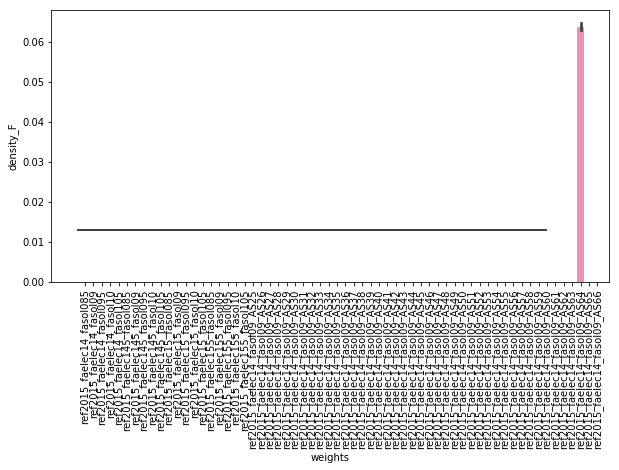

In [20]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_F", data=data_t, order=["ref2015_faelec14_fasol085","ref2015_faelec14_fasol09","ref2015_faelec14_fasol095","ref2015_faelec14_fasol10","ref2015_faelec14_fasol105","ref2015_faelec145_fasol085","ref2015_faelec145_fasol09","ref2015_faelec145_fasol095","ref2015_faelec145_fasol10","ref2015_faelec145_fasol105","ref2015_faelec15_fasol085","ref2015_faelec15_fasol09","ref2015_faelec15_fasol095","ref2015_faelec15_fasol10","ref2015_faelec15_fasol105","ref2015_faelec155_fasol085","ref2015_faelec155_fasol09","ref2015_faelec155_fasol095","ref2015_faelec155_fasol10","ref2015_faelec155_fasol105","ref2015_faelec14_fasol09_AS25","ref2015_faelec14_fasol09_AS26","ref2015_faelec14_fasol09_AS27","ref2015_faelec14_fasol09_AS28","ref2015_faelec14_fasol09_AS29","ref2015_faelec14_fasol09_AS30","ref2015_faelec14_fasol09_AS31","ref2015_faelec14_fasol09_AS32","ref2015_faelec14_fasol09_AS33","ref2015_faelec14_fasol09_AS34","ref2015_faelec14_fasol09_AS35","ref2015_faelec14_fasol09_AS36","ref2015_faelec14_fasol09_AS37","ref2015_faelec14_fasol09_AS38","ref2015_faelec14_fasol09_AS39","ref2015_faelec14_fasol09_AS40","ref2015_faelec14_fasol09_AS41","ref2015_faelec14_fasol09_AS42","ref2015_faelec14_fasol09_AS43","ref2015_faelec14_fasol09_AS44","ref2015_faelec14_fasol09_AS45","ref2015_faelec14_fasol09_AS46","ref2015_faelec14_fasol09_AS47","ref2015_faelec14_fasol09_AS48","ref2015_faelec14_fasol09_AS49","ref2015_faelec14_fasol09_AS50","ref2015_faelec14_fasol09_AS51","ref2015_faelec14_fasol09_AS52","ref2015_faelec14_fasol09_AS53","ref2015_faelec14_fasol09_AS54","ref2015_faelec14_fasol09_AS55","ref2015_faelec14_fasol09_AS56","ref2015_faelec14_fasol09_AS57","ref2015_faelec14_fasol09_AS58","ref2015_faelec14_fasol09_AS59","ref2015_faelec14_fasol09_AS60","ref2015_faelec14_fasol09_AS61","ref2015_faelec14_fasol09_AS62","ref2015_faelec14_fasol09_AS63","ref2015_faelec14_fasol09_AS64","ref2015_faelec14_fasol09_AS65","ref2015_faelec14_fasol09_AS66"])
plt.hlines(0.013, -1, 55)

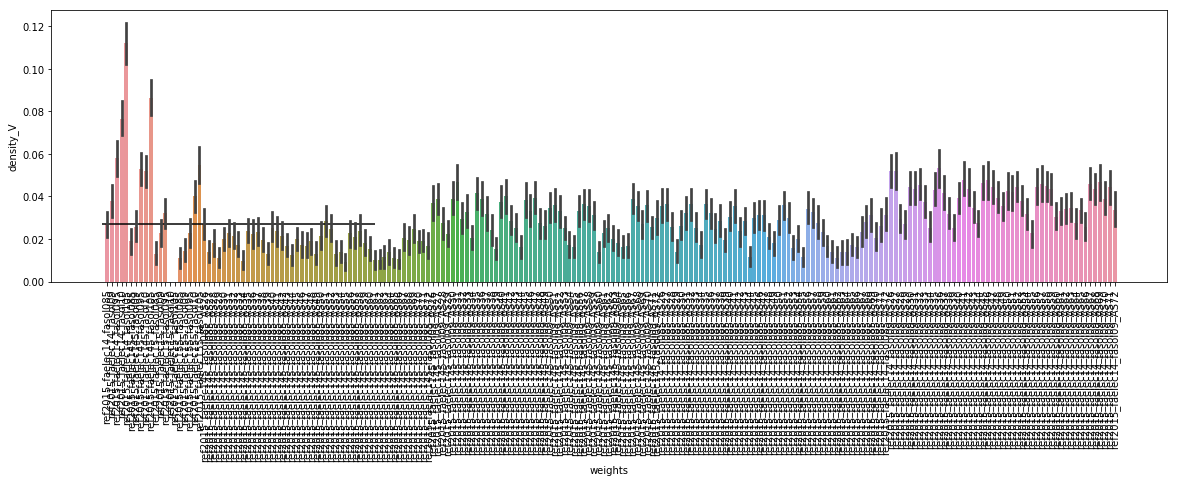

In [20]:
plt.rcParams["figure.figsize"] = [20, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_V", data=data_t, order=["ref2015_faelec14_fasol085","ref2015_faelec14_fasol09","ref2015_faelec14_fasol095","ref2015_faelec14_fasol10","ref2015_faelec14_fasol105","ref2015_faelec145_fasol085","ref2015_faelec145_fasol09","ref2015_faelec145_fasol095","ref2015_faelec145_fasol10","ref2015_faelec145_fasol105","ref2015_faelec15_fasol085","ref2015_faelec15_fasol09","ref2015_faelec15_fasol095","ref2015_faelec15_fasol10","ref2015_faelec15_fasol105","ref2015_faelec155_fasol085","ref2015_faelec155_fasol09","ref2015_faelec155_fasol095","ref2015_faelec155_fasol10","ref2015_faelec155_fasol105"
,"ref2015_faelec145_fasol085_AS26","ref2015_faelec145_fasol085_AS27","ref2015_faelec145_fasol085_AS28","ref2015_faelec145_fasol085_AS29","ref2015_faelec145_fasol085_AS30","ref2015_faelec145_fasol085_AS31","ref2015_faelec145_fasol085_AS32","ref2015_faelec145_fasol085_AS33","ref2015_faelec145_fasol085_AS34","ref2015_faelec145_fasol085_AS35","ref2015_faelec145_fasol085_AS36","ref2015_faelec145_fasol085_AS37","ref2015_faelec145_fasol085_AS38","ref2015_faelec145_fasol085_AS39","ref2015_faelec145_fasol085_AS40","ref2015_faelec145_fasol085_AS41","ref2015_faelec145_fasol085_AS42","ref2015_faelec145_fasol085_AS43","ref2015_faelec145_fasol085_AS44","ref2015_faelec145_fasol085_AS45","ref2015_faelec145_fasol085_AS46","ref2015_faelec145_fasol085_AS47","ref2015_faelec145_fasol085_AS48","ref2015_faelec145_fasol085_AS49","ref2015_faelec145_fasol085_AS50","ref2015_faelec145_fasol085_AS51","ref2015_faelec145_fasol085_AS52","ref2015_faelec145_fasol085_AS53","ref2015_faelec145_fasol085_AS54","ref2015_faelec145_fasol085_AS55","ref2015_faelec145_fasol085_AS56","ref2015_faelec145_fasol085_AS57","ref2015_faelec145_fasol085_AS58","ref2015_faelec145_fasol085_AS59","ref2015_faelec145_fasol085_AS60","ref2015_faelec145_fasol085_AS61","ref2015_faelec145_fasol085_AS62","ref2015_faelec145_fasol085_AS63","ref2015_faelec145_fasol085_AS64","ref2015_faelec145_fasol085_AS65","ref2015_faelec145_fasol085_AS66","ref2015_faelec145_fasol085_AS67","ref2015_faelec145_fasol085_AS68","ref2015_faelec145_fasol085_AS69","ref2015_faelec145_fasol085_AS70","ref2015_faelec145_fasol085_AS71","ref2015_faelec145_fasol085_AS72"
,"ref2015_faelec145_fasol09_AS26","ref2015_faelec145_fasol09_AS27","ref2015_faelec145_fasol09_AS28","ref2015_faelec145_fasol09_AS29","ref2015_faelec145_fasol09_AS30","ref2015_faelec145_fasol09_AS31","ref2015_faelec145_fasol09_AS32","ref2015_faelec145_fasol09_AS33","ref2015_faelec145_fasol09_AS34","ref2015_faelec145_fasol09_AS35","ref2015_faelec145_fasol09_AS36","ref2015_faelec145_fasol09_AS37","ref2015_faelec145_fasol09_AS38","ref2015_faelec145_fasol09_AS39","ref2015_faelec145_fasol09_AS40","ref2015_faelec145_fasol09_AS41","ref2015_faelec145_fasol09_AS42","ref2015_faelec145_fasol09_AS43","ref2015_faelec145_fasol09_AS44","ref2015_faelec145_fasol09_AS45","ref2015_faelec145_fasol09_AS46","ref2015_faelec145_fasol09_AS47","ref2015_faelec145_fasol09_AS48","ref2015_faelec145_fasol09_AS49","ref2015_faelec145_fasol09_AS50","ref2015_faelec145_fasol09_AS51","ref2015_faelec145_fasol09_AS52","ref2015_faelec145_fasol09_AS53","ref2015_faelec145_fasol09_AS54","ref2015_faelec145_fasol09_AS55","ref2015_faelec145_fasol09_AS56","ref2015_faelec145_fasol09_AS57","ref2015_faelec145_fasol09_AS58","ref2015_faelec145_fasol09_AS59","ref2015_faelec145_fasol09_AS60","ref2015_faelec145_fasol09_AS61","ref2015_faelec145_fasol09_AS62","ref2015_faelec145_fasol09_AS63","ref2015_faelec145_fasol09_AS64","ref2015_faelec145_fasol09_AS65","ref2015_faelec145_fasol09_AS66","ref2015_faelec145_fasol09_AS67","ref2015_faelec145_fasol09_AS68","ref2015_faelec145_fasol09_AS69","ref2015_faelec145_fasol09_AS70","ref2015_faelec145_fasol09_AS71","ref2015_faelec145_fasol09_AS72"
,"ref2015_faelec14_fasol085_AS26","ref2015_faelec14_fasol085_AS27","ref2015_faelec14_fasol085_AS28","ref2015_faelec14_fasol085_AS29","ref2015_faelec14_fasol085_AS30","ref2015_faelec14_fasol085_AS31","ref2015_faelec14_fasol085_AS32","ref2015_faelec14_fasol085_AS33","ref2015_faelec14_fasol085_AS34","ref2015_faelec14_fasol085_AS35","ref2015_faelec14_fasol085_AS36","ref2015_faelec14_fasol085_AS37","ref2015_faelec14_fasol085_AS38","ref2015_faelec14_fasol085_AS39","ref2015_faelec14_fasol085_AS40","ref2015_faelec14_fasol085_AS41","ref2015_faelec14_fasol085_AS42","ref2015_faelec14_fasol085_AS43","ref2015_faelec14_fasol085_AS44","ref2015_faelec14_fasol085_AS45","ref2015_faelec14_fasol085_AS46","ref2015_faelec14_fasol085_AS47","ref2015_faelec14_fasol085_AS48","ref2015_faelec14_fasol085_AS49","ref2015_faelec14_fasol085_AS50","ref2015_faelec14_fasol085_AS51","ref2015_faelec14_fasol085_AS52","ref2015_faelec14_fasol085_AS53","ref2015_faelec14_fasol085_AS54","ref2015_faelec14_fasol085_AS55","ref2015_faelec14_fasol085_AS56","ref2015_faelec14_fasol085_AS57","ref2015_faelec14_fasol085_AS58","ref2015_faelec14_fasol085_AS59","ref2015_faelec14_fasol085_AS60","ref2015_faelec14_fasol085_AS61","ref2015_faelec14_fasol085_AS62","ref2015_faelec14_fasol085_AS63","ref2015_faelec14_fasol085_AS64","ref2015_faelec14_fasol085_AS65","ref2015_faelec14_fasol085_AS66","ref2015_faelec14_fasol085_AS67","ref2015_faelec14_fasol085_AS68","ref2015_faelec14_fasol085_AS69","ref2015_faelec14_fasol085_AS70","ref2015_faelec14_fasol085_AS71","ref2015_faelec14_fasol085_AS72"
,"ref2015_faelec14_fasol09_AS26","ref2015_faelec14_fasol09_AS27","ref2015_faelec14_fasol09_AS28","ref2015_faelec14_fasol09_AS29","ref2015_faelec14_fasol09_AS30","ref2015_faelec14_fasol09_AS31","ref2015_faelec14_fasol09_AS32","ref2015_faelec14_fasol09_AS33","ref2015_faelec14_fasol09_AS34","ref2015_faelec14_fasol09_AS35","ref2015_faelec14_fasol09_AS36","ref2015_faelec14_fasol09_AS37","ref2015_faelec14_fasol09_AS38","ref2015_faelec14_fasol09_AS39","ref2015_faelec14_fasol09_AS40","ref2015_faelec14_fasol09_AS41","ref2015_faelec14_fasol09_AS42","ref2015_faelec14_fasol09_AS43","ref2015_faelec14_fasol09_AS44","ref2015_faelec14_fasol09_AS45","ref2015_faelec14_fasol09_AS46","ref2015_faelec14_fasol09_AS47","ref2015_faelec14_fasol09_AS48","ref2015_faelec14_fasol09_AS49","ref2015_faelec14_fasol09_AS50","ref2015_faelec14_fasol09_AS51","ref2015_faelec14_fasol09_AS52","ref2015_faelec14_fasol09_AS53","ref2015_faelec14_fasol09_AS54","ref2015_faelec14_fasol09_AS55","ref2015_faelec14_fasol09_AS56","ref2015_faelec14_fasol09_AS57","ref2015_faelec14_fasol09_AS58","ref2015_faelec14_fasol09_AS59","ref2015_faelec14_fasol09_AS60","ref2015_faelec14_fasol09_AS61","ref2015_faelec14_fasol09_AS62","ref2015_faelec14_fasol09_AS63","ref2015_faelec14_fasol09_AS64","ref2015_faelec14_fasol09_AS65","ref2015_faelec14_fasol09_AS66","ref2015_faelec14_fasol09_AS67","ref2015_faelec14_fasol09_AS68","ref2015_faelec14_fasol09_AS69","ref2015_faelec14_fasol09_AS70","ref2015_faelec14_fasol09_AS71","ref2015_faelec14_fasol09_AS72"])

plt.hlines(0.027, -1, 55)

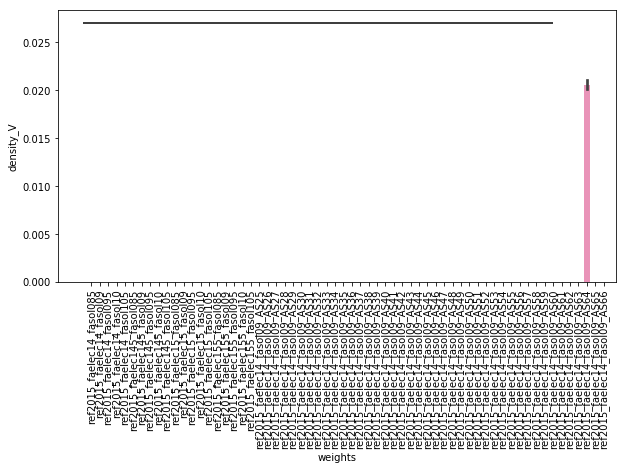

In [21]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=90)
sns.barplot(x="weights", y="density_V", data=data_t, order=["ref2015_faelec14_fasol085","ref2015_faelec14_fasol09","ref2015_faelec14_fasol095","ref2015_faelec14_fasol10","ref2015_faelec14_fasol105","ref2015_faelec145_fasol085","ref2015_faelec145_fasol09","ref2015_faelec145_fasol095","ref2015_faelec145_fasol10","ref2015_faelec145_fasol105","ref2015_faelec15_fasol085","ref2015_faelec15_fasol09","ref2015_faelec15_fasol095","ref2015_faelec15_fasol10","ref2015_faelec15_fasol105","ref2015_faelec155_fasol085","ref2015_faelec155_fasol09","ref2015_faelec155_fasol095","ref2015_faelec155_fasol10","ref2015_faelec155_fasol105","ref2015_faelec14_fasol09_AS25","ref2015_faelec14_fasol09_AS26","ref2015_faelec14_fasol09_AS27","ref2015_faelec14_fasol09_AS28","ref2015_faelec14_fasol09_AS29","ref2015_faelec14_fasol09_AS30","ref2015_faelec14_fasol09_AS31","ref2015_faelec14_fasol09_AS32","ref2015_faelec14_fasol09_AS33","ref2015_faelec14_fasol09_AS34","ref2015_faelec14_fasol09_AS35","ref2015_faelec14_fasol09_AS36","ref2015_faelec14_fasol09_AS37","ref2015_faelec14_fasol09_AS38","ref2015_faelec14_fasol09_AS39","ref2015_faelec14_fasol09_AS40","ref2015_faelec14_fasol09_AS41","ref2015_faelec14_fasol09_AS42","ref2015_faelec14_fasol09_AS43","ref2015_faelec14_fasol09_AS44","ref2015_faelec14_fasol09_AS45","ref2015_faelec14_fasol09_AS46","ref2015_faelec14_fasol09_AS47","ref2015_faelec14_fasol09_AS48","ref2015_faelec14_fasol09_AS49","ref2015_faelec14_fasol09_AS50","ref2015_faelec14_fasol09_AS51","ref2015_faelec14_fasol09_AS52","ref2015_faelec14_fasol09_AS53","ref2015_faelec14_fasol09_AS54","ref2015_faelec14_fasol09_AS55","ref2015_faelec14_fasol09_AS56","ref2015_faelec14_fasol09_AS57","ref2015_faelec14_fasol09_AS58","ref2015_faelec14_fasol09_AS59","ref2015_faelec14_fasol09_AS60","ref2015_faelec14_fasol09_AS61","ref2015_faelec14_fasol09_AS62","ref2015_faelec14_fasol09_AS63","ref2015_faelec14_fasol09_AS64","ref2015_faelec14_fasol09_AS65","ref2015_faelec14_fasol09_AS66"])
plt.hlines(0.027, -1, 55)

In [7]:
aa_dict_native = {'A': 0.05415794077883519, 'C': 0.0001325451316173157, 'D': 0.05312408875222013, 'E': 0.11335259655912838, 'F': 0.012856877766879623, 'G': 0.11351165071706916, 'H': 0.0076611086074808476, 'I': 0.013890729793494684, 'K': 0.10020411950269066, 'L': 0.018185192057895712, 'M': 0.0071839461336585106, 'N': 0.06120934178087639, 'P': 0.005725949685868038, 'Q': 0.05102987567266654, 'R': 0.14754924051639584, 'S': 0.07997773241788829, 'T': 0.07875831720700899, 'V': 0.026800625613021233, 'W': 0.014182329083052779, 'Y': 0.040505792222251674}


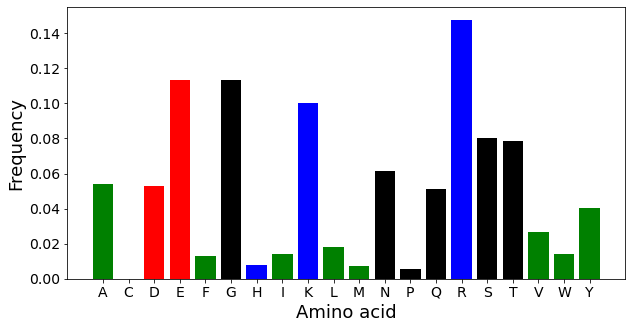

In [8]:
fig, ax = plt.subplots()
ax.bar(range(len(aa_dict_native)), list(aa_dict_native.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(aa_dict_native)), list(aa_dict_native.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

Text(0, 0.5, 'Frequency')

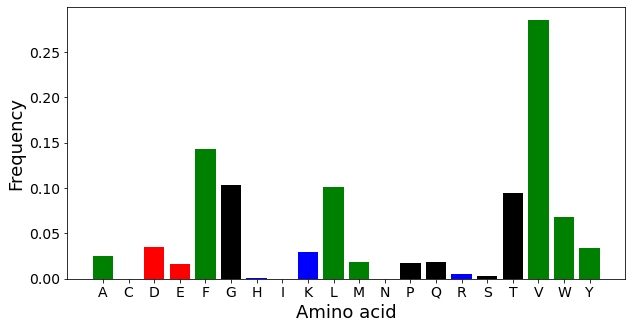

In [34]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015/ref2015.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)

Text(0, 0.5, 'Frequency')

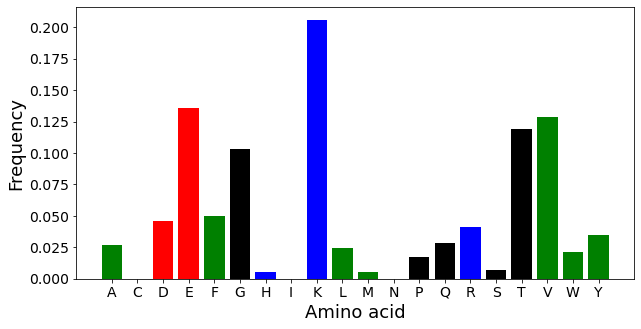

In [35]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec15/ref2015_faelec15.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items())) 
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)

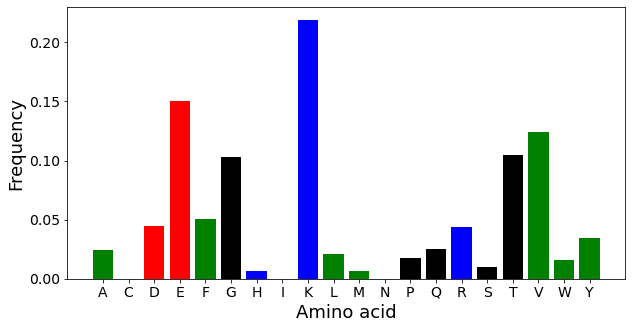

In [36]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec155/ref2015_faelec155.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

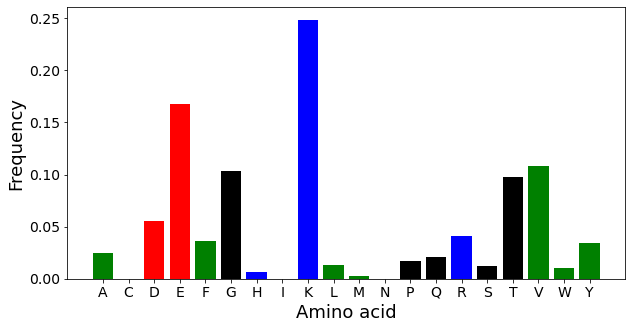

In [37]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec16/ref2015_faelec16.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

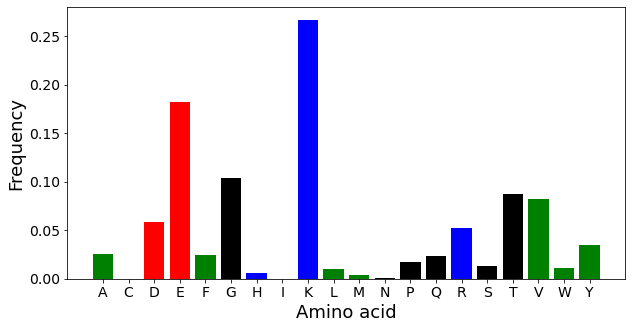

In [38]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec165/ref2015_faelec165.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

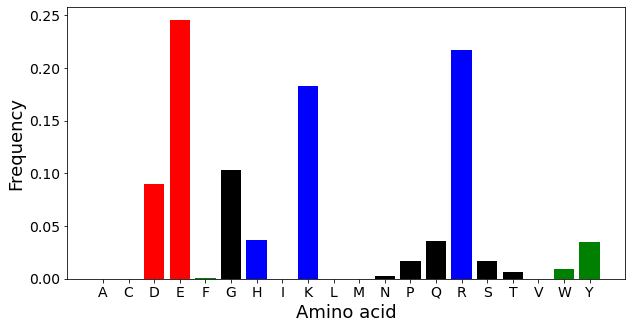

In [39]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_fasol02/ref2015_fasol02.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

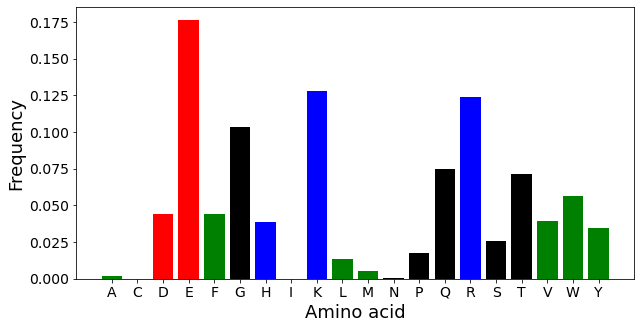

In [40]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_fasol06/ref2015_fasol06.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

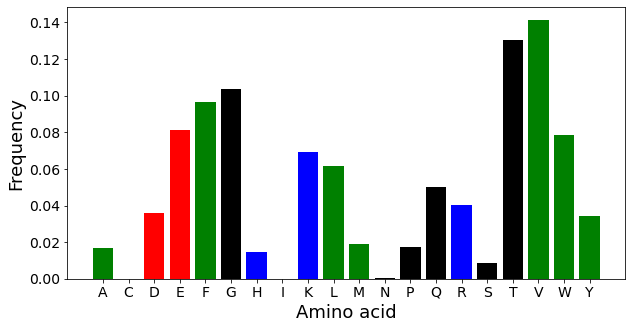

In [41]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_fasol08/ref2015_fasol08.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

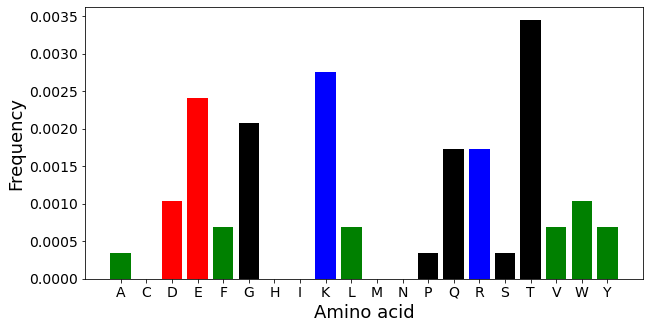

In [86]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec14_fasol09/ref2015_faelec14_fasol09.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        distr = aa_distribution_core(seq)
        d = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

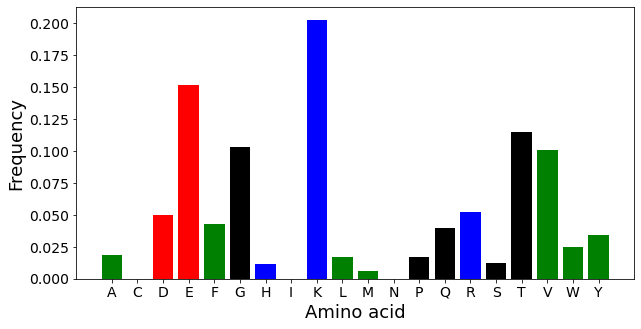

In [87]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec14_fasol09_A1/ref2015_faelec14_fasol09_A1.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

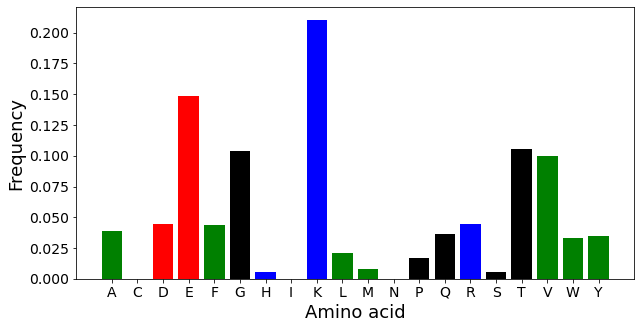

In [43]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec14_fasol09_A9/ref2015_faelec14_fasol09_A9.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

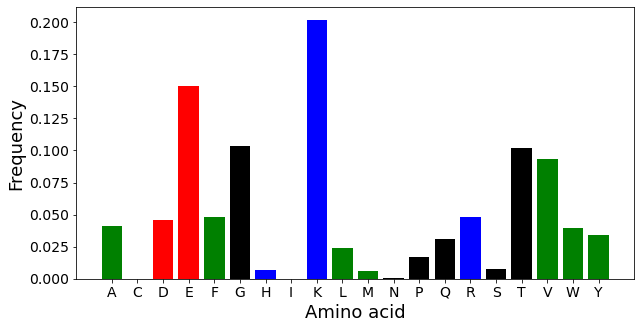

In [44]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec14_fasol09_A9_HB/ref2015_faelec14_fasol09_A9_HB.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

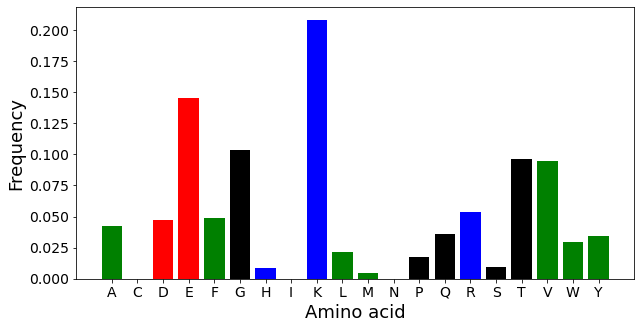

In [45]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec14_fasol09_A10/ref2015_faelec14_fasol09_A10.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

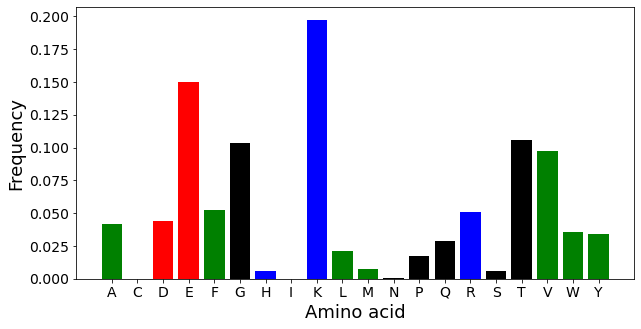

In [41]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec14_fasol09_A10_HB/ref2015_faelec14_fasol09_A10_HB.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

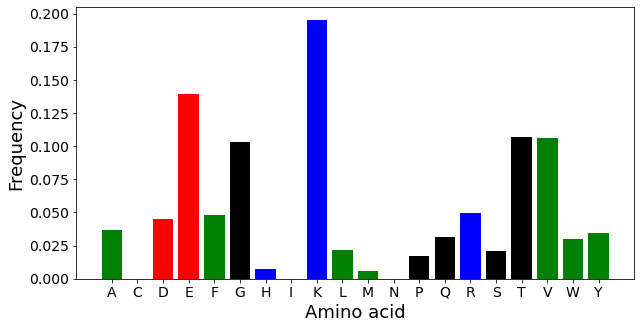

In [58]:

plt.rcParams["figure.figsize"] = [10, 5]
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec14_fasol09_AS21/ref2015_faelec14_fasol09_AS21.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

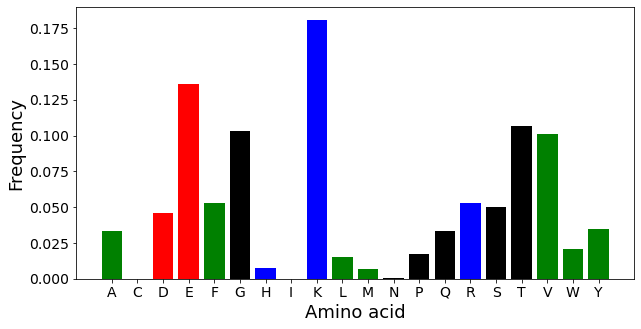

In [55]:
plt.rcParams["figure.figsize"] = [10, 5]
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec14_fasol09_AS25/ref2015_faelec14_fasol09_AS25.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

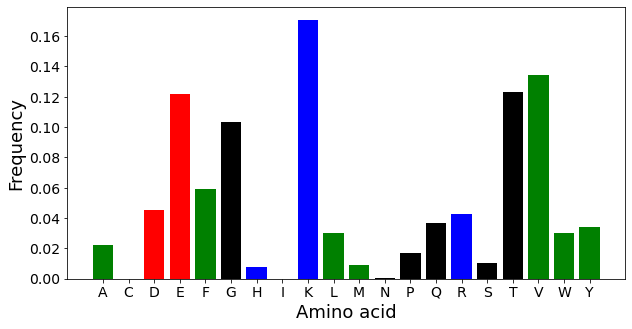

In [49]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec14_fasol095/ref2015_faelec14_fasol095.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

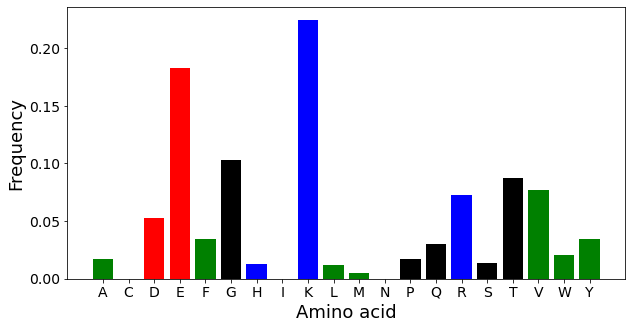

In [50]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec14_fasol085/ref2015_faelec14_fasol085.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

In [59]:
x = list()
y = list()
l = list()

for key in aa_dict_native:
    y.append(aa_dict_native[key])
    x.append(distr[key])
    l.append(key)
print(y)
print(x)

[0.05415794077883519, 0.0001325451316173157, 0.05312408875222013, 0.11335259655912838, 0.012856877766879623, 0.11351165071706916, 0.0076611086074808476, 0.013890729793494684, 0.10020411950269066, 0.018185192057895712, 0.0071839461336585106, 0.06120934178087639, 0.005725949685868038, 0.05102987567266654, 0.14754924051639584, 0.07997773241788829, 0.07875831720700899, 0.026800625613021233, 0.014182329083052779, 0.040505792222251674]
[0.03689655172413793, 0.0, 0.04517241379310346, 0.1396551724137931, 0.04827586206896552, 0.10344827586206906, 0.007241379310344826, 0.0, 0.19517241379310357, 0.02172413793103449, 0.005862068965517243, 0.0, 0.017241379310344838, 0.03137931034482759, 0.04931034482758622, 0.021034482758620684, 0.10724137931034482, 0.10620689655172418, 0.029655172413793087, 0.034482758620689676]


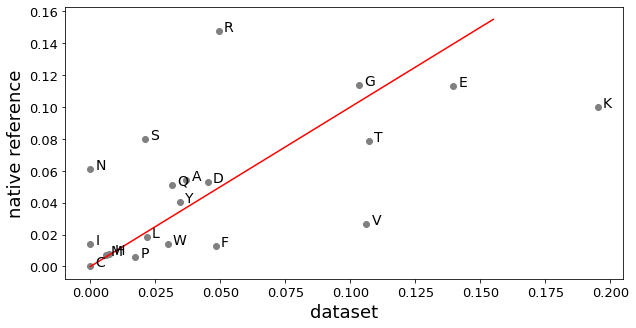

In [60]:
fig, ax = plt.subplots()

ax.scatter(x,y,color="grey")
ax.plot([0, 0.155], [0, 0.155], c='r')  
ax.set_xlabel('dataset', size=18)
ax.set_ylabel('native reference',size=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
for i, txt in enumerate(l):
    ax.annotate(txt, (x[i]+0.002, y[i]),size=14)

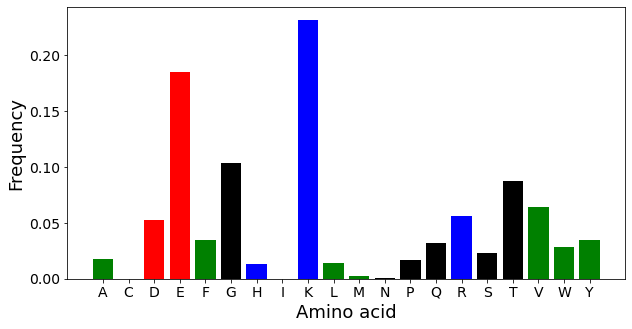

In [90]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec14_fasol085_AS25/ref2015_faelec14_fasol085_AS25.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

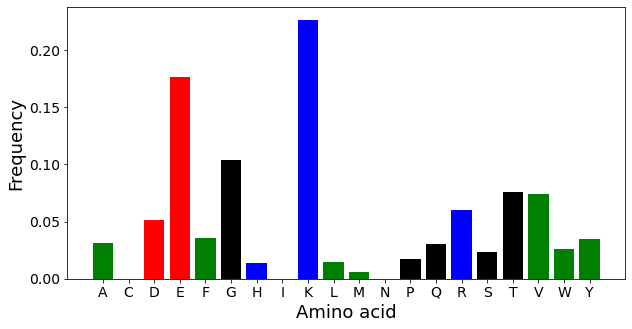

In [49]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec14_fasol085_AS46/ref2015_faelec14_fasol085_AS46.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

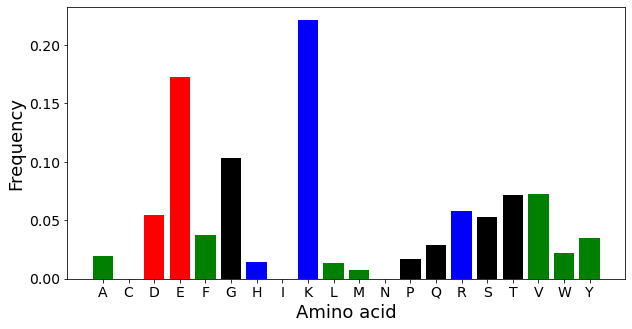

In [50]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec14_fasol085_AS50/ref2015_faelec14_fasol085_AS50.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

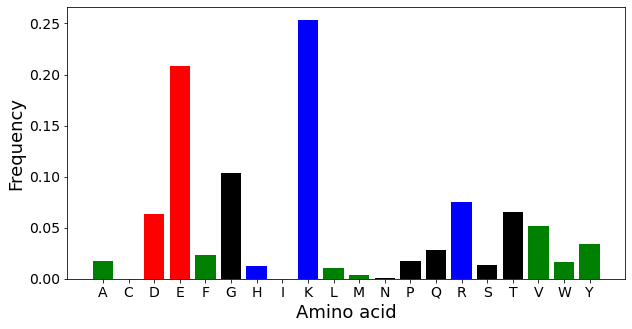

In [54]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec14_fasol08/ref2015_faelec14_fasol08.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

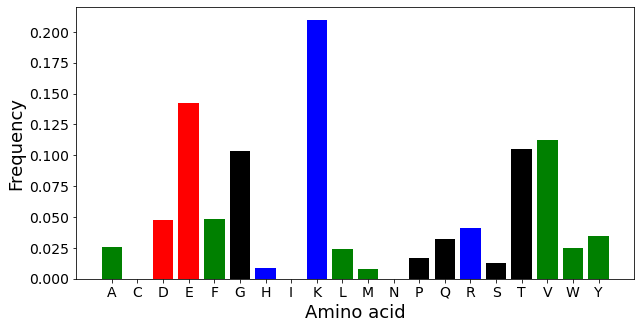

In [55]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec145_fasol095/ref2015_faelec145_fasol095.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

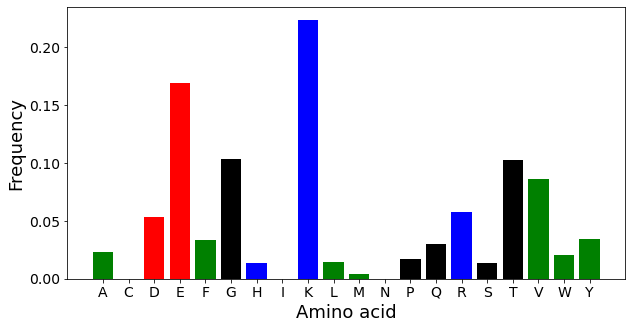

In [56]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec145_fasol09/ref2015_faelec145_fasol09.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

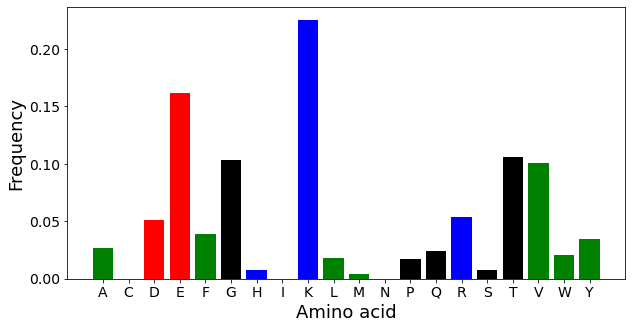

In [57]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec15_fasol095/ref2015_faelec15_fasol095.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

In [51]:
x = list()
y = list()
l = list()

for key in aa_dict_native:
    y.append(aa_dict_native[key])
    x.append(distr[key])
    l.append(key)
print(y)
print(x)

[0.05415794077883519, 0.0001325451316173157, 0.05312408875222013, 0.11335259655912838, 0.012856877766879623, 0.11351165071706916, 0.0076611086074808476, 0.013890729793494684, 0.10020411950269066, 0.018185192057895712, 0.0071839461336585106, 0.06120934178087639, 0.005725949685868038, 0.05102987567266654, 0.14754924051639584, 0.07997773241788829, 0.07875831720700899, 0.026800625613021233, 0.014182329083052779, 0.040505792222251674]
[0.01931034482758621, 0.0, 0.054137931034482785, 0.17275862068965517, 0.03724137931034482, 0.10344827586206906, 0.014137931034482758, 0.0, 0.22137931034482766, 0.013103448275862064, 0.007241379310344828, 0.0, 0.017241379310344838, 0.0293103448275862, 0.05758620689655174, 0.05275862068965517, 0.0717241379310345, 0.0724137931034483, 0.021724137931034483, 0.034482758620689676]


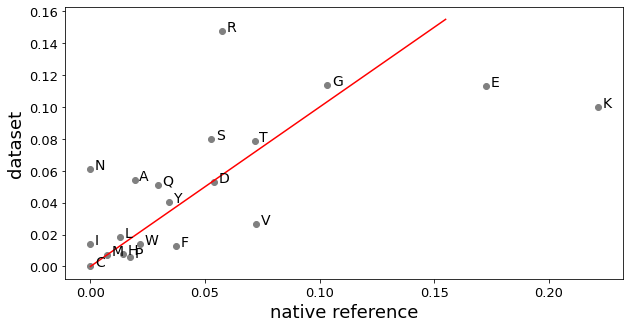

In [52]:
fig, ax = plt.subplots()

ax.scatter(x,y,color="grey")
ax.plot([0, 0.155], [0, 0.155], c='r')  
ax.set_xlabel('native reference', size=18)
ax.set_ylabel('dataset',size=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
for i, txt in enumerate(l):
    ax.annotate(txt, (x[i]+0.002, y[i]),size=14)

In [13]:
d = {}

with open("round2_core.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        distr = aa_distribution_core(seq)
        F = distr['F']
        aro = distr['F'] + distr['Y'] + distr['W']
        hydro = distr['V'] + distr['I'] + distr['L'] + distr['A']
        beta_branch = distr['V'] + distr['I'] + distr['L']
        S = distr['S']
        T = distr['T']
        positive = distr['D'] + distr['E']
        negative = distr['K'] + distr['L'] + distr['H']
        ST = distr['S'] + distr['T']
        QN = distr['Q'] + distr['N']
        GRAVY = GRAVY_core(seq)
        keys = set(distr.keys())
        dstr_r = numpy.corrcoef([aa_dict_native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
        d[pdb_name] = [GRAVY, F, aro, hydro, beta_branch, positive, negative, ST, QN, S, T, dstr_r]
ddesign = pd.DataFrame(d, index=["hydropathy","density_F","density_aro","density_hydrophobics","density_beta_branched","density_positive","density_negative", "density_ST", "density_QN","density_S","density_T","correlation_native_aa"])
ddesign = ddesign.T

print(ddesign)

                              hydropathy  density_F  density_aro  \
0_input_0069_0003_00010_0001   -2.189655   0.017241     0.086207   
0_input_0069_0003_00010_0002   -1.677586   0.034483     0.120690   
0_input_0069_0003_00010_0003   -1.906897   0.034483     0.086207   
0_input_0069_0003_00010_0004   -1.812069   0.034483     0.120690   
0_input_0069_0003_00010_0005   -1.784483   0.034483     0.086207   
...                                  ...        ...          ...   
9_input_0062_0004_0008_0005    -2.220690   0.017241     0.068966   
9_input_0062_0004_0009_0001    -1.822414   0.068966     0.103448   
9_input_0062_0004_0009_0004    -1.513793   0.034483     0.120690   
9_input_0062_0004_0009_0005    -2.236207   0.034483     0.103448   
9_input_0153_0004_0005_0005    -1.993103   0.017241     0.068966   

                              density_hydrophobics  density_beta_branched  \
0_input_0069_0003_00010_0001              0.103448               0.086207   
0_input_0069_0003_00010_0002 

-1.8836984937134327


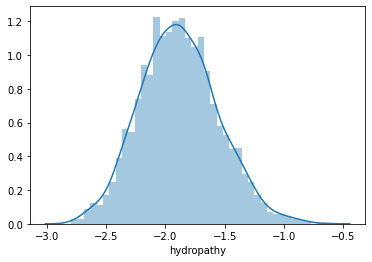

In [9]:
sns.distplot(ddesign["hydropathy"], bins=40)
print(ddesign['hydropathy'].mean())

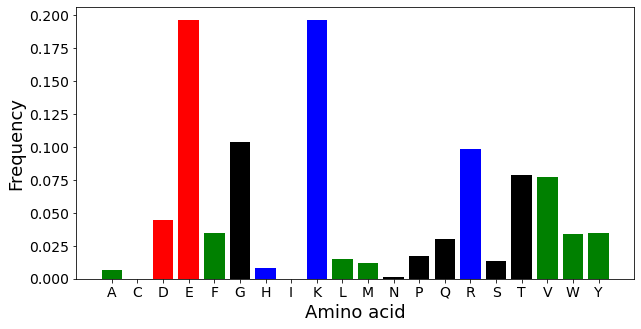

In [60]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("round2_core.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

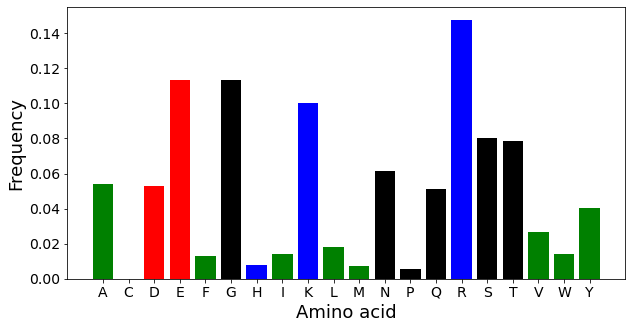

In [61]:
aa_dict_native = {'A': 0.05415794077883519, 'C': 0.0001325451316173157, 'D': 0.05312408875222013, 'E': 0.11335259655912838, 'F': 0.012856877766879623, 'G': 0.11351165071706916, 'H': 0.0076611086074808476, 'I': 0.013890729793494684, 'K': 0.10020411950269066, 'L': 0.018185192057895712, 'M': 0.0071839461336585106, 'N': 0.06120934178087639, 'P': 0.005725949685868038, 'Q': 0.05102987567266654, 'R': 0.14754924051639584, 'S': 0.07997773241788829, 'T': 0.07875831720700899, 'V': 0.026800625613021233, 'W': 0.014182329083052779, 'Y': 0.040505792222251674}
fig, ax = plt.subplots()
ax.bar(range(len(aa_dict_native)), list(aa_dict_native.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(aa_dict_native)), list(aa_dict_native.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

In [62]:
x = list()
y = list()
l = list()

for key in aa_dict_native:
    y.append(aa_dict_native[key])
    x.append(distr[key])
    l.append(key)
print(y)
print(x)

[0.05415794077883519, 0.0001325451316173157, 0.05312408875222013, 0.11335259655912838, 0.012856877766879623, 0.11351165071706916, 0.0076611086074808476, 0.013890729793494684, 0.10020411950269066, 0.018185192057895712, 0.0071839461336585106, 0.06120934178087639, 0.005725949685868038, 0.05102987567266654, 0.14754924051639584, 0.07997773241788829, 0.07875831720700899, 0.026800625613021233, 0.014182329083052779, 0.040505792222251674]
[0.006307315656251378, 0.0, 0.04455233273856385, 0.19612847006099277, 0.034323692546024964, 0.10344827586206569, 0.007821901323706488, 0.0, 0.19593482440488091, 0.015000622432466094, 0.012040610260453603, 0.0010996306900701248, 0.017241379310344248, 0.03009115177669846, 0.09836507738910182, 0.013555195927908603, 0.07858555680042006, 0.07684274589540294, 0.03417845830393999, 0.034482758620688496]


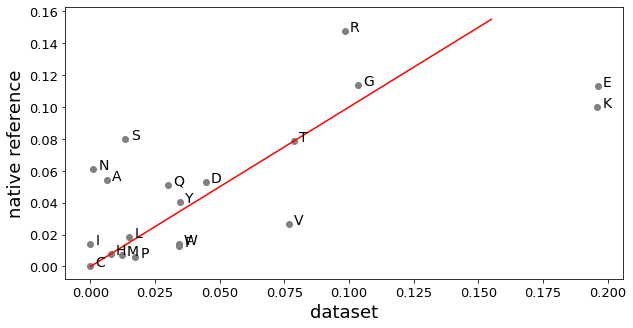

In [63]:
fig, ax = plt.subplots()

ax.scatter(x,y,color="grey")
ax.plot([0, 0.155], [0, 0.155], c='r')  
ax.set_xlabel('dataset', size=18)
ax.set_ylabel('native reference',size=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
for i, txt in enumerate(l):
    ax.annotate(txt, (x[i]+0.002, y[i]),size=14)

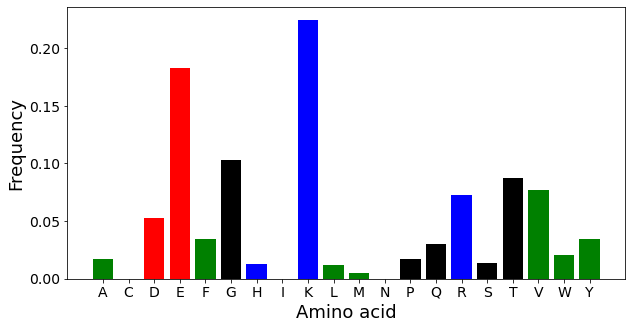

In [64]:
n = 0
distr_test = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec14_fasol085/ref2015_faelec14_fasol085.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr_test = {x: distr_test.get(x, 0) + d.get(x, 0) for x in set(distr_test).union(d)}
        n+=1

distr_test = {x: distr_test.get(x, 0)/n for x in distr_test}
distr_test = dict(sorted(distr_test.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr_test.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr_test)), list(distr_test.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

In [65]:
x = list()
y = list()
l = list()

for key in aa_dict_native:
    y.append(distr_test[key])
    x.append(distr[key])
    l.append(key)
print(y)
print(x)

[0.017586206896551725, 0.0, 0.05310344827586211, 0.18310344827586203, 0.034137931034482746, 0.10344827586206906, 0.013103448275862068, 0.0, 0.22448275862068962, 0.012068965517241377, 0.00517241379310345, 0.0, 0.017241379310344838, 0.03034482758620689, 0.07275862068965518, 0.013448275862068966, 0.08758620689655172, 0.07724137931034486, 0.02068965517241379, 0.034482758620689676]
[0.006307315656251378, 0.0, 0.04455233273856385, 0.19612847006099277, 0.034323692546024964, 0.10344827586206569, 0.007821901323706488, 0.0, 0.19593482440488091, 0.015000622432466094, 0.012040610260453603, 0.0010996306900701248, 0.017241379310344248, 0.03009115177669846, 0.09836507738910182, 0.013555195927908603, 0.07858555680042006, 0.07684274589540294, 0.03417845830393999, 0.034482758620688496]


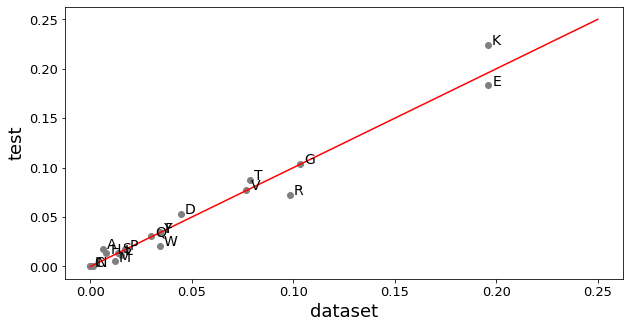

In [66]:
fig, ax = plt.subplots()

ax.scatter(x,y,color="grey")
ax.plot([0, 0.25], [0, 0.25], c='r')  
ax.set_xlabel('dataset', size=18)
ax.set_ylabel('test',size=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
for i, txt in enumerate(l):
    ax.annotate(txt, (x[i]+0.002, y[i]),size=14)

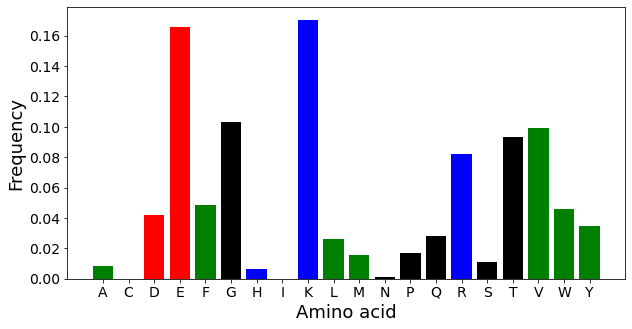

In [80]:
n = 0
distr = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("round2_B_core.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr = {x: distr.get(x, 0) + d.get(x, 0) for x in set(distr).union(d)}
        n+=1

distr = {x: distr.get(x, 0)/n for x in distr}
distr = dict(sorted(distr.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr)), list(distr.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr)), list(distr.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

In [81]:
x = list()
y = list()
l = list()

for key in aa_dict_native:
    y.append(aa_dict_native[key])
    x.append(distr[key])
    l.append(key)
print(y)
print(x)

[0.05415794077883519, 0.0001325451316173157, 0.05312408875222013, 0.11335259655912838, 0.012856877766879623, 0.11351165071706916, 0.0076611086074808476, 0.013890729793494684, 0.10020411950269066, 0.018185192057895712, 0.0071839461336585106, 0.06120934178087639, 0.005725949685868038, 0.05102987567266654, 0.14754924051639584, 0.07997773241788829, 0.07875831720700899, 0.026800625613021233, 0.014182329083052779, 0.040505792222251674]
[0.008710692316120596, 0.0, 0.04214472427880555, 0.16574576987494266, 0.048754050119743576, 0.10325261790349416, 0.006640631114311315, 0.0, 0.1703906898117068, 0.02631208227025796, 0.01566437616416441, 0.0009782897929156154, 0.017241379310344234, 0.02844866717798549, 0.0821293846948553, 0.010823798268818133, 0.09335623835835453, 0.09928858766259553, 0.045635262259928436, 0.03448275862068847]


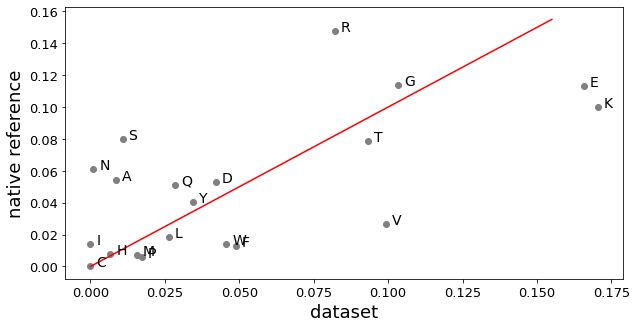

In [82]:
fig, ax = plt.subplots()

ax.scatter(x,y,color="grey")
ax.plot([0, 0.155], [0, 0.155], c='r')  
ax.set_xlabel('dataset', size=18)
ax.set_ylabel('native reference',size=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
for i, txt in enumerate(l):
    ax.annotate(txt, (x[i]+0.002, y[i]),size=14)

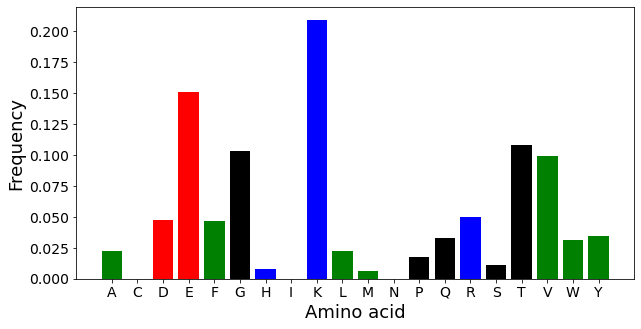

In [83]:
n = 0
distr_test = {'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0}

with open("ref2015_faelec14_fasol09/ref2015_faelec14_fasol09.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        d = aa_distribution_core(seq)
        distr_test = {x: distr_test.get(x, 0) + d.get(x, 0) for x in set(distr_test).union(d)}
        n+=1

distr_test = {x: distr_test.get(x, 0)/n for x in distr_test}
distr_test = dict(sorted(distr_test.items()))
fig, ax = plt.subplots()
ax.bar(range(len(distr_test)), list(distr_test.values()), color=['green', 'black', 'red', 'red', 'green', 'black', 'blue', 'green', 'blue', 'green', 'green', 'black', 'black', 'black', 'blue', 'black', 'black', 'green', 'green', 'green'])
plt.xticks(range(len(distr_test)), list(distr_test.keys()),size=14)
plt.yticks(size=14)
#pd.DataFrame(aa_dict_surf).T.plot(kind='bar')
ax.set_xlabel('Amino acid', size=18)
ax.set_ylabel('Frequency',size=18)
plt.show()

In [84]:
x = list()
y = list()
l = list()

for key in aa_dict_native:
    y.append(distr_test[key])
    x.append(distr[key])
    l.append(key)
print(y)
print(x)

[0.022068965517241374, 0.0, 0.04724137931034482, 0.15068965517241378, 0.04689655172413794, 0.10344827586206906, 0.008275862068965517, 0.0, 0.2089655172413792, 0.022068965517241374, 0.006551724137931033, 0.0, 0.017241379310344838, 0.03275862068965518, 0.049655172413793115, 0.011379310344827585, 0.10793103448275869, 0.09931034482758623, 0.031034482758620693, 0.034482758620689676]
[0.008710692316120596, 0.0, 0.04214472427880555, 0.16574576987494266, 0.048754050119743576, 0.10325261790349416, 0.006640631114311315, 0.0, 0.1703906898117068, 0.02631208227025796, 0.01566437616416441, 0.0009782897929156154, 0.017241379310344234, 0.02844866717798549, 0.0821293846948553, 0.010823798268818133, 0.09335623835835453, 0.09928858766259553, 0.045635262259928436, 0.03448275862068847]


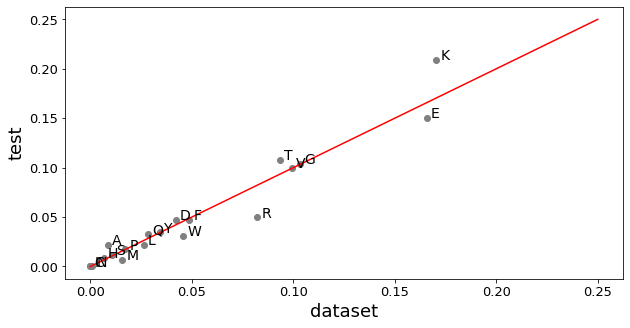

In [85]:
fig, ax = plt.subplots()

ax.scatter(x,y,color="grey")
ax.plot([0, 0.25], [0, 0.25], c='r')  
ax.set_xlabel('dataset', size=18)
ax.set_ylabel('test',size=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
for i, txt in enumerate(l):
    ax.annotate(txt, (x[i]+0.002, y[i]),size=14)

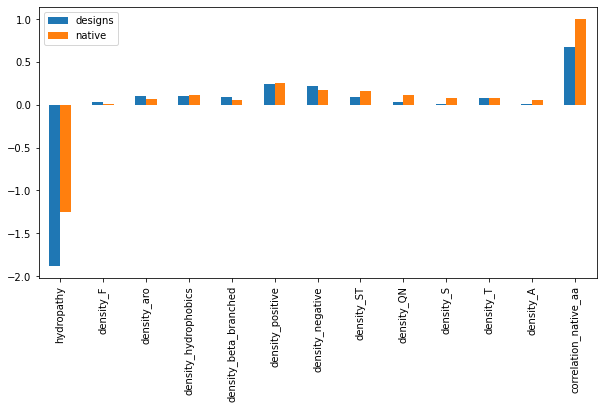

In [36]:
d = {}
n = [-1.25, 0.013, 0.068, 0.113, 0.059, 0.256, 0.166, 0.159, 0.112, 0.08, 0.079, 0.054, 1]
#df = pd.DataFrame()
with open("round2_core.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        distr = aa_distribution_core(seq)
        F = distr['F']
        aro = distr['F'] + distr['Y'] + distr['W']
        hydro = distr['V'] + distr['I'] + distr['L'] + distr['A']
        beta_branch = distr['V'] + distr['I'] + distr['L']
        S = distr['S']
        T = distr['T']
        A = distr['A']
        positive = distr['D'] + distr['E']
        negative = distr['K'] + distr['L'] + distr['H']
        ST = distr['S'] + distr['T']
        QN = distr['Q'] + distr['N']
        GRAVY = GRAVY_core(seq)
        keys = set(distr.keys())
        dstr_r = numpy.corrcoef([aa_dict_native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
        d[pdb_name] = [GRAVY, F, aro, hydro, beta_branch, positive, negative, ST, QN, S, T, A, dstr_r]
    df = pd.DataFrame(d, index=["hydropathy","density_F","density_aro","density_hydrophobics","density_beta_branched","density_positive","density_negative", "density_ST", "density_QN","density_S","density_T","density_A","correlation_native_aa"])
    df = df.T
    df = df.mean()
    df = pd.DataFrame(df, columns=["designs"])
df["native"] = n
df.plot.bar()


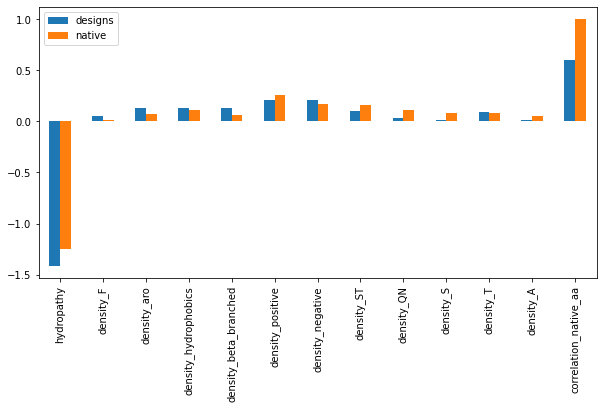

In [40]:
d = {}
n = [-1.25, 0.013, 0.068, 0.113, 0.059, 0.256, 0.166, 0.159, 0.112, 0.08, 0.079, 0.054, 1]
#df = pd.DataFrame()
with open("round2_B_core.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        distr = aa_distribution_core(seq)
        F = distr['F']
        aro = distr['F'] + distr['Y'] + distr['W']
        hydro = distr['V'] + distr['I'] + distr['L'] + distr['A']
        beta_branch = distr['V'] + distr['I'] + distr['L']
        S = distr['S']
        T = distr['T']
        A = distr['A']
        positive = distr['D'] + distr['E']
        negative = distr['K'] + distr['L'] + distr['H']
        ST = distr['S'] + distr['T']
        QN = distr['Q'] + distr['N']
        GRAVY = GRAVY_core(seq)
        keys = set(distr.keys())
        dstr_r = numpy.corrcoef([aa_dict_native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
        d[pdb_name] = [GRAVY, F, aro, hydro, beta_branch, positive, negative, ST, QN, S, T, A, dstr_r]
    df = pd.DataFrame(d, index=["hydropathy","density_F","density_aro","density_hydrophobics","density_beta_branched","density_positive","density_negative", "density_ST", "density_QN","density_S","density_T","density_A","correlation_native_aa"])
    df = df.T
    df = df.mean()
    df = pd.DataFrame(df, columns=["designs"])
df["native"] = n
df.plot.bar()


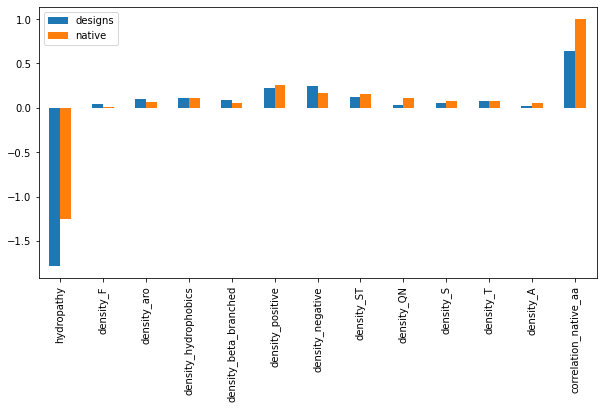

In [61]:
d = {}
n = [-1.25, 0.013, 0.068, 0.113, 0.059, 0.256, 0.166, 0.159, 0.112, 0.08, 0.079, 0.054, 1]
#df = pd.DataFrame()
with open("ref2015_faelec14_fasol085_AS50/ref2015_faelec14_fasol085_AS50.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        distr = aa_distribution_core(seq)
        F = distr['F']
        aro = distr['F'] + distr['Y'] + distr['W']
        hydro = distr['V'] + distr['I'] + distr['L'] + distr['A']
        beta_branch = distr['V'] + distr['I'] + distr['L']
        S = distr['S']
        T = distr['T']
        A = distr['A']
        positive = distr['D'] + distr['E']
        negative = distr['K'] + distr['L'] + distr['H']
        ST = distr['S'] + distr['T']
        QN = distr['Q'] + distr['N']
        GRAVY = GRAVY_core(seq)
        keys = set(distr.keys())
        dstr_r = numpy.corrcoef([aa_dict_native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
        d[pdb_name] = [GRAVY, F, aro, hydro, beta_branch, positive, negative, ST, QN, S, T, A, dstr_r]
    df = pd.DataFrame(d, index=["hydropathy","density_F","density_aro","density_hydrophobics","density_beta_branched","density_positive","density_negative", "density_ST", "density_QN","density_S","density_T","density_A","correlation_native_aa"])
    df = df.T
    df = df.mean()
    df = pd.DataFrame(df, columns=["designs"])
df["native"] = n
df.plot.bar()


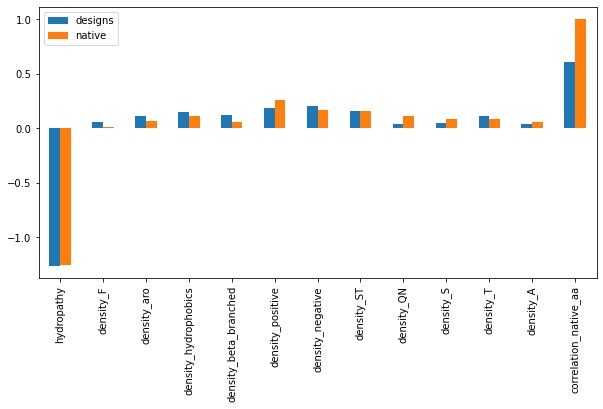

In [62]:
d = {}
n = [-1.25, 0.013, 0.068, 0.113, 0.059, 0.256, 0.166, 0.159, 0.112, 0.08, 0.079, 0.054, 1]
#df = pd.DataFrame()
with open("ref2015_faelec14_fasol09_AS25/ref2015_faelec14_fasol09_AS25.fasta", "r") as in_f:
    for line1,line2 in itertools.zip_longest(*[in_f]*2):
        pdb_name = line1[1:].strip()
        seq = line2.strip()
        distr = aa_distribution_core(seq)
        F = distr['F']
        aro = distr['F'] + distr['Y'] + distr['W']
        hydro = distr['V'] + distr['I'] + distr['L'] + distr['A']
        beta_branch = distr['V'] + distr['I'] + distr['L']
        S = distr['S']
        T = distr['T']
        A = distr['A']
        positive = distr['D'] + distr['E']
        negative = distr['K'] + distr['L'] + distr['H']
        ST = distr['S'] + distr['T']
        QN = distr['Q'] + distr['N']
        GRAVY = GRAVY_core(seq)
        keys = set(distr.keys())
        dstr_r = numpy.corrcoef([aa_dict_native.get(x, 0) for x in keys],[distr.get(x, 0) for x in keys])[0, 1]
        d[pdb_name] = [GRAVY, F, aro, hydro, beta_branch, positive, negative, ST, QN, S, T, A, dstr_r]
    df = pd.DataFrame(d, index=["hydropathy","density_F","density_aro","density_hydrophobics","density_beta_branched","density_positive","density_negative", "density_ST", "density_QN","density_S","density_T","density_A","correlation_native_aa"])
    df = df.T
    df = df.mean()
    df = pd.DataFrame(df, columns=["designs"])
df["native"] = n
df.plot.bar()
